In [1]:
# Importing the useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout, BatchNormalization, Lambda, SimpleRNN, Conv2D, MaxPooling2D, Flatten

# highest score right now is 0.84538

In [2]:
# Set Random Seed
np.random.seed(10)
tf.random.set_seed(10)

In [3]:
from tensorflow.python.client import device_lib 

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4987067155397507077
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1416435918
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3811106601211682977
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
# convert default status to zero and 1
train['default_status'] = train.default_status.apply(lambda x: 0 if x=='no' else 1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [7]:
train.head(20)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0   Apcnt_1000000       3436.0      0.28505       1.6560       0.0000   
1   Apcnt_1000004       3456.0      0.67400       0.2342       0.0000   
2   Apcnt_1000008       3276.0      0.53845       3.1510       0.0000   
3   Apcnt_1000012       3372.0      0.17005       0.5050       0.0000   
4   Apcnt_1000016       3370.0      0.77270       1.1010       0.0000   
5   Apcnt_1000020       3724.0          NaN       0.0000       0.0000   
6   Apcnt_1000024       3350.0      0.24205       0.3132       0.0000   
7   Apcnt_1000028       3416.0      0.87020       0.0570       0.0000   
8   Apcnt_1000036       3376.0      0.29180       0.5586       0.0000   
9   Apcnt_1000040       3310.0      0.24395       0.1562       0.0000   
10  Apcnt_1000044       3488.0      0.13005       0.0000       0.0000   
11  Apcnt_1000056       3536.0      0.00000       0.0000       0.0000   
12  Apcnt_1000060       3732.0      0.00000       0.0000       0.0000   
13  Apcnt_1000064       3168.0      0.32420       2.4148       0.0000   
14  Apcnt_1000068       3256.0      0.83685       3.0390       0.0000   
15  Apcnt_1000072       3688.0      1.02670       0.0000       0.0000   
16  Apcnt_1000088       3348.0      0.07435       2.4132       0.0000   
17  Apcnt_1000092       3504.0      0.02960       1.3148       0.0000   
18  Apcnt_1000096       3460.0      0.76070       3.1730       8.3718   
19  Apcnt_1000100       3484.0      0.67530       0.0000       0.0000   

    form_field5  form_field6  form_field7  form_field8  form_field9  \
0        0.0000          0.0   10689720.0     252072.0    4272776.0   
1        0.0000          0.0     898979.0     497531.0    9073814.0   
2        6.2820          NaN     956940.0          NaN     192944.0   
3        0.0000     192166.0    3044703.0     385499.0    3986472.0   
4        0.0000       1556.0     214728.0     214728.0    1284089.0   
5        0.0000     192944.0    9244585.0    6761209.0   67963357.0   
6        2.8188          NaN     580388.0          NaN      96472.0   
7        0.0000      17505.0     186331.0     186331.0    1484813.0   
8        0.0000      18283.0    1105149.0      18283.0     115533.0   
9        0.0000          NaN          0.0          NaN          NaN   
10       0.0000     208504.0    2337890.0     208504.0     539543.0   
11       0.0000     126036.0    1035518.0     566384.0    2563510.0   
12       0.0000     963942.0   16812191.0    3614977.0   21057348.0   
13       0.0000          NaN          NaN          NaN     192944.0   
14       0.0000          NaN     446572.0          NaN          NaN   
15       0.0000          0.0    5929527.0    5929527.0   25500895.0   
16      19.8126      19839.0     820790.0      19839.0     404949.0   
17       0.0000          NaN    2342169.0          NaN    2713275.0   
18       0.0000          0.0     770998.0     770998.0    9675597.0   
19       0.0000      75466.0     398725.0      75466.0     115533.0   

    form_field10  form_field11  form_field12  form_field13  form_field14  \
0     11333126.0     4397256.0     2301324.0     7875694.0      96375139   
1      2533168.0      244292.0     3982971.0     2141445.0      28141427   
2      1079864.0           NaN           NaN           0.0      16576457   
3      3621979.0           NaN      771776.0     1186839.0      48187375   
4       361770.0      396391.0      818456.0      511535.0      28141427   
5     32902009.0           NaN      976390.0     2114215.0      16576457   
6       580388.0      631347.0           NaN           0.0      21973443   
7       326760.0       50959.0     1284089.0     5633109.0      11564970   
8      1557167.0      752715.0       97639.0      427511.0      11564970   
9            0.0      208115.0           NaN           NaN      11564970   
10     2546783.0           NaN      176995.0           0.0      16576457   
11     2509828.0           NaN     3926177.0      854244.0      385

In [8]:
train.isna().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [9]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [10]:
train.drop('Applicant_ID', axis=1, inplace=True)
test.drop('Applicant_ID', axis=1, inplace=True)

In [11]:
train['form_field47'] = train['form_field47'].apply(lambda x: 1 if x=='charge' else 0)
test['form_field47'] = test['form_field47'].apply(lambda x: 1 if x=='charge' else 0)

# investigate each columns checking for un-filled entries in the form of 0s

In [12]:
len(train[train['form_field42']==0])

16961

In [13]:
train['form_field42'].value_counts()

0.000000    16961
1.100000     2459
0.550000     1540
0.366663     1081
0.275000      908
            ...  
0.597828        1
0.760001        1
0.162294        1
0.373582        1
0.830192        1
Name: form_field42, Length: 986, dtype: int64

In [14]:
train.head()

form_field1  form_field2  form_field3  form_field4  form_field5  \
0       3436.0      0.28505       1.6560          0.0        0.000   
1       3456.0      0.67400       0.2342          0.0        0.000   
2       3276.0      0.53845       3.1510          0.0        6.282   
3       3372.0      0.17005       0.5050          0.0        0.000   
4       3370.0      0.77270       1.1010          0.0        0.000   

   form_field6  form_field7  form_field8  form_field9  form_field10  \
0          0.0   10689720.0     252072.0    4272776.0    11333126.0   
1          0.0     898979.0     497531.0    9073814.0     2533168.0   
2          NaN     956940.0          NaN     192944.0     1079864.0   
3     192166.0    3044703.0     385499.0    3986472.0     3621979.0   
4       1556.0     214728.0     214728.0    1284089.0      361770.0   

   form_field11  form_field12  form_field13  form_field14  form_field15  \
0     4397256.0     2301324.0     7875694.0      96375139   112181765.0   
1      244292.0     3982971.0     2141445.0      28141427    45169902.0   
2           NaN           NaN           0.0      16576457    22452691.0   
3           NaN      771776.0     1186839.0      48187375   136297820.0   
4      396391.0      818456.0      511535.0      28141427    15292757.0   

   form_field16  form_field17  form_field18  form_field19  form_field20  \
0           1.0           1.0           1.0           3.0           3.0   
1           1.0           1.0           1.0           2.0           2.0   
2           NaN           NaN           NaN           0.0           0.0   
3           0.0           0.0           0.0           1.0           1.0   
4           0.0           0.0           0.0           3.0           3.0   

   form_field21  form_field22  form_field23  form_field24  form_field25  \
0       134.655           NaN           NaN       134.655        4000.5   
1       109.230      11385.24      14584.29        86.685        4161.0   
2           NaN           NaN           NaN           NaN        1597.5   
3       120.120       8580.00          0.00        85.800        1701.0   
4       104.535       8360.19      10326.45       115.335        1551.0   

   form_field26  form_field27  form_field28  form_field29  form_field30  \
0       17064.0       11376.0          60.0       17064.0        5962.0   
1       13413.0        8942.0         304.0       13413.0        5780.0   
2        4746.0        3164.0          60.0       15696.0           NaN   
3        4014.0        2676.0          60.0       11679.0           NaN   
4        3285.0        2190.0          60.0       19437.0       12958.0   

   form_field31  form_field32  form_field33  form_field34  form_field35  \
0           NaN        1052.0        8.0000           2.0           NaN   
1           NaN        2554.0       17.5000           0.0           0.0   
2       14508.0          70.0        0.6666           0.0           NaN   
3           NaN         522.0        7.8334           1.0           1.0   
4        5202.0         272.0        1.0000           0.0           0.0   

   form_field36  form_field37  form_field38  form_field39  form_field40  \
0          12.0          12.0           4.0           0.0           NaN   
1          16.0          24.0           8.0           0.0           NaN   
2          12.0           0.0           6.0           0.0      149.6805   
3           4.0           8.0           4.0           1.0           NaN   
4          24.0           2.0          24.0           0.0      150.0135   

   form_field41  form_field42  form_field43  form_field44  form_field45  \
0           NaN      0.392854          2.02      0.711632           0.0   
1           NaN      0.314281          8.08      0.183584           NaN   
2           NaN      0.162965         18.18      0.791136           0.0   
3           NaN      0.488884          2.02      0.685168           NaN   
4           NaN      0.275000         12.12      0.438168           0.0   

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 50 columns):
form_field1     22890 non-null float64
form_field2     22291 non-null float64
form_field3     23854 non-null float64
form_field4     23854 non-null float64
form_field5     23854 non-null float64
form_field6     18396 non-null float64
form_field7     21769 non-null float64
form_field8     18396 non-null float64
form_field9     20600 non-null float64
form_field10    23853 non-null float64
form_field11    10602 non-null float64
form_field12    19817 non-null float64
form_field13    21537 non-null float64
form_field14    24000 non-null int64
form_field15    14408 non-null float64
form_field16    18526 non-null float64
form_field17    19305 non-null float64
form_field18    19631 non-null float64
form_field19    24000 non-null float64
form_field20    23853 non-null float64
form_field21    17293 non-null float64
form_field22    15276 non-null float64
form_field23    11875 non-null floa

In [16]:
train['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

# Fixing Missing Values

In [17]:
# there are no categorical variables
# filling missing variables
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-99999)

check = train.drop('default_status', axis=1).copy()
check2 = test.copy()
comp = pd.concat([check, check2],axis=0, sort=False)

#comp = imp.fit_transform(comp)
#comp = pd.DataFrame(comp, columns=check.columns)
#train.fillna(-99999, inplace=True)
#test.fillna(-99999, inplace=True)


In [18]:
comp.head(20)

form_field1  form_field2  form_field3  form_field4  form_field5  \
0        3436.0      0.28505       1.6560       0.0000       0.0000   
1        3456.0      0.67400       0.2342       0.0000       0.0000   
2        3276.0      0.53845       3.1510       0.0000       6.2820   
3        3372.0      0.17005       0.5050       0.0000       0.0000   
4        3370.0      0.77270       1.1010       0.0000       0.0000   
5        3724.0          NaN       0.0000       0.0000       0.0000   
6        3350.0      0.24205       0.3132       0.0000       2.8188   
7        3416.0      0.87020       0.0570       0.0000       0.0000   
8        3376.0      0.29180       0.5586       0.0000       0.0000   
9        3310.0      0.24395       0.1562       0.0000       0.0000   
10       3488.0      0.13005       0.0000       0.0000       0.0000   
11       3536.0      0.00000       0.0000       0.0000       0.0000   
12       3732.0      0.00000       0.0000       0.0000       0.0000   
13       3168.0      0.32420       2.4148       0.0000       0.0000   
14       3256.0      0.83685       3.0390       0.0000       0.0000   
15       3688.0      1.02670       0.0000       0.0000       0.0000   
16       3348.0      0.07435       2.4132       0.0000      19.8126   
17       3504.0      0.02960       1.3148       0.0000       0.0000   
18       3460.0      0.76070       3.1730       8.3718       0.0000   
19       3484.0      0.67530       0.0000       0.0000       0.0000   

    form_field6  form_field7  form_field8  form_field9  form_field10  \
0           0.0   10689720.0     252072.0    4272776.0    11333126.0   
1           0.0     898979.0     497531.0    9073814.0     2533168.0   
2           NaN     956940.0          NaN     192944.0     1079864.0   
3      192166.0    3044703.0     385499.0    3986472.0     3621979.0   
4        1556.0     214728.0     214728.0    1284089.0      361770.0   
5      192944.0    9244585.0    6761209.0   67963357.0    32902009.0   
6           NaN     580388.0          NaN      96472.0      580388.0   
7       17505.0     186331.0     186331.0    1484813.0      326760.0   
8       18283.0    1105149.0      18283.0     115533.0     1557167.0   
9           NaN          0.0          NaN          NaN           0.0   
10     208504.0    2337890.0     208504.0     539543.0     2546783.0   
11     126036.0    1035518.0     566384.0    2563510.0     2509828.0   
12     963942.0   16812191.0    3614977.0   21057348.0    30452865.0   
13          NaN          NaN          NaN     192944.0           0.0   
14          NaN     446572.0          NaN          NaN      446572.0   
15          0.0    5929527.0    5929527.0   25500895.0    24369294.0   
16      19839.0     820790.0      19839.0     404949.0      840240.0   
17          NaN    2342169.0          NaN    2713275.0     4700676.0   
18          0.0     770998.0     770998.0    9675597.0     1402734.0   
19      75466.0     398725.0      75466.0     115533.0      474191.0   

    form_field11  form_field12  form_field13  form_field14  form_field15  \
0      4397256.0     2301324.0     7875694.0      96375139   112181765.0   
1       244292.0     3982971.0     2141445.0      28141427    45169902.0   
2            NaN           NaN           0.0      16576457    22452691.0   
3            NaN      771776.0     1186839.0      48187375   136297820.0   
4       396391.0      818456.0      511535.0      28141427    15292757.0   
5            NaN      976390.0     2114215.0      16576457           NaN   
6       631347.0           NaN           0.0      21973443    91602498.0   
7        50959.0     1284089.0     5633109.0      11564970    18211813.0   
8       752715.0       97639.0      427511.0      11564970           NaN   
9       208115.0           NaN           NaN      11564970           NaN   
10           NaN      176995.0           0.0      16576457    28888307.0   
11           NaN     3926177.0      854244.0      38549900   225516915.0   
12         

## filling columns with '0' where they shouldnt occur

In [55]:
#inv = SimpleImputer(missing_values=0)

#comp[[
    #'form_field2', 'form_field14', 'form_field25', 'form_field26',
   # 'form_field27', 'form_field42'
#]] = inv.fit_transform(comp[[
  #  'form_field2', 'form_field14', 'form_field25', 'form_field26',
 #   'form_field27', 'form_field42'
#]])
#comp.head(13)

Applicant_ID form_field1 form_field2 form_field3 form_field4 form_field5  \
0   Apcnt_1000000        3436     0.28505       1.656           0           0   
1   Apcnt_1000004        3456       0.674      0.2342           0           0   
2   Apcnt_1000008        3276     0.53845       3.151           0       6.282   
3   Apcnt_1000012        3372     0.17005       0.505           0           0   
4   Apcnt_1000016        3370      0.7727       1.101           0           0   
5   Apcnt_1000020        3724      -99999           0           0           0   
6   Apcnt_1000024        3350     0.24205      0.3132           0      2.8188   
7   Apcnt_1000028        3416      0.8702       0.057           0           0   
8   Apcnt_1000036        3376      0.2918      0.5586           0           0   
9   Apcnt_1000040        3310     0.24395      0.1562           0           0   
10  Apcnt_1000044        3488     0.13005           0           0           0   
11  Apcnt_1000056        3536    -7546.66           0           0           0   
12  Apcnt_1000060        3732    -7546.66           0           0           0   

   form_field6  form_field7  form_field8  form_field9 form_field10  \
0            0  1.06897e+07       252072  4.27278e+06  1.13331e+07   
1            0       898979       497531  9.07381e+06  2.53317e+06   
2       -99999       956940       -99999       192944  1.07986e+06   
3       192166   3.0447e+06       385499  3.98647e+06  3.62198e+06   
4         1556       214728       214728  1.28409e+06       361770   
5       192944  9.24458e+06  6.76121e+06  6.79634e+07   3.2902e+07   
6       -99999       580388       -99999        96472       580388   
7        17505       186331       186331  1.48481e+06       326760   
8        18283  1.10515e+06        18283       115533  1.55717e+06   
9       -99999            0       -99999       -99999            0   
10      208504  2.33789e+06       208504       539543  2.54678e+06   
11      126036  1.03552e+06       566384  2.56351e+06  2.50983e+06   
12      963942  1.68122e+07  3.61498e+06  2.10573e+07  3.04529e+07   

   form_field11 form_field12 form_field13 form_field14 form_field15  \
0   4.39726e+06  2.30132e+06  7.87569e+06  9.63751e+07  1.12182e+08   
1        244292  3.98297e+06  2.14144e+06  2.81414e+07  4.51699e+07   
2        -99999       -99999            0  1.65765e+07  2.24527e+07   
3        -99999       771776  1.18684e+06  4.81874e+07  1.36298e+08   
4        396391       818456       511535  2.81414e+07  1.52928e+07   
5        -99999       976390  2.11422e+06  1.65765e+07       -99999   
6        631347       -99999            0  2.19734e+07  9.16025e+07   
7         50959  1.28409e+06  5.63311e+06   1.1565e+07  1.82118e+07   
8        752715        97639       427511   1.1565e+07       -99999   
9        208115       -99999       -99999   1.1565e+07       -99999   
10       -99999       176995            0  1.65765e+07  2.88883e+07   
11       -99999  3.92618e+06       854244  3.85499e+07  2.25517e+08   
12       -99999    6.026e+06  3.05517e+07  2.81414e+07       -99999   

   form_field16 form_field17 form_field18 form_field19 form_field20  \
0             1            1            1            3            3   
1             1            1            1            2            2   
2        -99999       -99999       -99999            0            0   
3             0            0            0            1            1   
4             0            0            0            3            3   
5             0            0            0            0            0   
6        -99999       -99999       -99999            0            0   
7             0            0            0            1            1   
8             0            0            0            1            2   
9        -99999       -99999       -99999            0            0   
10            0            0            0            0            0   
11            0            0            0 

# Feature Engineering

In [19]:
comp['feat1'] = comp['form_field32'] + comp['form_field37']
comp['feat2'] = comp['form_field26'] + comp['form_field27']
comp['feat3'] = comp['form_field7'] + comp['form_field10']
comp['feat4'] = comp['form_field1'] + comp['form_field28']
comp['feat5'] = comp['form_field17'] + comp['form_field18']
comp['feat6'] = comp['form_field32'] + comp['form_field33']
comp['feat7'] = comp['form_field37'] - comp['form_field38']
#comp['feat8'] = comp['form_field19'] + comp['form_field20']
#comp['feat9'] = comp['form_field42'] * comp['form_field1']
comp['feat10'] = comp['form_field42'] + comp['form_field2']
#comp['feat11'] = comp['form_field3'] + comp['form_field5']
#comp['feat12'] = comp['form_field38'] - comp['form_field43']
comp['feat13'] = comp['form_field36'] + comp['form_field38']
comp['feat14'] = comp['form_field1'] * comp['form_field2']
comp['feat15'] = comp['form_field34'] + comp['form_field39']
#comp['feat16'] = comp['form_field14'] - comp['form_field8']
comp['feat17'] = comp['form_field20'] - comp['form_field18']
comp['feat18'] = comp['form_field19'] - comp['form_field17']
#comp['feat19'] = comp['form_field21'] - comp['form_field24']
comp['feat20'] = comp['form_field22'] - comp['form_field23']
comp['feat21'] = comp['form_field23'] - comp['form_field24']
comp['feat22'] = comp['form_field30'] + comp['form_field31']
#comp['feat23'] = comp['form_field29'] - comp['form_field27']
comp['feat24'] = comp['form_field29'] - comp['form_field26']
comp['feat25'] = comp['form_field1'] / comp['form_field2']
#caution
comp['feat26'] = comp['form_field8'] - comp['form_field6']
comp['feat27'] = comp['form_field8'] + comp['form_field6']
comp['feat28'] = comp['form_field8'] * comp['form_field6']
comp['feat29'] = comp['form_field8'] / comp['form_field6']
comp['feat30'] = comp['form_field47'] * comp['form_field6']
comp['feat31'] = comp['form_field47'] * comp['form_field8']
comp['feat32'] = comp['form_field47'] * comp['form_field16']

#further caution
#comp['feat33'] = comp['form_field47'] * comp['form_field1']
#comp['feat34'] = comp['form_field47'] * comp['form_field2']
#comp['feat35'] = comp['form_field47'] + comp['form_field1']
#comp['feat36'] = comp['form_field47'] + comp['form_field2']

# Spliting back into test and train

In [20]:
train2 = comp.iloc[:56000].copy()
feel = train['default_status']

train2['default_status'] = feel

test2 = comp.iloc[56000:]

In [2165]:
#test2.reset_index(inplace=True)

In [22]:
comp.isna().sum()

form_field1        0
form_field2        0
form_field3        0
form_field4        0
form_field5        0
form_field6        0
form_field7        0
form_field8        0
form_field9        0
form_field10       0
form_field11       0
form_field12       0
form_field13       0
form_field14       0
form_field15       0
form_field16       0
form_field17       0
form_field18       0
form_field19       0
form_field20       0
form_field21       0
form_field22       0
form_field23       0
form_field24       0
form_field25       0
form_field26       0
form_field27       0
form_field28       0
form_field29       0
form_field30       0
form_field31       0
form_field32       0
form_field33       0
form_field34       0
form_field35       0
form_field36       0
form_field37       0
form_field38       0
form_field39       0
form_field40       0
form_field41       0
form_field42       0
form_field43       0
form_field44       0
form_field45       0
form_field46       0
form_field47       0
form_field48 

# Exploratory Data Analysis

In [23]:
train2.describe()

form_field1   form_field2   form_field3   form_field4   form_field5  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean   -1181.922589  -7463.798625   -632.876677   -633.075654   -631.978317   
std    21491.517860  25204.099043   7936.761742   7936.746184   7936.840126   
min   -99999.000000 -99999.000000 -99999.000000 -99999.000000 -99999.000000   
25%     3336.000000      0.047700      0.000000      0.000000      0.000000   
50%     3474.000000      0.226700      0.060000      0.000000      0.000000   
75%     3610.000000      0.675700      1.270800      0.000000      0.000000   
max     3900.000000     18.015050     57.371600     91.672200    407.748600   

        form_field6   form_field7   form_field8   form_field9  form_field10  \
count  5.600000e+04  5.600000e+04  5.600000e+04  5.600000e+04  5.600000e+04   
mean   4.516156e+05  6.223043e+06  1.976180e+06  1.126383e+07  1.178006e+07   
std    1.288346e+06  1.833529e+07  3.618687e+06  1.889007e+07  2.662676e+07   
min   -9.999900e+04 -9.999900e+04 -9.999900e+04 -9.999900e+04 -9.999900e+04   
25%    0.000000e+00  3.248150e+05  0.000000e+00  4.217732e+05  4.170080e+05   
50%    4.006700e+04  2.174704e+06  3.765520e+05  3.712227e+06  3.641234e+06   
75%    3.023502e+05  6.335740e+06  2.361230e+06  1.403308e+07  1.315909e+07   
max    5.313546e+07  2.158794e+09  1.037397e+08  3.200533e+08  2.191361e+09   

       form_field11  form_field12  form_field13  form_field14  form_field15  \
count  5.600000e+04  5.600000e+04  5.600000e+04  5.600000e+04  5.600000e+04   
mean   8.457280e+05  2.263797e+06  5.367418e+06  7.117080e+07  6.850900e+07   
std    3.425975e+06  4.266725e+06  2.217593e+07  2.713972e+09  1.054795e+08   
min   -9.999900e+04 -9.999900e+04 -9.999900e+04  3.890000e+02 -9.999900e+04   
25%   -9.999900e+04  1.205900e+04  0.000000e+00  1.773295e+07 -9.999900e+04   
50%   -9.999900e+04  7.037010e+05  1.160776e+06  2.814143e+07  3.854990e+07   
75%    5.173700e+05  2.677098e+06  4.779254e+06  4.818738e+07  9.949881e+07   
max    1.707430e+08  1.240439e+08  2.457824e+09  3.854990e+11  3.456119e+09   

       form_field16  form_field17  form_field18  form_field19  form_field20  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean  -23278.161857 -19912.088089 -18574.592911     -6.194054   -632.897179   
std    42260.734248  39934.288540  38890.543289    845.132967   7936.760015   
min   -99999.000000 -99999.000000 -99999.000000 -99999.000000 -99999.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max       11.000000     21.000000     21.000000     28.000000     29.000000   

       form_field21  form_field22  form_field23  form_field24  form_field25  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean  -28248.419674 -32214.491729 -47006.876404 -23664.673941  -7368.365302   
std    45089.747284  51510.781095  53379.746214  42597.959402  30473.902792   
min   -99999.000000 -99999.000000 -99999.000000 -99999.000000 -99999.000000   
25%   -99999.000000 -99999.000000 -99999.000000      0.000000    889.500000   
50%       50.775000    596.362500 -99999.000000     29.835000   1987.500000   
75%      115.290000   8220.101250   5495.733750     96.870000   3330.000000   
max     1957.875000  97200.000000  97200.000000  31863.750000  25093.500000   

       form_field26  form_field27  form_field28  form_field29  form_field30  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean   -4522.563733 -11454.187447  16530.886089  15779.902714 -42712.810482   
std    38255.149404  39820.322975  28413.031731  13355.261587  52448.695111   
min   -99999.000000 -99999.000000 -99999.000000 -99999.000000 -99999.000000   
25%     1734.000000    730.000000     60.000000   967

In [24]:
train2.head(20)

form_field1  form_field2  form_field3  form_field4  form_field5  \
0        3436.0      0.28505       1.6560       0.0000       0.0000   
1        3456.0      0.67400       0.2342       0.0000       0.0000   
2        3276.0      0.53845       3.1510       0.0000       6.2820   
3        3372.0      0.17005       0.5050       0.0000       0.0000   
4        3370.0      0.77270       1.1010       0.0000       0.0000   
5        3724.0 -99999.00000       0.0000       0.0000       0.0000   
6        3350.0      0.24205       0.3132       0.0000       2.8188   
7        3416.0      0.87020       0.0570       0.0000       0.0000   
8        3376.0      0.29180       0.5586       0.0000       0.0000   
9        3310.0      0.24395       0.1562       0.0000       0.0000   
10       3488.0      0.13005       0.0000       0.0000       0.0000   
11       3536.0  -7546.66320       0.0000       0.0000       0.0000   
12       3732.0  -7546.66320       0.0000       0.0000       0.0000   
13       3168.0      0.32420       2.4148       0.0000       0.0000   
14       3256.0      0.83685       3.0390       0.0000       0.0000   
15       3688.0      1.02670       0.0000       0.0000       0.0000   
16       3348.0      0.07435       2.4132       0.0000      19.8126   
17       3504.0      0.02960       1.3148       0.0000       0.0000   
18       3460.0      0.76070       3.1730       8.3718       0.0000   
19       3484.0      0.67530       0.0000       0.0000       0.0000   

    form_field6  form_field7  form_field8  form_field9  form_field10  \
0           0.0   10689720.0     252072.0    4272776.0    11333126.0   
1           0.0     898979.0     497531.0    9073814.0     2533168.0   
2      -99999.0     956940.0     -99999.0     192944.0     1079864.0   
3      192166.0    3044703.0     385499.0    3986472.0     3621979.0   
4        1556.0     214728.0     214728.0    1284089.0      361770.0   
5      192944.0    9244585.0    6761209.0   67963357.0    32902009.0   
6      -99999.0     580388.0     -99999.0      96472.0      580388.0   
7       17505.0     186331.0     186331.0    1484813.0      326760.0   
8       18283.0    1105149.0      18283.0     115533.0     1557167.0   
9      -99999.0          0.0     -99999.0     -99999.0           0.0   
10     208504.0    2337890.0     208504.0     539543.0     2546783.0   
11     126036.0    1035518.0     566384.0    2563510.0     2509828.0   
12     963942.0   16812191.0    3614977.0   21057348.0    30452865.0   
13     -99999.0     -99999.0     -99999.0     192944.0           0.0   
14     -99999.0     446572.0     -99999.0     -99999.0      446572.0   
15          0.0    5929527.0    5929527.0   25500895.0    24369294.0   
16      19839.0     820790.0      19839.0     404949.0      840240.0   
17     -99999.0    2342169.0     -99999.0    2713275.0     4700676.0   
18          0.0     770998.0     770998.0    9675597.0     1402734.0   
19      75466.0     398725.0      75466.0     115533.0      474191.0   

    form_field11  form_field12  form_field13  form_field14  form_field15  \
0      4397256.0     2301324.0     7875694.0    96375139.0   112181765.0   
1       244292.0     3982971.0     2141445.0    28141427.0    45169902.0   
2       -99999.0      -99999.0           0.0    16576457.0    22452691.0   
3       -99999.0      771776.0     1186839.0    48187375.0   136297820.0   
4       396391.0      818456.0      511535.0    28141427.0    15292757.0   
5       -99999.0      976390.0     2114215.0    16576457.0      -99999.0   
6       631347.0      -99999.0           0.0    21973443.0    91602498.0   
7        50959.0     1284089.0     5633109.0    11564970.0    18211813.0   
8       752715.0       97639.0      427511.0    11564970.0      -99999.0   
9       208115.0      -99999.0      -99999.0    11564970.0      -99999.0   
10      -99999.0      176995.0           0.0    16576457.0    28888307.0   
11      -99999.0     3926177.0      854244.0    38549900.0   225516915.0   
12      -99

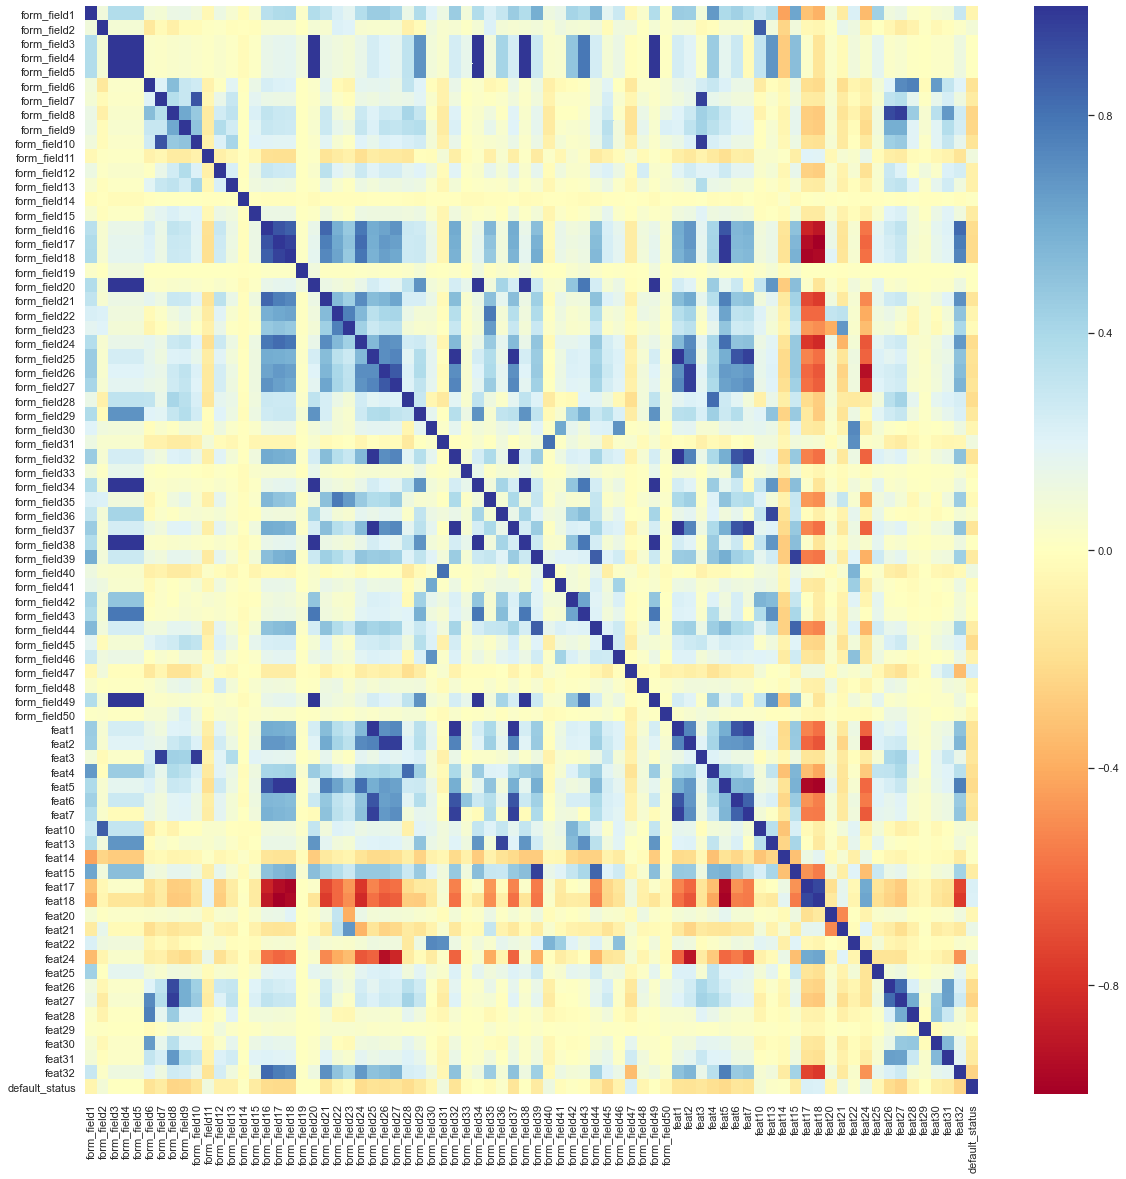

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(train2.corr(), cmap='RdYlBu')

<Figure size 1440x1440 with 0 Axes>

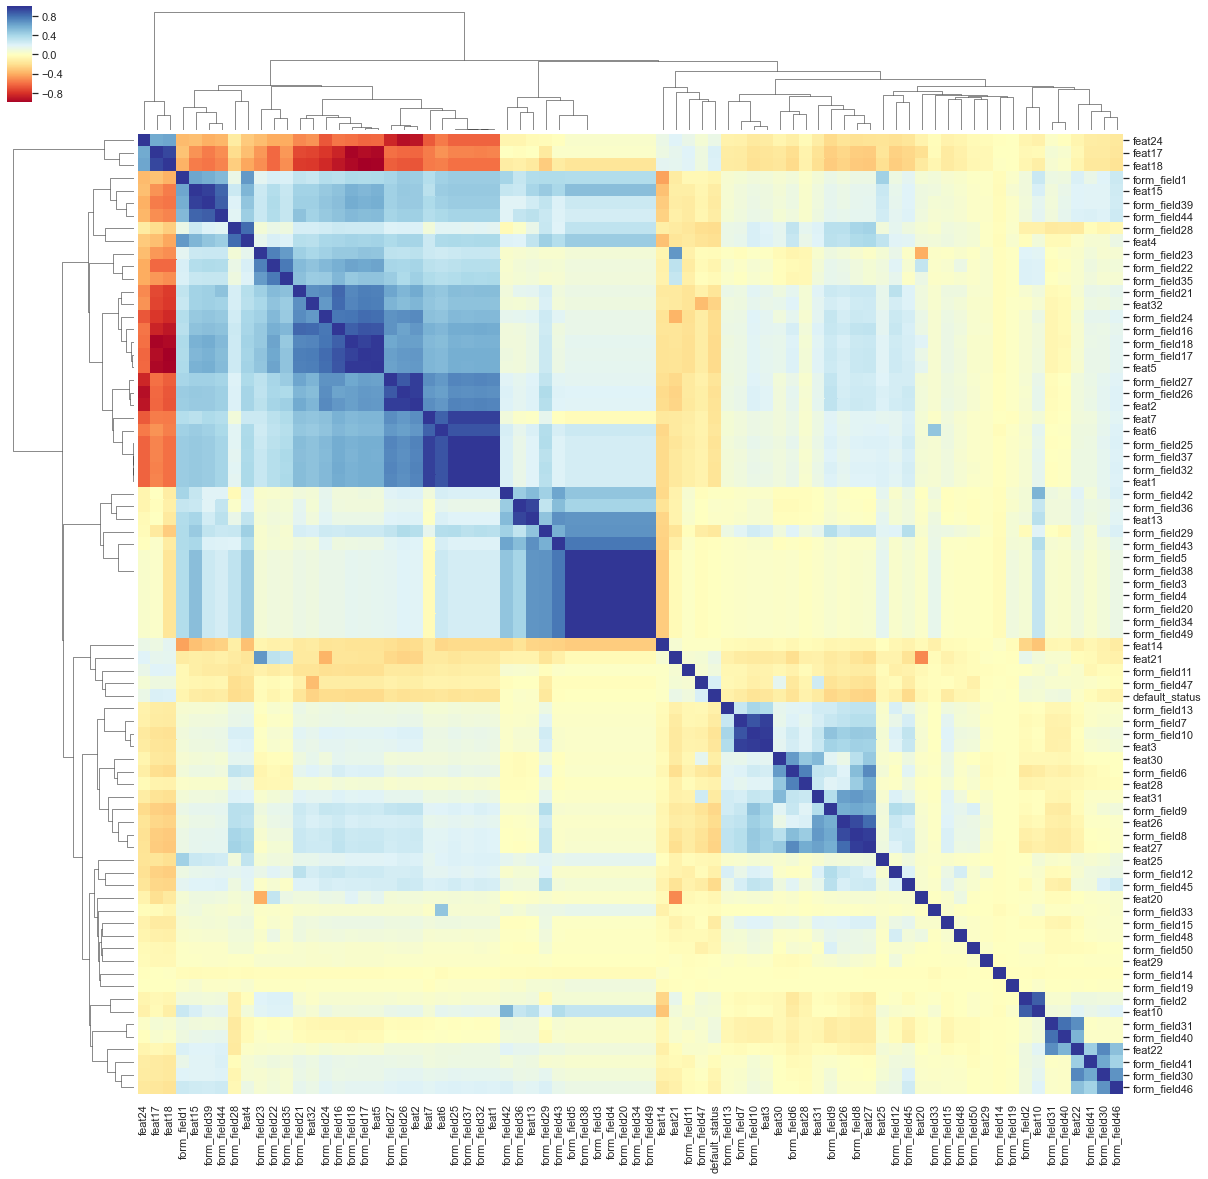

In [26]:
plt.figure(figsize=(20,20))
sns.clustermap(train2.corr(), cmap='RdYlBu', figsize=(20,20))

In [27]:
train2.corr()['default_status']

form_field1      -0.067756
form_field2       0.078799
form_field3       0.004208
form_field4       0.004214
form_field5       0.004273
form_field6      -0.178694
form_field7      -0.120591
form_field8      -0.239748
form_field9      -0.228798
form_field10     -0.169560
form_field11      0.108075
form_field12     -0.089953
form_field13     -0.091481
form_field14      0.008025
form_field15     -0.117446
form_field16     -0.208045
form_field17     -0.213786
form_field18     -0.218503
form_field19      0.000176
form_field20      0.004184
form_field21     -0.159772
form_field22     -0.067487
form_field23     -0.029095
form_field24     -0.207235
form_field25     -0.174073
form_field26     -0.180237
form_field27     -0.160941
form_field28     -0.206277
form_field29     -0.147643
form_field30     -0.059682
form_field31      0.101788
form_field32     -0.168679
form_field33     -0.019321
form_field34      0.004169
form_field35     -0.031688
form_field36      0.031367
form_field37     -0.162187
f

# Initial Feature Selection

In [189]:
'''train2.drop([
    'form_field32', 'form_field26', 'form_field27', 'form_field16',
    'form_field7', 'form_field10', 'form_field2', 'form_field28',
    'form_field17', 'form_field18', 'form_field19', 'form_field20',
    'form_field3', 'form_field5', 'form_field36', 'form_field38',
    'form_field34', 'form_field39', 'form_field4', 'form_field37', 'form_field23'
],
            inplace=True,
            axis=1)'''

# Get rid of duplicated columns

In [26]:
print(train2.shape)
train2 = train2.loc[:, ~train2.columns.duplicated()]
print(train2.shape)

(56000, 76)
(56000, 76)


# Visualizing the data using PCA

In [30]:
# Using principal component analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cry = train2.drop('default_status', axis=1).values.copy()
no = train2['default_status'].copy()

cry = StandardScaler().fit_transform(cry)

print(np.mean(cry), np.std(cry))

pca = PCA(n_components=2)

train4 = pca.fit_transform(cry)

train4 = pd.DataFrame(train4)
train4

-1.5675022084559757e-13 0.9999999999999905


0         1
0     -1.004540  2.959472
1     -0.245996  3.657728
2     -1.147405 -1.332905
3     -1.338002 -1.123308
4     -3.492830  1.624377
...         ...       ...
55995  2.882615 -2.104336
55996 -3.209799  0.299559
55997 -1.647965 -0.488087
55998 -1.407028 -1.859277
55999  1.012552  2.789423

[56000 rows x 2 columns]

In [31]:
# explained variance ratio

print(pca.explained_variance_ratio_)

[0.16433932 0.11460717]


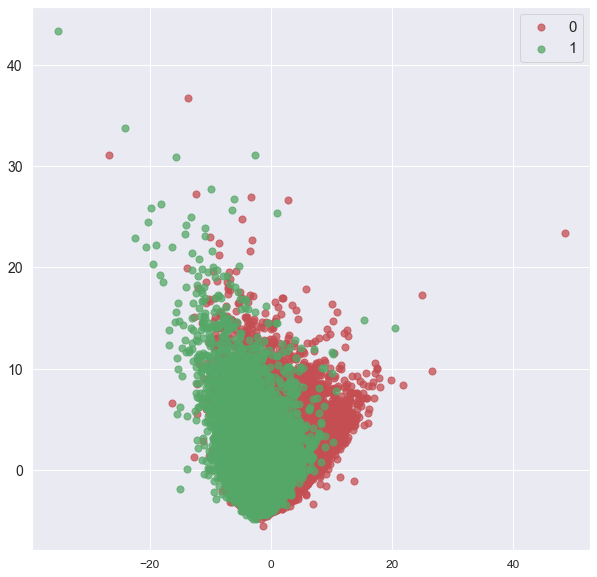

In [32]:
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    itk = no ==target
    
    plt.scatter(train4.loc[itk, 0], train4.loc[itk, 1], s=50, c = color, alpha=0.75)

plt.legend(targets, prop={'size': 15})

form_field1         AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
form_field2       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
form_field3       AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
form_field4       AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
form_field5       AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
form_field6       AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
form_field7       AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
form_field8       AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
form_field9         AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
form_field10      AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
form_field11      AxesSubplot(0.322872,0.739237;0.0824468x0.0639...
form_field12      AxesSubplot(0.421809,0.739237;0.0824468x0.0639...
form_field13      AxesSubplot(0.520745,0.739237;0.0824468x0.0639...
form_field14      AxesSubplot(0.619681,0.739237;0.0824468x0.0639...
form_field15      AxesSubplot(0.718617,0.739237;

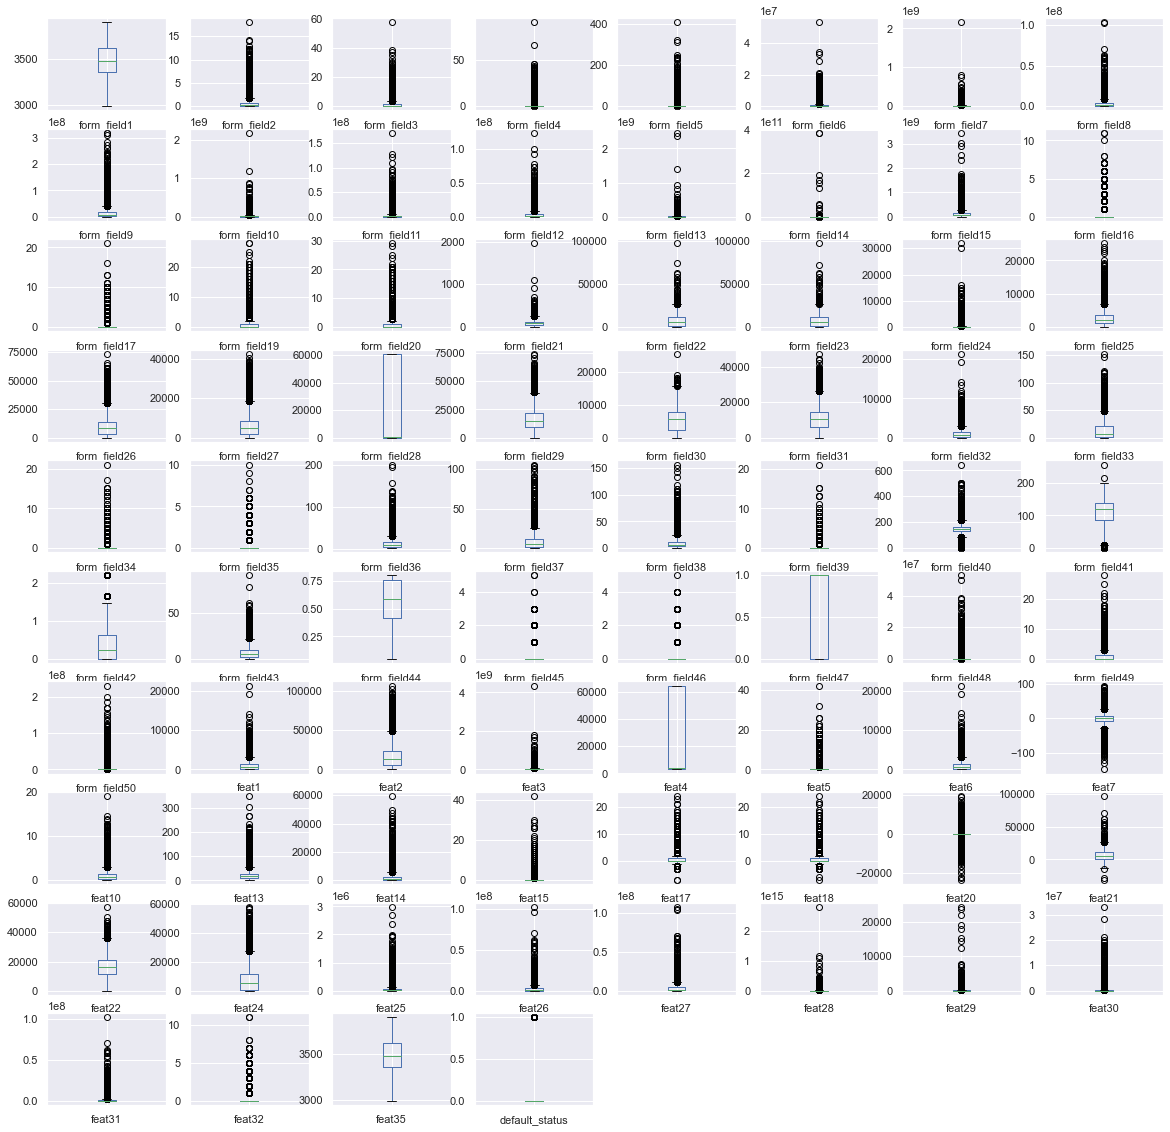

In [27]:
train2.plot(kind='box', subplots=True, layout=(10,8), figsize=(20,20), sharex=False, sharey=False, )


# Splitting the Dataframe

In [28]:
def fix_outliers(val):
    
    if val > 3:
        val = 99999.99999
    elif val < -3:
        val = -99999.99999
    else:
        pass
    return val

In [21]:
# splitting our data
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = train2.drop(['default_status'], axis=1)
#X = StandardScaler().fit_transform(X)
print(X.shape)
y = train2['default_status']
#test2 = StandardScaler().fit_transform(test2)

#outcheck = pd.DataFrame(X)
#outcheck2 = pd.DataFrame(test2)

#for x in outcheck.columns:
 #   outcheck[x] = outcheck[x].apply(fix_outliers)
#X = outcheck.copy()
#print(X.shape)
#X = X.values

(56000, 75)


In [22]:
# fix outliers in test columns

#for x in outcheck2.columns:
 #   outcheck2[x] = outcheck2[x].apply(fix_outliers)
#test2 = outcheck2.copy()
#print(test2.shape)
#test2 = test2.values

In [23]:
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_index, test_index in ss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

# Using A Deep Neural Network

In [100]:
#Only run this if using neural networks

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [101]:
# Now to make our model
from tensorflow.keras import regularizers
initializer = tf.keras.initializers.RandomNormal()
regularizer = tf.keras.regularizers.l1_l2(l1=0, l2=0)


model = Sequential()
model.add(Dense(32, input_dim=(75), kernel_initializer=initializer,
                bias_initializer=initializer))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())


model.add(Dense(32,))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())

model.add(Lambda(lambda x: tf.expand_dims(x, axis=1)))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())

model.add(SimpleRNN(50,))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

In [102]:
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.AUC(), 'accuracy'])

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                2432      
_________________________________________________________________
activation_28 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_29 (Activation)   (None, 32)                0         
_________________________________________________________________
lambda_7 (Lambda)            (None, 1, 32)             0         
_________________________________________________________________
activation_30 (Activation)   (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 50)               

In [104]:
es = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=25, callbacks=es)

Train on 44800 samples, validate on 11200 samples
Epoch 1/5
44800/44800 [==============================] - 18s 394us/sample - loss: 0.4614 - auc_6: 0.8604 - accuracy: 0.7717 - val_loss: 0.4494 - val_auc_6: 0.8682 - val_accuracy: 0.7786
Epoch 2/5
44800/44800 [==============================] - 16s 351us/sample - loss: 0.4475 - auc_6: 0.8693 - accuracy: 0.7800 - val_loss: 0.4462 - val_auc_6: 0.8702 - val_accuracy: 0.7817
Epoch 3/5
44800/44800 [==============================] - 15s 342us/sample - loss: 0.4440 - auc_6: 0.8715 - accuracy: 0.7817 - val_loss: 0.4432 - val_auc_6: 0.8720 - val_accuracy: 0.7838
Epoch 4/5
44800/44800 [==============================] - 15s 343us/sample - loss: 0.4408 - auc_6: 0.8736 - accuracy: 0.7835 - val_loss: 0.4439 - val_auc_6: 0.8716 - val_accuracy: 0.7835
Epoch 5/5
44800/44800 [==============================] - 16s 358us/sample - loss: 0.4388 - auc_6: 0.8748 - accuracy: 0.7850 - val_loss: 0.4431 - val_auc_6: 0.8720 - val_accuracy: 0.7834


In [43]:
# don't tamper with the code from below

In [105]:
prex = model.predict_proba(X_test, batch_size=25)
prext = model.predict_proba(X_train, batch_size=25)

#sample5  = pd.read_csv("SampleSubmission.csv")
#pred5 = model.predict_proba(test2)
#catdf5 = sample5.copy()
#catdf5['default_status'] = pred5[:, 1]
#catdf5.to_csv('c911submission.csv', index=False)

In [106]:
prex[:10]

array([[0.9834916 , 0.0148451 ],
       [0.9878293 , 0.01078233],
       [0.6741536 , 0.33850557],
       [0.70631665, 0.35373712],
       [0.8199744 , 0.17997876],
       [0.7899361 , 0.21048853],
       [0.38081506, 0.62984633],
       [0.871866  , 0.11751295],
       [0.49766243, 0.49923193],
       [0.8985989 , 0.09126112]], dtype=float32)

In [107]:
y_test[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [108]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
print(roc_auc_score(y_test, prex))
print(roc_auc_score(y_train, prext))

0.8004629777514014
0.8114173170154902


# Using Machine Learning Models

In [24]:
# Using other models

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# USING ANOVA FEATURE SELECTION

In [44]:
nf = [x+1 for x in range(X.shape[1])]
result = []

for a in nf:
    model = CatBoostClassifier(
        random_seed=10,
        iterations=1000,
        use_best_model=True,
    )
    fs = SelectKBest(score_func=f_classif, k=a)
    fs.fit(X_train, y_train)
    X_trainfs = fs.transform(X_train)
    X_testfs = fs.transform(X_test)

    model.fit(X_trainfs,
        y_train,
        eval_set=[(X_trainfs, y_train), (X_testfs, y_test)],
        early_stopping_rounds=100,
        verbose=1)
    score = model.predict_proba(X_test)
    scores = roc_auc_score(y_test, score[:, 1])
    result.append([a, scores])
    print(a, scores)

Learning rate set to 0.081054
0:	learn: 0.6543176	test: 0.6543176	test1: 0.6543847	best: 0.6543847 (0)	total: 53.6ms	remaining: 53.5s
1:	learn: 0.6233486	test: 0.6233486	test1: 0.6235038	best: 0.6235038 (1)	total: 93.8ms	remaining: 46.8s
2:	learn: 0.5983064	test: 0.5983064	test1: 0.5984685	best: 0.5984685 (2)	total: 132ms	remaining: 43.8s
3:	learn: 0.5776798	test: 0.5776798	test1: 0.5778983	best: 0.5778983 (3)	total: 152ms	remaining: 37.8s
4:	learn: 0.5610644	test: 0.5610644	test1: 0.5613519	best: 0.5613519 (4)	total: 166ms	remaining: 33.1s
5:	learn: 0.5476490	test: 0.5476490	test1: 0.5480542	best: 0.5480542 (5)	total: 191ms	remaining: 31.6s
6:	learn: 0.5365401	test: 0.5365401	test1: 0.5370597	best: 0.5370597 (6)	total: 206ms	remaining: 29.2s
7:	learn: 0.5276616	test: 0.5276616	test1: 0.5283001	best: 0.5283001 (7)	total: 221ms	remaining: 27.5s
8:	learn: 0.5207287	test: 0.5207287	test1: 0.5214098	best: 0.5214098 (8)	total: 236ms	remaining: 26s
9:	learn: 0.5154669	test: 0.5154669	test1: 

85:	learn: 0.4848203	test: 0.4848203	test1: 0.4867855	best: 0.4867805 (82)	total: 1.44s	remaining: 15.3s
86:	learn: 0.4848168	test: 0.4848168	test1: 0.4867775	best: 0.4867775 (86)	total: 1.46s	remaining: 15.3s
87:	learn: 0.4848157	test: 0.4848157	test1: 0.4867754	best: 0.4867754 (87)	total: 1.47s	remaining: 15.2s
88:	learn: 0.4848150	test: 0.4848150	test1: 0.4867727	best: 0.4867727 (88)	total: 1.49s	remaining: 15.3s
89:	learn: 0.4848127	test: 0.4848127	test1: 0.4867718	best: 0.4867718 (89)	total: 1.51s	remaining: 15.2s
90:	learn: 0.4848125	test: 0.4848125	test1: 0.4867701	best: 0.4867701 (90)	total: 1.52s	remaining: 15.2s
91:	learn: 0.4848038	test: 0.4848038	test1: 0.4867628	best: 0.4867628 (91)	total: 1.53s	remaining: 15.1s
92:	learn: 0.4848010	test: 0.4848010	test1: 0.4867616	best: 0.4867616 (92)	total: 1.55s	remaining: 15.1s
93:	learn: 0.4847931	test: 0.4847931	test1: 0.4867675	best: 0.4867616 (92)	total: 1.56s	remaining: 15s
94:	learn: 0.4847859	test: 0.4847859	test1: 0.4867702	bes

171:	learn: 0.4841382	test: 0.4841382	test1: 0.4869293	best: 0.4867552 (103)	total: 2.71s	remaining: 13s
172:	learn: 0.4841283	test: 0.4841283	test1: 0.4869489	best: 0.4867552 (103)	total: 2.72s	remaining: 13s
173:	learn: 0.4841108	test: 0.4841108	test1: 0.4869600	best: 0.4867552 (103)	total: 2.74s	remaining: 13s
174:	learn: 0.4841019	test: 0.4841019	test1: 0.4869677	best: 0.4867552 (103)	total: 2.77s	remaining: 13s
175:	learn: 0.4840883	test: 0.4840883	test1: 0.4869730	best: 0.4867552 (103)	total: 2.79s	remaining: 13s
176:	learn: 0.4840737	test: 0.4840737	test1: 0.4869718	best: 0.4867552 (103)	total: 2.81s	remaining: 13.1s
177:	learn: 0.4840644	test: 0.4840644	test1: 0.4869883	best: 0.4867552 (103)	total: 2.82s	remaining: 13s
178:	learn: 0.4840477	test: 0.4840477	test1: 0.4869884	best: 0.4867552 (103)	total: 2.84s	remaining: 13s
179:	learn: 0.4840316	test: 0.4840316	test1: 0.4870024	best: 0.4867552 (103)	total: 2.86s	remaining: 13s
180:	learn: 0.4840138	test: 0.4840138	test1: 0.486999

48:	learn: 0.4739389	test: 0.4739389	test1: 0.4761783	best: 0.4761783 (48)	total: 928ms	remaining: 18s
49:	learn: 0.4738938	test: 0.4738938	test1: 0.4761512	best: 0.4761512 (49)	total: 943ms	remaining: 17.9s
50:	learn: 0.4738141	test: 0.4738141	test1: 0.4761248	best: 0.4761248 (50)	total: 964ms	remaining: 17.9s
51:	learn: 0.4737784	test: 0.4737784	test1: 0.4761363	best: 0.4761248 (50)	total: 981ms	remaining: 17.9s
52:	learn: 0.4737549	test: 0.4737549	test1: 0.4761375	best: 0.4761248 (50)	total: 994ms	remaining: 17.8s
53:	learn: 0.4737177	test: 0.4737177	test1: 0.4761164	best: 0.4761164 (53)	total: 1.01s	remaining: 17.6s
54:	learn: 0.4736697	test: 0.4736697	test1: 0.4760828	best: 0.4760828 (54)	total: 1.02s	remaining: 17.6s
55:	learn: 0.4735897	test: 0.4735897	test1: 0.4760771	best: 0.4760771 (55)	total: 1.04s	remaining: 17.5s
56:	learn: 0.4735588	test: 0.4735588	test1: 0.4760869	best: 0.4760771 (55)	total: 1.05s	remaining: 17.4s
57:	learn: 0.4735142	test: 0.4735142	test1: 0.4760749	bes

127:	learn: 0.4715053	test: 0.4715053	test1: 0.4757270	best: 0.4757240 (126)	total: 2.39s	remaining: 16.3s
128:	learn: 0.4714852	test: 0.4714852	test1: 0.4757429	best: 0.4757240 (126)	total: 2.41s	remaining: 16.3s
129:	learn: 0.4714702	test: 0.4714702	test1: 0.4757583	best: 0.4757240 (126)	total: 2.43s	remaining: 16.3s
130:	learn: 0.4714414	test: 0.4714414	test1: 0.4757410	best: 0.4757240 (126)	total: 2.45s	remaining: 16.3s
131:	learn: 0.4714012	test: 0.4714012	test1: 0.4757696	best: 0.4757240 (126)	total: 2.48s	remaining: 16.3s
132:	learn: 0.4713772	test: 0.4713772	test1: 0.4757802	best: 0.4757240 (126)	total: 2.51s	remaining: 16.3s
133:	learn: 0.4713486	test: 0.4713486	test1: 0.4757685	best: 0.4757240 (126)	total: 2.53s	remaining: 16.4s
134:	learn: 0.4713210	test: 0.4713210	test1: 0.4757874	best: 0.4757240 (126)	total: 2.55s	remaining: 16.4s
135:	learn: 0.4712996	test: 0.4712996	test1: 0.4757749	best: 0.4757240 (126)	total: 2.57s	remaining: 16.3s
136:	learn: 0.4712632	test: 0.4712632

205:	learn: 0.4686602	test: 0.4686602	test1: 0.4762798	best: 0.4757240 (126)	total: 4.06s	remaining: 15.6s
206:	learn: 0.4686265	test: 0.4686265	test1: 0.4762921	best: 0.4757240 (126)	total: 4.07s	remaining: 15.6s
207:	learn: 0.4685833	test: 0.4685833	test1: 0.4762838	best: 0.4757240 (126)	total: 4.09s	remaining: 15.6s
208:	learn: 0.4685424	test: 0.4685424	test1: 0.4763113	best: 0.4757240 (126)	total: 4.11s	remaining: 15.6s
209:	learn: 0.4685131	test: 0.4685131	test1: 0.4762924	best: 0.4757240 (126)	total: 4.13s	remaining: 15.5s
210:	learn: 0.4684738	test: 0.4684738	test1: 0.4763147	best: 0.4757240 (126)	total: 4.14s	remaining: 15.5s
211:	learn: 0.4684318	test: 0.4684318	test1: 0.4763693	best: 0.4757240 (126)	total: 4.17s	remaining: 15.5s
212:	learn: 0.4683831	test: 0.4683831	test1: 0.4763768	best: 0.4757240 (126)	total: 4.19s	remaining: 15.5s
213:	learn: 0.4683361	test: 0.4683361	test1: 0.4763777	best: 0.4757240 (126)	total: 4.2s	remaining: 15.4s
214:	learn: 0.4682985	test: 0.4682985	

61:	learn: 0.4593718	test: 0.4593718	test1: 0.4611487	best: 0.4611487 (61)	total: 1.12s	remaining: 16.9s
62:	learn: 0.4593115	test: 0.4593115	test1: 0.4611114	best: 0.4611114 (62)	total: 1.15s	remaining: 17.1s
63:	learn: 0.4592499	test: 0.4592499	test1: 0.4610788	best: 0.4610788 (63)	total: 1.19s	remaining: 17.4s
64:	learn: 0.4591878	test: 0.4591878	test1: 0.4610405	best: 0.4610405 (64)	total: 1.2s	remaining: 17.3s
65:	learn: 0.4591620	test: 0.4591620	test1: 0.4610209	best: 0.4610209 (65)	total: 1.22s	remaining: 17.3s
66:	learn: 0.4591183	test: 0.4591183	test1: 0.4610072	best: 0.4610072 (66)	total: 1.24s	remaining: 17.3s
67:	learn: 0.4590630	test: 0.4590630	test1: 0.4610153	best: 0.4610072 (66)	total: 1.26s	remaining: 17.3s
68:	learn: 0.4590142	test: 0.4590142	test1: 0.4609972	best: 0.4609972 (68)	total: 1.27s	remaining: 17.2s
69:	learn: 0.4589625	test: 0.4589625	test1: 0.4609805	best: 0.4609805 (69)	total: 1.3s	remaining: 17.3s
70:	learn: 0.4589221	test: 0.4589221	test1: 0.4609537	bes

139:	learn: 0.4569028	test: 0.4569028	test1: 0.4608095	best: 0.4607877 (98)	total: 2.63s	remaining: 16.2s
140:	learn: 0.4568609	test: 0.4568609	test1: 0.4608239	best: 0.4607877 (98)	total: 2.66s	remaining: 16.2s
141:	learn: 0.4568055	test: 0.4568055	test1: 0.4609034	best: 0.4607877 (98)	total: 2.69s	remaining: 16.2s
142:	learn: 0.4567571	test: 0.4567571	test1: 0.4608820	best: 0.4607877 (98)	total: 2.7s	remaining: 16.2s
143:	learn: 0.4567143	test: 0.4567143	test1: 0.4609142	best: 0.4607877 (98)	total: 2.72s	remaining: 16.2s
144:	learn: 0.4566785	test: 0.4566785	test1: 0.4609309	best: 0.4607877 (98)	total: 2.73s	remaining: 16.1s
145:	learn: 0.4566309	test: 0.4566309	test1: 0.4609649	best: 0.4607877 (98)	total: 2.76s	remaining: 16.1s
146:	learn: 0.4565848	test: 0.4565848	test1: 0.4609824	best: 0.4607877 (98)	total: 2.78s	remaining: 16.1s
147:	learn: 0.4565423	test: 0.4565423	test1: 0.4609886	best: 0.4607877 (98)	total: 2.8s	remaining: 16.1s
148:	learn: 0.4564940	test: 0.4564940	test1: 0.4

17:	learn: 0.4643842	test: 0.4643842	test1: 0.4646838	best: 0.4646838 (17)	total: 360ms	remaining: 19.6s
18:	learn: 0.4628452	test: 0.4628452	test1: 0.4632568	best: 0.4632568 (18)	total: 378ms	remaining: 19.5s
19:	learn: 0.4614480	test: 0.4614480	test1: 0.4618819	best: 0.4618819 (19)	total: 396ms	remaining: 19.4s
20:	learn: 0.4600680	test: 0.4600680	test1: 0.4605725	best: 0.4605725 (20)	total: 416ms	remaining: 19.4s
21:	learn: 0.4588616	test: 0.4588616	test1: 0.4593523	best: 0.4593523 (21)	total: 435ms	remaining: 19.3s
22:	learn: 0.4577642	test: 0.4577642	test1: 0.4582938	best: 0.4582938 (22)	total: 454ms	remaining: 19.3s
23:	learn: 0.4572367	test: 0.4572367	test1: 0.4577746	best: 0.4577746 (23)	total: 467ms	remaining: 19s
24:	learn: 0.4563895	test: 0.4563895	test1: 0.4569306	best: 0.4569306 (24)	total: 486ms	remaining: 19s
25:	learn: 0.4556695	test: 0.4556695	test1: 0.4562556	best: 0.4562556 (25)	total: 510ms	remaining: 19.1s
26:	learn: 0.4549351	test: 0.4549351	test1: 0.4555371	best:

100:	learn: 0.4465833	test: 0.4465833	test1: 0.4501935	best: 0.4501629 (93)	total: 2.34s	remaining: 20.8s
101:	learn: 0.4465109	test: 0.4465109	test1: 0.4501504	best: 0.4501504 (101)	total: 2.36s	remaining: 20.8s
102:	learn: 0.4464490	test: 0.4464490	test1: 0.4501267	best: 0.4501267 (102)	total: 2.38s	remaining: 20.7s
103:	learn: 0.4464082	test: 0.4464082	test1: 0.4501574	best: 0.4501267 (102)	total: 2.4s	remaining: 20.7s
104:	learn: 0.4463661	test: 0.4463661	test1: 0.4501493	best: 0.4501267 (102)	total: 2.42s	remaining: 20.6s
105:	learn: 0.4463553	test: 0.4463553	test1: 0.4501585	best: 0.4501267 (102)	total: 2.45s	remaining: 20.6s
106:	learn: 0.4463252	test: 0.4463252	test1: 0.4501293	best: 0.4501267 (102)	total: 2.47s	remaining: 20.6s
107:	learn: 0.4463172	test: 0.4463172	test1: 0.4501442	best: 0.4501267 (102)	total: 2.48s	remaining: 20.5s
108:	learn: 0.4463102	test: 0.4463102	test1: 0.4501430	best: 0.4501267 (102)	total: 2.51s	remaining: 20.5s
109:	learn: 0.4462836	test: 0.4462836	t

178:	learn: 0.4434188	test: 0.4434188	test1: 0.4502725	best: 0.4500614 (119)	total: 3.99s	remaining: 18.3s
179:	learn: 0.4434087	test: 0.4434087	test1: 0.4502799	best: 0.4500614 (119)	total: 4.01s	remaining: 18.3s
180:	learn: 0.4433643	test: 0.4433643	test1: 0.4502907	best: 0.4500614 (119)	total: 4.03s	remaining: 18.2s
181:	learn: 0.4433124	test: 0.4433124	test1: 0.4502770	best: 0.4500614 (119)	total: 4.05s	remaining: 18.2s
182:	learn: 0.4432439	test: 0.4432439	test1: 0.4502621	best: 0.4500614 (119)	total: 4.07s	remaining: 18.2s
183:	learn: 0.4431856	test: 0.4431856	test1: 0.4502997	best: 0.4500614 (119)	total: 4.09s	remaining: 18.1s
184:	learn: 0.4431502	test: 0.4431502	test1: 0.4502714	best: 0.4500614 (119)	total: 4.11s	remaining: 18.1s
185:	learn: 0.4430923	test: 0.4430923	test1: 0.4502770	best: 0.4500614 (119)	total: 4.13s	remaining: 18.1s
186:	learn: 0.4430415	test: 0.4430415	test1: 0.4502654	best: 0.4500614 (119)	total: 4.14s	remaining: 18s
187:	learn: 0.4429994	test: 0.4429994	t

35:	learn: 0.4419309	test: 0.4419309	test1: 0.4426218	best: 0.4426218 (35)	total: 744ms	remaining: 19.9s
36:	learn: 0.4417198	test: 0.4417198	test1: 0.4424114	best: 0.4424114 (36)	total: 761ms	remaining: 19.8s
37:	learn: 0.4415031	test: 0.4415031	test1: 0.4422387	best: 0.4422387 (37)	total: 779ms	remaining: 19.7s
38:	learn: 0.4413023	test: 0.4413023	test1: 0.4420662	best: 0.4420662 (38)	total: 801ms	remaining: 19.7s
39:	learn: 0.4411156	test: 0.4411156	test1: 0.4418990	best: 0.4418990 (39)	total: 818ms	remaining: 19.6s
40:	learn: 0.4409708	test: 0.4409708	test1: 0.4417483	best: 0.4417483 (40)	total: 837ms	remaining: 19.6s
41:	learn: 0.4407236	test: 0.4407236	test1: 0.4415629	best: 0.4415629 (41)	total: 854ms	remaining: 19.5s
42:	learn: 0.4406317	test: 0.4406317	test1: 0.4414859	best: 0.4414859 (42)	total: 876ms	remaining: 19.5s
43:	learn: 0.4404604	test: 0.4404604	test1: 0.4413962	best: 0.4413962 (43)	total: 905ms	remaining: 19.7s
44:	learn: 0.4402805	test: 0.4402805	test1: 0.4412240	b

114:	learn: 0.4362010	test: 0.4362010	test1: 0.4394707	best: 0.4394656 (113)	total: 2.29s	remaining: 17.6s
115:	learn: 0.4361790	test: 0.4361790	test1: 0.4394783	best: 0.4394656 (113)	total: 2.31s	remaining: 17.6s
116:	learn: 0.4361410	test: 0.4361410	test1: 0.4394496	best: 0.4394496 (116)	total: 2.33s	remaining: 17.6s
117:	learn: 0.4361176	test: 0.4361176	test1: 0.4394617	best: 0.4394496 (116)	total: 2.34s	remaining: 17.5s
118:	learn: 0.4360843	test: 0.4360843	test1: 0.4394816	best: 0.4394496 (116)	total: 2.37s	remaining: 17.5s
119:	learn: 0.4360260	test: 0.4360260	test1: 0.4394867	best: 0.4394496 (116)	total: 2.39s	remaining: 17.5s
120:	learn: 0.4359967	test: 0.4359967	test1: 0.4395097	best: 0.4394496 (116)	total: 2.41s	remaining: 17.5s
121:	learn: 0.4359434	test: 0.4359434	test1: 0.4395498	best: 0.4394496 (116)	total: 2.42s	remaining: 17.4s
122:	learn: 0.4358765	test: 0.4358765	test1: 0.4395036	best: 0.4394496 (116)	total: 2.45s	remaining: 17.5s
123:	learn: 0.4358658	test: 0.4358658

193:	learn: 0.4324557	test: 0.4324557	test1: 0.4399542	best: 0.4394496 (116)	total: 3.77s	remaining: 15.7s
194:	learn: 0.4324229	test: 0.4324229	test1: 0.4399566	best: 0.4394496 (116)	total: 3.78s	remaining: 15.6s
195:	learn: 0.4323813	test: 0.4323813	test1: 0.4399627	best: 0.4394496 (116)	total: 3.8s	remaining: 15.6s
196:	learn: 0.4323724	test: 0.4323724	test1: 0.4399477	best: 0.4394496 (116)	total: 3.82s	remaining: 15.6s
197:	learn: 0.4323088	test: 0.4323088	test1: 0.4399707	best: 0.4394496 (116)	total: 3.84s	remaining: 15.5s
198:	learn: 0.4322543	test: 0.4322543	test1: 0.4400104	best: 0.4394496 (116)	total: 3.85s	remaining: 15.5s
199:	learn: 0.4322150	test: 0.4322150	test1: 0.4400068	best: 0.4394496 (116)	total: 3.88s	remaining: 15.5s
200:	learn: 0.4321571	test: 0.4321571	test1: 0.4399986	best: 0.4394496 (116)	total: 3.9s	remaining: 15.5s
201:	learn: 0.4321518	test: 0.4321518	test1: 0.4399985	best: 0.4394496 (116)	total: 3.91s	remaining: 15.5s
202:	learn: 0.4321054	test: 0.4321054	t

55:	learn: 0.4362911	test: 0.4362911	test1: 0.4385423	best: 0.4385423 (55)	total: 1.3s	remaining: 21.9s
56:	learn: 0.4362319	test: 0.4362319	test1: 0.4385678	best: 0.4385423 (55)	total: 1.32s	remaining: 21.8s
57:	learn: 0.4361312	test: 0.4361312	test1: 0.4385120	best: 0.4385120 (57)	total: 1.34s	remaining: 21.7s
58:	learn: 0.4360780	test: 0.4360780	test1: 0.4384913	best: 0.4384913 (58)	total: 1.36s	remaining: 21.6s
59:	learn: 0.4359595	test: 0.4359595	test1: 0.4384078	best: 0.4384078 (59)	total: 1.37s	remaining: 21.5s
60:	learn: 0.4358437	test: 0.4358437	test1: 0.4383209	best: 0.4383209 (60)	total: 1.39s	remaining: 21.4s
61:	learn: 0.4357888	test: 0.4357888	test1: 0.4383305	best: 0.4383209 (60)	total: 1.41s	remaining: 21.4s
62:	learn: 0.4356777	test: 0.4356777	test1: 0.4382642	best: 0.4382642 (62)	total: 1.44s	remaining: 21.4s
63:	learn: 0.4356074	test: 0.4356074	test1: 0.4382593	best: 0.4382593 (63)	total: 1.46s	remaining: 21.3s
64:	learn: 0.4355057	test: 0.4355057	test1: 0.4382976	be

134:	learn: 0.4320257	test: 0.4320257	test1: 0.4378048	best: 0.4376878 (123)	total: 2.97s	remaining: 19s
135:	learn: 0.4319602	test: 0.4319602	test1: 0.4378150	best: 0.4376878 (123)	total: 2.98s	remaining: 19s
136:	learn: 0.4319290	test: 0.4319290	test1: 0.4378261	best: 0.4376878 (123)	total: 3s	remaining: 18.9s
137:	learn: 0.4318714	test: 0.4318714	test1: 0.4378289	best: 0.4376878 (123)	total: 3.02s	remaining: 18.8s
138:	learn: 0.4318162	test: 0.4318162	test1: 0.4378745	best: 0.4376878 (123)	total: 3.03s	remaining: 18.8s
139:	learn: 0.4317849	test: 0.4317849	test1: 0.4378578	best: 0.4376878 (123)	total: 3.05s	remaining: 18.7s
140:	learn: 0.4317331	test: 0.4317331	test1: 0.4378664	best: 0.4376878 (123)	total: 3.07s	remaining: 18.7s
141:	learn: 0.4316675	test: 0.4316675	test1: 0.4378651	best: 0.4376878 (123)	total: 3.09s	remaining: 18.6s
142:	learn: 0.4316130	test: 0.4316130	test1: 0.4378683	best: 0.4376878 (123)	total: 3.1s	remaining: 18.6s
143:	learn: 0.4315854	test: 0.4315854	test1: 

219:	learn: 0.4276856	test: 0.4276856	test1: 0.4382023	best: 0.4376878 (123)	total: 4.6s	remaining: 16.3s
220:	learn: 0.4276329	test: 0.4276329	test1: 0.4382115	best: 0.4376878 (123)	total: 4.62s	remaining: 16.3s
221:	learn: 0.4275791	test: 0.4275791	test1: 0.4382037	best: 0.4376878 (123)	total: 4.64s	remaining: 16.3s
222:	learn: 0.4275505	test: 0.4275505	test1: 0.4381814	best: 0.4376878 (123)	total: 4.66s	remaining: 16.2s
223:	learn: 0.4275433	test: 0.4275433	test1: 0.4381990	best: 0.4376878 (123)	total: 4.69s	remaining: 16.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4376878489
bestIteration = 123

Shrink model to first 124 iterations.
6 0.41141948561725333
Learning rate set to 0.081054
0:	learn: 0.6473537	test: 0.6473537	test1: 0.6473781	best: 0.6473781 (0)	total: 28.3ms	remaining: 28.3s
1:	learn: 0.6092849	test: 0.6092849	test1: 0.6094397	best: 0.6094397 (1)	total: 50ms	remaining: 25s
2:	learn: 0.5800407	test: 0.5800407	test1: 0.5801471	best: 0.5801471 (2

75:	learn: 0.4349046	test: 0.4349046	test1: 0.4383525	best: 0.4383525 (75)	total: 1.67s	remaining: 20.3s
76:	learn: 0.4348875	test: 0.4348875	test1: 0.4383540	best: 0.4383525 (75)	total: 1.69s	remaining: 20.3s
77:	learn: 0.4348572	test: 0.4348572	test1: 0.4383439	best: 0.4383439 (77)	total: 1.71s	remaining: 20.2s
78:	learn: 0.4348188	test: 0.4348188	test1: 0.4383218	best: 0.4383218 (78)	total: 1.73s	remaining: 20.2s
79:	learn: 0.4347162	test: 0.4347162	test1: 0.4382859	best: 0.4382859 (79)	total: 1.75s	remaining: 20.1s
80:	learn: 0.4346712	test: 0.4346712	test1: 0.4382656	best: 0.4382656 (80)	total: 1.77s	remaining: 20.1s
81:	learn: 0.4346297	test: 0.4346297	test1: 0.4382188	best: 0.4382188 (81)	total: 1.79s	remaining: 20.1s
82:	learn: 0.4345532	test: 0.4345532	test1: 0.4381928	best: 0.4381928 (82)	total: 1.82s	remaining: 20.2s
83:	learn: 0.4345476	test: 0.4345476	test1: 0.4381897	best: 0.4381897 (83)	total: 1.84s	remaining: 20.1s
84:	learn: 0.4344882	test: 0.4344882	test1: 0.4381692	b

153:	learn: 0.4312405	test: 0.4312405	test1: 0.4382706	best: 0.4380540 (120)	total: 3.71s	remaining: 20.4s
154:	learn: 0.4312113	test: 0.4312113	test1: 0.4382846	best: 0.4380540 (120)	total: 3.73s	remaining: 20.4s
155:	learn: 0.4311550	test: 0.4311550	test1: 0.4383173	best: 0.4380540 (120)	total: 3.79s	remaining: 20.5s
156:	learn: 0.4310527	test: 0.4310527	test1: 0.4382738	best: 0.4380540 (120)	total: 3.81s	remaining: 20.5s
157:	learn: 0.4309909	test: 0.4309909	test1: 0.4382656	best: 0.4380540 (120)	total: 3.85s	remaining: 20.5s
158:	learn: 0.4309021	test: 0.4309021	test1: 0.4382374	best: 0.4380540 (120)	total: 3.89s	remaining: 20.6s
159:	learn: 0.4308603	test: 0.4308603	test1: 0.4382414	best: 0.4380540 (120)	total: 3.92s	remaining: 20.6s
160:	learn: 0.4308204	test: 0.4308204	test1: 0.4382328	best: 0.4380540 (120)	total: 3.94s	remaining: 20.5s
161:	learn: 0.4307522	test: 0.4307522	test1: 0.4382229	best: 0.4380540 (120)	total: 3.96s	remaining: 20.5s
162:	learn: 0.4307027	test: 0.4307027

15:	learn: 0.4562470	test: 0.4562470	test1: 0.4568265	best: 0.4568265 (15)	total: 417ms	remaining: 25.6s
16:	learn: 0.4541440	test: 0.4541440	test1: 0.4547683	best: 0.4547683 (16)	total: 452ms	remaining: 26.2s
17:	learn: 0.4520882	test: 0.4520882	test1: 0.4526460	best: 0.4526460 (17)	total: 477ms	remaining: 26s
18:	learn: 0.4505360	test: 0.4505360	test1: 0.4511312	best: 0.4511312 (18)	total: 507ms	remaining: 26.2s
19:	learn: 0.4494671	test: 0.4494671	test1: 0.4500611	best: 0.4500611 (19)	total: 527ms	remaining: 25.8s
20:	learn: 0.4483194	test: 0.4483194	test1: 0.4490290	best: 0.4490290 (20)	total: 549ms	remaining: 25.6s
21:	learn: 0.4474083	test: 0.4474083	test1: 0.4482415	best: 0.4482415 (21)	total: 567ms	remaining: 25.2s
22:	learn: 0.4464854	test: 0.4464854	test1: 0.4473545	best: 0.4473545 (22)	total: 615ms	remaining: 26.1s
23:	learn: 0.4456050	test: 0.4456050	test1: 0.4466519	best: 0.4466519 (23)	total: 638ms	remaining: 25.9s
24:	learn: 0.4446584	test: 0.4446584	test1: 0.4457363	bes

101:	learn: 0.4334752	test: 0.4334752	test1: 0.4377743	best: 0.4377646 (95)	total: 2.72s	remaining: 24s
102:	learn: 0.4333939	test: 0.4333939	test1: 0.4377831	best: 0.4377646 (95)	total: 2.74s	remaining: 23.9s
103:	learn: 0.4333529	test: 0.4333529	test1: 0.4377562	best: 0.4377562 (103)	total: 2.76s	remaining: 23.8s
104:	learn: 0.4332959	test: 0.4332959	test1: 0.4377214	best: 0.4377214 (104)	total: 2.78s	remaining: 23.7s
105:	learn: 0.4332501	test: 0.4332501	test1: 0.4377316	best: 0.4377214 (104)	total: 2.8s	remaining: 23.6s
106:	learn: 0.4332114	test: 0.4332114	test1: 0.4377358	best: 0.4377214 (104)	total: 2.82s	remaining: 23.5s
107:	learn: 0.4331785	test: 0.4331785	test1: 0.4377179	best: 0.4377179 (107)	total: 2.83s	remaining: 23.4s
108:	learn: 0.4331553	test: 0.4331553	test1: 0.4377196	best: 0.4377179 (107)	total: 2.86s	remaining: 23.4s
109:	learn: 0.4331135	test: 0.4331135	test1: 0.4377015	best: 0.4377015 (109)	total: 2.88s	remaining: 23.3s
110:	learn: 0.4330717	test: 0.4330717	test

183:	learn: 0.4294370	test: 0.4294370	test1: 0.4378327	best: 0.4376061 (129)	total: 4.64s	remaining: 20.6s
184:	learn: 0.4293900	test: 0.4293900	test1: 0.4378324	best: 0.4376061 (129)	total: 4.67s	remaining: 20.6s
185:	learn: 0.4293213	test: 0.4293213	test1: 0.4378047	best: 0.4376061 (129)	total: 4.68s	remaining: 20.5s
186:	learn: 0.4292577	test: 0.4292577	test1: 0.4378015	best: 0.4376061 (129)	total: 4.71s	remaining: 20.5s
187:	learn: 0.4291854	test: 0.4291854	test1: 0.4377923	best: 0.4376061 (129)	total: 4.72s	remaining: 20.4s
188:	learn: 0.4291327	test: 0.4291327	test1: 0.4378087	best: 0.4376061 (129)	total: 4.74s	remaining: 20.3s
189:	learn: 0.4290999	test: 0.4290999	test1: 0.4377942	best: 0.4376061 (129)	total: 4.76s	remaining: 20.3s
190:	learn: 0.4290481	test: 0.4290481	test1: 0.4377806	best: 0.4376061 (129)	total: 4.78s	remaining: 20.3s
191:	learn: 0.4290028	test: 0.4290028	test1: 0.4377799	best: 0.4376061 (129)	total: 4.81s	remaining: 20.2s
192:	learn: 0.4289529	test: 0.4289529

35:	learn: 0.4393001	test: 0.4393001	test1: 0.4407893	best: 0.4407893 (35)	total: 737ms	remaining: 19.7s
36:	learn: 0.4389734	test: 0.4389734	test1: 0.4405518	best: 0.4405518 (36)	total: 755ms	remaining: 19.6s
37:	learn: 0.4387616	test: 0.4387616	test1: 0.4404445	best: 0.4404445 (37)	total: 781ms	remaining: 19.8s
38:	learn: 0.4384920	test: 0.4384920	test1: 0.4402562	best: 0.4402562 (38)	total: 798ms	remaining: 19.7s
39:	learn: 0.4383143	test: 0.4383143	test1: 0.4401126	best: 0.4401126 (39)	total: 822ms	remaining: 19.7s
40:	learn: 0.4381052	test: 0.4381052	test1: 0.4399772	best: 0.4399772 (40)	total: 841ms	remaining: 19.7s
41:	learn: 0.4379286	test: 0.4379286	test1: 0.4398019	best: 0.4398019 (41)	total: 866ms	remaining: 19.8s
42:	learn: 0.4377762	test: 0.4377762	test1: 0.4397021	best: 0.4397021 (42)	total: 885ms	remaining: 19.7s
43:	learn: 0.4376212	test: 0.4376212	test1: 0.4395771	best: 0.4395771 (43)	total: 911ms	remaining: 19.8s
44:	learn: 0.4375698	test: 0.4375698	test1: 0.4395427	b

116:	learn: 0.4326198	test: 0.4326198	test1: 0.4375499	best: 0.4375110 (104)	total: 2.44s	remaining: 18.4s
117:	learn: 0.4325478	test: 0.4325478	test1: 0.4375091	best: 0.4375091 (117)	total: 2.46s	remaining: 18.4s
118:	learn: 0.4324902	test: 0.4324902	test1: 0.4374726	best: 0.4374726 (118)	total: 2.48s	remaining: 18.4s
119:	learn: 0.4324149	test: 0.4324149	test1: 0.4374865	best: 0.4374726 (118)	total: 2.5s	remaining: 18.3s
120:	learn: 0.4323917	test: 0.4323917	test1: 0.4374969	best: 0.4374726 (118)	total: 2.52s	remaining: 18.3s
121:	learn: 0.4323421	test: 0.4323421	test1: 0.4375136	best: 0.4374726 (118)	total: 2.54s	remaining: 18.3s
122:	learn: 0.4323284	test: 0.4323284	test1: 0.4375171	best: 0.4374726 (118)	total: 2.56s	remaining: 18.3s
123:	learn: 0.4322657	test: 0.4322657	test1: 0.4375254	best: 0.4374726 (118)	total: 2.58s	remaining: 18.2s
124:	learn: 0.4322272	test: 0.4322272	test1: 0.4375167	best: 0.4374726 (118)	total: 2.6s	remaining: 18.2s
125:	learn: 0.4322032	test: 0.4322032	t

193:	learn: 0.4283609	test: 0.4283609	test1: 0.4378633	best: 0.4374726 (118)	total: 3.9s	remaining: 16.2s
194:	learn: 0.4283531	test: 0.4283531	test1: 0.4378710	best: 0.4374726 (118)	total: 3.92s	remaining: 16.2s
195:	learn: 0.4282972	test: 0.4282972	test1: 0.4378845	best: 0.4374726 (118)	total: 3.94s	remaining: 16.1s
196:	learn: 0.4282454	test: 0.4282454	test1: 0.4379197	best: 0.4374726 (118)	total: 3.96s	remaining: 16.1s
197:	learn: 0.4281963	test: 0.4281963	test1: 0.4379082	best: 0.4374726 (118)	total: 3.97s	remaining: 16.1s
198:	learn: 0.4281190	test: 0.4281190	test1: 0.4379372	best: 0.4374726 (118)	total: 3.99s	remaining: 16.1s
199:	learn: 0.4280544	test: 0.4280544	test1: 0.4379322	best: 0.4374726 (118)	total: 4.01s	remaining: 16s
200:	learn: 0.4279856	test: 0.4279856	test1: 0.4379534	best: 0.4374726 (118)	total: 4.03s	remaining: 16s
201:	learn: 0.4279485	test: 0.4279485	test1: 0.4379515	best: 0.4374726 (118)	total: 4.05s	remaining: 16s
202:	learn: 0.4278759	test: 0.4278759	test1:

52:	learn: 0.4363418	test: 0.4363418	test1: 0.4386222	best: 0.4386222 (52)	total: 1.11s	remaining: 19.8s
53:	learn: 0.4361525	test: 0.4361525	test1: 0.4385524	best: 0.4385524 (53)	total: 1.13s	remaining: 19.9s
54:	learn: 0.4360645	test: 0.4360645	test1: 0.4385459	best: 0.4385459 (54)	total: 1.15s	remaining: 19.8s
55:	learn: 0.4359684	test: 0.4359684	test1: 0.4384879	best: 0.4384879 (55)	total: 1.19s	remaining: 20.1s
56:	learn: 0.4358856	test: 0.4358856	test1: 0.4384667	best: 0.4384667 (56)	total: 1.22s	remaining: 20.1s
57:	learn: 0.4357715	test: 0.4357715	test1: 0.4383798	best: 0.4383798 (57)	total: 1.26s	remaining: 20.5s
58:	learn: 0.4357165	test: 0.4357165	test1: 0.4383395	best: 0.4383395 (58)	total: 1.28s	remaining: 20.4s
59:	learn: 0.4356381	test: 0.4356381	test1: 0.4382810	best: 0.4382810 (59)	total: 1.31s	remaining: 20.5s
60:	learn: 0.4355209	test: 0.4355209	test1: 0.4382733	best: 0.4382733 (60)	total: 1.32s	remaining: 20.4s
61:	learn: 0.4353948	test: 0.4353948	test1: 0.4382896	b

132:	learn: 0.4318129	test: 0.4318129	test1: 0.4376690	best: 0.4376690 (132)	total: 2.74s	remaining: 17.8s
133:	learn: 0.4317903	test: 0.4317903	test1: 0.4376626	best: 0.4376626 (133)	total: 2.75s	remaining: 17.8s
134:	learn: 0.4317887	test: 0.4317887	test1: 0.4376620	best: 0.4376620 (134)	total: 2.77s	remaining: 17.7s
135:	learn: 0.4317450	test: 0.4317450	test1: 0.4376445	best: 0.4376445 (135)	total: 2.78s	remaining: 17.7s
136:	learn: 0.4317106	test: 0.4317106	test1: 0.4376753	best: 0.4376445 (135)	total: 2.8s	remaining: 17.6s
137:	learn: 0.4316686	test: 0.4316686	test1: 0.4376795	best: 0.4376445 (135)	total: 2.82s	remaining: 17.6s
138:	learn: 0.4316089	test: 0.4316089	test1: 0.4376647	best: 0.4376445 (135)	total: 2.84s	remaining: 17.6s
139:	learn: 0.4315408	test: 0.4315408	test1: 0.4376540	best: 0.4376445 (135)	total: 2.86s	remaining: 17.6s
140:	learn: 0.4314936	test: 0.4314936	test1: 0.4376862	best: 0.4376445 (135)	total: 2.88s	remaining: 17.5s
141:	learn: 0.4314674	test: 0.4314674	

217:	learn: 0.4273750	test: 0.4273750	test1: 0.4380287	best: 0.4376369 (146)	total: 4.44s	remaining: 15.9s
218:	learn: 0.4273079	test: 0.4273079	test1: 0.4380055	best: 0.4376369 (146)	total: 4.46s	remaining: 15.9s
219:	learn: 0.4273055	test: 0.4273055	test1: 0.4380112	best: 0.4376369 (146)	total: 4.47s	remaining: 15.9s
220:	learn: 0.4272600	test: 0.4272600	test1: 0.4379838	best: 0.4376369 (146)	total: 4.49s	remaining: 15.8s
221:	learn: 0.4271699	test: 0.4271699	test1: 0.4379813	best: 0.4376369 (146)	total: 4.51s	remaining: 15.8s
222:	learn: 0.4271080	test: 0.4271080	test1: 0.4380379	best: 0.4376369 (146)	total: 4.54s	remaining: 15.8s
223:	learn: 0.4270727	test: 0.4270727	test1: 0.4380723	best: 0.4376369 (146)	total: 4.56s	remaining: 15.8s
224:	learn: 0.4270703	test: 0.4270703	test1: 0.4380791	best: 0.4376369 (146)	total: 4.59s	remaining: 15.8s
225:	learn: 0.4270197	test: 0.4270197	test1: 0.4381216	best: 0.4376369 (146)	total: 4.61s	remaining: 15.8s
226:	learn: 0.4270087	test: 0.4270087

46:	learn: 0.4318096	test: 0.4318096	test1: 0.4336386	best: 0.4336386 (46)	total: 1.19s	remaining: 24.1s
47:	learn: 0.4316536	test: 0.4316536	test1: 0.4335275	best: 0.4335275 (47)	total: 1.21s	remaining: 24.1s
48:	learn: 0.4315022	test: 0.4315022	test1: 0.4334362	best: 0.4334362 (48)	total: 1.25s	remaining: 24.2s
49:	learn: 0.4313125	test: 0.4313125	test1: 0.4333863	best: 0.4333863 (49)	total: 1.27s	remaining: 24.1s
50:	learn: 0.4312200	test: 0.4312200	test1: 0.4333489	best: 0.4333489 (50)	total: 1.29s	remaining: 24s
51:	learn: 0.4311448	test: 0.4311448	test1: 0.4332394	best: 0.4332394 (51)	total: 1.31s	remaining: 24s
52:	learn: 0.4310495	test: 0.4310495	test1: 0.4331653	best: 0.4331653 (52)	total: 1.34s	remaining: 23.9s
53:	learn: 0.4309621	test: 0.4309621	test1: 0.4330810	best: 0.4330810 (53)	total: 1.37s	remaining: 24s
54:	learn: 0.4308221	test: 0.4308221	test1: 0.4330015	best: 0.4330015 (54)	total: 1.39s	remaining: 24s
55:	learn: 0.4306941	test: 0.4306941	test1: 0.4329356	best: 0.4

130:	learn: 0.4257393	test: 0.4257393	test1: 0.4315011	best: 0.4313448 (121)	total: 3.06s	remaining: 20.3s
131:	learn: 0.4256994	test: 0.4256994	test1: 0.4315192	best: 0.4313448 (121)	total: 3.08s	remaining: 20.3s
132:	learn: 0.4256954	test: 0.4256954	test1: 0.4315142	best: 0.4313448 (121)	total: 3.11s	remaining: 20.3s
133:	learn: 0.4256330	test: 0.4256330	test1: 0.4314851	best: 0.4313448 (121)	total: 3.13s	remaining: 20.2s
134:	learn: 0.4256035	test: 0.4256035	test1: 0.4314970	best: 0.4313448 (121)	total: 3.15s	remaining: 20.2s
135:	learn: 0.4255321	test: 0.4255321	test1: 0.4315494	best: 0.4313448 (121)	total: 3.17s	remaining: 20.2s
136:	learn: 0.4254461	test: 0.4254461	test1: 0.4315075	best: 0.4313448 (121)	total: 3.19s	remaining: 20.1s
137:	learn: 0.4254164	test: 0.4254164	test1: 0.4315000	best: 0.4313448 (121)	total: 3.21s	remaining: 20.1s
138:	learn: 0.4252999	test: 0.4252999	test1: 0.4314957	best: 0.4313448 (121)	total: 3.23s	remaining: 20s
139:	learn: 0.4252316	test: 0.4252316	t

212:	learn: 0.4210316	test: 0.4210316	test1: 0.4316711	best: 0.4313448 (121)	total: 4.7s	remaining: 17.4s
213:	learn: 0.4209794	test: 0.4209794	test1: 0.4316459	best: 0.4313448 (121)	total: 4.71s	remaining: 17.3s
214:	learn: 0.4209139	test: 0.4209139	test1: 0.4316636	best: 0.4313448 (121)	total: 4.73s	remaining: 17.3s
215:	learn: 0.4208724	test: 0.4208724	test1: 0.4316884	best: 0.4313448 (121)	total: 4.75s	remaining: 17.2s
216:	learn: 0.4208321	test: 0.4208321	test1: 0.4316937	best: 0.4313448 (121)	total: 4.77s	remaining: 17.2s
217:	learn: 0.4208038	test: 0.4208038	test1: 0.4317044	best: 0.4313448 (121)	total: 4.79s	remaining: 17.2s
218:	learn: 0.4207895	test: 0.4207895	test1: 0.4317164	best: 0.4313448 (121)	total: 4.8s	remaining: 17.1s
219:	learn: 0.4207273	test: 0.4207273	test1: 0.4317130	best: 0.4313448 (121)	total: 4.83s	remaining: 17.1s
220:	learn: 0.4206712	test: 0.4206712	test1: 0.4317086	best: 0.4313448 (121)	total: 4.84s	remaining: 17.1s
221:	learn: 0.4206014	test: 0.4206014	t

67:	learn: 0.4289606	test: 0.4289606	test1: 0.4319795	best: 0.4319795 (67)	total: 1.65s	remaining: 22.7s
68:	learn: 0.4288732	test: 0.4288732	test1: 0.4319219	best: 0.4319219 (68)	total: 1.69s	remaining: 22.8s
69:	learn: 0.4288162	test: 0.4288162	test1: 0.4318948	best: 0.4318948 (69)	total: 1.71s	remaining: 22.7s
70:	learn: 0.4287064	test: 0.4287064	test1: 0.4318554	best: 0.4318554 (70)	total: 1.73s	remaining: 22.7s
71:	learn: 0.4285935	test: 0.4285935	test1: 0.4317860	best: 0.4317860 (71)	total: 1.76s	remaining: 22.7s
72:	learn: 0.4285094	test: 0.4285094	test1: 0.4317750	best: 0.4317750 (72)	total: 1.79s	remaining: 22.7s
73:	learn: 0.4284260	test: 0.4284260	test1: 0.4317611	best: 0.4317611 (73)	total: 1.82s	remaining: 22.8s
74:	learn: 0.4283291	test: 0.4283291	test1: 0.4316932	best: 0.4316932 (74)	total: 1.85s	remaining: 22.8s
75:	learn: 0.4282639	test: 0.4282639	test1: 0.4316532	best: 0.4316532 (75)	total: 1.87s	remaining: 22.8s
76:	learn: 0.4281677	test: 0.4281677	test1: 0.4316296	b

145:	learn: 0.4239580	test: 0.4239580	test1: 0.4310846	best: 0.4310588 (141)	total: 3.76s	remaining: 22s
146:	learn: 0.4238895	test: 0.4238895	test1: 0.4311125	best: 0.4310588 (141)	total: 3.78s	remaining: 22s
147:	learn: 0.4238329	test: 0.4238329	test1: 0.4310998	best: 0.4310588 (141)	total: 3.81s	remaining: 21.9s
148:	learn: 0.4237645	test: 0.4237645	test1: 0.4310736	best: 0.4310588 (141)	total: 3.84s	remaining: 21.9s
149:	learn: 0.4236847	test: 0.4236847	test1: 0.4310997	best: 0.4310588 (141)	total: 3.86s	remaining: 21.9s
150:	learn: 0.4236468	test: 0.4236468	test1: 0.4311429	best: 0.4310588 (141)	total: 3.88s	remaining: 21.8s
151:	learn: 0.4235546	test: 0.4235546	test1: 0.4311057	best: 0.4310588 (141)	total: 3.9s	remaining: 21.7s
152:	learn: 0.4234884	test: 0.4234884	test1: 0.4310963	best: 0.4310588 (141)	total: 3.91s	remaining: 21.7s
153:	learn: 0.4234427	test: 0.4234427	test1: 0.4310683	best: 0.4310588 (141)	total: 3.93s	remaining: 21.6s
154:	learn: 0.4233551	test: 0.4233551	test

223:	learn: 0.4181147	test: 0.4181147	test1: 0.4312247	best: 0.4309094 (160)	total: 5.71s	remaining: 19.8s
224:	learn: 0.4180499	test: 0.4180499	test1: 0.4312277	best: 0.4309094 (160)	total: 5.74s	remaining: 19.8s
225:	learn: 0.4179860	test: 0.4179860	test1: 0.4312218	best: 0.4309094 (160)	total: 5.76s	remaining: 19.7s
226:	learn: 0.4178937	test: 0.4178937	test1: 0.4312337	best: 0.4309094 (160)	total: 5.79s	remaining: 19.7s
227:	learn: 0.4178360	test: 0.4178360	test1: 0.4312357	best: 0.4309094 (160)	total: 5.8s	remaining: 19.7s
228:	learn: 0.4177819	test: 0.4177819	test1: 0.4312996	best: 0.4309094 (160)	total: 5.84s	remaining: 19.7s
229:	learn: 0.4177378	test: 0.4177378	test1: 0.4312983	best: 0.4309094 (160)	total: 5.89s	remaining: 19.7s
230:	learn: 0.4176812	test: 0.4176812	test1: 0.4313113	best: 0.4309094 (160)	total: 5.91s	remaining: 19.7s
231:	learn: 0.4176118	test: 0.4176118	test1: 0.4313015	best: 0.4309094 (160)	total: 5.94s	remaining: 19.7s
232:	learn: 0.4175331	test: 0.4175331	

45:	learn: 0.4274820	test: 0.4274820	test1: 0.4300123	best: 0.4300123 (45)	total: 1.43s	remaining: 29.7s
46:	learn: 0.4272032	test: 0.4272032	test1: 0.4297975	best: 0.4297975 (46)	total: 1.47s	remaining: 29.9s
47:	learn: 0.4269730	test: 0.4269730	test1: 0.4296270	best: 0.4296270 (47)	total: 1.5s	remaining: 29.8s
48:	learn: 0.4268149	test: 0.4268149	test1: 0.4294963	best: 0.4294963 (48)	total: 1.53s	remaining: 29.6s
49:	learn: 0.4266122	test: 0.4266122	test1: 0.4293395	best: 0.4293395 (49)	total: 1.55s	remaining: 29.4s
50:	learn: 0.4264123	test: 0.4264123	test1: 0.4291834	best: 0.4291834 (50)	total: 1.57s	remaining: 29.3s
51:	learn: 0.4261801	test: 0.4261801	test1: 0.4290412	best: 0.4290412 (51)	total: 1.63s	remaining: 29.6s
52:	learn: 0.4260707	test: 0.4260707	test1: 0.4290067	best: 0.4290067 (52)	total: 1.65s	remaining: 29.4s
53:	learn: 0.4258741	test: 0.4258741	test1: 0.4288464	best: 0.4288464 (53)	total: 1.67s	remaining: 29.2s
54:	learn: 0.4256636	test: 0.4256636	test1: 0.4287292	be

123:	learn: 0.4190559	test: 0.4190559	test1: 0.4263579	best: 0.4263452 (122)	total: 3.56s	remaining: 25.2s
124:	learn: 0.4189695	test: 0.4189695	test1: 0.4263926	best: 0.4263452 (122)	total: 3.58s	remaining: 25.1s
125:	learn: 0.4188473	test: 0.4188473	test1: 0.4263433	best: 0.4263433 (125)	total: 3.6s	remaining: 25s
126:	learn: 0.4187588	test: 0.4187588	test1: 0.4263321	best: 0.4263321 (126)	total: 3.62s	remaining: 24.9s
127:	learn: 0.4186050	test: 0.4186050	test1: 0.4263025	best: 0.4263025 (127)	total: 3.65s	remaining: 24.8s
128:	learn: 0.4185342	test: 0.4185342	test1: 0.4262771	best: 0.4262771 (128)	total: 3.67s	remaining: 24.8s
129:	learn: 0.4184481	test: 0.4184481	test1: 0.4262433	best: 0.4262433 (129)	total: 3.69s	remaining: 24.7s
130:	learn: 0.4183370	test: 0.4183370	test1: 0.4262764	best: 0.4262433 (129)	total: 3.74s	remaining: 24.8s
131:	learn: 0.4182854	test: 0.4182854	test1: 0.4262583	best: 0.4262433 (129)	total: 3.78s	remaining: 24.8s
132:	learn: 0.4181733	test: 0.4181733	te

203:	learn: 0.4117811	test: 0.4117811	test1: 0.4259378	best: 0.4258595 (184)	total: 5.65s	remaining: 22s
204:	learn: 0.4117088	test: 0.4117088	test1: 0.4259239	best: 0.4258595 (184)	total: 5.66s	remaining: 22s
205:	learn: 0.4116272	test: 0.4116272	test1: 0.4258804	best: 0.4258595 (184)	total: 5.68s	remaining: 21.9s
206:	learn: 0.4115384	test: 0.4115384	test1: 0.4259192	best: 0.4258595 (184)	total: 5.7s	remaining: 21.8s
207:	learn: 0.4114258	test: 0.4114258	test1: 0.4258870	best: 0.4258595 (184)	total: 5.73s	remaining: 21.8s
208:	learn: 0.4113647	test: 0.4113647	test1: 0.4258560	best: 0.4258560 (208)	total: 5.75s	remaining: 21.8s
209:	learn: 0.4112892	test: 0.4112892	test1: 0.4258917	best: 0.4258560 (208)	total: 5.78s	remaining: 21.7s
210:	learn: 0.4112276	test: 0.4112276	test1: 0.4258581	best: 0.4258560 (208)	total: 5.8s	remaining: 21.7s
211:	learn: 0.4111237	test: 0.4111237	test1: 0.4258837	best: 0.4258560 (208)	total: 5.82s	remaining: 21.6s
212:	learn: 0.4110006	test: 0.4110006	test1

284:	learn: 0.4056609	test: 0.4056609	test1: 0.4260538	best: 0.4257266 (214)	total: 7.33s	remaining: 18.4s
285:	learn: 0.4056088	test: 0.4056088	test1: 0.4260521	best: 0.4257266 (214)	total: 7.35s	remaining: 18.4s
286:	learn: 0.4055513	test: 0.4055513	test1: 0.4261051	best: 0.4257266 (214)	total: 7.37s	remaining: 18.3s
287:	learn: 0.4054645	test: 0.4054645	test1: 0.4261057	best: 0.4257266 (214)	total: 7.39s	remaining: 18.3s
288:	learn: 0.4054089	test: 0.4054089	test1: 0.4261027	best: 0.4257266 (214)	total: 7.41s	remaining: 18.2s
289:	learn: 0.4053304	test: 0.4053304	test1: 0.4261350	best: 0.4257266 (214)	total: 7.43s	remaining: 18.2s
290:	learn: 0.4052356	test: 0.4052356	test1: 0.4261561	best: 0.4257266 (214)	total: 7.45s	remaining: 18.2s
291:	learn: 0.4051545	test: 0.4051545	test1: 0.4262050	best: 0.4257266 (214)	total: 7.47s	remaining: 18.1s
292:	learn: 0.4051264	test: 0.4051264	test1: 0.4261966	best: 0.4257266 (214)	total: 7.49s	remaining: 18.1s
293:	learn: 0.4051005	test: 0.4051005

45:	learn: 0.4250079	test: 0.4250079	test1: 0.4276194	best: 0.4276194 (45)	total: 1.13s	remaining: 23.4s
46:	learn: 0.4247961	test: 0.4247961	test1: 0.4274591	best: 0.4274591 (46)	total: 1.15s	remaining: 23.3s
47:	learn: 0.4245314	test: 0.4245314	test1: 0.4273248	best: 0.4273248 (47)	total: 1.17s	remaining: 23.2s
48:	learn: 0.4243061	test: 0.4243061	test1: 0.4271377	best: 0.4271377 (48)	total: 1.19s	remaining: 23.1s
49:	learn: 0.4240551	test: 0.4240551	test1: 0.4269731	best: 0.4269731 (49)	total: 1.21s	remaining: 23s
50:	learn: 0.4237939	test: 0.4237939	test1: 0.4269373	best: 0.4269373 (50)	total: 1.24s	remaining: 23s
51:	learn: 0.4236743	test: 0.4236743	test1: 0.4268702	best: 0.4268702 (51)	total: 1.26s	remaining: 23s
52:	learn: 0.4234814	test: 0.4234814	test1: 0.4267464	best: 0.4267464 (52)	total: 1.28s	remaining: 22.9s
53:	learn: 0.4233533	test: 0.4233533	test1: 0.4267016	best: 0.4267016 (53)	total: 1.3s	remaining: 22.8s
54:	learn: 0.4231472	test: 0.4231472	test1: 0.4265526	best: 0.

123:	learn: 0.4159854	test: 0.4159854	test1: 0.4243610	best: 0.4243404 (121)	total: 2.81s	remaining: 19.9s
124:	learn: 0.4158932	test: 0.4158932	test1: 0.4243662	best: 0.4243404 (121)	total: 2.83s	remaining: 19.8s
125:	learn: 0.4158538	test: 0.4158538	test1: 0.4243658	best: 0.4243404 (121)	total: 2.86s	remaining: 19.8s
126:	learn: 0.4157649	test: 0.4157649	test1: 0.4243935	best: 0.4243404 (121)	total: 2.88s	remaining: 19.8s
127:	learn: 0.4156520	test: 0.4156520	test1: 0.4244372	best: 0.4243404 (121)	total: 2.9s	remaining: 19.8s
128:	learn: 0.4155796	test: 0.4155796	test1: 0.4244654	best: 0.4243404 (121)	total: 2.92s	remaining: 19.7s
129:	learn: 0.4155016	test: 0.4155016	test1: 0.4244534	best: 0.4243404 (121)	total: 2.95s	remaining: 19.8s
130:	learn: 0.4153997	test: 0.4153997	test1: 0.4244353	best: 0.4243404 (121)	total: 2.97s	remaining: 19.7s
131:	learn: 0.4152898	test: 0.4152898	test1: 0.4244128	best: 0.4243404 (121)	total: 2.99s	remaining: 19.7s
132:	learn: 0.4152328	test: 0.4152328	

201:	learn: 0.4083383	test: 0.4083383	test1: 0.4241507	best: 0.4241083 (190)	total: 4.66s	remaining: 18.4s
202:	learn: 0.4082575	test: 0.4082575	test1: 0.4241809	best: 0.4241083 (190)	total: 4.68s	remaining: 18.4s
203:	learn: 0.4081450	test: 0.4081450	test1: 0.4241332	best: 0.4241083 (190)	total: 4.7s	remaining: 18.4s
204:	learn: 0.4080560	test: 0.4080560	test1: 0.4241414	best: 0.4241083 (190)	total: 4.73s	remaining: 18.3s
205:	learn: 0.4080043	test: 0.4080043	test1: 0.4241499	best: 0.4241083 (190)	total: 4.75s	remaining: 18.3s
206:	learn: 0.4079186	test: 0.4079186	test1: 0.4241923	best: 0.4241083 (190)	total: 4.78s	remaining: 18.3s
207:	learn: 0.4078193	test: 0.4078193	test1: 0.4241818	best: 0.4241083 (190)	total: 4.8s	remaining: 18.3s
208:	learn: 0.4077556	test: 0.4077556	test1: 0.4241795	best: 0.4241083 (190)	total: 4.83s	remaining: 18.3s
209:	learn: 0.4076395	test: 0.4076395	test1: 0.4241820	best: 0.4241083 (190)	total: 4.86s	remaining: 18.3s
210:	learn: 0.4075837	test: 0.4075837	t

281:	learn: 0.4012654	test: 0.4012654	test1: 0.4247351	best: 0.4241083 (190)	total: 6.78s	remaining: 17.3s
282:	learn: 0.4011798	test: 0.4011798	test1: 0.4247242	best: 0.4241083 (190)	total: 6.8s	remaining: 17.2s
283:	learn: 0.4011279	test: 0.4011279	test1: 0.4247369	best: 0.4241083 (190)	total: 6.84s	remaining: 17.3s
284:	learn: 0.4010402	test: 0.4010402	test1: 0.4247568	best: 0.4241083 (190)	total: 6.87s	remaining: 17.2s
285:	learn: 0.4009658	test: 0.4009658	test1: 0.4247479	best: 0.4241083 (190)	total: 6.89s	remaining: 17.2s
286:	learn: 0.4008708	test: 0.4008708	test1: 0.4247130	best: 0.4241083 (190)	total: 6.91s	remaining: 17.2s
287:	learn: 0.4008141	test: 0.4008141	test1: 0.4247471	best: 0.4241083 (190)	total: 6.93s	remaining: 17.1s
288:	learn: 0.4007480	test: 0.4007480	test1: 0.4247395	best: 0.4241083 (190)	total: 6.95s	remaining: 17.1s
289:	learn: 0.4006778	test: 0.4006778	test1: 0.4247615	best: 0.4241083 (190)	total: 6.98s	remaining: 17.1s
290:	learn: 0.4005838	test: 0.4005838	

72:	learn: 0.4201965	test: 0.4201965	test1: 0.4254389	best: 0.4254389 (72)	total: 2.25s	remaining: 28.6s
73:	learn: 0.4200398	test: 0.4200398	test1: 0.4253931	best: 0.4253931 (73)	total: 2.27s	remaining: 28.4s
74:	learn: 0.4199251	test: 0.4199251	test1: 0.4253397	best: 0.4253397 (74)	total: 2.3s	remaining: 28.3s
75:	learn: 0.4197922	test: 0.4197922	test1: 0.4253280	best: 0.4253280 (75)	total: 2.32s	remaining: 28.2s
76:	learn: 0.4196854	test: 0.4196854	test1: 0.4252698	best: 0.4252698 (76)	total: 2.34s	remaining: 28s
77:	learn: 0.4195252	test: 0.4195252	test1: 0.4251829	best: 0.4251829 (77)	total: 2.37s	remaining: 28s
78:	learn: 0.4194156	test: 0.4194156	test1: 0.4251839	best: 0.4251829 (77)	total: 2.4s	remaining: 28s
79:	learn: 0.4192820	test: 0.4192820	test1: 0.4251779	best: 0.4251779 (79)	total: 2.43s	remaining: 27.9s
80:	learn: 0.4192474	test: 0.4192474	test1: 0.4251444	best: 0.4251444 (80)	total: 2.46s	remaining: 27.9s
81:	learn: 0.4190917	test: 0.4190917	test1: 0.4250273	best: 0.4

152:	learn: 0.4127928	test: 0.4127928	test1: 0.4244507	best: 0.4242511 (143)	total: 4.1s	remaining: 22.7s
153:	learn: 0.4127070	test: 0.4127070	test1: 0.4244094	best: 0.4242511 (143)	total: 4.12s	remaining: 22.6s
154:	learn: 0.4126195	test: 0.4126195	test1: 0.4243951	best: 0.4242511 (143)	total: 4.14s	remaining: 22.6s
155:	learn: 0.4125101	test: 0.4125101	test1: 0.4243212	best: 0.4242511 (143)	total: 4.16s	remaining: 22.5s
156:	learn: 0.4124048	test: 0.4124048	test1: 0.4242554	best: 0.4242511 (143)	total: 4.19s	remaining: 22.5s
157:	learn: 0.4123262	test: 0.4123262	test1: 0.4242671	best: 0.4242511 (143)	total: 4.21s	remaining: 22.4s
158:	learn: 0.4122379	test: 0.4122379	test1: 0.4242116	best: 0.4242116 (158)	total: 4.23s	remaining: 22.4s
159:	learn: 0.4121324	test: 0.4121324	test1: 0.4242129	best: 0.4242116 (158)	total: 4.25s	remaining: 22.3s
160:	learn: 0.4120268	test: 0.4120268	test1: 0.4242119	best: 0.4242116 (158)	total: 4.27s	remaining: 22.3s
161:	learn: 0.4119322	test: 0.4119322	

232:	learn: 0.4047580	test: 0.4047580	test1: 0.4240672	best: 0.4238673 (216)	total: 5.78s	remaining: 19s
233:	learn: 0.4046796	test: 0.4046796	test1: 0.4241174	best: 0.4238673 (216)	total: 5.8s	remaining: 19s
234:	learn: 0.4046116	test: 0.4046116	test1: 0.4241332	best: 0.4238673 (216)	total: 5.83s	remaining: 19s
235:	learn: 0.4044880	test: 0.4044880	test1: 0.4241281	best: 0.4238673 (216)	total: 5.85s	remaining: 18.9s
236:	learn: 0.4044298	test: 0.4044298	test1: 0.4241763	best: 0.4238673 (216)	total: 5.87s	remaining: 18.9s
237:	learn: 0.4043743	test: 0.4043743	test1: 0.4241989	best: 0.4238673 (216)	total: 5.89s	remaining: 18.9s
238:	learn: 0.4042890	test: 0.4042890	test1: 0.4242353	best: 0.4238673 (216)	total: 5.91s	remaining: 18.8s
239:	learn: 0.4042065	test: 0.4042065	test1: 0.4242344	best: 0.4238673 (216)	total: 5.93s	remaining: 18.8s
240:	learn: 0.4041194	test: 0.4041194	test1: 0.4242754	best: 0.4238673 (216)	total: 5.95s	remaining: 18.7s
241:	learn: 0.4040501	test: 0.4040501	test1:

310:	learn: 0.3984028	test: 0.3984028	test1: 0.4252367	best: 0.4238673 (216)	total: 7.43s	remaining: 16.5s
311:	learn: 0.3983059	test: 0.3983059	test1: 0.4252705	best: 0.4238673 (216)	total: 7.45s	remaining: 16.4s
312:	learn: 0.3982099	test: 0.3982099	test1: 0.4252903	best: 0.4238673 (216)	total: 7.47s	remaining: 16.4s
313:	learn: 0.3981594	test: 0.3981594	test1: 0.4253011	best: 0.4238673 (216)	total: 7.49s	remaining: 16.4s
314:	learn: 0.3980368	test: 0.3980368	test1: 0.4252341	best: 0.4238673 (216)	total: 7.51s	remaining: 16.3s
315:	learn: 0.3979023	test: 0.3979023	test1: 0.4252255	best: 0.4238673 (216)	total: 7.53s	remaining: 16.3s
316:	learn: 0.3977899	test: 0.3977899	test1: 0.4251697	best: 0.4238673 (216)	total: 7.55s	remaining: 16.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4238672646
bestIteration = 216

Shrink model to first 217 iterations.
15 0.4489628237049678
Learning rate set to 0.081054
0:	learn: 0.6438345	test: 0.6438345	test1: 0.6439180	best: 0

73:	learn: 0.4183395	test: 0.4183395	test1: 0.4245022	best: 0.4244213 (69)	total: 2.14s	remaining: 26.8s
74:	learn: 0.4182776	test: 0.4182776	test1: 0.4244173	best: 0.4244173 (74)	total: 2.16s	remaining: 26.6s
75:	learn: 0.4181604	test: 0.4181604	test1: 0.4244269	best: 0.4244173 (74)	total: 2.19s	remaining: 26.7s
76:	learn: 0.4180858	test: 0.4180858	test1: 0.4244140	best: 0.4244140 (76)	total: 2.21s	remaining: 26.5s
77:	learn: 0.4179392	test: 0.4179392	test1: 0.4243789	best: 0.4243789 (77)	total: 2.24s	remaining: 26.4s
78:	learn: 0.4178275	test: 0.4178275	test1: 0.4243748	best: 0.4243748 (78)	total: 2.28s	remaining: 26.6s
79:	learn: 0.4177846	test: 0.4177846	test1: 0.4243849	best: 0.4243748 (78)	total: 2.31s	remaining: 26.6s
80:	learn: 0.4176412	test: 0.4176412	test1: 0.4243131	best: 0.4243131 (80)	total: 2.34s	remaining: 26.5s
81:	learn: 0.4175542	test: 0.4175542	test1: 0.4242827	best: 0.4242827 (81)	total: 2.36s	remaining: 26.4s
82:	learn: 0.4174515	test: 0.4174515	test1: 0.4242765	b

155:	learn: 0.4104786	test: 0.4104786	test1: 0.4235955	best: 0.4235066 (151)	total: 4.33s	remaining: 23.4s
156:	learn: 0.4103685	test: 0.4103685	test1: 0.4236162	best: 0.4235066 (151)	total: 4.35s	remaining: 23.4s
157:	learn: 0.4102640	test: 0.4102640	test1: 0.4236117	best: 0.4235066 (151)	total: 4.37s	remaining: 23.3s
158:	learn: 0.4101740	test: 0.4101740	test1: 0.4236374	best: 0.4235066 (151)	total: 4.4s	remaining: 23.3s
159:	learn: 0.4100837	test: 0.4100837	test1: 0.4236259	best: 0.4235066 (151)	total: 4.42s	remaining: 23.2s
160:	learn: 0.4100013	test: 0.4100013	test1: 0.4236624	best: 0.4235066 (151)	total: 4.45s	remaining: 23.2s
161:	learn: 0.4099184	test: 0.4099184	test1: 0.4236361	best: 0.4235066 (151)	total: 4.47s	remaining: 23.1s
162:	learn: 0.4098296	test: 0.4098296	test1: 0.4237033	best: 0.4235066 (151)	total: 4.49s	remaining: 23.1s
163:	learn: 0.4097318	test: 0.4097318	test1: 0.4236784	best: 0.4235066 (151)	total: 4.52s	remaining: 23.1s
164:	learn: 0.4095790	test: 0.4095790	

236:	learn: 0.4019122	test: 0.4019122	test1: 0.4240230	best: 0.4235066 (151)	total: 6.41s	remaining: 20.6s
237:	learn: 0.4017971	test: 0.4017971	test1: 0.4240596	best: 0.4235066 (151)	total: 6.44s	remaining: 20.6s
238:	learn: 0.4016971	test: 0.4016971	test1: 0.4240581	best: 0.4235066 (151)	total: 6.48s	remaining: 20.6s
239:	learn: 0.4016356	test: 0.4016356	test1: 0.4240551	best: 0.4235066 (151)	total: 6.5s	remaining: 20.6s
240:	learn: 0.4015331	test: 0.4015331	test1: 0.4241417	best: 0.4235066 (151)	total: 6.53s	remaining: 20.6s
241:	learn: 0.4014404	test: 0.4014404	test1: 0.4241973	best: 0.4235066 (151)	total: 6.56s	remaining: 20.6s
242:	learn: 0.4013604	test: 0.4013604	test1: 0.4242092	best: 0.4235066 (151)	total: 6.58s	remaining: 20.5s
243:	learn: 0.4012658	test: 0.4012658	test1: 0.4242508	best: 0.4235066 (151)	total: 6.61s	remaining: 20.5s
244:	learn: 0.4011679	test: 0.4011679	test1: 0.4242942	best: 0.4235066 (151)	total: 6.63s	remaining: 20.4s
245:	learn: 0.4010724	test: 0.4010724	

61:	learn: 0.4198406	test: 0.4198406	test1: 0.4253281	best: 0.4253281 (61)	total: 1.95s	remaining: 29.4s
62:	learn: 0.4197031	test: 0.4197031	test1: 0.4252581	best: 0.4252581 (62)	total: 1.98s	remaining: 29.5s
63:	learn: 0.4196045	test: 0.4196045	test1: 0.4252378	best: 0.4252378 (63)	total: 2.01s	remaining: 29.4s
64:	learn: 0.4194319	test: 0.4194319	test1: 0.4251060	best: 0.4251060 (64)	total: 2.03s	remaining: 29.2s
65:	learn: 0.4193022	test: 0.4193022	test1: 0.4251163	best: 0.4251060 (64)	total: 2.06s	remaining: 29.1s
66:	learn: 0.4191881	test: 0.4191881	test1: 0.4250648	best: 0.4250648 (66)	total: 2.08s	remaining: 29s
67:	learn: 0.4190271	test: 0.4190271	test1: 0.4249371	best: 0.4249371 (67)	total: 2.13s	remaining: 29.2s
68:	learn: 0.4188388	test: 0.4188388	test1: 0.4248632	best: 0.4248632 (68)	total: 2.17s	remaining: 29.2s
69:	learn: 0.4187147	test: 0.4187147	test1: 0.4247324	best: 0.4247324 (69)	total: 2.19s	remaining: 29.1s
70:	learn: 0.4185326	test: 0.4185326	test1: 0.4246937	bes

144:	learn: 0.4112576	test: 0.4112576	test1: 0.4239947	best: 0.4238552 (130)	total: 4.09s	remaining: 24.1s
145:	learn: 0.4111398	test: 0.4111398	test1: 0.4240372	best: 0.4238552 (130)	total: 4.11s	remaining: 24.1s
146:	learn: 0.4110537	test: 0.4110537	test1: 0.4240181	best: 0.4238552 (130)	total: 4.13s	remaining: 24s
147:	learn: 0.4109262	test: 0.4109262	test1: 0.4241058	best: 0.4238552 (130)	total: 4.15s	remaining: 23.9s
148:	learn: 0.4108306	test: 0.4108306	test1: 0.4240871	best: 0.4238552 (130)	total: 4.17s	remaining: 23.8s
149:	learn: 0.4106918	test: 0.4106918	test1: 0.4241406	best: 0.4238552 (130)	total: 4.2s	remaining: 23.8s
150:	learn: 0.4105767	test: 0.4105767	test1: 0.4241511	best: 0.4238552 (130)	total: 4.22s	remaining: 23.7s
151:	learn: 0.4104756	test: 0.4104756	test1: 0.4241462	best: 0.4238552 (130)	total: 4.24s	remaining: 23.7s
152:	learn: 0.4103449	test: 0.4103449	test1: 0.4241276	best: 0.4238552 (130)	total: 4.27s	remaining: 23.6s
153:	learn: 0.4102493	test: 0.4102493	te

227:	learn: 0.4019332	test: 0.4019332	test1: 0.4243131	best: 0.4238552 (130)	total: 5.92s	remaining: 20s
228:	learn: 0.4018521	test: 0.4018521	test1: 0.4243369	best: 0.4238552 (130)	total: 5.94s	remaining: 20s
229:	learn: 0.4016792	test: 0.4016792	test1: 0.4242950	best: 0.4238552 (130)	total: 5.96s	remaining: 20s
230:	learn: 0.4016380	test: 0.4016380	test1: 0.4242924	best: 0.4238552 (130)	total: 5.98s	remaining: 19.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4238551696
bestIteration = 130

Shrink model to first 131 iterations.
17 0.4617477508724952
Learning rate set to 0.081054
0:	learn: 0.6462871	test: 0.6462871	test1: 0.6466449	best: 0.6466449 (0)	total: 28.4ms	remaining: 28.3s
1:	learn: 0.6057782	test: 0.6057782	test1: 0.6063360	best: 0.6063360 (1)	total: 51.1ms	remaining: 25.5s
2:	learn: 0.5739291	test: 0.5739291	test1: 0.5746242	best: 0.5746242 (2)	total: 75.7ms	remaining: 25.1s
3:	learn: 0.5490582	test: 0.5490582	test1: 0.5497832	best: 0.5497832 (3)	to

75:	learn: 0.4181910	test: 0.4181910	test1: 0.4249700	best: 0.4249700 (75)	total: 1.91s	remaining: 23.2s
76:	learn: 0.4180693	test: 0.4180693	test1: 0.4249317	best: 0.4249317 (76)	total: 1.93s	remaining: 23.1s
77:	learn: 0.4179284	test: 0.4179284	test1: 0.4249297	best: 0.4249297 (77)	total: 1.95s	remaining: 23s
78:	learn: 0.4178372	test: 0.4178372	test1: 0.4249513	best: 0.4249297 (77)	total: 1.97s	remaining: 22.9s
79:	learn: 0.4177124	test: 0.4177124	test1: 0.4249048	best: 0.4249048 (79)	total: 1.99s	remaining: 22.8s
80:	learn: 0.4175763	test: 0.4175763	test1: 0.4248224	best: 0.4248224 (80)	total: 2.01s	remaining: 22.8s
81:	learn: 0.4174082	test: 0.4174082	test1: 0.4248204	best: 0.4248204 (81)	total: 2.03s	remaining: 22.7s
82:	learn: 0.4173457	test: 0.4173457	test1: 0.4248378	best: 0.4248204 (81)	total: 2.06s	remaining: 22.7s
83:	learn: 0.4172373	test: 0.4172373	test1: 0.4247757	best: 0.4247757 (83)	total: 2.08s	remaining: 22.7s
84:	learn: 0.4171303	test: 0.4171303	test1: 0.4247792	bes

155:	learn: 0.4094922	test: 0.4094922	test1: 0.4237972	best: 0.4237972 (155)	total: 4.2s	remaining: 22.7s
156:	learn: 0.4094236	test: 0.4094236	test1: 0.4238241	best: 0.4237972 (155)	total: 4.22s	remaining: 22.7s
157:	learn: 0.4092953	test: 0.4092953	test1: 0.4238054	best: 0.4237972 (155)	total: 4.26s	remaining: 22.7s
158:	learn: 0.4091906	test: 0.4091906	test1: 0.4237923	best: 0.4237923 (158)	total: 4.29s	remaining: 22.7s
159:	learn: 0.4090756	test: 0.4090756	test1: 0.4238460	best: 0.4237923 (158)	total: 4.32s	remaining: 22.7s
160:	learn: 0.4089461	test: 0.4089461	test1: 0.4238567	best: 0.4237923 (158)	total: 4.36s	remaining: 22.7s
161:	learn: 0.4088353	test: 0.4088353	test1: 0.4238153	best: 0.4237923 (158)	total: 4.38s	remaining: 22.7s
162:	learn: 0.4086830	test: 0.4086830	test1: 0.4238718	best: 0.4237923 (158)	total: 4.41s	remaining: 22.6s
163:	learn: 0.4085416	test: 0.4085416	test1: 0.4239018	best: 0.4237923 (158)	total: 4.43s	remaining: 22.6s
164:	learn: 0.4084187	test: 0.4084187	

235:	learn: 0.4002588	test: 0.4002588	test1: 0.4243007	best: 0.4236288 (172)	total: 6.52s	remaining: 21.1s
236:	learn: 0.4001765	test: 0.4001765	test1: 0.4242796	best: 0.4236288 (172)	total: 6.55s	remaining: 21.1s
237:	learn: 0.4001199	test: 0.4001199	test1: 0.4242902	best: 0.4236288 (172)	total: 6.58s	remaining: 21.1s
238:	learn: 0.4000327	test: 0.4000327	test1: 0.4243598	best: 0.4236288 (172)	total: 6.61s	remaining: 21s
239:	learn: 0.3999263	test: 0.3999263	test1: 0.4243713	best: 0.4236288 (172)	total: 6.63s	remaining: 21s
240:	learn: 0.3997667	test: 0.3997667	test1: 0.4243917	best: 0.4236288 (172)	total: 6.67s	remaining: 21s
241:	learn: 0.3996792	test: 0.3996792	test1: 0.4244058	best: 0.4236288 (172)	total: 6.69s	remaining: 21s
242:	learn: 0.3995826	test: 0.3995826	test1: 0.4244165	best: 0.4236288 (172)	total: 6.71s	remaining: 20.9s
243:	learn: 0.3994598	test: 0.3994598	test1: 0.4244313	best: 0.4236288 (172)	total: 6.74s	remaining: 20.9s
244:	learn: 0.3993861	test: 0.3993861	test1: 

38:	learn: 0.4228968	test: 0.4228968	test1: 0.4263148	best: 0.4263148 (38)	total: 1.37s	remaining: 33.7s
39:	learn: 0.4226277	test: 0.4226277	test1: 0.4261218	best: 0.4261218 (39)	total: 1.39s	remaining: 33.4s
40:	learn: 0.4222854	test: 0.4222854	test1: 0.4260494	best: 0.4260494 (40)	total: 1.42s	remaining: 33.1s
41:	learn: 0.4220424	test: 0.4220424	test1: 0.4258545	best: 0.4258545 (41)	total: 1.44s	remaining: 32.8s
42:	learn: 0.4217590	test: 0.4217590	test1: 0.4256371	best: 0.4256371 (42)	total: 1.47s	remaining: 32.7s
43:	learn: 0.4214967	test: 0.4214967	test1: 0.4254254	best: 0.4254254 (43)	total: 1.5s	remaining: 32.6s
44:	learn: 0.4212361	test: 0.4212361	test1: 0.4252160	best: 0.4252160 (44)	total: 1.53s	remaining: 32.4s
45:	learn: 0.4210119	test: 0.4210119	test1: 0.4251303	best: 0.4251303 (45)	total: 1.57s	remaining: 32.5s
46:	learn: 0.4207114	test: 0.4207114	test1: 0.4249577	best: 0.4249577 (46)	total: 1.59s	remaining: 32.2s
47:	learn: 0.4205083	test: 0.4205083	test1: 0.4248546	be

120:	learn: 0.4115756	test: 0.4115756	test1: 0.4216003	best: 0.4216003 (120)	total: 3.71s	remaining: 27s
121:	learn: 0.4114759	test: 0.4114759	test1: 0.4216367	best: 0.4216003 (120)	total: 3.75s	remaining: 27s
122:	learn: 0.4113348	test: 0.4113348	test1: 0.4216317	best: 0.4216003 (120)	total: 3.77s	remaining: 26.9s
123:	learn: 0.4112822	test: 0.4112822	test1: 0.4216534	best: 0.4216003 (120)	total: 3.81s	remaining: 26.9s
124:	learn: 0.4111662	test: 0.4111662	test1: 0.4216085	best: 0.4216003 (120)	total: 3.83s	remaining: 26.8s
125:	learn: 0.4110252	test: 0.4110252	test1: 0.4216262	best: 0.4216003 (120)	total: 3.85s	remaining: 26.7s
126:	learn: 0.4109164	test: 0.4109164	test1: 0.4215943	best: 0.4215943 (126)	total: 3.88s	remaining: 26.7s
127:	learn: 0.4108464	test: 0.4108464	test1: 0.4215857	best: 0.4215857 (127)	total: 3.91s	remaining: 26.7s
128:	learn: 0.4107675	test: 0.4107675	test1: 0.4215883	best: 0.4215857 (127)	total: 3.94s	remaining: 26.6s
129:	learn: 0.4106313	test: 0.4106313	tes

203:	learn: 0.4028454	test: 0.4028454	test1: 0.4216884	best: 0.4213385 (143)	total: 5.79s	remaining: 22.6s
204:	learn: 0.4027212	test: 0.4027212	test1: 0.4216718	best: 0.4213385 (143)	total: 5.82s	remaining: 22.6s
205:	learn: 0.4025980	test: 0.4025980	test1: 0.4216993	best: 0.4213385 (143)	total: 5.84s	remaining: 22.5s
206:	learn: 0.4025697	test: 0.4025697	test1: 0.4217032	best: 0.4213385 (143)	total: 5.86s	remaining: 22.4s
207:	learn: 0.4024324	test: 0.4024324	test1: 0.4217659	best: 0.4213385 (143)	total: 5.88s	remaining: 22.4s
208:	learn: 0.4023309	test: 0.4023309	test1: 0.4217227	best: 0.4213385 (143)	total: 5.91s	remaining: 22.4s
209:	learn: 0.4022366	test: 0.4022366	test1: 0.4217820	best: 0.4213385 (143)	total: 5.93s	remaining: 22.3s
210:	learn: 0.4021261	test: 0.4021261	test1: 0.4218113	best: 0.4213385 (143)	total: 5.95s	remaining: 22.3s
211:	learn: 0.4020353	test: 0.4020353	test1: 0.4218217	best: 0.4213385 (143)	total: 5.97s	remaining: 22.2s
212:	learn: 0.4019878	test: 0.4019878

37:	learn: 0.4227240	test: 0.4227240	test1: 0.4268509	best: 0.4268509 (37)	total: 959ms	remaining: 24.3s
38:	learn: 0.4223426	test: 0.4223426	test1: 0.4265427	best: 0.4265427 (38)	total: 992ms	remaining: 24.4s
39:	learn: 0.4220026	test: 0.4220026	test1: 0.4263687	best: 0.4263687 (39)	total: 1.03s	remaining: 24.7s
40:	learn: 0.4217037	test: 0.4217037	test1: 0.4261380	best: 0.4261380 (40)	total: 1.08s	remaining: 25.2s
41:	learn: 0.4215136	test: 0.4215136	test1: 0.4260467	best: 0.4260467 (41)	total: 1.1s	remaining: 25.1s
42:	learn: 0.4211254	test: 0.4211254	test1: 0.4257450	best: 0.4257450 (42)	total: 1.14s	remaining: 25.4s
43:	learn: 0.4208408	test: 0.4208408	test1: 0.4255126	best: 0.4255126 (43)	total: 1.17s	remaining: 25.4s
44:	learn: 0.4206173	test: 0.4206173	test1: 0.4253036	best: 0.4253036 (44)	total: 1.2s	remaining: 25.5s
45:	learn: 0.4204346	test: 0.4204346	test1: 0.4251762	best: 0.4251762 (45)	total: 1.22s	remaining: 25.4s
46:	learn: 0.4201522	test: 0.4201522	test1: 0.4250362	bes

121:	learn: 0.4101178	test: 0.4101178	test1: 0.4214549	best: 0.4214549 (121)	total: 2.99s	remaining: 21.5s
122:	learn: 0.4100258	test: 0.4100258	test1: 0.4214679	best: 0.4214549 (121)	total: 3.02s	remaining: 21.5s
123:	learn: 0.4099411	test: 0.4099411	test1: 0.4214406	best: 0.4214406 (123)	total: 3.04s	remaining: 21.5s
124:	learn: 0.4098903	test: 0.4098903	test1: 0.4214109	best: 0.4214109 (124)	total: 3.06s	remaining: 21.4s
125:	learn: 0.4097906	test: 0.4097906	test1: 0.4213916	best: 0.4213916 (125)	total: 3.08s	remaining: 21.4s
126:	learn: 0.4097414	test: 0.4097414	test1: 0.4213662	best: 0.4213662 (126)	total: 3.1s	remaining: 21.3s
127:	learn: 0.4096267	test: 0.4096267	test1: 0.4213656	best: 0.4213656 (127)	total: 3.12s	remaining: 21.3s
128:	learn: 0.4095181	test: 0.4095181	test1: 0.4213814	best: 0.4213656 (127)	total: 3.14s	remaining: 21.2s
129:	learn: 0.4094382	test: 0.4094382	test1: 0.4213509	best: 0.4213509 (129)	total: 3.16s	remaining: 21.2s
130:	learn: 0.4093734	test: 0.4093734	

201:	learn: 0.4014171	test: 0.4014171	test1: 0.4205091	best: 0.4204416 (200)	total: 4.84s	remaining: 19.1s
202:	learn: 0.4013103	test: 0.4013103	test1: 0.4205282	best: 0.4204416 (200)	total: 4.86s	remaining: 19.1s
203:	learn: 0.4012274	test: 0.4012274	test1: 0.4205645	best: 0.4204416 (200)	total: 4.88s	remaining: 19.1s
204:	learn: 0.4011075	test: 0.4011075	test1: 0.4205295	best: 0.4204416 (200)	total: 4.91s	remaining: 19s
205:	learn: 0.4010599	test: 0.4010599	test1: 0.4205155	best: 0.4204416 (200)	total: 4.93s	remaining: 19s
206:	learn: 0.4009304	test: 0.4009304	test1: 0.4204543	best: 0.4204416 (200)	total: 4.95s	remaining: 19s
207:	learn: 0.4008080	test: 0.4008080	test1: 0.4204979	best: 0.4204416 (200)	total: 4.97s	remaining: 18.9s
208:	learn: 0.4006973	test: 0.4006973	test1: 0.4204847	best: 0.4204416 (200)	total: 4.99s	remaining: 18.9s
209:	learn: 0.4006159	test: 0.4006159	test1: 0.4204440	best: 0.4204416 (200)	total: 5.02s	remaining: 18.9s
210:	learn: 0.4005197	test: 0.4005197	test1

282:	learn: 0.3931318	test: 0.3931318	test1: 0.4208389	best: 0.4203750 (218)	total: 6.7s	remaining: 17s
283:	learn: 0.3930313	test: 0.3930313	test1: 0.4208462	best: 0.4203750 (218)	total: 6.73s	remaining: 17s
284:	learn: 0.3928942	test: 0.3928942	test1: 0.4208591	best: 0.4203750 (218)	total: 6.75s	remaining: 16.9s
285:	learn: 0.3927654	test: 0.3927654	test1: 0.4208108	best: 0.4203750 (218)	total: 6.77s	remaining: 16.9s
286:	learn: 0.3925983	test: 0.3925983	test1: 0.4208237	best: 0.4203750 (218)	total: 6.79s	remaining: 16.9s
287:	learn: 0.3924876	test: 0.3924876	test1: 0.4207901	best: 0.4203750 (218)	total: 6.82s	remaining: 16.9s
288:	learn: 0.3923841	test: 0.3923841	test1: 0.4207824	best: 0.4203750 (218)	total: 6.84s	remaining: 16.8s
289:	learn: 0.3922299	test: 0.3922299	test1: 0.4208600	best: 0.4203750 (218)	total: 6.87s	remaining: 16.8s
290:	learn: 0.3921424	test: 0.3921424	test1: 0.4208500	best: 0.4203750 (218)	total: 6.89s	remaining: 16.8s
291:	learn: 0.3920779	test: 0.3920779	test

44:	learn: 0.4210900	test: 0.4210900	test1: 0.4258185	best: 0.4258185 (44)	total: 1.56s	remaining: 33.2s
45:	learn: 0.4208469	test: 0.4208469	test1: 0.4256433	best: 0.4256433 (45)	total: 1.59s	remaining: 32.9s
46:	learn: 0.4206370	test: 0.4206370	test1: 0.4254771	best: 0.4254771 (46)	total: 1.62s	remaining: 32.9s
47:	learn: 0.4204504	test: 0.4204504	test1: 0.4253905	best: 0.4253905 (47)	total: 1.65s	remaining: 32.7s
48:	learn: 0.4202618	test: 0.4202618	test1: 0.4252998	best: 0.4252998 (48)	total: 1.67s	remaining: 32.4s
49:	learn: 0.4199395	test: 0.4199395	test1: 0.4251030	best: 0.4251030 (49)	total: 1.69s	remaining: 32.2s
50:	learn: 0.4197168	test: 0.4197168	test1: 0.4249419	best: 0.4249419 (50)	total: 1.72s	remaining: 32s
51:	learn: 0.4194671	test: 0.4194671	test1: 0.4248044	best: 0.4248044 (51)	total: 1.76s	remaining: 32.2s
52:	learn: 0.4192620	test: 0.4192620	test1: 0.4247272	best: 0.4247272 (52)	total: 1.79s	remaining: 32s
53:	learn: 0.4190699	test: 0.4190699	test1: 0.4245710	best:

127:	learn: 0.4099718	test: 0.4099718	test1: 0.4217313	best: 0.4217212 (125)	total: 3.85s	remaining: 26.2s
128:	learn: 0.4098743	test: 0.4098743	test1: 0.4217786	best: 0.4217212 (125)	total: 3.88s	remaining: 26.2s
129:	learn: 0.4097952	test: 0.4097952	test1: 0.4217661	best: 0.4217212 (125)	total: 3.91s	remaining: 26.2s
130:	learn: 0.4097346	test: 0.4097346	test1: 0.4217728	best: 0.4217212 (125)	total: 3.93s	remaining: 26.1s
131:	learn: 0.4095980	test: 0.4095980	test1: 0.4217578	best: 0.4217212 (125)	total: 3.97s	remaining: 26.1s
132:	learn: 0.4095109	test: 0.4095109	test1: 0.4217458	best: 0.4217212 (125)	total: 3.99s	remaining: 26s
133:	learn: 0.4093749	test: 0.4093749	test1: 0.4217821	best: 0.4217212 (125)	total: 4.04s	remaining: 26.1s
134:	learn: 0.4092409	test: 0.4092409	test1: 0.4217692	best: 0.4217212 (125)	total: 4.06s	remaining: 26s
135:	learn: 0.4091902	test: 0.4091902	test1: 0.4217669	best: 0.4217212 (125)	total: 4.08s	remaining: 25.9s
136:	learn: 0.4091068	test: 0.4091068	tes

204:	learn: 0.4014272	test: 0.4014272	test1: 0.4216021	best: 0.4215310 (165)	total: 6.1s	remaining: 23.7s
205:	learn: 0.4013270	test: 0.4013270	test1: 0.4216544	best: 0.4215310 (165)	total: 6.13s	remaining: 23.6s
206:	learn: 0.4011712	test: 0.4011712	test1: 0.4215736	best: 0.4215310 (165)	total: 6.15s	remaining: 23.6s
207:	learn: 0.4011211	test: 0.4011211	test1: 0.4215658	best: 0.4215310 (165)	total: 6.17s	remaining: 23.5s
208:	learn: 0.4010864	test: 0.4010864	test1: 0.4215779	best: 0.4215310 (165)	total: 6.2s	remaining: 23.5s
209:	learn: 0.4010278	test: 0.4010278	test1: 0.4215462	best: 0.4215310 (165)	total: 6.22s	remaining: 23.4s
210:	learn: 0.4008823	test: 0.4008823	test1: 0.4215282	best: 0.4215282 (210)	total: 6.24s	remaining: 23.3s
211:	learn: 0.4007258	test: 0.4007258	test1: 0.4214838	best: 0.4214838 (211)	total: 6.27s	remaining: 23.3s
212:	learn: 0.4006208	test: 0.4006208	test1: 0.4215583	best: 0.4214838 (211)	total: 6.29s	remaining: 23.3s
213:	learn: 0.4005139	test: 0.4005139	t

285:	learn: 0.3929653	test: 0.3929653	test1: 0.4227324	best: 0.4214838 (211)	total: 8.14s	remaining: 20.3s
286:	learn: 0.3929154	test: 0.3929154	test1: 0.4227606	best: 0.4214838 (211)	total: 8.16s	remaining: 20.3s
287:	learn: 0.3928340	test: 0.3928340	test1: 0.4227064	best: 0.4214838 (211)	total: 8.19s	remaining: 20.3s
288:	learn: 0.3927349	test: 0.3927349	test1: 0.4227378	best: 0.4214838 (211)	total: 8.21s	remaining: 20.2s
289:	learn: 0.3926090	test: 0.3926090	test1: 0.4227000	best: 0.4214838 (211)	total: 8.24s	remaining: 20.2s
290:	learn: 0.3925102	test: 0.3925102	test1: 0.4227066	best: 0.4214838 (211)	total: 8.26s	remaining: 20.1s
291:	learn: 0.3924241	test: 0.3924241	test1: 0.4226747	best: 0.4214838 (211)	total: 8.29s	remaining: 20.1s
292:	learn: 0.3923731	test: 0.3923731	test1: 0.4226662	best: 0.4214838 (211)	total: 8.31s	remaining: 20s
293:	learn: 0.3922972	test: 0.3922972	test1: 0.4227163	best: 0.4214838 (211)	total: 8.34s	remaining: 20s
294:	learn: 0.3921936	test: 0.3921936	tes

54:	learn: 0.4187590	test: 0.4187590	test1: 0.4243301	best: 0.4243301 (54)	total: 1.69s	remaining: 29s
55:	learn: 0.4185760	test: 0.4185760	test1: 0.4242529	best: 0.4242529 (55)	total: 1.71s	remaining: 28.9s
56:	learn: 0.4183275	test: 0.4183275	test1: 0.4240852	best: 0.4240852 (56)	total: 1.74s	remaining: 28.8s
57:	learn: 0.4181268	test: 0.4181268	test1: 0.4239689	best: 0.4239689 (57)	total: 1.77s	remaining: 28.7s
58:	learn: 0.4180086	test: 0.4180086	test1: 0.4239620	best: 0.4239620 (58)	total: 1.8s	remaining: 28.7s
59:	learn: 0.4178207	test: 0.4178207	test1: 0.4239073	best: 0.4239073 (59)	total: 1.82s	remaining: 28.6s
60:	learn: 0.4176490	test: 0.4176490	test1: 0.4237945	best: 0.4237945 (60)	total: 1.86s	remaining: 28.6s
61:	learn: 0.4174821	test: 0.4174821	test1: 0.4237185	best: 0.4237185 (61)	total: 1.88s	remaining: 28.5s
62:	learn: 0.4172863	test: 0.4172863	test1: 0.4236500	best: 0.4236500 (62)	total: 1.9s	remaining: 28.3s
63:	learn: 0.4171396	test: 0.4171396	test1: 0.4235459	best:

133:	learn: 0.4092674	test: 0.4092674	test1: 0.4216535	best: 0.4215572 (121)	total: 3.81s	remaining: 24.6s
134:	learn: 0.4091987	test: 0.4091987	test1: 0.4216913	best: 0.4215572 (121)	total: 3.83s	remaining: 24.5s
135:	learn: 0.4090586	test: 0.4090586	test1: 0.4216534	best: 0.4215572 (121)	total: 3.86s	remaining: 24.5s
136:	learn: 0.4089909	test: 0.4089909	test1: 0.4216393	best: 0.4215572 (121)	total: 3.88s	remaining: 24.4s
137:	learn: 0.4088985	test: 0.4088985	test1: 0.4215807	best: 0.4215572 (121)	total: 3.91s	remaining: 24.4s
138:	learn: 0.4088236	test: 0.4088236	test1: 0.4216235	best: 0.4215572 (121)	total: 3.94s	remaining: 24.4s
139:	learn: 0.4087569	test: 0.4087569	test1: 0.4216317	best: 0.4215572 (121)	total: 3.98s	remaining: 24.4s
140:	learn: 0.4085948	test: 0.4085948	test1: 0.4215531	best: 0.4215531 (140)	total: 4.01s	remaining: 24.4s
141:	learn: 0.4084731	test: 0.4084731	test1: 0.4215512	best: 0.4215512 (141)	total: 4.03s	remaining: 24.4s
142:	learn: 0.4083653	test: 0.4083653

214:	learn: 0.3997054	test: 0.3997054	test1: 0.4208901	best: 0.4207965 (211)	total: 5.9s	remaining: 21.5s
215:	learn: 0.3995781	test: 0.3995781	test1: 0.4209003	best: 0.4207965 (211)	total: 5.92s	remaining: 21.5s
216:	learn: 0.3994268	test: 0.3994268	test1: 0.4208621	best: 0.4207965 (211)	total: 5.97s	remaining: 21.6s
217:	learn: 0.3992879	test: 0.3992879	test1: 0.4208343	best: 0.4207965 (211)	total: 6s	remaining: 21.5s
218:	learn: 0.3991501	test: 0.3991501	test1: 0.4208260	best: 0.4207965 (211)	total: 6.03s	remaining: 21.5s
219:	learn: 0.3990419	test: 0.3990419	test1: 0.4208237	best: 0.4207965 (211)	total: 6.06s	remaining: 21.5s
220:	learn: 0.3989261	test: 0.3989261	test1: 0.4207973	best: 0.4207965 (211)	total: 6.09s	remaining: 21.5s
221:	learn: 0.3988429	test: 0.3988429	test1: 0.4207837	best: 0.4207837 (221)	total: 6.11s	remaining: 21.4s
222:	learn: 0.3987469	test: 0.3987469	test1: 0.4208431	best: 0.4207837 (221)	total: 6.14s	remaining: 21.4s
223:	learn: 0.3986062	test: 0.3986062	tes

291:	learn: 0.3917226	test: 0.3917226	test1: 0.4211128	best: 0.4207398 (229)	total: 7.77s	remaining: 18.8s
292:	learn: 0.3915949	test: 0.3915949	test1: 0.4211163	best: 0.4207398 (229)	total: 7.79s	remaining: 18.8s
293:	learn: 0.3914617	test: 0.3914617	test1: 0.4211545	best: 0.4207398 (229)	total: 7.81s	remaining: 18.8s
294:	learn: 0.3913642	test: 0.3913642	test1: 0.4211209	best: 0.4207398 (229)	total: 7.84s	remaining: 18.7s
295:	learn: 0.3913346	test: 0.3913346	test1: 0.4211377	best: 0.4207398 (229)	total: 7.86s	remaining: 18.7s
296:	learn: 0.3912089	test: 0.3912089	test1: 0.4211389	best: 0.4207398 (229)	total: 7.89s	remaining: 18.7s
297:	learn: 0.3911669	test: 0.3911669	test1: 0.4211202	best: 0.4207398 (229)	total: 7.92s	remaining: 18.6s
298:	learn: 0.3910780	test: 0.3910780	test1: 0.4211375	best: 0.4207398 (229)	total: 7.94s	remaining: 18.6s
299:	learn: 0.3910383	test: 0.3910383	test1: 0.4211532	best: 0.4207398 (229)	total: 7.97s	remaining: 18.6s
300:	learn: 0.3908869	test: 0.3908869

40:	learn: 0.4221677	test: 0.4221677	test1: 0.4268576	best: 0.4268576 (40)	total: 1.14s	remaining: 26.6s
41:	learn: 0.4217515	test: 0.4217515	test1: 0.4265909	best: 0.4265909 (41)	total: 1.16s	remaining: 26.5s
42:	learn: 0.4214389	test: 0.4214389	test1: 0.4264233	best: 0.4264233 (42)	total: 1.18s	remaining: 26.4s
43:	learn: 0.4210525	test: 0.4210525	test1: 0.4261494	best: 0.4261494 (43)	total: 1.21s	remaining: 26.4s
44:	learn: 0.4207484	test: 0.4207484	test1: 0.4259552	best: 0.4259552 (44)	total: 1.24s	remaining: 26.3s
45:	learn: 0.4204821	test: 0.4204821	test1: 0.4257764	best: 0.4257764 (45)	total: 1.28s	remaining: 26.5s
46:	learn: 0.4203008	test: 0.4203008	test1: 0.4256763	best: 0.4256763 (46)	total: 1.3s	remaining: 26.4s
47:	learn: 0.4199816	test: 0.4199816	test1: 0.4255315	best: 0.4255315 (47)	total: 1.33s	remaining: 26.4s
48:	learn: 0.4197337	test: 0.4197337	test1: 0.4253659	best: 0.4253659 (48)	total: 1.35s	remaining: 26.3s
49:	learn: 0.4194443	test: 0.4194443	test1: 0.4251722	be

126:	learn: 0.4099763	test: 0.4099763	test1: 0.4216641	best: 0.4216124 (124)	total: 3.38s	remaining: 23.3s
127:	learn: 0.4098739	test: 0.4098739	test1: 0.4216782	best: 0.4216124 (124)	total: 3.41s	remaining: 23.2s
128:	learn: 0.4097562	test: 0.4097562	test1: 0.4216504	best: 0.4216124 (124)	total: 3.43s	remaining: 23.1s
129:	learn: 0.4096434	test: 0.4096434	test1: 0.4216410	best: 0.4216124 (124)	total: 3.46s	remaining: 23.2s
130:	learn: 0.4095718	test: 0.4095718	test1: 0.4216145	best: 0.4216124 (124)	total: 3.5s	remaining: 23.2s
131:	learn: 0.4095070	test: 0.4095070	test1: 0.4215975	best: 0.4215975 (131)	total: 3.52s	remaining: 23.1s
132:	learn: 0.4093814	test: 0.4093814	test1: 0.4215471	best: 0.4215471 (132)	total: 3.55s	remaining: 23.1s
133:	learn: 0.4092182	test: 0.4092182	test1: 0.4215355	best: 0.4215355 (133)	total: 3.58s	remaining: 23.1s
134:	learn: 0.4090972	test: 0.4090972	test1: 0.4215779	best: 0.4215355 (133)	total: 3.6s	remaining: 23.1s
135:	learn: 0.4089215	test: 0.4089215	t

209:	learn: 0.3998556	test: 0.3998556	test1: 0.4215250	best: 0.4213938 (184)	total: 5.49s	remaining: 20.7s
210:	learn: 0.3997592	test: 0.3997592	test1: 0.4215376	best: 0.4213938 (184)	total: 5.52s	remaining: 20.6s
211:	learn: 0.3996623	test: 0.3996623	test1: 0.4215601	best: 0.4213938 (184)	total: 5.54s	remaining: 20.6s
212:	learn: 0.3995782	test: 0.3995782	test1: 0.4215718	best: 0.4213938 (184)	total: 5.56s	remaining: 20.6s
213:	learn: 0.3994540	test: 0.3994540	test1: 0.4215869	best: 0.4213938 (184)	total: 5.59s	remaining: 20.5s
214:	learn: 0.3993622	test: 0.3993622	test1: 0.4216192	best: 0.4213938 (184)	total: 5.61s	remaining: 20.5s
215:	learn: 0.3992402	test: 0.3992402	test1: 0.4216049	best: 0.4213938 (184)	total: 5.63s	remaining: 20.4s
216:	learn: 0.3991088	test: 0.3991088	test1: 0.4215936	best: 0.4213938 (184)	total: 5.65s	remaining: 20.4s
217:	learn: 0.3989972	test: 0.3989972	test1: 0.4216136	best: 0.4213938 (184)	total: 5.68s	remaining: 20.4s
218:	learn: 0.3989071	test: 0.3989071

23 0.45773058112901654
Learning rate set to 0.081054
0:	learn: 0.6432199	test: 0.6432199	test1: 0.6438034	best: 0.6438034 (0)	total: 31.2ms	remaining: 31.1s
1:	learn: 0.6021955	test: 0.6021955	test1: 0.6031044	best: 0.6031044 (1)	total: 62.3ms	remaining: 31.1s
2:	learn: 0.5705280	test: 0.5705280	test1: 0.5715926	best: 0.5715926 (2)	total: 85.5ms	remaining: 28.4s
3:	learn: 0.5463702	test: 0.5463702	test1: 0.5474656	best: 0.5474656 (3)	total: 110ms	remaining: 27.3s
4:	learn: 0.5251038	test: 0.5251038	test1: 0.5261672	best: 0.5261672 (4)	total: 133ms	remaining: 26.6s
5:	learn: 0.5094845	test: 0.5094845	test1: 0.5104191	best: 0.5104191 (5)	total: 156ms	remaining: 25.9s
6:	learn: 0.4974244	test: 0.4974244	test1: 0.4985052	best: 0.4985052 (6)	total: 184ms	remaining: 26s
7:	learn: 0.4863726	test: 0.4863726	test1: 0.4873941	best: 0.4873941 (7)	total: 208ms	remaining: 25.8s
8:	learn: 0.4781410	test: 0.4781410	test1: 0.4794675	best: 0.4794675 (8)	total: 232ms	remaining: 25.6s
9:	learn: 0.4705188

82:	learn: 0.4145034	test: 0.4145034	test1: 0.4230392	best: 0.4230392 (82)	total: 2.35s	remaining: 26s
83:	learn: 0.4143941	test: 0.4143941	test1: 0.4229198	best: 0.4229198 (83)	total: 2.38s	remaining: 25.9s
84:	learn: 0.4142612	test: 0.4142612	test1: 0.4228486	best: 0.4228486 (84)	total: 2.4s	remaining: 25.9s
85:	learn: 0.4140991	test: 0.4140991	test1: 0.4227898	best: 0.4227898 (85)	total: 2.43s	remaining: 25.8s
86:	learn: 0.4139585	test: 0.4139585	test1: 0.4227457	best: 0.4227457 (86)	total: 2.45s	remaining: 25.7s
87:	learn: 0.4138573	test: 0.4138573	test1: 0.4228074	best: 0.4227457 (86)	total: 2.47s	remaining: 25.6s
88:	learn: 0.4137060	test: 0.4137060	test1: 0.4227090	best: 0.4227090 (88)	total: 2.49s	remaining: 25.5s
89:	learn: 0.4135171	test: 0.4135171	test1: 0.4225877	best: 0.4225877 (89)	total: 2.51s	remaining: 25.4s
90:	learn: 0.4133564	test: 0.4133564	test1: 0.4225563	best: 0.4225563 (90)	total: 2.54s	remaining: 25.3s
91:	learn: 0.4133229	test: 0.4133229	test1: 0.4225552	best

160:	learn: 0.4055888	test: 0.4055888	test1: 0.4211420	best: 0.4211420 (160)	total: 4.32s	remaining: 22.5s
161:	learn: 0.4054298	test: 0.4054298	test1: 0.4211708	best: 0.4211420 (160)	total: 4.34s	remaining: 22.5s
162:	learn: 0.4053134	test: 0.4053134	test1: 0.4211089	best: 0.4211089 (162)	total: 4.37s	remaining: 22.4s
163:	learn: 0.4052468	test: 0.4052468	test1: 0.4211533	best: 0.4211089 (162)	total: 4.4s	remaining: 22.4s
164:	learn: 0.4051601	test: 0.4051601	test1: 0.4211370	best: 0.4211089 (162)	total: 4.42s	remaining: 22.4s
165:	learn: 0.4050519	test: 0.4050519	test1: 0.4211562	best: 0.4211089 (162)	total: 4.44s	remaining: 22.3s
166:	learn: 0.4049717	test: 0.4049717	test1: 0.4211149	best: 0.4211089 (162)	total: 4.46s	remaining: 22.3s
167:	learn: 0.4048700	test: 0.4048700	test1: 0.4211124	best: 0.4211089 (162)	total: 4.49s	remaining: 22.2s
168:	learn: 0.4047463	test: 0.4047463	test1: 0.4210982	best: 0.4210982 (168)	total: 4.51s	remaining: 22.2s
169:	learn: 0.4046028	test: 0.4046028	

243:	learn: 0.3958391	test: 0.3958391	test1: 0.4212643	best: 0.4208818 (195)	total: 6.41s	remaining: 19.9s
244:	learn: 0.3957197	test: 0.3957197	test1: 0.4212094	best: 0.4208818 (195)	total: 6.44s	remaining: 19.8s
245:	learn: 0.3956382	test: 0.3956382	test1: 0.4212685	best: 0.4208818 (195)	total: 6.46s	remaining: 19.8s
246:	learn: 0.3955387	test: 0.3955387	test1: 0.4212971	best: 0.4208818 (195)	total: 6.49s	remaining: 19.8s
247:	learn: 0.3954802	test: 0.3954802	test1: 0.4213015	best: 0.4208818 (195)	total: 6.51s	remaining: 19.7s
248:	learn: 0.3953290	test: 0.3953290	test1: 0.4213637	best: 0.4208818 (195)	total: 6.55s	remaining: 19.7s
249:	learn: 0.3952102	test: 0.3952102	test1: 0.4213551	best: 0.4208818 (195)	total: 6.57s	remaining: 19.7s
250:	learn: 0.3950637	test: 0.3950637	test1: 0.4213275	best: 0.4208818 (195)	total: 6.6s	remaining: 19.7s
251:	learn: 0.3949690	test: 0.3949690	test1: 0.4213456	best: 0.4208818 (195)	total: 6.62s	remaining: 19.7s
252:	learn: 0.3947828	test: 0.3947828	

27:	learn: 0.4280932	test: 0.4280932	test1: 0.4310960	best: 0.4310960 (27)	total: 817ms	remaining: 28.4s
28:	learn: 0.4274511	test: 0.4274511	test1: 0.4306228	best: 0.4306228 (28)	total: 880ms	remaining: 29.4s
29:	learn: 0.4265832	test: 0.4265832	test1: 0.4297605	best: 0.4297605 (29)	total: 918ms	remaining: 29.7s
30:	learn: 0.4259034	test: 0.4259034	test1: 0.4292202	best: 0.4292202 (30)	total: 957ms	remaining: 29.9s
31:	learn: 0.4254084	test: 0.4254084	test1: 0.4287585	best: 0.4287585 (31)	total: 985ms	remaining: 29.8s
32:	learn: 0.4249974	test: 0.4249974	test1: 0.4283954	best: 0.4283954 (32)	total: 1.01s	remaining: 29.6s
33:	learn: 0.4245692	test: 0.4245692	test1: 0.4279731	best: 0.4279731 (33)	total: 1.04s	remaining: 29.5s
34:	learn: 0.4241104	test: 0.4241104	test1: 0.4277316	best: 0.4277316 (34)	total: 1.06s	remaining: 29.3s
35:	learn: 0.4237135	test: 0.4237135	test1: 0.4273659	best: 0.4273659 (35)	total: 1.08s	remaining: 29.1s
36:	learn: 0.4233213	test: 0.4233213	test1: 0.4270959	b

113:	learn: 0.4109777	test: 0.4109777	test1: 0.4216965	best: 0.4216965 (113)	total: 3.11s	remaining: 24.2s
114:	learn: 0.4108386	test: 0.4108386	test1: 0.4216978	best: 0.4216965 (113)	total: 3.13s	remaining: 24.1s
115:	learn: 0.4107295	test: 0.4107295	test1: 0.4217052	best: 0.4216965 (113)	total: 3.15s	remaining: 24s
116:	learn: 0.4105670	test: 0.4105670	test1: 0.4216076	best: 0.4216076 (116)	total: 3.18s	remaining: 24s
117:	learn: 0.4103916	test: 0.4103916	test1: 0.4215358	best: 0.4215358 (117)	total: 3.2s	remaining: 23.9s
118:	learn: 0.4102900	test: 0.4102900	test1: 0.4215604	best: 0.4215358 (117)	total: 3.23s	remaining: 23.9s
119:	learn: 0.4102298	test: 0.4102298	test1: 0.4215377	best: 0.4215358 (117)	total: 3.25s	remaining: 23.9s
120:	learn: 0.4101419	test: 0.4101419	test1: 0.4214867	best: 0.4214867 (120)	total: 3.28s	remaining: 23.8s
121:	learn: 0.4100475	test: 0.4100475	test1: 0.4214313	best: 0.4214313 (121)	total: 3.31s	remaining: 23.8s
122:	learn: 0.4099300	test: 0.4099300	test

190:	learn: 0.4019824	test: 0.4019824	test1: 0.4202772	best: 0.4202619 (187)	total: 5.04s	remaining: 21.3s
191:	learn: 0.4019339	test: 0.4019339	test1: 0.4202772	best: 0.4202619 (187)	total: 5.06s	remaining: 21.3s
192:	learn: 0.4017691	test: 0.4017691	test1: 0.4201849	best: 0.4201849 (192)	total: 5.08s	remaining: 21.3s
193:	learn: 0.4016479	test: 0.4016479	test1: 0.4201891	best: 0.4201849 (192)	total: 5.11s	remaining: 21.2s
194:	learn: 0.4015277	test: 0.4015277	test1: 0.4202578	best: 0.4201849 (192)	total: 5.13s	remaining: 21.2s
195:	learn: 0.4014405	test: 0.4014405	test1: 0.4202341	best: 0.4201849 (192)	total: 5.15s	remaining: 21.1s
196:	learn: 0.4013303	test: 0.4013303	test1: 0.4202373	best: 0.4201849 (192)	total: 5.18s	remaining: 21.1s
197:	learn: 0.4012075	test: 0.4012075	test1: 0.4201896	best: 0.4201849 (192)	total: 5.2s	remaining: 21.1s
198:	learn: 0.4011086	test: 0.4011086	test1: 0.4202125	best: 0.4201849 (192)	total: 5.23s	remaining: 21.1s
199:	learn: 0.4010122	test: 0.4010122	

267:	learn: 0.3934496	test: 0.3934496	test1: 0.4201527	best: 0.4199161 (239)	total: 6.97s	remaining: 19.1s
268:	learn: 0.3933254	test: 0.3933254	test1: 0.4201487	best: 0.4199161 (239)	total: 7s	remaining: 19s
269:	learn: 0.3931774	test: 0.3931774	test1: 0.4201209	best: 0.4199161 (239)	total: 7.02s	remaining: 19s
270:	learn: 0.3930327	test: 0.3930327	test1: 0.4201071	best: 0.4199161 (239)	total: 7.05s	remaining: 19s
271:	learn: 0.3929159	test: 0.3929159	test1: 0.4200619	best: 0.4199161 (239)	total: 7.07s	remaining: 18.9s
272:	learn: 0.3927635	test: 0.3927635	test1: 0.4200959	best: 0.4199161 (239)	total: 7.1s	remaining: 18.9s
273:	learn: 0.3926505	test: 0.3926505	test1: 0.4201254	best: 0.4199161 (239)	total: 7.12s	remaining: 18.9s
274:	learn: 0.3925189	test: 0.3925189	test1: 0.4201323	best: 0.4199161 (239)	total: 7.15s	remaining: 18.9s
275:	learn: 0.3923851	test: 0.3923851	test1: 0.4201426	best: 0.4199161 (239)	total: 7.17s	remaining: 18.8s
276:	learn: 0.3922325	test: 0.3922325	test1: 0.

5:	learn: 0.5141621	test: 0.5141621	test1: 0.5155171	best: 0.5155171 (5)	total: 194ms	remaining: 32.1s
6:	learn: 0.4998605	test: 0.4998605	test1: 0.5012856	best: 0.5012856 (6)	total: 218ms	remaining: 30.9s
7:	learn: 0.4882032	test: 0.4882032	test1: 0.4896638	best: 0.4896638 (7)	total: 239ms	remaining: 29.6s
8:	learn: 0.4782642	test: 0.4782642	test1: 0.4798746	best: 0.4798746 (8)	total: 264ms	remaining: 29s
9:	learn: 0.4706608	test: 0.4706608	test1: 0.4721857	best: 0.4721857 (9)	total: 288ms	remaining: 28.5s
10:	learn: 0.4648895	test: 0.4648895	test1: 0.4664369	best: 0.4664369 (10)	total: 310ms	remaining: 27.9s
11:	learn: 0.4600175	test: 0.4600175	test1: 0.4615336	best: 0.4615336 (11)	total: 343ms	remaining: 28.2s
12:	learn: 0.4552177	test: 0.4552177	test1: 0.4568892	best: 0.4568892 (12)	total: 389ms	remaining: 29.5s
13:	learn: 0.4512029	test: 0.4512029	test1: 0.4529157	best: 0.4529157 (13)	total: 418ms	remaining: 29.4s
14:	learn: 0.4474914	test: 0.4474914	test1: 0.4492538	best: 0.44925

90:	learn: 0.4137775	test: 0.4137775	test1: 0.4218453	best: 0.4218452 (89)	total: 2.61s	remaining: 26.1s
91:	learn: 0.4136482	test: 0.4136482	test1: 0.4218141	best: 0.4218141 (91)	total: 2.64s	remaining: 26s
92:	learn: 0.4135088	test: 0.4135088	test1: 0.4217634	best: 0.4217634 (92)	total: 2.66s	remaining: 25.9s
93:	learn: 0.4133720	test: 0.4133720	test1: 0.4216335	best: 0.4216335 (93)	total: 2.69s	remaining: 25.9s
94:	learn: 0.4132067	test: 0.4132067	test1: 0.4216055	best: 0.4216055 (94)	total: 2.72s	remaining: 25.9s
95:	learn: 0.4130856	test: 0.4130856	test1: 0.4216073	best: 0.4216055 (94)	total: 2.74s	remaining: 25.8s
96:	learn: 0.4129925	test: 0.4129925	test1: 0.4215800	best: 0.4215800 (96)	total: 2.77s	remaining: 25.8s
97:	learn: 0.4129424	test: 0.4129424	test1: 0.4215849	best: 0.4215800 (96)	total: 2.79s	remaining: 25.7s
98:	learn: 0.4128175	test: 0.4128175	test1: 0.4215847	best: 0.4215800 (96)	total: 2.81s	remaining: 25.6s
99:	learn: 0.4127129	test: 0.4127129	test1: 0.4215318	bes

170:	learn: 0.4043622	test: 0.4043622	test1: 0.4202705	best: 0.4202501 (165)	total: 4.69s	remaining: 22.8s
171:	learn: 0.4042153	test: 0.4042153	test1: 0.4202952	best: 0.4202501 (165)	total: 4.72s	remaining: 22.7s
172:	learn: 0.4041084	test: 0.4041084	test1: 0.4203215	best: 0.4202501 (165)	total: 4.74s	remaining: 22.7s
173:	learn: 0.4040197	test: 0.4040197	test1: 0.4202953	best: 0.4202501 (165)	total: 4.76s	remaining: 22.6s
174:	learn: 0.4038702	test: 0.4038702	test1: 0.4202799	best: 0.4202501 (165)	total: 4.8s	remaining: 22.6s
175:	learn: 0.4037721	test: 0.4037721	test1: 0.4202352	best: 0.4202352 (175)	total: 4.82s	remaining: 22.6s
176:	learn: 0.4036075	test: 0.4036075	test1: 0.4202405	best: 0.4202352 (175)	total: 4.86s	remaining: 22.6s
177:	learn: 0.4034331	test: 0.4034331	test1: 0.4202481	best: 0.4202352 (175)	total: 4.88s	remaining: 22.6s
178:	learn: 0.4033254	test: 0.4033254	test1: 0.4201947	best: 0.4201947 (178)	total: 4.91s	remaining: 22.5s
179:	learn: 0.4032186	test: 0.4032186	

248:	learn: 0.3951673	test: 0.3951673	test1: 0.4200815	best: 0.4199953 (246)	total: 6.8s	remaining: 20.5s
249:	learn: 0.3950262	test: 0.3950262	test1: 0.4201286	best: 0.4199953 (246)	total: 6.82s	remaining: 20.5s
250:	learn: 0.3948728	test: 0.3948728	test1: 0.4201314	best: 0.4199953 (246)	total: 6.86s	remaining: 20.5s
251:	learn: 0.3947684	test: 0.3947684	test1: 0.4201350	best: 0.4199953 (246)	total: 6.88s	remaining: 20.4s
252:	learn: 0.3946432	test: 0.3946432	test1: 0.4201615	best: 0.4199953 (246)	total: 6.92s	remaining: 20.4s
253:	learn: 0.3944974	test: 0.3944974	test1: 0.4201605	best: 0.4199953 (246)	total: 6.95s	remaining: 20.4s
254:	learn: 0.3943709	test: 0.3943709	test1: 0.4201411	best: 0.4199953 (246)	total: 6.99s	remaining: 20.4s
255:	learn: 0.3942689	test: 0.3942689	test1: 0.4201069	best: 0.4199953 (246)	total: 7.01s	remaining: 20.4s
256:	learn: 0.3941543	test: 0.3941543	test1: 0.4200939	best: 0.4199953 (246)	total: 7.04s	remaining: 20.4s
257:	learn: 0.3940370	test: 0.3940370	

328:	learn: 0.3869303	test: 0.3869303	test1: 0.4206030	best: 0.4199688 (260)	total: 8.92s	remaining: 18.2s
329:	learn: 0.3868305	test: 0.3868305	test1: 0.4206213	best: 0.4199688 (260)	total: 8.95s	remaining: 18.2s
330:	learn: 0.3867765	test: 0.3867765	test1: 0.4206336	best: 0.4199688 (260)	total: 8.97s	remaining: 18.1s
331:	learn: 0.3867210	test: 0.3867210	test1: 0.4206556	best: 0.4199688 (260)	total: 9s	remaining: 18.1s
332:	learn: 0.3865977	test: 0.3865977	test1: 0.4206220	best: 0.4199688 (260)	total: 9.02s	remaining: 18.1s
333:	learn: 0.3864473	test: 0.3864473	test1: 0.4206192	best: 0.4199688 (260)	total: 9.05s	remaining: 18s
334:	learn: 0.3863590	test: 0.3863590	test1: 0.4205922	best: 0.4199688 (260)	total: 9.07s	remaining: 18s
335:	learn: 0.3862362	test: 0.3862362	test1: 0.4206098	best: 0.4199688 (260)	total: 9.11s	remaining: 18s
336:	learn: 0.3861656	test: 0.3861656	test1: 0.4205969	best: 0.4199688 (260)	total: 9.13s	remaining: 18s
337:	learn: 0.3860252	test: 0.3860252	test1: 0.4

44:	learn: 0.4204670	test: 0.4204670	test1: 0.4253140	best: 0.4253140 (44)	total: 1.38s	remaining: 29.4s
45:	learn: 0.4201934	test: 0.4201934	test1: 0.4251817	best: 0.4251817 (45)	total: 1.41s	remaining: 29.2s
46:	learn: 0.4198940	test: 0.4198940	test1: 0.4249949	best: 0.4249949 (46)	total: 1.43s	remaining: 29.1s
47:	learn: 0.4196810	test: 0.4196810	test1: 0.4248132	best: 0.4248132 (47)	total: 1.46s	remaining: 28.9s
48:	learn: 0.4194414	test: 0.4194414	test1: 0.4246591	best: 0.4246591 (48)	total: 1.48s	remaining: 28.8s
49:	learn: 0.4192601	test: 0.4192601	test1: 0.4245752	best: 0.4245752 (49)	total: 1.5s	remaining: 28.6s
50:	learn: 0.4190979	test: 0.4190979	test1: 0.4244189	best: 0.4244189 (50)	total: 1.53s	remaining: 28.5s
51:	learn: 0.4188546	test: 0.4188546	test1: 0.4243128	best: 0.4243128 (51)	total: 1.56s	remaining: 28.4s
52:	learn: 0.4186578	test: 0.4186578	test1: 0.4241881	best: 0.4241881 (52)	total: 1.58s	remaining: 28.3s
53:	learn: 0.4184750	test: 0.4184750	test1: 0.4241167	be

123:	learn: 0.4093996	test: 0.4093996	test1: 0.4207559	best: 0.4207559 (123)	total: 3.41s	remaining: 24.1s
124:	learn: 0.4092968	test: 0.4092968	test1: 0.4207124	best: 0.4207124 (124)	total: 3.43s	remaining: 24s
125:	learn: 0.4091899	test: 0.4091899	test1: 0.4207390	best: 0.4207124 (124)	total: 3.46s	remaining: 24s
126:	learn: 0.4090566	test: 0.4090566	test1: 0.4207093	best: 0.4207093 (126)	total: 3.48s	remaining: 23.9s
127:	learn: 0.4089791	test: 0.4089791	test1: 0.4206475	best: 0.4206475 (127)	total: 3.51s	remaining: 23.9s
128:	learn: 0.4088301	test: 0.4088301	test1: 0.4205686	best: 0.4205686 (128)	total: 3.53s	remaining: 23.8s
129:	learn: 0.4086587	test: 0.4086587	test1: 0.4205775	best: 0.4205686 (128)	total: 3.55s	remaining: 23.8s
130:	learn: 0.4085693	test: 0.4085693	test1: 0.4204873	best: 0.4204873 (130)	total: 3.59s	remaining: 23.8s
131:	learn: 0.4084545	test: 0.4084545	test1: 0.4204630	best: 0.4204630 (131)	total: 3.62s	remaining: 23.8s
132:	learn: 0.4083777	test: 0.4083777	tes

201:	learn: 0.3995550	test: 0.3995550	test1: 0.4197068	best: 0.4197068 (201)	total: 5.51s	remaining: 21.8s
202:	learn: 0.3994291	test: 0.3994291	test1: 0.4196716	best: 0.4196716 (202)	total: 5.54s	remaining: 21.8s
203:	learn: 0.3993040	test: 0.3993040	test1: 0.4195899	best: 0.4195899 (203)	total: 5.56s	remaining: 21.7s
204:	learn: 0.3991644	test: 0.3991644	test1: 0.4195419	best: 0.4195419 (204)	total: 5.59s	remaining: 21.7s
205:	learn: 0.3990649	test: 0.3990649	test1: 0.4195734	best: 0.4195419 (204)	total: 5.62s	remaining: 21.7s
206:	learn: 0.3989401	test: 0.3989401	test1: 0.4195507	best: 0.4195419 (204)	total: 5.64s	remaining: 21.6s
207:	learn: 0.3988188	test: 0.3988188	test1: 0.4195474	best: 0.4195419 (204)	total: 5.67s	remaining: 21.6s
208:	learn: 0.3987160	test: 0.3987160	test1: 0.4195179	best: 0.4195179 (208)	total: 5.69s	remaining: 21.5s
209:	learn: 0.3986380	test: 0.3986380	test1: 0.4195558	best: 0.4195179 (208)	total: 5.71s	remaining: 21.5s
210:	learn: 0.3985184	test: 0.3985184

284:	learn: 0.3896617	test: 0.3896617	test1: 0.4202514	best: 0.4195179 (208)	total: 7.71s	remaining: 19.3s
285:	learn: 0.3895701	test: 0.3895701	test1: 0.4202808	best: 0.4195179 (208)	total: 7.73s	remaining: 19.3s
286:	learn: 0.3895230	test: 0.3895230	test1: 0.4203053	best: 0.4195179 (208)	total: 7.76s	remaining: 19.3s
287:	learn: 0.3894809	test: 0.3894809	test1: 0.4203253	best: 0.4195179 (208)	total: 7.78s	remaining: 19.2s
288:	learn: 0.3894094	test: 0.3894094	test1: 0.4203281	best: 0.4195179 (208)	total: 7.81s	remaining: 19.2s
289:	learn: 0.3893355	test: 0.3893355	test1: 0.4203223	best: 0.4195179 (208)	total: 7.84s	remaining: 19.2s
290:	learn: 0.3892210	test: 0.3892210	test1: 0.4203502	best: 0.4195179 (208)	total: 7.87s	remaining: 19.2s
291:	learn: 0.3890982	test: 0.3890982	test1: 0.4203183	best: 0.4195179 (208)	total: 7.89s	remaining: 19.1s
292:	learn: 0.3890191	test: 0.3890191	test1: 0.4202935	best: 0.4195179 (208)	total: 7.92s	remaining: 19.1s
293:	learn: 0.3888759	test: 0.3888759

54:	learn: 0.4185434	test: 0.4185434	test1: 0.4239427	best: 0.4239427 (54)	total: 1.81s	remaining: 31.1s
55:	learn: 0.4183328	test: 0.4183328	test1: 0.4237577	best: 0.4237577 (55)	total: 1.84s	remaining: 31s
56:	learn: 0.4181026	test: 0.4181026	test1: 0.4235662	best: 0.4235662 (56)	total: 1.86s	remaining: 30.8s
57:	learn: 0.4179417	test: 0.4179417	test1: 0.4235068	best: 0.4235068 (57)	total: 1.89s	remaining: 30.7s
58:	learn: 0.4176969	test: 0.4176969	test1: 0.4233742	best: 0.4233742 (58)	total: 1.91s	remaining: 30.5s
59:	learn: 0.4174289	test: 0.4174289	test1: 0.4231993	best: 0.4231993 (59)	total: 1.94s	remaining: 30.4s
60:	learn: 0.4171493	test: 0.4171493	test1: 0.4230167	best: 0.4230167 (60)	total: 1.97s	remaining: 30.4s
61:	learn: 0.4170240	test: 0.4170240	test1: 0.4229790	best: 0.4229790 (61)	total: 2s	remaining: 30.2s
62:	learn: 0.4168794	test: 0.4168794	test1: 0.4228685	best: 0.4228685 (62)	total: 2.03s	remaining: 30.2s
63:	learn: 0.4166855	test: 0.4166855	test1: 0.4227116	best: 

139:	learn: 0.4071852	test: 0.4071852	test1: 0.4201920	best: 0.4201693 (137)	total: 4.11s	remaining: 25.3s
140:	learn: 0.4070557	test: 0.4070557	test1: 0.4201767	best: 0.4201693 (137)	total: 4.14s	remaining: 25.2s
141:	learn: 0.4069274	test: 0.4069274	test1: 0.4201344	best: 0.4201344 (141)	total: 4.16s	remaining: 25.1s
142:	learn: 0.4068102	test: 0.4068102	test1: 0.4200788	best: 0.4200788 (142)	total: 4.18s	remaining: 25.1s
143:	learn: 0.4066851	test: 0.4066851	test1: 0.4200080	best: 0.4200080 (143)	total: 4.21s	remaining: 25s
144:	learn: 0.4064898	test: 0.4064898	test1: 0.4200447	best: 0.4200080 (143)	total: 4.24s	remaining: 25s
145:	learn: 0.4063114	test: 0.4063114	test1: 0.4201148	best: 0.4200080 (143)	total: 4.26s	remaining: 24.9s
146:	learn: 0.4062120	test: 0.4062120	test1: 0.4200919	best: 0.4200080 (143)	total: 4.29s	remaining: 24.9s
147:	learn: 0.4061241	test: 0.4061241	test1: 0.4201000	best: 0.4200080 (143)	total: 4.32s	remaining: 24.8s
148:	learn: 0.4059033	test: 0.4059033	tes

219:	learn: 0.3968439	test: 0.3968439	test1: 0.4197341	best: 0.4196539 (208)	total: 6.19s	remaining: 22s
220:	learn: 0.3967269	test: 0.3967269	test1: 0.4197193	best: 0.4196539 (208)	total: 6.22s	remaining: 21.9s
221:	learn: 0.3966275	test: 0.3966275	test1: 0.4197541	best: 0.4196539 (208)	total: 6.24s	remaining: 21.9s
222:	learn: 0.3965019	test: 0.3965019	test1: 0.4197286	best: 0.4196539 (208)	total: 6.27s	remaining: 21.9s
223:	learn: 0.3964474	test: 0.3964474	test1: 0.4197167	best: 0.4196539 (208)	total: 6.3s	remaining: 21.8s
224:	learn: 0.3963494	test: 0.3963494	test1: 0.4197057	best: 0.4196539 (208)	total: 6.32s	remaining: 21.8s
225:	learn: 0.3962969	test: 0.3962969	test1: 0.4196643	best: 0.4196539 (208)	total: 6.35s	remaining: 21.7s
226:	learn: 0.3961227	test: 0.3961227	test1: 0.4196625	best: 0.4196539 (208)	total: 6.38s	remaining: 21.7s
227:	learn: 0.3960336	test: 0.3960336	test1: 0.4196245	best: 0.4196245 (227)	total: 6.41s	remaining: 21.7s
228:	learn: 0.3959572	test: 0.3959572	te

301:	learn: 0.3872808	test: 0.3872808	test1: 0.4201366	best: 0.4195168 (237)	total: 8.44s	remaining: 19.5s
302:	learn: 0.3871467	test: 0.3871467	test1: 0.4201472	best: 0.4195168 (237)	total: 8.47s	remaining: 19.5s
303:	learn: 0.3870619	test: 0.3870619	test1: 0.4201187	best: 0.4195168 (237)	total: 8.5s	remaining: 19.5s
304:	learn: 0.3869136	test: 0.3869136	test1: 0.4201408	best: 0.4195168 (237)	total: 8.52s	remaining: 19.4s
305:	learn: 0.3868134	test: 0.3868134	test1: 0.4201223	best: 0.4195168 (237)	total: 8.55s	remaining: 19.4s
306:	learn: 0.3867070	test: 0.3867070	test1: 0.4201203	best: 0.4195168 (237)	total: 8.58s	remaining: 19.4s
307:	learn: 0.3865846	test: 0.3865846	test1: 0.4201887	best: 0.4195168 (237)	total: 8.61s	remaining: 19.4s
308:	learn: 0.3864423	test: 0.3864423	test1: 0.4201883	best: 0.4195168 (237)	total: 8.66s	remaining: 19.4s
309:	learn: 0.3863491	test: 0.3863491	test1: 0.4202076	best: 0.4195168 (237)	total: 8.69s	remaining: 19.3s
310:	learn: 0.3862258	test: 0.3862258	

39:	learn: 0.4218572	test: 0.4218572	test1: 0.4265886	best: 0.4265886 (39)	total: 1.34s	remaining: 32.3s
40:	learn: 0.4215350	test: 0.4215350	test1: 0.4264086	best: 0.4264086 (40)	total: 1.37s	remaining: 32.1s
41:	learn: 0.4212182	test: 0.4212182	test1: 0.4261966	best: 0.4261966 (41)	total: 1.4s	remaining: 31.9s
42:	learn: 0.4209685	test: 0.4209685	test1: 0.4260501	best: 0.4260501 (42)	total: 1.43s	remaining: 31.7s
43:	learn: 0.4206867	test: 0.4206867	test1: 0.4258899	best: 0.4258899 (43)	total: 1.45s	remaining: 31.6s
44:	learn: 0.4204746	test: 0.4204746	test1: 0.4257539	best: 0.4257539 (44)	total: 1.48s	remaining: 31.4s
45:	learn: 0.4202456	test: 0.4202456	test1: 0.4255853	best: 0.4255853 (45)	total: 1.51s	remaining: 31.2s
46:	learn: 0.4200009	test: 0.4200009	test1: 0.4254628	best: 0.4254628 (46)	total: 1.53s	remaining: 31.1s
47:	learn: 0.4197821	test: 0.4197821	test1: 0.4253221	best: 0.4253221 (47)	total: 1.56s	remaining: 31s
48:	learn: 0.4195193	test: 0.4195193	test1: 0.4251446	best

120:	learn: 0.4097475	test: 0.4097475	test1: 0.4213173	best: 0.4213076 (119)	total: 3.67s	remaining: 26.7s
121:	learn: 0.4096794	test: 0.4096794	test1: 0.4212949	best: 0.4212949 (121)	total: 3.7s	remaining: 26.7s
122:	learn: 0.4095401	test: 0.4095401	test1: 0.4212619	best: 0.4212619 (122)	total: 3.73s	remaining: 26.6s
123:	learn: 0.4093799	test: 0.4093799	test1: 0.4211575	best: 0.4211575 (123)	total: 3.76s	remaining: 26.6s
124:	learn: 0.4092289	test: 0.4092289	test1: 0.4211957	best: 0.4211575 (123)	total: 3.8s	remaining: 26.6s
125:	learn: 0.4090811	test: 0.4090811	test1: 0.4212068	best: 0.4211575 (123)	total: 3.84s	remaining: 26.6s
126:	learn: 0.4089473	test: 0.4089473	test1: 0.4212891	best: 0.4211575 (123)	total: 3.86s	remaining: 26.6s
127:	learn: 0.4087988	test: 0.4087988	test1: 0.4212358	best: 0.4211575 (123)	total: 3.89s	remaining: 26.5s
128:	learn: 0.4087132	test: 0.4087132	test1: 0.4211775	best: 0.4211575 (123)	total: 3.94s	remaining: 26.6s
129:	learn: 0.4086304	test: 0.4086304	t

203:	learn: 0.3990928	test: 0.3990928	test1: 0.4206916	best: 0.4206740 (201)	total: 6.13s	remaining: 23.9s
204:	learn: 0.3989557	test: 0.3989557	test1: 0.4206501	best: 0.4206501 (204)	total: 6.16s	remaining: 23.9s
205:	learn: 0.3988367	test: 0.3988367	test1: 0.4206682	best: 0.4206501 (204)	total: 6.18s	remaining: 23.8s
206:	learn: 0.3987013	test: 0.3987013	test1: 0.4206393	best: 0.4206393 (206)	total: 6.21s	remaining: 23.8s
207:	learn: 0.3985869	test: 0.3985869	test1: 0.4206205	best: 0.4206205 (207)	total: 6.24s	remaining: 23.8s
208:	learn: 0.3984290	test: 0.3984290	test1: 0.4205744	best: 0.4205744 (208)	total: 6.26s	remaining: 23.7s
209:	learn: 0.3982879	test: 0.3982879	test1: 0.4205709	best: 0.4205709 (209)	total: 6.29s	remaining: 23.7s
210:	learn: 0.3981695	test: 0.3981695	test1: 0.4205696	best: 0.4205696 (210)	total: 6.32s	remaining: 23.6s
211:	learn: 0.3979497	test: 0.3979497	test1: 0.4206246	best: 0.4205696 (210)	total: 6.35s	remaining: 23.6s
212:	learn: 0.3978304	test: 0.3978304

283:	learn: 0.3894600	test: 0.3894600	test1: 0.4206050	best: 0.4205300 (268)	total: 8.2s	remaining: 20.7s
284:	learn: 0.3893719	test: 0.3893719	test1: 0.4205913	best: 0.4205300 (268)	total: 8.23s	remaining: 20.6s
285:	learn: 0.3892285	test: 0.3892285	test1: 0.4205665	best: 0.4205300 (268)	total: 8.25s	remaining: 20.6s
286:	learn: 0.3891231	test: 0.3891231	test1: 0.4205776	best: 0.4205300 (268)	total: 8.28s	remaining: 20.6s
287:	learn: 0.3890303	test: 0.3890303	test1: 0.4205738	best: 0.4205300 (268)	total: 8.3s	remaining: 20.5s
288:	learn: 0.3889217	test: 0.3889217	test1: 0.4205971	best: 0.4205300 (268)	total: 8.33s	remaining: 20.5s
289:	learn: 0.3888203	test: 0.3888203	test1: 0.4205879	best: 0.4205300 (268)	total: 8.36s	remaining: 20.5s
290:	learn: 0.3886829	test: 0.3886829	test1: 0.4206210	best: 0.4205300 (268)	total: 8.39s	remaining: 20.4s
291:	learn: 0.3885676	test: 0.3885676	test1: 0.4206136	best: 0.4205300 (268)	total: 8.41s	remaining: 20.4s
292:	learn: 0.3884258	test: 0.3884258	t

363:	learn: 0.3807719	test: 0.3807719	test1: 0.4211042	best: 0.4205140 (313)	total: 10.3s	remaining: 18s
364:	learn: 0.3806857	test: 0.3806857	test1: 0.4210569	best: 0.4205140 (313)	total: 10.3s	remaining: 18s
365:	learn: 0.3805997	test: 0.3805997	test1: 0.4210527	best: 0.4205140 (313)	total: 10.3s	remaining: 17.9s
366:	learn: 0.3804691	test: 0.3804691	test1: 0.4211321	best: 0.4205140 (313)	total: 10.4s	remaining: 17.9s
367:	learn: 0.3804070	test: 0.3804070	test1: 0.4211644	best: 0.4205140 (313)	total: 10.4s	remaining: 17.8s
368:	learn: 0.3803058	test: 0.3803058	test1: 0.4212346	best: 0.4205140 (313)	total: 10.4s	remaining: 17.8s
369:	learn: 0.3801803	test: 0.3801803	test1: 0.4212803	best: 0.4205140 (313)	total: 10.4s	remaining: 17.8s
370:	learn: 0.3801137	test: 0.3801137	test1: 0.4212717	best: 0.4205140 (313)	total: 10.5s	remaining: 17.7s
371:	learn: 0.3800206	test: 0.3800206	test1: 0.4212155	best: 0.4205140 (313)	total: 10.5s	remaining: 17.7s
372:	learn: 0.3799197	test: 0.3799197	tes

26:	learn: 0.4280264	test: 0.4280264	test1: 0.4309551	best: 0.4309551 (26)	total: 791ms	remaining: 28.5s
27:	learn: 0.4274262	test: 0.4274262	test1: 0.4304793	best: 0.4304793 (27)	total: 830ms	remaining: 28.8s
28:	learn: 0.4265966	test: 0.4265966	test1: 0.4297872	best: 0.4297872 (28)	total: 862ms	remaining: 28.9s
29:	learn: 0.4258309	test: 0.4258309	test1: 0.4291572	best: 0.4291572 (29)	total: 891ms	remaining: 28.8s
30:	learn: 0.4253002	test: 0.4253002	test1: 0.4287534	best: 0.4287534 (30)	total: 916ms	remaining: 28.6s
31:	learn: 0.4247659	test: 0.4247659	test1: 0.4283245	best: 0.4283245 (31)	total: 946ms	remaining: 28.6s
32:	learn: 0.4242243	test: 0.4242243	test1: 0.4278718	best: 0.4278718 (32)	total: 988ms	remaining: 29s
33:	learn: 0.4238579	test: 0.4238579	test1: 0.4275682	best: 0.4275682 (33)	total: 1.04s	remaining: 29.5s
34:	learn: 0.4235000	test: 0.4235000	test1: 0.4272879	best: 0.4272879 (34)	total: 1.07s	remaining: 29.5s
35:	learn: 0.4231419	test: 0.4231419	test1: 0.4270162	bes

108:	learn: 0.4103822	test: 0.4103822	test1: 0.4207086	best: 0.4206334 (104)	total: 3.27s	remaining: 26.7s
109:	learn: 0.4102656	test: 0.4102656	test1: 0.4206852	best: 0.4206334 (104)	total: 3.29s	remaining: 26.6s
110:	learn: 0.4101779	test: 0.4101779	test1: 0.4207098	best: 0.4206334 (104)	total: 3.32s	remaining: 26.6s
111:	learn: 0.4100944	test: 0.4100944	test1: 0.4206396	best: 0.4206334 (104)	total: 3.34s	remaining: 26.5s
112:	learn: 0.4100059	test: 0.4100059	test1: 0.4206644	best: 0.4206334 (104)	total: 3.36s	remaining: 26.4s
113:	learn: 0.4099029	test: 0.4099029	test1: 0.4206721	best: 0.4206334 (104)	total: 3.39s	remaining: 26.3s
114:	learn: 0.4098279	test: 0.4098279	test1: 0.4206898	best: 0.4206334 (104)	total: 3.42s	remaining: 26.3s
115:	learn: 0.4096230	test: 0.4096230	test1: 0.4205801	best: 0.4205801 (115)	total: 3.45s	remaining: 26.3s
116:	learn: 0.4094664	test: 0.4094664	test1: 0.4206056	best: 0.4205801 (115)	total: 3.48s	remaining: 26.3s
117:	learn: 0.4093788	test: 0.4093788

188:	learn: 0.4003773	test: 0.4003773	test1: 0.4195097	best: 0.4194950 (187)	total: 5.5s	remaining: 23.6s
189:	learn: 0.4002710	test: 0.4002710	test1: 0.4195423	best: 0.4194950 (187)	total: 5.53s	remaining: 23.6s
190:	learn: 0.4001503	test: 0.4001503	test1: 0.4195325	best: 0.4194950 (187)	total: 5.56s	remaining: 23.6s
191:	learn: 0.3999913	test: 0.3999913	test1: 0.4195660	best: 0.4194950 (187)	total: 5.59s	remaining: 23.5s
192:	learn: 0.3998297	test: 0.3998297	test1: 0.4196505	best: 0.4194950 (187)	total: 5.62s	remaining: 23.5s
193:	learn: 0.3996886	test: 0.3996886	test1: 0.4196024	best: 0.4194950 (187)	total: 5.64s	remaining: 23.5s
194:	learn: 0.3995687	test: 0.3995687	test1: 0.4196357	best: 0.4194950 (187)	total: 5.68s	remaining: 23.5s
195:	learn: 0.3994163	test: 0.3994163	test1: 0.4196498	best: 0.4194950 (187)	total: 5.71s	remaining: 23.4s
196:	learn: 0.3992728	test: 0.3992728	test1: 0.4196549	best: 0.4194950 (187)	total: 5.74s	remaining: 23.4s
197:	learn: 0.3991544	test: 0.3991544	

270:	learn: 0.3901801	test: 0.3901801	test1: 0.4197215	best: 0.4194787 (225)	total: 7.88s	remaining: 21.2s
271:	learn: 0.3900106	test: 0.3900106	test1: 0.4197727	best: 0.4194787 (225)	total: 7.91s	remaining: 21.2s
272:	learn: 0.3898732	test: 0.3898732	test1: 0.4197731	best: 0.4194787 (225)	total: 7.94s	remaining: 21.1s
273:	learn: 0.3897435	test: 0.3897435	test1: 0.4198275	best: 0.4194787 (225)	total: 7.97s	remaining: 21.1s
274:	learn: 0.3895833	test: 0.3895833	test1: 0.4198108	best: 0.4194787 (225)	total: 8s	remaining: 21.1s
275:	learn: 0.3894343	test: 0.3894343	test1: 0.4198123	best: 0.4194787 (225)	total: 8.03s	remaining: 21.1s
276:	learn: 0.3893469	test: 0.3893469	test1: 0.4198204	best: 0.4194787 (225)	total: 8.06s	remaining: 21s
277:	learn: 0.3892900	test: 0.3892900	test1: 0.4198147	best: 0.4194787 (225)	total: 8.08s	remaining: 21s
278:	learn: 0.3891762	test: 0.3891762	test1: 0.4198138	best: 0.4194787 (225)	total: 8.11s	remaining: 21s
279:	learn: 0.3890540	test: 0.3890540	test1: 0

20:	learn: 0.4341607	test: 0.4341607	test1: 0.4371170	best: 0.4371170 (20)	total: 746ms	remaining: 34.8s
21:	learn: 0.4327523	test: 0.4327523	test1: 0.4358305	best: 0.4358305 (21)	total: 803ms	remaining: 35.7s
22:	learn: 0.4315852	test: 0.4315852	test1: 0.4347033	best: 0.4347033 (22)	total: 838ms	remaining: 35.6s
23:	learn: 0.4302970	test: 0.4302970	test1: 0.4335415	best: 0.4335415 (23)	total: 874ms	remaining: 35.5s
24:	learn: 0.4294565	test: 0.4294565	test1: 0.4327737	best: 0.4327737 (24)	total: 909ms	remaining: 35.5s
25:	learn: 0.4284929	test: 0.4284929	test1: 0.4319771	best: 0.4319771 (25)	total: 941ms	remaining: 35.2s
26:	learn: 0.4277879	test: 0.4277879	test1: 0.4313368	best: 0.4313368 (26)	total: 967ms	remaining: 34.9s
27:	learn: 0.4271334	test: 0.4271334	test1: 0.4307681	best: 0.4307681 (27)	total: 1.01s	remaining: 34.9s
28:	learn: 0.4264317	test: 0.4264317	test1: 0.4302127	best: 0.4302127 (28)	total: 1.04s	remaining: 35s
29:	learn: 0.4258706	test: 0.4258706	test1: 0.4297890	bes

99:	learn: 0.4103432	test: 0.4103432	test1: 0.4214110	best: 0.4214110 (99)	total: 3.04s	remaining: 27.4s
100:	learn: 0.4101848	test: 0.4101848	test1: 0.4213378	best: 0.4213378 (100)	total: 3.07s	remaining: 27.3s
101:	learn: 0.4099903	test: 0.4099903	test1: 0.4212486	best: 0.4212486 (101)	total: 3.09s	remaining: 27.2s
102:	learn: 0.4098623	test: 0.4098623	test1: 0.4212435	best: 0.4212435 (102)	total: 3.12s	remaining: 27.2s
103:	learn: 0.4097468	test: 0.4097468	test1: 0.4211166	best: 0.4211166 (103)	total: 3.15s	remaining: 27.1s
104:	learn: 0.4096402	test: 0.4096402	test1: 0.4210728	best: 0.4210728 (104)	total: 3.17s	remaining: 27s
105:	learn: 0.4095741	test: 0.4095741	test1: 0.4210457	best: 0.4210457 (105)	total: 3.21s	remaining: 27s
106:	learn: 0.4094636	test: 0.4094636	test1: 0.4210184	best: 0.4210184 (106)	total: 3.23s	remaining: 27s
107:	learn: 0.4093904	test: 0.4093904	test1: 0.4209839	best: 0.4209839 (107)	total: 3.26s	remaining: 27s
108:	learn: 0.4092222	test: 0.4092222	test1: 0.

178:	learn: 0.4004681	test: 0.4004681	test1: 0.4200209	best: 0.4200209 (178)	total: 5.34s	remaining: 24.5s
179:	learn: 0.4003608	test: 0.4003608	test1: 0.4199965	best: 0.4199965 (179)	total: 5.38s	remaining: 24.5s
180:	learn: 0.4002143	test: 0.4002143	test1: 0.4199976	best: 0.4199965 (179)	total: 5.4s	remaining: 24.5s
181:	learn: 0.4000996	test: 0.4000996	test1: 0.4199854	best: 0.4199854 (181)	total: 5.43s	remaining: 24.4s
182:	learn: 0.3999582	test: 0.3999582	test1: 0.4200136	best: 0.4199854 (181)	total: 5.45s	remaining: 24.3s
183:	learn: 0.3998515	test: 0.3998515	test1: 0.4200066	best: 0.4199854 (181)	total: 5.48s	remaining: 24.3s
184:	learn: 0.3997452	test: 0.3997452	test1: 0.4199748	best: 0.4199748 (184)	total: 5.5s	remaining: 24.2s
185:	learn: 0.3996005	test: 0.3996005	test1: 0.4200055	best: 0.4199748 (184)	total: 5.53s	remaining: 24.2s
186:	learn: 0.3994134	test: 0.3994134	test1: 0.4200449	best: 0.4199748 (184)	total: 5.55s	remaining: 24.1s
187:	learn: 0.3992162	test: 0.3992162	t

260:	learn: 0.3899876	test: 0.3899876	test1: 0.4201341	best: 0.4198121 (220)	total: 7.86s	remaining: 22.3s
261:	learn: 0.3898990	test: 0.3898990	test1: 0.4201213	best: 0.4198121 (220)	total: 7.89s	remaining: 22.2s
262:	learn: 0.3898035	test: 0.3898035	test1: 0.4201176	best: 0.4198121 (220)	total: 7.92s	remaining: 22.2s
263:	learn: 0.3896926	test: 0.3896926	test1: 0.4200905	best: 0.4198121 (220)	total: 7.95s	remaining: 22.2s
264:	learn: 0.3895517	test: 0.3895517	test1: 0.4200313	best: 0.4198121 (220)	total: 7.98s	remaining: 22.1s
265:	learn: 0.3893968	test: 0.3893968	test1: 0.4200068	best: 0.4198121 (220)	total: 8.02s	remaining: 22.1s
266:	learn: 0.3892503	test: 0.3892503	test1: 0.4199566	best: 0.4198121 (220)	total: 8.06s	remaining: 22.1s
267:	learn: 0.3891436	test: 0.3891436	test1: 0.4200145	best: 0.4198121 (220)	total: 8.09s	remaining: 22.1s
268:	learn: 0.3890120	test: 0.3890120	test1: 0.4199928	best: 0.4198121 (220)	total: 8.12s	remaining: 22.1s
269:	learn: 0.3889222	test: 0.3889222

18:	learn: 0.4378024	test: 0.4378024	test1: 0.4401957	best: 0.4401957 (18)	total: 587ms	remaining: 30.3s
19:	learn: 0.4363084	test: 0.4363084	test1: 0.4387299	best: 0.4387299 (19)	total: 613ms	remaining: 30s
20:	learn: 0.4343605	test: 0.4343605	test1: 0.4368100	best: 0.4368100 (20)	total: 655ms	remaining: 30.5s
21:	learn: 0.4328732	test: 0.4328732	test1: 0.4353902	best: 0.4353902 (21)	total: 697ms	remaining: 31s
22:	learn: 0.4316611	test: 0.4316611	test1: 0.4342040	best: 0.4342040 (22)	total: 729ms	remaining: 31s
23:	learn: 0.4306747	test: 0.4306747	test1: 0.4334136	best: 0.4334136 (23)	total: 801ms	remaining: 32.6s
24:	learn: 0.4297197	test: 0.4297197	test1: 0.4325761	best: 0.4325761 (24)	total: 853ms	remaining: 33.3s
25:	learn: 0.4287389	test: 0.4287389	test1: 0.4316920	best: 0.4316920 (25)	total: 891ms	remaining: 33.4s
26:	learn: 0.4279234	test: 0.4279234	test1: 0.4309740	best: 0.4309740 (26)	total: 918ms	remaining: 33.1s
27:	learn: 0.4273314	test: 0.4273314	test1: 0.4305691	best: 0

99:	learn: 0.4106180	test: 0.4106180	test1: 0.4206213	best: 0.4206213 (99)	total: 3.27s	remaining: 29.5s
100:	learn: 0.4104344	test: 0.4104344	test1: 0.4205151	best: 0.4205151 (100)	total: 3.3s	remaining: 29.4s
101:	learn: 0.4103370	test: 0.4103370	test1: 0.4204638	best: 0.4204638 (101)	total: 3.33s	remaining: 29.4s
102:	learn: 0.4102296	test: 0.4102296	test1: 0.4204550	best: 0.4204550 (102)	total: 3.36s	remaining: 29.3s
103:	learn: 0.4101137	test: 0.4101137	test1: 0.4203871	best: 0.4203871 (103)	total: 3.39s	remaining: 29.2s
104:	learn: 0.4099437	test: 0.4099437	test1: 0.4202886	best: 0.4202886 (104)	total: 3.44s	remaining: 29.3s
105:	learn: 0.4098380	test: 0.4098380	test1: 0.4202751	best: 0.4202751 (105)	total: 3.47s	remaining: 29.3s
106:	learn: 0.4097116	test: 0.4097116	test1: 0.4202295	best: 0.4202295 (106)	total: 3.5s	remaining: 29.2s
107:	learn: 0.4096083	test: 0.4096083	test1: 0.4201692	best: 0.4201692 (107)	total: 3.53s	remaining: 29.1s
108:	learn: 0.4094959	test: 0.4094959	tes

176:	learn: 0.4007956	test: 0.4007956	test1: 0.4193488	best: 0.4192174 (168)	total: 5.59s	remaining: 26s
177:	learn: 0.4006034	test: 0.4006034	test1: 0.4193755	best: 0.4192174 (168)	total: 5.63s	remaining: 26s
178:	learn: 0.4004321	test: 0.4004321	test1: 0.4193390	best: 0.4192174 (168)	total: 5.65s	remaining: 25.9s
179:	learn: 0.4002760	test: 0.4002760	test1: 0.4192962	best: 0.4192174 (168)	total: 5.68s	remaining: 25.9s
180:	learn: 0.4000536	test: 0.4000536	test1: 0.4192071	best: 0.4192071 (180)	total: 5.71s	remaining: 25.8s
181:	learn: 0.3998934	test: 0.3998934	test1: 0.4192086	best: 0.4192071 (180)	total: 5.74s	remaining: 25.8s
182:	learn: 0.3997512	test: 0.3997512	test1: 0.4191828	best: 0.4191828 (182)	total: 5.76s	remaining: 25.7s
183:	learn: 0.3997081	test: 0.3997081	test1: 0.4191746	best: 0.4191746 (183)	total: 5.79s	remaining: 25.7s
184:	learn: 0.3996015	test: 0.3996015	test1: 0.4191952	best: 0.4191746 (183)	total: 5.82s	remaining: 25.6s
185:	learn: 0.3994882	test: 0.3994882	tes

258:	learn: 0.3898406	test: 0.3898406	test1: 0.4196075	best: 0.4191746 (183)	total: 8.01s	remaining: 22.9s
259:	learn: 0.3897116	test: 0.3897116	test1: 0.4196404	best: 0.4191746 (183)	total: 8.03s	remaining: 22.9s
260:	learn: 0.3895775	test: 0.3895775	test1: 0.4196604	best: 0.4191746 (183)	total: 8.06s	remaining: 22.8s
261:	learn: 0.3894454	test: 0.3894454	test1: 0.4196179	best: 0.4191746 (183)	total: 8.08s	remaining: 22.8s
262:	learn: 0.3894007	test: 0.3894007	test1: 0.4195874	best: 0.4191746 (183)	total: 8.11s	remaining: 22.7s
263:	learn: 0.3892520	test: 0.3892520	test1: 0.4195885	best: 0.4191746 (183)	total: 8.14s	remaining: 22.7s
264:	learn: 0.3891381	test: 0.3891381	test1: 0.4195992	best: 0.4191746 (183)	total: 8.17s	remaining: 22.7s
265:	learn: 0.3889776	test: 0.3889776	test1: 0.4196153	best: 0.4191746 (183)	total: 8.21s	remaining: 22.6s
266:	learn: 0.3888189	test: 0.3888189	test1: 0.4195904	best: 0.4191746 (183)	total: 8.23s	remaining: 22.6s
267:	learn: 0.3886815	test: 0.3886815

54:	learn: 0.4155674	test: 0.4155674	test1: 0.4218760	best: 0.4218760 (54)	total: 1.67s	remaining: 28.7s
55:	learn: 0.4153334	test: 0.4153334	test1: 0.4217129	best: 0.4217129 (55)	total: 1.71s	remaining: 28.8s
56:	learn: 0.4151095	test: 0.4151095	test1: 0.4216866	best: 0.4216866 (56)	total: 1.74s	remaining: 28.8s
57:	learn: 0.4149021	test: 0.4149021	test1: 0.4215602	best: 0.4215602 (57)	total: 1.76s	remaining: 28.6s
58:	learn: 0.4147117	test: 0.4147117	test1: 0.4214702	best: 0.4214702 (58)	total: 1.79s	remaining: 28.5s
59:	learn: 0.4145396	test: 0.4145396	test1: 0.4213909	best: 0.4213909 (59)	total: 1.82s	remaining: 28.5s
60:	learn: 0.4143689	test: 0.4143689	test1: 0.4212726	best: 0.4212726 (60)	total: 1.85s	remaining: 28.5s
61:	learn: 0.4141832	test: 0.4141832	test1: 0.4211538	best: 0.4211538 (61)	total: 1.88s	remaining: 28.4s
62:	learn: 0.4139452	test: 0.4139452	test1: 0.4210315	best: 0.4210315 (62)	total: 1.92s	remaining: 28.5s
63:	learn: 0.4137721	test: 0.4137721	test1: 0.4208739	b

136:	learn: 0.4041185	test: 0.4041185	test1: 0.4189310	best: 0.4189116 (131)	total: 3.97s	remaining: 25s
137:	learn: 0.4039473	test: 0.4039473	test1: 0.4189172	best: 0.4189116 (131)	total: 3.99s	remaining: 24.9s
138:	learn: 0.4037892	test: 0.4037892	test1: 0.4189236	best: 0.4189116 (131)	total: 4.02s	remaining: 24.9s
139:	learn: 0.4037233	test: 0.4037233	test1: 0.4189347	best: 0.4189116 (131)	total: 4.06s	remaining: 24.9s
140:	learn: 0.4036646	test: 0.4036646	test1: 0.4189077	best: 0.4189077 (140)	total: 4.09s	remaining: 24.9s
141:	learn: 0.4035136	test: 0.4035136	test1: 0.4189053	best: 0.4189053 (141)	total: 4.12s	remaining: 24.9s
142:	learn: 0.4033638	test: 0.4033638	test1: 0.4188879	best: 0.4188879 (142)	total: 4.16s	remaining: 24.9s
143:	learn: 0.4032270	test: 0.4032270	test1: 0.4188312	best: 0.4188312 (143)	total: 4.19s	remaining: 24.9s
144:	learn: 0.4030439	test: 0.4030439	test1: 0.4188724	best: 0.4188312 (143)	total: 4.21s	remaining: 24.8s
145:	learn: 0.4028998	test: 0.4028998	t

218:	learn: 0.3933853	test: 0.3933853	test1: 0.4189957	best: 0.4185114 (190)	total: 6.21s	remaining: 22.1s
219:	learn: 0.3932439	test: 0.3932439	test1: 0.4190360	best: 0.4185114 (190)	total: 6.23s	remaining: 22.1s
220:	learn: 0.3931025	test: 0.3931025	test1: 0.4190477	best: 0.4185114 (190)	total: 6.26s	remaining: 22.1s
221:	learn: 0.3930026	test: 0.3930026	test1: 0.4190954	best: 0.4185114 (190)	total: 6.28s	remaining: 22s
222:	learn: 0.3929465	test: 0.3929465	test1: 0.4191321	best: 0.4185114 (190)	total: 6.31s	remaining: 22s
223:	learn: 0.3928202	test: 0.3928202	test1: 0.4191213	best: 0.4185114 (190)	total: 6.34s	remaining: 22s
224:	learn: 0.3926612	test: 0.3926612	test1: 0.4191081	best: 0.4185114 (190)	total: 6.37s	remaining: 21.9s
225:	learn: 0.3925606	test: 0.3925606	test1: 0.4191188	best: 0.4185114 (190)	total: 6.39s	remaining: 21.9s
226:	learn: 0.3924274	test: 0.3924274	test1: 0.4191101	best: 0.4185114 (190)	total: 6.42s	remaining: 21.9s
227:	learn: 0.3923271	test: 0.3923271	test1

6:	learn: 0.4990817	test: 0.4990817	test1: 0.4996992	best: 0.4996992 (6)	total: 213ms	remaining: 30.2s
7:	learn: 0.4877842	test: 0.4877842	test1: 0.4885003	best: 0.4885003 (7)	total: 239ms	remaining: 29.6s
8:	learn: 0.4783068	test: 0.4783068	test1: 0.4792493	best: 0.4792493 (8)	total: 268ms	remaining: 29.5s
9:	learn: 0.4700512	test: 0.4700512	test1: 0.4711914	best: 0.4711914 (9)	total: 300ms	remaining: 29.7s
10:	learn: 0.4639838	test: 0.4639838	test1: 0.4652327	best: 0.4652327 (10)	total: 341ms	remaining: 30.7s
11:	learn: 0.4584884	test: 0.4584884	test1: 0.4597816	best: 0.4597816 (11)	total: 372ms	remaining: 30.6s
12:	learn: 0.4537526	test: 0.4537526	test1: 0.4550823	best: 0.4550823 (12)	total: 404ms	remaining: 30.7s
13:	learn: 0.4500882	test: 0.4500882	test1: 0.4515330	best: 0.4515330 (13)	total: 434ms	remaining: 30.6s
14:	learn: 0.4471577	test: 0.4471577	test1: 0.4488492	best: 0.4488492 (14)	total: 470ms	remaining: 30.9s
15:	learn: 0.4443626	test: 0.4443626	test1: 0.4462515	best: 0.4

87:	learn: 0.4103104	test: 0.4103104	test1: 0.4196944	best: 0.4196944 (87)	total: 3.09s	remaining: 32s
88:	learn: 0.4101413	test: 0.4101413	test1: 0.4196403	best: 0.4196403 (88)	total: 3.12s	remaining: 31.9s
89:	learn: 0.4099873	test: 0.4099873	test1: 0.4196369	best: 0.4196369 (89)	total: 3.15s	remaining: 31.8s
90:	learn: 0.4098661	test: 0.4098661	test1: 0.4196221	best: 0.4196221 (90)	total: 3.17s	remaining: 31.7s
91:	learn: 0.4097148	test: 0.4097148	test1: 0.4196361	best: 0.4196221 (90)	total: 3.2s	remaining: 31.6s
92:	learn: 0.4096431	test: 0.4096431	test1: 0.4196191	best: 0.4196191 (92)	total: 3.23s	remaining: 31.5s
93:	learn: 0.4095029	test: 0.4095029	test1: 0.4195545	best: 0.4195545 (93)	total: 3.26s	remaining: 31.4s
94:	learn: 0.4093997	test: 0.4093997	test1: 0.4195467	best: 0.4195467 (94)	total: 3.3s	remaining: 31.4s
95:	learn: 0.4092688	test: 0.4092688	test1: 0.4195457	best: 0.4195457 (95)	total: 3.33s	remaining: 31.3s
96:	learn: 0.4091333	test: 0.4091333	test1: 0.4194273	best:

169:	learn: 0.3996581	test: 0.3996581	test1: 0.4186165	best: 0.4184544 (138)	total: 5.79s	remaining: 28.2s
170:	learn: 0.3995233	test: 0.3995233	test1: 0.4186326	best: 0.4184544 (138)	total: 5.81s	remaining: 28.2s
171:	learn: 0.3993533	test: 0.3993533	test1: 0.4186405	best: 0.4184544 (138)	total: 5.86s	remaining: 28.2s
172:	learn: 0.3991497	test: 0.3991497	test1: 0.4187291	best: 0.4184544 (138)	total: 5.89s	remaining: 28.2s
173:	learn: 0.3989785	test: 0.3989785	test1: 0.4187102	best: 0.4184544 (138)	total: 5.92s	remaining: 28.1s
174:	learn: 0.3988000	test: 0.3988000	test1: 0.4187115	best: 0.4184544 (138)	total: 5.95s	remaining: 28s
175:	learn: 0.3987438	test: 0.3987438	test1: 0.4187090	best: 0.4184544 (138)	total: 5.98s	remaining: 28s
176:	learn: 0.3985991	test: 0.3985991	test1: 0.4186577	best: 0.4184544 (138)	total: 6.02s	remaining: 28s
177:	learn: 0.3984901	test: 0.3984901	test1: 0.4186495	best: 0.4184544 (138)	total: 6.06s	remaining: 28s
178:	learn: 0.3983256	test: 0.3983256	test1: 

11:	learn: 0.4601476	test: 0.4601476	test1: 0.4616049	best: 0.4616049 (11)	total: 413ms	remaining: 34s
12:	learn: 0.4546328	test: 0.4546328	test1: 0.4561715	best: 0.4561715 (12)	total: 447ms	remaining: 33.9s
13:	learn: 0.4503847	test: 0.4503847	test1: 0.4523026	best: 0.4523026 (13)	total: 480ms	remaining: 33.8s
14:	learn: 0.4472870	test: 0.4472870	test1: 0.4492739	best: 0.4492739 (14)	total: 515ms	remaining: 33.8s
15:	learn: 0.4445389	test: 0.4445389	test1: 0.4466614	best: 0.4466614 (15)	total: 566ms	remaining: 34.8s
16:	learn: 0.4417977	test: 0.4417977	test1: 0.4439443	best: 0.4439443 (16)	total: 636ms	remaining: 36.8s
17:	learn: 0.4391804	test: 0.4391804	test1: 0.4414882	best: 0.4414882 (17)	total: 681ms	remaining: 37.1s
18:	learn: 0.4372148	test: 0.4372148	test1: 0.4396160	best: 0.4396160 (18)	total: 718ms	remaining: 37.1s
19:	learn: 0.4352854	test: 0.4352854	test1: 0.4378660	best: 0.4378660 (19)	total: 747ms	remaining: 36.6s
20:	learn: 0.4336032	test: 0.4336032	test1: 0.4361942	bes

92:	learn: 0.4101243	test: 0.4101243	test1: 0.4194321	best: 0.4194285 (91)	total: 3.11s	remaining: 30.3s
93:	learn: 0.4100166	test: 0.4100166	test1: 0.4194178	best: 0.4194178 (93)	total: 3.15s	remaining: 30.3s
94:	learn: 0.4098104	test: 0.4098104	test1: 0.4193606	best: 0.4193606 (94)	total: 3.19s	remaining: 30.4s
95:	learn: 0.4096837	test: 0.4096837	test1: 0.4193190	best: 0.4193190 (95)	total: 3.22s	remaining: 30.3s
96:	learn: 0.4095785	test: 0.4095785	test1: 0.4193156	best: 0.4193156 (96)	total: 3.25s	remaining: 30.2s
97:	learn: 0.4094025	test: 0.4094025	test1: 0.4192527	best: 0.4192527 (97)	total: 3.28s	remaining: 30.2s
98:	learn: 0.4092762	test: 0.4092762	test1: 0.4191819	best: 0.4191819 (98)	total: 3.31s	remaining: 30.1s
99:	learn: 0.4091858	test: 0.4091858	test1: 0.4191654	best: 0.4191654 (99)	total: 3.33s	remaining: 30s
100:	learn: 0.4090599	test: 0.4090599	test1: 0.4191526	best: 0.4191526 (100)	total: 3.36s	remaining: 29.9s
101:	learn: 0.4089148	test: 0.4089148	test1: 0.4191394	

175:	learn: 0.3996410	test: 0.3996410	test1: 0.4183473	best: 0.4182525 (152)	total: 5.7s	remaining: 26.7s
176:	learn: 0.3994688	test: 0.3994688	test1: 0.4184014	best: 0.4182525 (152)	total: 5.73s	remaining: 26.6s
177:	learn: 0.3993552	test: 0.3993552	test1: 0.4183827	best: 0.4182525 (152)	total: 5.75s	remaining: 26.6s
178:	learn: 0.3991481	test: 0.3991481	test1: 0.4184253	best: 0.4182525 (152)	total: 5.79s	remaining: 26.6s
179:	learn: 0.3989289	test: 0.3989289	test1: 0.4184531	best: 0.4182525 (152)	total: 5.83s	remaining: 26.5s
180:	learn: 0.3987215	test: 0.3987215	test1: 0.4183597	best: 0.4182525 (152)	total: 5.86s	remaining: 26.5s
181:	learn: 0.3985644	test: 0.3985644	test1: 0.4184023	best: 0.4182525 (152)	total: 5.88s	remaining: 26.4s
182:	learn: 0.3984104	test: 0.3984104	test1: 0.4183801	best: 0.4182525 (152)	total: 5.92s	remaining: 26.4s
183:	learn: 0.3982664	test: 0.3982664	test1: 0.4183682	best: 0.4182525 (152)	total: 5.95s	remaining: 26.4s
184:	learn: 0.3981585	test: 0.3981585	

254:	learn: 0.3885369	test: 0.3885369	test1: 0.4181997	best: 0.4181822 (253)	total: 8.11s	remaining: 23.7s
255:	learn: 0.3884150	test: 0.3884150	test1: 0.4181588	best: 0.4181588 (255)	total: 8.14s	remaining: 23.7s
256:	learn: 0.3883128	test: 0.3883128	test1: 0.4181542	best: 0.4181542 (256)	total: 8.18s	remaining: 23.6s
257:	learn: 0.3881941	test: 0.3881941	test1: 0.4181682	best: 0.4181542 (256)	total: 8.2s	remaining: 23.6s
258:	learn: 0.3880125	test: 0.3880125	test1: 0.4181081	best: 0.4181081 (258)	total: 8.23s	remaining: 23.5s
259:	learn: 0.3879182	test: 0.3879182	test1: 0.4181226	best: 0.4181081 (258)	total: 8.26s	remaining: 23.5s
260:	learn: 0.3877669	test: 0.3877669	test1: 0.4181573	best: 0.4181081 (258)	total: 8.29s	remaining: 23.5s
261:	learn: 0.3876637	test: 0.3876637	test1: 0.4181999	best: 0.4181081 (258)	total: 8.33s	remaining: 23.5s
262:	learn: 0.3875640	test: 0.3875640	test1: 0.4181328	best: 0.4181081 (258)	total: 8.35s	remaining: 23.4s
263:	learn: 0.3875035	test: 0.3875035	

332:	learn: 0.3790768	test: 0.3790768	test1: 0.4185552	best: 0.4181081 (258)	total: 10.5s	remaining: 21s
333:	learn: 0.3789602	test: 0.3789602	test1: 0.4185915	best: 0.4181081 (258)	total: 10.5s	remaining: 20.9s
334:	learn: 0.3788658	test: 0.3788658	test1: 0.4186194	best: 0.4181081 (258)	total: 10.5s	remaining: 20.9s
335:	learn: 0.3787696	test: 0.3787696	test1: 0.4186608	best: 0.4181081 (258)	total: 10.5s	remaining: 20.8s
336:	learn: 0.3786745	test: 0.3786745	test1: 0.4186695	best: 0.4181081 (258)	total: 10.6s	remaining: 20.8s
337:	learn: 0.3785672	test: 0.3785672	test1: 0.4186999	best: 0.4181081 (258)	total: 10.6s	remaining: 20.8s
338:	learn: 0.3784544	test: 0.3784544	test1: 0.4186906	best: 0.4181081 (258)	total: 10.6s	remaining: 20.8s
339:	learn: 0.3783659	test: 0.3783659	test1: 0.4186954	best: 0.4181081 (258)	total: 10.7s	remaining: 20.7s
340:	learn: 0.3782201	test: 0.3782201	test1: 0.4187243	best: 0.4181081 (258)	total: 10.7s	remaining: 20.7s
341:	learn: 0.3781153	test: 0.3781153	t

55:	learn: 0.4151065	test: 0.4151065	test1: 0.4213994	best: 0.4213947 (54)	total: 1.99s	remaining: 33.5s
56:	learn: 0.4148718	test: 0.4148718	test1: 0.4211981	best: 0.4211981 (56)	total: 2.02s	remaining: 33.4s
57:	learn: 0.4146399	test: 0.4146399	test1: 0.4210573	best: 0.4210573 (57)	total: 2.04s	remaining: 33.2s
58:	learn: 0.4144836	test: 0.4144836	test1: 0.4209819	best: 0.4209819 (58)	total: 2.07s	remaining: 33.1s
59:	learn: 0.4143490	test: 0.4143490	test1: 0.4208926	best: 0.4208926 (59)	total: 2.1s	remaining: 32.9s
60:	learn: 0.4141747	test: 0.4141747	test1: 0.4208596	best: 0.4208596 (60)	total: 2.12s	remaining: 32.7s
61:	learn: 0.4140048	test: 0.4140048	test1: 0.4207545	best: 0.4207545 (61)	total: 2.16s	remaining: 32.7s
62:	learn: 0.4138545	test: 0.4138545	test1: 0.4207297	best: 0.4207297 (62)	total: 2.19s	remaining: 32.6s
63:	learn: 0.4137912	test: 0.4137912	test1: 0.4206889	best: 0.4206889 (63)	total: 2.21s	remaining: 32.4s
64:	learn: 0.4135486	test: 0.4135486	test1: 0.4205981	be

134:	learn: 0.4044078	test: 0.4044078	test1: 0.4181117	best: 0.4180943 (133)	total: 4.34s	remaining: 27.8s
135:	learn: 0.4043113	test: 0.4043113	test1: 0.4180604	best: 0.4180604 (135)	total: 4.36s	remaining: 27.7s
136:	learn: 0.4041563	test: 0.4041563	test1: 0.4179867	best: 0.4179867 (136)	total: 4.4s	remaining: 27.7s
137:	learn: 0.4039887	test: 0.4039887	test1: 0.4180075	best: 0.4179867 (136)	total: 4.43s	remaining: 27.7s
138:	learn: 0.4038077	test: 0.4038077	test1: 0.4179470	best: 0.4179470 (138)	total: 4.45s	remaining: 27.6s
139:	learn: 0.4036304	test: 0.4036304	test1: 0.4179371	best: 0.4179371 (139)	total: 4.49s	remaining: 27.6s
140:	learn: 0.4034783	test: 0.4034783	test1: 0.4179129	best: 0.4179129 (140)	total: 4.52s	remaining: 27.5s
141:	learn: 0.4033324	test: 0.4033324	test1: 0.4178907	best: 0.4178907 (141)	total: 4.55s	remaining: 27.5s
142:	learn: 0.4031726	test: 0.4031726	test1: 0.4178395	best: 0.4178395 (142)	total: 4.58s	remaining: 27.5s
143:	learn: 0.4030190	test: 0.4030190	

213:	learn: 0.3932434	test: 0.3932434	test1: 0.4179635	best: 0.4176362 (156)	total: 6.76s	remaining: 24.8s
214:	learn: 0.3930941	test: 0.3930941	test1: 0.4178984	best: 0.4176362 (156)	total: 6.79s	remaining: 24.8s
215:	learn: 0.3929426	test: 0.3929426	test1: 0.4178693	best: 0.4176362 (156)	total: 6.81s	remaining: 24.7s
216:	learn: 0.3927869	test: 0.3927869	test1: 0.4178701	best: 0.4176362 (156)	total: 6.84s	remaining: 24.7s
217:	learn: 0.3926623	test: 0.3926623	test1: 0.4178738	best: 0.4176362 (156)	total: 6.87s	remaining: 24.6s
218:	learn: 0.3925104	test: 0.3925104	test1: 0.4178678	best: 0.4176362 (156)	total: 6.89s	remaining: 24.6s
219:	learn: 0.3923693	test: 0.3923693	test1: 0.4179170	best: 0.4176362 (156)	total: 6.92s	remaining: 24.5s
220:	learn: 0.3922056	test: 0.3922056	test1: 0.4179020	best: 0.4176362 (156)	total: 6.95s	remaining: 24.5s
221:	learn: 0.3920547	test: 0.3920547	test1: 0.4178740	best: 0.4176362 (156)	total: 6.98s	remaining: 24.5s
222:	learn: 0.3920175	test: 0.3920175

37:	learn: 0.4199297	test: 0.4199297	test1: 0.4250243	best: 0.4250243 (37)	total: 1.41s	remaining: 35.6s
38:	learn: 0.4195088	test: 0.4195088	test1: 0.4247893	best: 0.4247893 (38)	total: 1.45s	remaining: 35.6s
39:	learn: 0.4191301	test: 0.4191301	test1: 0.4245138	best: 0.4245138 (39)	total: 1.48s	remaining: 35.4s
40:	learn: 0.4188384	test: 0.4188384	test1: 0.4243218	best: 0.4243218 (40)	total: 1.5s	remaining: 35.2s
41:	learn: 0.4184278	test: 0.4184278	test1: 0.4239212	best: 0.4239212 (41)	total: 1.53s	remaining: 34.9s
42:	learn: 0.4180994	test: 0.4180994	test1: 0.4237209	best: 0.4237209 (42)	total: 1.56s	remaining: 34.8s
43:	learn: 0.4176992	test: 0.4176992	test1: 0.4234884	best: 0.4234884 (43)	total: 1.6s	remaining: 34.8s
44:	learn: 0.4174401	test: 0.4174401	test1: 0.4233307	best: 0.4233307 (44)	total: 1.63s	remaining: 34.6s
45:	learn: 0.4170661	test: 0.4170661	test1: 0.4229797	best: 0.4229797 (45)	total: 1.66s	remaining: 34.4s
46:	learn: 0.4167610	test: 0.4167610	test1: 0.4228779	bes

117:	learn: 0.4049638	test: 0.4049638	test1: 0.4187884	best: 0.4187884 (117)	total: 3.91s	remaining: 29.2s
118:	learn: 0.4049267	test: 0.4049267	test1: 0.4187680	best: 0.4187680 (118)	total: 3.94s	remaining: 29.1s
119:	learn: 0.4047070	test: 0.4047070	test1: 0.4187781	best: 0.4187680 (118)	total: 3.96s	remaining: 29.1s
120:	learn: 0.4045615	test: 0.4045615	test1: 0.4187860	best: 0.4187680 (118)	total: 3.99s	remaining: 29s
121:	learn: 0.4044459	test: 0.4044459	test1: 0.4187375	best: 0.4187375 (121)	total: 4.02s	remaining: 28.9s
122:	learn: 0.4042832	test: 0.4042832	test1: 0.4186896	best: 0.4186896 (122)	total: 4.04s	remaining: 28.8s
123:	learn: 0.4041761	test: 0.4041761	test1: 0.4186505	best: 0.4186505 (123)	total: 4.07s	remaining: 28.7s
124:	learn: 0.4040704	test: 0.4040704	test1: 0.4185818	best: 0.4185818 (124)	total: 4.11s	remaining: 28.7s
125:	learn: 0.4039409	test: 0.4039409	test1: 0.4185691	best: 0.4185691 (125)	total: 4.13s	remaining: 28.7s
126:	learn: 0.4037779	test: 0.4037779	t

197:	learn: 0.3939217	test: 0.3939217	test1: 0.4180106	best: 0.4178709 (178)	total: 6.25s	remaining: 25.3s
198:	learn: 0.3938371	test: 0.3938371	test1: 0.4180599	best: 0.4178709 (178)	total: 6.27s	remaining: 25.2s
199:	learn: 0.3937621	test: 0.3937621	test1: 0.4180937	best: 0.4178709 (178)	total: 6.3s	remaining: 25.2s
200:	learn: 0.3936089	test: 0.3936089	test1: 0.4181396	best: 0.4178709 (178)	total: 6.33s	remaining: 25.1s
201:	learn: 0.3935153	test: 0.3935153	test1: 0.4182015	best: 0.4178709 (178)	total: 6.35s	remaining: 25.1s
202:	learn: 0.3933419	test: 0.3933419	test1: 0.4181581	best: 0.4178709 (178)	total: 6.38s	remaining: 25.1s
203:	learn: 0.3932143	test: 0.3932143	test1: 0.4181889	best: 0.4178709 (178)	total: 6.41s	remaining: 25s
204:	learn: 0.3930450	test: 0.3930450	test1: 0.4182243	best: 0.4178709 (178)	total: 6.44s	remaining: 25s
205:	learn: 0.3929205	test: 0.3929205	test1: 0.4182190	best: 0.4178709 (178)	total: 6.47s	remaining: 24.9s
206:	learn: 0.3927579	test: 0.3927579	test

275:	learn: 0.3837369	test: 0.3837369	test1: 0.4182362	best: 0.4178709 (178)	total: 8.48s	remaining: 22.3s
276:	learn: 0.3836153	test: 0.3836153	test1: 0.4182096	best: 0.4178709 (178)	total: 8.52s	remaining: 22.3s
277:	learn: 0.3835413	test: 0.3835413	test1: 0.4182227	best: 0.4178709 (178)	total: 8.55s	remaining: 22.2s
278:	learn: 0.3834621	test: 0.3834621	test1: 0.4182207	best: 0.4178709 (178)	total: 8.57s	remaining: 22.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4178708836
bestIteration = 178

Shrink model to first 179 iterations.
37 0.5397593263185412
Learning rate set to 0.081054
0:	learn: 0.6449977	test: 0.6449977	test1: 0.6453371	best: 0.6453371 (0)	total: 37.2ms	remaining: 37.2s
1:	learn: 0.6051354	test: 0.6051354	test1: 0.6058316	best: 0.6058316 (1)	total: 66.3ms	remaining: 33.1s
2:	learn: 0.5732168	test: 0.5732168	test1: 0.5741482	best: 0.5741482 (2)	total: 104ms	remaining: 34.5s
3:	learn: 0.5481612	test: 0.5481612	test1: 0.5492493	best: 0.5492493 (

77:	learn: 0.4101695	test: 0.4101695	test1: 0.4200579	best: 0.4200579 (77)	total: 2.58s	remaining: 30.5s
78:	learn: 0.4099120	test: 0.4099120	test1: 0.4200147	best: 0.4200147 (78)	total: 2.61s	remaining: 30.4s
79:	learn: 0.4097907	test: 0.4097907	test1: 0.4199747	best: 0.4199747 (79)	total: 2.63s	remaining: 30.3s
80:	learn: 0.4096027	test: 0.4096027	test1: 0.4199594	best: 0.4199594 (80)	total: 2.66s	remaining: 30.1s
81:	learn: 0.4094589	test: 0.4094589	test1: 0.4198763	best: 0.4198763 (81)	total: 2.68s	remaining: 30.1s
82:	learn: 0.4094097	test: 0.4094097	test1: 0.4198668	best: 0.4198668 (82)	total: 2.71s	remaining: 30s
83:	learn: 0.4092365	test: 0.4092365	test1: 0.4198387	best: 0.4198387 (83)	total: 2.75s	remaining: 30s
84:	learn: 0.4090806	test: 0.4090806	test1: 0.4198636	best: 0.4198387 (83)	total: 2.78s	remaining: 29.9s
85:	learn: 0.4088781	test: 0.4088781	test1: 0.4196848	best: 0.4196848 (85)	total: 2.81s	remaining: 29.8s
86:	learn: 0.4086562	test: 0.4086562	test1: 0.4196152	best:

157:	learn: 0.3990887	test: 0.3990887	test1: 0.4182446	best: 0.4182155 (147)	total: 4.93s	remaining: 26.3s
158:	learn: 0.3989603	test: 0.3989603	test1: 0.4182543	best: 0.4182155 (147)	total: 4.95s	remaining: 26.2s
159:	learn: 0.3987831	test: 0.3987831	test1: 0.4182508	best: 0.4182155 (147)	total: 4.99s	remaining: 26.2s
160:	learn: 0.3987123	test: 0.3987123	test1: 0.4182680	best: 0.4182155 (147)	total: 5.02s	remaining: 26.2s
161:	learn: 0.3985615	test: 0.3985615	test1: 0.4182479	best: 0.4182155 (147)	total: 5.04s	remaining: 26.1s
162:	learn: 0.3983974	test: 0.3983974	test1: 0.4182530	best: 0.4182155 (147)	total: 5.08s	remaining: 26.1s
163:	learn: 0.3982671	test: 0.3982671	test1: 0.4182370	best: 0.4182155 (147)	total: 5.11s	remaining: 26s
164:	learn: 0.3981273	test: 0.3981273	test1: 0.4182408	best: 0.4182155 (147)	total: 5.14s	remaining: 26s
165:	learn: 0.3979998	test: 0.3979998	test1: 0.4182067	best: 0.4182067 (165)	total: 5.18s	remaining: 26s
166:	learn: 0.3978239	test: 0.3978239	test1

234:	learn: 0.3886222	test: 0.3886222	test1: 0.4182216	best: 0.4181119 (167)	total: 7.22s	remaining: 23.5s
235:	learn: 0.3884659	test: 0.3884659	test1: 0.4182596	best: 0.4181119 (167)	total: 7.25s	remaining: 23.5s
236:	learn: 0.3883300	test: 0.3883300	test1: 0.4182668	best: 0.4181119 (167)	total: 7.27s	remaining: 23.4s
237:	learn: 0.3881383	test: 0.3881383	test1: 0.4181927	best: 0.4181119 (167)	total: 7.3s	remaining: 23.4s
238:	learn: 0.3879943	test: 0.3879943	test1: 0.4181298	best: 0.4181119 (167)	total: 7.33s	remaining: 23.3s
239:	learn: 0.3878964	test: 0.3878964	test1: 0.4181587	best: 0.4181119 (167)	total: 7.36s	remaining: 23.3s
240:	learn: 0.3878191	test: 0.3878191	test1: 0.4181715	best: 0.4181119 (167)	total: 7.39s	remaining: 23.3s
241:	learn: 0.3876663	test: 0.3876663	test1: 0.4181359	best: 0.4181119 (167)	total: 7.42s	remaining: 23.2s
242:	learn: 0.3874622	test: 0.3874622	test1: 0.4181660	best: 0.4181119 (167)	total: 7.44s	remaining: 23.2s
243:	learn: 0.3873457	test: 0.3873457	

313:	learn: 0.3783863	test: 0.3783863	test1: 0.4181872	best: 0.4180036 (297)	total: 9.57s	remaining: 20.9s
314:	learn: 0.3783190	test: 0.3783190	test1: 0.4181900	best: 0.4180036 (297)	total: 9.6s	remaining: 20.9s
315:	learn: 0.3782057	test: 0.3782057	test1: 0.4182198	best: 0.4180036 (297)	total: 9.63s	remaining: 20.8s
316:	learn: 0.3781268	test: 0.3781268	test1: 0.4182502	best: 0.4180036 (297)	total: 9.66s	remaining: 20.8s
317:	learn: 0.3779952	test: 0.3779952	test1: 0.4182852	best: 0.4180036 (297)	total: 9.69s	remaining: 20.8s
318:	learn: 0.3778620	test: 0.3778620	test1: 0.4183504	best: 0.4180036 (297)	total: 9.72s	remaining: 20.8s
319:	learn: 0.3777904	test: 0.3777904	test1: 0.4183820	best: 0.4180036 (297)	total: 9.75s	remaining: 20.7s
320:	learn: 0.3776563	test: 0.3776563	test1: 0.4183782	best: 0.4180036 (297)	total: 9.79s	remaining: 20.7s
321:	learn: 0.3775298	test: 0.3775298	test1: 0.4184030	best: 0.4180036 (297)	total: 9.82s	remaining: 20.7s
322:	learn: 0.3774437	test: 0.3774437	

395:	learn: 0.3686049	test: 0.3686049	test1: 0.4188549	best: 0.4180036 (297)	total: 12.1s	remaining: 18.5s
396:	learn: 0.3684712	test: 0.3684712	test1: 0.4189125	best: 0.4180036 (297)	total: 12.1s	remaining: 18.5s
397:	learn: 0.3683841	test: 0.3683841	test1: 0.4189112	best: 0.4180036 (297)	total: 12.2s	remaining: 18.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4180036026
bestIteration = 297

Shrink model to first 298 iterations.
38 0.5512244589956932
Learning rate set to 0.081054
0:	learn: 0.6439400	test: 0.6439400	test1: 0.6443331	best: 0.6443331 (0)	total: 34.1ms	remaining: 34.1s
1:	learn: 0.6071273	test: 0.6071273	test1: 0.6077454	best: 0.6077454 (1)	total: 63.9ms	remaining: 31.9s
2:	learn: 0.5731293	test: 0.5731293	test1: 0.5739175	best: 0.5739175 (2)	total: 97.9ms	remaining: 32.5s
3:	learn: 0.5468786	test: 0.5468786	test1: 0.5474600	best: 0.5474600 (3)	total: 125ms	remaining: 31s
4:	learn: 0.5279490	test: 0.5279490	test1: 0.5287772	best: 0.5287772 (4)	to

74:	learn: 0.4106264	test: 0.4106264	test1: 0.4192936	best: 0.4192936 (74)	total: 2.35s	remaining: 29s
75:	learn: 0.4105114	test: 0.4105114	test1: 0.4192575	best: 0.4192575 (75)	total: 2.38s	remaining: 28.9s
76:	learn: 0.4103688	test: 0.4103688	test1: 0.4192087	best: 0.4192087 (76)	total: 2.41s	remaining: 28.9s
77:	learn: 0.4102858	test: 0.4102858	test1: 0.4191782	best: 0.4191782 (77)	total: 2.43s	remaining: 28.7s
78:	learn: 0.4100720	test: 0.4100720	test1: 0.4190464	best: 0.4190464 (78)	total: 2.46s	remaining: 28.6s
79:	learn: 0.4099309	test: 0.4099309	test1: 0.4190138	best: 0.4190138 (79)	total: 2.49s	remaining: 28.6s
80:	learn: 0.4097769	test: 0.4097769	test1: 0.4189893	best: 0.4189893 (80)	total: 2.52s	remaining: 28.5s
81:	learn: 0.4096442	test: 0.4096442	test1: 0.4188936	best: 0.4188936 (81)	total: 2.54s	remaining: 28.5s
82:	learn: 0.4095161	test: 0.4095161	test1: 0.4189000	best: 0.4188936 (81)	total: 2.57s	remaining: 28.4s
83:	learn: 0.4093956	test: 0.4093956	test1: 0.4188619	bes

155:	learn: 0.3995840	test: 0.3995840	test1: 0.4170017	best: 0.4169535 (154)	total: 4.66s	remaining: 25.2s
156:	learn: 0.3994440	test: 0.3994440	test1: 0.4169324	best: 0.4169324 (156)	total: 4.69s	remaining: 25.2s
157:	learn: 0.3992916	test: 0.3992916	test1: 0.4169283	best: 0.4169283 (157)	total: 4.71s	remaining: 25.1s
158:	learn: 0.3991767	test: 0.3991767	test1: 0.4169230	best: 0.4169230 (158)	total: 4.76s	remaining: 25.2s
159:	learn: 0.3989172	test: 0.3989172	test1: 0.4168215	best: 0.4168215 (159)	total: 4.79s	remaining: 25.1s
160:	learn: 0.3987837	test: 0.3987837	test1: 0.4167995	best: 0.4167995 (160)	total: 4.82s	remaining: 25.1s
161:	learn: 0.3986254	test: 0.3986254	test1: 0.4167470	best: 0.4167470 (161)	total: 4.84s	remaining: 25.1s
162:	learn: 0.3984424	test: 0.3984424	test1: 0.4167528	best: 0.4167470 (161)	total: 4.88s	remaining: 25s
163:	learn: 0.3982852	test: 0.3982852	test1: 0.4167471	best: 0.4167470 (161)	total: 4.92s	remaining: 25.1s
164:	learn: 0.3981367	test: 0.3981367	t

232:	learn: 0.3884932	test: 0.3884932	test1: 0.4167482	best: 0.4164426 (179)	total: 6.99s	remaining: 23s
233:	learn: 0.3883142	test: 0.3883142	test1: 0.4166529	best: 0.4164426 (179)	total: 7.02s	remaining: 23s
234:	learn: 0.3881170	test: 0.3881170	test1: 0.4166970	best: 0.4164426 (179)	total: 7.06s	remaining: 23s
235:	learn: 0.3879544	test: 0.3879544	test1: 0.4167435	best: 0.4164426 (179)	total: 7.09s	remaining: 23s
236:	learn: 0.3878202	test: 0.3878202	test1: 0.4167293	best: 0.4164426 (179)	total: 7.12s	remaining: 22.9s
237:	learn: 0.3877191	test: 0.3877191	test1: 0.4167602	best: 0.4164426 (179)	total: 7.15s	remaining: 22.9s
238:	learn: 0.3876249	test: 0.3876249	test1: 0.4168118	best: 0.4164426 (179)	total: 7.19s	remaining: 22.9s
239:	learn: 0.3874746	test: 0.3874746	test1: 0.4167788	best: 0.4164426 (179)	total: 7.22s	remaining: 22.9s
240:	learn: 0.3873687	test: 0.3873687	test1: 0.4168282	best: 0.4164426 (179)	total: 7.26s	remaining: 22.9s
241:	learn: 0.3872421	test: 0.3872421	test1: 

28:	learn: 0.4249694	test: 0.4249694	test1: 0.4285519	best: 0.4285519 (28)	total: 1.17s	remaining: 39.3s
29:	learn: 0.4242462	test: 0.4242462	test1: 0.4279974	best: 0.4279974 (29)	total: 1.22s	remaining: 39.6s
30:	learn: 0.4235165	test: 0.4235165	test1: 0.4273950	best: 0.4273950 (30)	total: 1.26s	remaining: 39.4s
31:	learn: 0.4229193	test: 0.4229193	test1: 0.4269350	best: 0.4269350 (31)	total: 1.29s	remaining: 39.2s
32:	learn: 0.4224002	test: 0.4224002	test1: 0.4265642	best: 0.4265642 (32)	total: 1.33s	remaining: 39.1s
33:	learn: 0.4218216	test: 0.4218216	test1: 0.4261824	best: 0.4261824 (33)	total: 1.37s	remaining: 38.9s
34:	learn: 0.4212123	test: 0.4212123	test1: 0.4257230	best: 0.4257230 (34)	total: 1.41s	remaining: 38.8s
35:	learn: 0.4207453	test: 0.4207453	test1: 0.4254694	best: 0.4254694 (35)	total: 1.44s	remaining: 38.6s
36:	learn: 0.4202203	test: 0.4202203	test1: 0.4249909	best: 0.4249909 (36)	total: 1.48s	remaining: 38.5s
37:	learn: 0.4197842	test: 0.4197842	test1: 0.4246485	b

107:	learn: 0.4059074	test: 0.4059074	test1: 0.4183190	best: 0.4183190 (107)	total: 3.94s	remaining: 32.5s
108:	learn: 0.4058059	test: 0.4058059	test1: 0.4183211	best: 0.4183190 (107)	total: 3.97s	remaining: 32.5s
109:	learn: 0.4056975	test: 0.4056975	test1: 0.4182897	best: 0.4182897 (109)	total: 4.01s	remaining: 32.4s
110:	learn: 0.4055329	test: 0.4055329	test1: 0.4182864	best: 0.4182864 (110)	total: 4.04s	remaining: 32.4s
111:	learn: 0.4054084	test: 0.4054084	test1: 0.4181911	best: 0.4181911 (111)	total: 4.07s	remaining: 32.3s
112:	learn: 0.4053043	test: 0.4053043	test1: 0.4181798	best: 0.4181798 (112)	total: 4.1s	remaining: 32.2s
113:	learn: 0.4051027	test: 0.4051027	test1: 0.4181534	best: 0.4181534 (113)	total: 4.14s	remaining: 32.1s
114:	learn: 0.4049508	test: 0.4049508	test1: 0.4180688	best: 0.4180688 (114)	total: 4.17s	remaining: 32.1s
115:	learn: 0.4047912	test: 0.4047912	test1: 0.4180604	best: 0.4180604 (115)	total: 4.2s	remaining: 32s
116:	learn: 0.4046787	test: 0.4046787	tes

189:	learn: 0.3945921	test: 0.3945921	test1: 0.4172552	best: 0.4172423 (188)	total: 6.66s	remaining: 28.4s
190:	learn: 0.3944473	test: 0.3944473	test1: 0.4172234	best: 0.4172234 (190)	total: 6.69s	remaining: 28.4s
191:	learn: 0.3943228	test: 0.3943228	test1: 0.4172045	best: 0.4172045 (191)	total: 6.72s	remaining: 28.3s
192:	learn: 0.3941429	test: 0.3941429	test1: 0.4171723	best: 0.4171723 (192)	total: 6.76s	remaining: 28.3s
193:	learn: 0.3940337	test: 0.3940337	test1: 0.4171504	best: 0.4171504 (193)	total: 6.8s	remaining: 28.2s
194:	learn: 0.3938696	test: 0.3938696	test1: 0.4172082	best: 0.4171504 (193)	total: 6.83s	remaining: 28.2s
195:	learn: 0.3936762	test: 0.3936762	test1: 0.4171351	best: 0.4171351 (195)	total: 6.86s	remaining: 28.1s
196:	learn: 0.3935261	test: 0.3935261	test1: 0.4171268	best: 0.4171268 (196)	total: 6.89s	remaining: 28.1s
197:	learn: 0.3934129	test: 0.3934129	test1: 0.4171612	best: 0.4171268 (196)	total: 6.92s	remaining: 28s
198:	learn: 0.3932896	test: 0.3932896	te

271:	learn: 0.3831673	test: 0.3831673	test1: 0.4169655	best: 0.4169557 (269)	total: 9.41s	remaining: 25.2s
272:	learn: 0.3830289	test: 0.3830289	test1: 0.4169490	best: 0.4169490 (272)	total: 9.45s	remaining: 25.2s
273:	learn: 0.3828872	test: 0.3828872	test1: 0.4169679	best: 0.4169490 (272)	total: 9.48s	remaining: 25.1s
274:	learn: 0.3827769	test: 0.3827769	test1: 0.4169987	best: 0.4169490 (272)	total: 9.52s	remaining: 25.1s
275:	learn: 0.3826439	test: 0.3826439	test1: 0.4169932	best: 0.4169490 (272)	total: 9.55s	remaining: 25.1s
276:	learn: 0.3824861	test: 0.3824861	test1: 0.4170215	best: 0.4169490 (272)	total: 9.59s	remaining: 25s
277:	learn: 0.3822953	test: 0.3822953	test1: 0.4170295	best: 0.4169490 (272)	total: 9.63s	remaining: 25s
278:	learn: 0.3821601	test: 0.3821601	test1: 0.4170702	best: 0.4169490 (272)	total: 9.66s	remaining: 25s
279:	learn: 0.3821006	test: 0.3821006	test1: 0.4170888	best: 0.4169490 (272)	total: 9.69s	remaining: 24.9s
280:	learn: 0.3819637	test: 0.3819637	test1

353:	learn: 0.3728592	test: 0.3728592	test1: 0.4173566	best: 0.4169490 (272)	total: 12.2s	remaining: 22.2s
354:	learn: 0.3727411	test: 0.3727411	test1: 0.4173416	best: 0.4169490 (272)	total: 12.2s	remaining: 22.2s
355:	learn: 0.3727262	test: 0.3727262	test1: 0.4173468	best: 0.4169490 (272)	total: 12.2s	remaining: 22.1s
356:	learn: 0.3726263	test: 0.3726263	test1: 0.4173156	best: 0.4169490 (272)	total: 12.3s	remaining: 22.1s
357:	learn: 0.3724687	test: 0.3724687	test1: 0.4173474	best: 0.4169490 (272)	total: 12.3s	remaining: 22.1s
358:	learn: 0.3723766	test: 0.3723766	test1: 0.4174445	best: 0.4169490 (272)	total: 12.3s	remaining: 22s
359:	learn: 0.3722643	test: 0.3722643	test1: 0.4175060	best: 0.4169490 (272)	total: 12.4s	remaining: 22s
360:	learn: 0.3721414	test: 0.3721414	test1: 0.4174877	best: 0.4169490 (272)	total: 12.4s	remaining: 22s
361:	learn: 0.3720037	test: 0.3720037	test1: 0.4175040	best: 0.4169490 (272)	total: 12.4s	remaining: 21.9s
362:	learn: 0.3719106	test: 0.3719106	test1

60:	learn: 0.4079320	test: 0.4079320	test1: 0.4150561	best: 0.4150561 (60)	total: 2.42s	remaining: 37.2s
61:	learn: 0.4077162	test: 0.4077162	test1: 0.4149386	best: 0.4149386 (61)	total: 2.45s	remaining: 37s
62:	learn: 0.4075196	test: 0.4075196	test1: 0.4148748	best: 0.4148748 (62)	total: 2.48s	remaining: 36.9s
63:	learn: 0.4072741	test: 0.4072741	test1: 0.4146784	best: 0.4146784 (63)	total: 2.51s	remaining: 36.7s
64:	learn: 0.4070633	test: 0.4070633	test1: 0.4146143	best: 0.4146143 (64)	total: 2.56s	remaining: 36.8s
65:	learn: 0.4067898	test: 0.4067898	test1: 0.4144839	best: 0.4144839 (65)	total: 2.59s	remaining: 36.6s
66:	learn: 0.4065491	test: 0.4065491	test1: 0.4143808	best: 0.4143808 (66)	total: 2.63s	remaining: 36.6s
67:	learn: 0.4063931	test: 0.4063931	test1: 0.4142935	best: 0.4142935 (67)	total: 2.68s	remaining: 36.7s
68:	learn: 0.4061540	test: 0.4061540	test1: 0.4141990	best: 0.4141990 (68)	total: 2.71s	remaining: 36.6s
69:	learn: 0.4059637	test: 0.4059637	test1: 0.4140450	bes

140:	learn: 0.3953133	test: 0.3953133	test1: 0.4112006	best: 0.4112006 (140)	total: 5.32s	remaining: 32.4s
141:	learn: 0.3951798	test: 0.3951798	test1: 0.4111861	best: 0.4111861 (141)	total: 5.36s	remaining: 32.4s
142:	learn: 0.3950355	test: 0.3950355	test1: 0.4112064	best: 0.4111861 (141)	total: 5.39s	remaining: 32.3s
143:	learn: 0.3948260	test: 0.3948260	test1: 0.4111709	best: 0.4111709 (143)	total: 5.42s	remaining: 32.2s
144:	learn: 0.3946178	test: 0.3946178	test1: 0.4110729	best: 0.4110729 (144)	total: 5.46s	remaining: 32.2s
145:	learn: 0.3945159	test: 0.3945159	test1: 0.4111041	best: 0.4110729 (144)	total: 5.49s	remaining: 32.1s
146:	learn: 0.3943028	test: 0.3943028	test1: 0.4110342	best: 0.4110342 (146)	total: 5.53s	remaining: 32.1s
147:	learn: 0.3941617	test: 0.3941617	test1: 0.4110647	best: 0.4110342 (146)	total: 5.56s	remaining: 32s
148:	learn: 0.3939901	test: 0.3939901	test1: 0.4110923	best: 0.4110342 (146)	total: 5.6s	remaining: 32s
149:	learn: 0.3939091	test: 0.3939091	test

217:	learn: 0.3836582	test: 0.3836582	test1: 0.4114224	best: 0.4110333 (181)	total: 8.12s	remaining: 29.1s
218:	learn: 0.3834949	test: 0.3834949	test1: 0.4113986	best: 0.4110333 (181)	total: 8.15s	remaining: 29.1s
219:	learn: 0.3833757	test: 0.3833757	test1: 0.4114201	best: 0.4110333 (181)	total: 8.19s	remaining: 29s
220:	learn: 0.3832174	test: 0.3832174	test1: 0.4114114	best: 0.4110333 (181)	total: 8.22s	remaining: 29s
221:	learn: 0.3830922	test: 0.3830922	test1: 0.4113944	best: 0.4110333 (181)	total: 8.26s	remaining: 28.9s
222:	learn: 0.3828926	test: 0.3828926	test1: 0.4114147	best: 0.4110333 (181)	total: 8.29s	remaining: 28.9s
223:	learn: 0.3827825	test: 0.3827825	test1: 0.4114315	best: 0.4110333 (181)	total: 8.33s	remaining: 28.8s
224:	learn: 0.3826367	test: 0.3826367	test1: 0.4114667	best: 0.4110333 (181)	total: 8.36s	remaining: 28.8s
225:	learn: 0.3825154	test: 0.3825154	test1: 0.4114567	best: 0.4110333 (181)	total: 8.4s	remaining: 28.8s
226:	learn: 0.3824237	test: 0.3824237	test

11:	learn: 0.4541459	test: 0.4541459	test1: 0.4553507	best: 0.4553507 (11)	total: 643ms	remaining: 52.9s
12:	learn: 0.4497397	test: 0.4497397	test1: 0.4512268	best: 0.4512268 (12)	total: 703ms	remaining: 53.4s
13:	learn: 0.4461530	test: 0.4461530	test1: 0.4477047	best: 0.4477047 (13)	total: 773ms	remaining: 54.5s
14:	learn: 0.4431361	test: 0.4431361	test1: 0.4448534	best: 0.4448534 (14)	total: 823ms	remaining: 54s
15:	learn: 0.4399809	test: 0.4399809	test1: 0.4417004	best: 0.4417004 (15)	total: 881ms	remaining: 54.2s
16:	learn: 0.4368864	test: 0.4368864	test1: 0.4386304	best: 0.4386304 (16)	total: 931ms	remaining: 53.9s
17:	learn: 0.4346431	test: 0.4346431	test1: 0.4365145	best: 0.4365145 (17)	total: 978ms	remaining: 53.3s
18:	learn: 0.4323614	test: 0.4323614	test1: 0.4341780	best: 0.4341780 (18)	total: 1.02s	remaining: 52.8s
19:	learn: 0.4303569	test: 0.4303569	test1: 0.4322870	best: 0.4322870 (19)	total: 1.06s	remaining: 52s
20:	learn: 0.4288417	test: 0.4288417	test1: 0.4309330	best:

93:	learn: 0.4012700	test: 0.4012700	test1: 0.4129213	best: 0.4129213 (93)	total: 3.87s	remaining: 37.3s
94:	learn: 0.4011755	test: 0.4011755	test1: 0.4128942	best: 0.4128942 (94)	total: 3.9s	remaining: 37.1s
95:	learn: 0.4010841	test: 0.4010841	test1: 0.4128214	best: 0.4128214 (95)	total: 3.93s	remaining: 37s
96:	learn: 0.4008810	test: 0.4008810	test1: 0.4127771	best: 0.4127771 (96)	total: 3.96s	remaining: 36.9s
97:	learn: 0.4007365	test: 0.4007365	test1: 0.4127397	best: 0.4127397 (97)	total: 4.01s	remaining: 36.9s
98:	learn: 0.4005949	test: 0.4005949	test1: 0.4126519	best: 0.4126519 (98)	total: 4.04s	remaining: 36.8s
99:	learn: 0.4004500	test: 0.4004500	test1: 0.4125600	best: 0.4125600 (99)	total: 4.08s	remaining: 36.7s
100:	learn: 0.4003574	test: 0.4003574	test1: 0.4125207	best: 0.4125207 (100)	total: 4.11s	remaining: 36.6s
101:	learn: 0.4002119	test: 0.4002119	test1: 0.4124512	best: 0.4124512 (101)	total: 4.15s	remaining: 36.5s
102:	learn: 0.4000504	test: 0.4000504	test1: 0.4124357

170:	learn: 0.3899624	test: 0.3899624	test1: 0.4114598	best: 0.4114137 (164)	total: 6.59s	remaining: 32s
171:	learn: 0.3898334	test: 0.3898334	test1: 0.4114338	best: 0.4114137 (164)	total: 6.63s	remaining: 31.9s
172:	learn: 0.3896601	test: 0.3896601	test1: 0.4114241	best: 0.4114137 (164)	total: 6.68s	remaining: 32s
173:	learn: 0.3895282	test: 0.3895282	test1: 0.4113777	best: 0.4113777 (173)	total: 6.73s	remaining: 31.9s
174:	learn: 0.3893932	test: 0.3893932	test1: 0.4113807	best: 0.4113777 (173)	total: 6.76s	remaining: 31.9s
175:	learn: 0.3891686	test: 0.3891686	test1: 0.4113163	best: 0.4113163 (175)	total: 6.8s	remaining: 31.8s
176:	learn: 0.3890187	test: 0.3890187	test1: 0.4113037	best: 0.4113037 (176)	total: 6.83s	remaining: 31.8s
177:	learn: 0.3889016	test: 0.3889016	test1: 0.4112985	best: 0.4112985 (177)	total: 6.87s	remaining: 31.7s
178:	learn: 0.3887410	test: 0.3887410	test1: 0.4112941	best: 0.4112941 (178)	total: 6.9s	remaining: 31.6s
179:	learn: 0.3885726	test: 0.3885726	test1

251:	learn: 0.3777497	test: 0.3777497	test1: 0.4109966	best: 0.4109268 (221)	total: 9.78s	remaining: 29s
252:	learn: 0.3775882	test: 0.3775882	test1: 0.4110746	best: 0.4109268 (221)	total: 9.81s	remaining: 29s
253:	learn: 0.3774779	test: 0.3774779	test1: 0.4110573	best: 0.4109268 (221)	total: 9.85s	remaining: 28.9s
254:	learn: 0.3773696	test: 0.3773696	test1: 0.4110675	best: 0.4109268 (221)	total: 9.88s	remaining: 28.9s
255:	learn: 0.3772322	test: 0.3772322	test1: 0.4111167	best: 0.4109268 (221)	total: 9.91s	remaining: 28.8s
256:	learn: 0.3771310	test: 0.3771310	test1: 0.4111706	best: 0.4109268 (221)	total: 9.94s	remaining: 28.7s
257:	learn: 0.3770060	test: 0.3770060	test1: 0.4111600	best: 0.4109268 (221)	total: 9.98s	remaining: 28.7s
258:	learn: 0.3768318	test: 0.3768318	test1: 0.4111501	best: 0.4109268 (221)	total: 10s	remaining: 28.7s
259:	learn: 0.3766750	test: 0.3766750	test1: 0.4110998	best: 0.4109268 (221)	total: 10.1s	remaining: 28.6s
260:	learn: 0.3765299	test: 0.3765299	test1

328:	learn: 0.3676308	test: 0.3676308	test1: 0.4111944	best: 0.4108339 (288)	total: 12.6s	remaining: 25.7s
329:	learn: 0.3674529	test: 0.3674529	test1: 0.4111941	best: 0.4108339 (288)	total: 12.6s	remaining: 25.7s
330:	learn: 0.3673051	test: 0.3673051	test1: 0.4112011	best: 0.4108339 (288)	total: 12.7s	remaining: 25.6s
331:	learn: 0.3671867	test: 0.3671867	test1: 0.4112141	best: 0.4108339 (288)	total: 12.7s	remaining: 25.6s
332:	learn: 0.3670012	test: 0.3670012	test1: 0.4112440	best: 0.4108339 (288)	total: 12.8s	remaining: 25.5s
333:	learn: 0.3668519	test: 0.3668519	test1: 0.4113360	best: 0.4108339 (288)	total: 12.8s	remaining: 25.5s
334:	learn: 0.3666878	test: 0.3666878	test1: 0.4113157	best: 0.4108339 (288)	total: 12.8s	remaining: 25.5s
335:	learn: 0.3665840	test: 0.3665840	test1: 0.4113227	best: 0.4108339 (288)	total: 12.9s	remaining: 25.4s
336:	learn: 0.3664765	test: 0.3664765	test1: 0.4113603	best: 0.4108339 (288)	total: 12.9s	remaining: 25.4s
337:	learn: 0.3663763	test: 0.3663763

16:	learn: 0.4369532	test: 0.4369532	test1: 0.4384101	best: 0.4384101 (16)	total: 855ms	remaining: 49.4s
17:	learn: 0.4348326	test: 0.4348326	test1: 0.4365662	best: 0.4365662 (17)	total: 936ms	remaining: 51s
18:	learn: 0.4327686	test: 0.4327686	test1: 0.4346217	best: 0.4346217 (18)	total: 985ms	remaining: 50.9s
19:	learn: 0.4309039	test: 0.4309039	test1: 0.4328632	best: 0.4328632 (19)	total: 1.03s	remaining: 50.7s
20:	learn: 0.4295294	test: 0.4295294	test1: 0.4315220	best: 0.4315220 (20)	total: 1.07s	remaining: 50s
21:	learn: 0.4280507	test: 0.4280507	test1: 0.4300483	best: 0.4300483 (21)	total: 1.11s	remaining: 49.4s
22:	learn: 0.4266442	test: 0.4266442	test1: 0.4286491	best: 0.4286491 (22)	total: 1.15s	remaining: 48.8s
23:	learn: 0.4252708	test: 0.4252708	test1: 0.4273026	best: 0.4273026 (23)	total: 1.19s	remaining: 48.2s
24:	learn: 0.4243355	test: 0.4243355	test1: 0.4264199	best: 0.4264199 (24)	total: 1.22s	remaining: 47.7s
25:	learn: 0.4232860	test: 0.4232860	test1: 0.4255044	best:

95:	learn: 0.4016633	test: 0.4016633	test1: 0.4128942	best: 0.4128942 (95)	total: 3.94s	remaining: 37.1s
96:	learn: 0.4014813	test: 0.4014813	test1: 0.4127810	best: 0.4127810 (96)	total: 3.98s	remaining: 37s
97:	learn: 0.4013993	test: 0.4013993	test1: 0.4127534	best: 0.4127534 (97)	total: 4.01s	remaining: 36.9s
98:	learn: 0.4012187	test: 0.4012187	test1: 0.4127201	best: 0.4127201 (98)	total: 4.04s	remaining: 36.8s
99:	learn: 0.4010374	test: 0.4010374	test1: 0.4126591	best: 0.4126591 (99)	total: 4.07s	remaining: 36.6s
100:	learn: 0.4009202	test: 0.4009202	test1: 0.4125707	best: 0.4125707 (100)	total: 4.1s	remaining: 36.5s
101:	learn: 0.4007908	test: 0.4007908	test1: 0.4125667	best: 0.4125667 (101)	total: 4.13s	remaining: 36.4s
102:	learn: 0.4006721	test: 0.4006721	test1: 0.4125327	best: 0.4125327 (102)	total: 4.17s	remaining: 36.3s
103:	learn: 0.4004928	test: 0.4004928	test1: 0.4125164	best: 0.4125164 (103)	total: 4.21s	remaining: 36.2s
104:	learn: 0.4003245	test: 0.4003245	test1: 0.412

174:	learn: 0.3895898	test: 0.3895898	test1: 0.4110222	best: 0.4108972 (149)	total: 6.97s	remaining: 32.9s
175:	learn: 0.3894480	test: 0.3894480	test1: 0.4109670	best: 0.4108972 (149)	total: 7.01s	remaining: 32.8s
176:	learn: 0.3892754	test: 0.3892754	test1: 0.4109649	best: 0.4108972 (149)	total: 7.05s	remaining: 32.8s
177:	learn: 0.3891651	test: 0.3891651	test1: 0.4110201	best: 0.4108972 (149)	total: 7.09s	remaining: 32.8s
178:	learn: 0.3890101	test: 0.3890101	test1: 0.4110028	best: 0.4108972 (149)	total: 7.14s	remaining: 32.8s
179:	learn: 0.3888411	test: 0.3888411	test1: 0.4110206	best: 0.4108972 (149)	total: 7.18s	remaining: 32.7s
180:	learn: 0.3886391	test: 0.3886391	test1: 0.4110216	best: 0.4108972 (149)	total: 7.22s	remaining: 32.7s
181:	learn: 0.3884695	test: 0.3884695	test1: 0.4110283	best: 0.4108972 (149)	total: 7.28s	remaining: 32.7s
182:	learn: 0.3883600	test: 0.3883600	test1: 0.4110497	best: 0.4108972 (149)	total: 7.33s	remaining: 32.7s
183:	learn: 0.3882003	test: 0.3882003

252:	learn: 0.3777377	test: 0.3777377	test1: 0.4109033	best: 0.4107365 (230)	total: 9.92s	remaining: 29.3s
253:	learn: 0.3776405	test: 0.3776405	test1: 0.4109041	best: 0.4107365 (230)	total: 9.96s	remaining: 29.2s
254:	learn: 0.3775056	test: 0.3775056	test1: 0.4109336	best: 0.4107365 (230)	total: 10s	remaining: 29.2s
255:	learn: 0.3773433	test: 0.3773433	test1: 0.4109117	best: 0.4107365 (230)	total: 10s	remaining: 29.2s
256:	learn: 0.3772035	test: 0.3772035	test1: 0.4108823	best: 0.4107365 (230)	total: 10.1s	remaining: 29.1s
257:	learn: 0.3770590	test: 0.3770590	test1: 0.4108460	best: 0.4107365 (230)	total: 10.1s	remaining: 29.1s
258:	learn: 0.3769367	test: 0.3769367	test1: 0.4109117	best: 0.4107365 (230)	total: 10.1s	remaining: 29s
259:	learn: 0.3768528	test: 0.3768528	test1: 0.4109059	best: 0.4107365 (230)	total: 10.2s	remaining: 29s
260:	learn: 0.3766736	test: 0.3766736	test1: 0.4109045	best: 0.4107365 (230)	total: 10.2s	remaining: 28.9s
261:	learn: 0.3765116	test: 0.3765116	test1: 

334:	learn: 0.3667553	test: 0.3667553	test1: 0.4109558	best: 0.4106599 (312)	total: 12.8s	remaining: 25.5s
335:	learn: 0.3666600	test: 0.3666600	test1: 0.4109087	best: 0.4106599 (312)	total: 12.9s	remaining: 25.4s
336:	learn: 0.3665952	test: 0.3665952	test1: 0.4108859	best: 0.4106599 (312)	total: 12.9s	remaining: 25.4s
337:	learn: 0.3664988	test: 0.3664988	test1: 0.4108864	best: 0.4106599 (312)	total: 12.9s	remaining: 25.3s
338:	learn: 0.3663988	test: 0.3663988	test1: 0.4109114	best: 0.4106599 (312)	total: 13s	remaining: 25.3s
339:	learn: 0.3662447	test: 0.3662447	test1: 0.4109021	best: 0.4106599 (312)	total: 13s	remaining: 25.2s
340:	learn: 0.3660609	test: 0.3660609	test1: 0.4108433	best: 0.4106599 (312)	total: 13s	remaining: 25.2s
341:	learn: 0.3659015	test: 0.3659015	test1: 0.4108958	best: 0.4106599 (312)	total: 13.1s	remaining: 25.1s
342:	learn: 0.3657987	test: 0.3657987	test1: 0.4108920	best: 0.4106599 (312)	total: 13.1s	remaining: 25.1s
343:	learn: 0.3656884	test: 0.3656884	test1

43 0.36155885593268017
Learning rate set to 0.081054
0:	learn: 0.6416788	test: 0.6416788	test1: 0.6418778	best: 0.6418778 (0)	total: 38.2ms	remaining: 38.1s
1:	learn: 0.6030312	test: 0.6030312	test1: 0.6035271	best: 0.6035271 (1)	total: 74.2ms	remaining: 37s
2:	learn: 0.5706177	test: 0.5706177	test1: 0.5712412	best: 0.5712412 (2)	total: 108ms	remaining: 35.8s
3:	learn: 0.5461902	test: 0.5461902	test1: 0.5469867	best: 0.5469867 (3)	total: 145ms	remaining: 36.1s
4:	learn: 0.5270773	test: 0.5270773	test1: 0.5280241	best: 0.5280241 (4)	total: 175ms	remaining: 34.9s
5:	learn: 0.5103225	test: 0.5103225	test1: 0.5115769	best: 0.5115769 (5)	total: 210ms	remaining: 34.7s
6:	learn: 0.4961913	test: 0.4961913	test1: 0.4974130	best: 0.4974130 (6)	total: 243ms	remaining: 34.4s
7:	learn: 0.4834732	test: 0.4834732	test1: 0.4848292	best: 0.4848292 (7)	total: 275ms	remaining: 34.1s
8:	learn: 0.4745407	test: 0.4745407	test1: 0.4760242	best: 0.4760242 (8)	total: 309ms	remaining: 34s
9:	learn: 0.4662110	te

82:	learn: 0.4032276	test: 0.4032276	test1: 0.4140052	best: 0.4140052 (82)	total: 3.21s	remaining: 35.5s
83:	learn: 0.4030489	test: 0.4030489	test1: 0.4138665	best: 0.4138665 (83)	total: 3.25s	remaining: 35.4s
84:	learn: 0.4028459	test: 0.4028459	test1: 0.4137914	best: 0.4137914 (84)	total: 3.28s	remaining: 35.3s
85:	learn: 0.4026666	test: 0.4026666	test1: 0.4136613	best: 0.4136613 (85)	total: 3.32s	remaining: 35.3s
86:	learn: 0.4025158	test: 0.4025158	test1: 0.4136411	best: 0.4136411 (86)	total: 3.36s	remaining: 35.3s
87:	learn: 0.4023491	test: 0.4023491	test1: 0.4136489	best: 0.4136411 (86)	total: 3.4s	remaining: 35.3s
88:	learn: 0.4022172	test: 0.4022172	test1: 0.4135615	best: 0.4135615 (88)	total: 3.44s	remaining: 35.2s
89:	learn: 0.4020655	test: 0.4020655	test1: 0.4135064	best: 0.4135064 (89)	total: 3.48s	remaining: 35.1s
90:	learn: 0.4019193	test: 0.4019193	test1: 0.4134724	best: 0.4134724 (90)	total: 3.51s	remaining: 35.1s
91:	learn: 0.4017414	test: 0.4017414	test1: 0.4134638	be

160:	learn: 0.3914856	test: 0.3914856	test1: 0.4119655	best: 0.4119376 (158)	total: 6.14s	remaining: 32s
161:	learn: 0.3912909	test: 0.3912909	test1: 0.4119363	best: 0.4119363 (161)	total: 6.17s	remaining: 31.9s
162:	learn: 0.3911269	test: 0.3911269	test1: 0.4119056	best: 0.4119056 (162)	total: 6.21s	remaining: 31.9s
163:	learn: 0.3909221	test: 0.3909221	test1: 0.4118366	best: 0.4118366 (163)	total: 6.25s	remaining: 31.8s
164:	learn: 0.3907581	test: 0.3907581	test1: 0.4118518	best: 0.4118366 (163)	total: 6.28s	remaining: 31.8s
165:	learn: 0.3905483	test: 0.3905483	test1: 0.4118446	best: 0.4118366 (163)	total: 6.32s	remaining: 31.7s
166:	learn: 0.3904120	test: 0.3904120	test1: 0.4117833	best: 0.4117833 (166)	total: 6.35s	remaining: 31.7s
167:	learn: 0.3902609	test: 0.3902609	test1: 0.4117558	best: 0.4117558 (167)	total: 6.38s	remaining: 31.6s
168:	learn: 0.3901240	test: 0.3901240	test1: 0.4117772	best: 0.4117558 (167)	total: 6.42s	remaining: 31.6s
169:	learn: 0.3899220	test: 0.3899220	t

241:	learn: 0.3789254	test: 0.3789254	test1: 0.4122063	best: 0.4117075 (172)	total: 9.01s	remaining: 28.2s
242:	learn: 0.3787908	test: 0.3787908	test1: 0.4122585	best: 0.4117075 (172)	total: 9.05s	remaining: 28.2s
243:	learn: 0.3786830	test: 0.3786830	test1: 0.4122790	best: 0.4117075 (172)	total: 9.08s	remaining: 28.1s
244:	learn: 0.3784930	test: 0.3784930	test1: 0.4122935	best: 0.4117075 (172)	total: 9.12s	remaining: 28.1s
245:	learn: 0.3783698	test: 0.3783698	test1: 0.4123057	best: 0.4117075 (172)	total: 9.15s	remaining: 28s
246:	learn: 0.3782404	test: 0.3782404	test1: 0.4123800	best: 0.4117075 (172)	total: 9.18s	remaining: 28s
247:	learn: 0.3780933	test: 0.3780933	test1: 0.4123604	best: 0.4117075 (172)	total: 9.21s	remaining: 27.9s
248:	learn: 0.3780297	test: 0.3780297	test1: 0.4123764	best: 0.4117075 (172)	total: 9.24s	remaining: 27.9s
249:	learn: 0.3779091	test: 0.3779091	test1: 0.4123844	best: 0.4117075 (172)	total: 9.28s	remaining: 27.8s
250:	learn: 0.3777538	test: 0.3777538	tes

45:	learn: 0.4113113	test: 0.4113113	test1: 0.4168105	best: 0.4168105 (45)	total: 2.1s	remaining: 43.6s
46:	learn: 0.4108836	test: 0.4108836	test1: 0.4165031	best: 0.4165031 (46)	total: 2.14s	remaining: 43.3s
47:	learn: 0.4105385	test: 0.4105385	test1: 0.4163209	best: 0.4163209 (47)	total: 2.17s	remaining: 43s
48:	learn: 0.4102686	test: 0.4102686	test1: 0.4161859	best: 0.4161859 (48)	total: 2.2s	remaining: 42.7s
49:	learn: 0.4100060	test: 0.4100060	test1: 0.4160074	best: 0.4160074 (49)	total: 2.23s	remaining: 42.4s
50:	learn: 0.4097327	test: 0.4097327	test1: 0.4158568	best: 0.4158568 (50)	total: 2.26s	remaining: 42.1s
51:	learn: 0.4094249	test: 0.4094249	test1: 0.4156108	best: 0.4156108 (51)	total: 2.3s	remaining: 41.9s
52:	learn: 0.4091652	test: 0.4091652	test1: 0.4154090	best: 0.4154090 (52)	total: 2.33s	remaining: 41.6s
53:	learn: 0.4088932	test: 0.4088932	test1: 0.4153211	best: 0.4153211 (53)	total: 2.37s	remaining: 41.6s
54:	learn: 0.4086776	test: 0.4086776	test1: 0.4151968	best: 

127:	learn: 0.3959451	test: 0.3959451	test1: 0.4108894	best: 0.4108803 (125)	total: 5.46s	remaining: 37.2s
128:	learn: 0.3957654	test: 0.3957654	test1: 0.4109138	best: 0.4108803 (125)	total: 5.5s	remaining: 37.1s
129:	learn: 0.3955962	test: 0.3955962	test1: 0.4109174	best: 0.4108803 (125)	total: 5.54s	remaining: 37.1s
130:	learn: 0.3954427	test: 0.3954427	test1: 0.4109082	best: 0.4108803 (125)	total: 5.58s	remaining: 37s
131:	learn: 0.3953130	test: 0.3953130	test1: 0.4108836	best: 0.4108803 (125)	total: 5.61s	remaining: 36.9s
132:	learn: 0.3951243	test: 0.3951243	test1: 0.4108411	best: 0.4108411 (132)	total: 5.65s	remaining: 36.8s
133:	learn: 0.3949577	test: 0.3949577	test1: 0.4108327	best: 0.4108327 (133)	total: 5.7s	remaining: 36.8s
134:	learn: 0.3947833	test: 0.3947833	test1: 0.4107632	best: 0.4107632 (134)	total: 5.73s	remaining: 36.7s
135:	learn: 0.3945965	test: 0.3945965	test1: 0.4106698	best: 0.4106698 (135)	total: 5.78s	remaining: 36.7s
136:	learn: 0.3944547	test: 0.3944547	tes

208:	learn: 0.3827546	test: 0.3827546	test1: 0.4106347	best: 0.4105013 (147)	total: 8.36s	remaining: 31.6s
209:	learn: 0.3825866	test: 0.3825866	test1: 0.4106286	best: 0.4105013 (147)	total: 8.39s	remaining: 31.6s
210:	learn: 0.3824501	test: 0.3824501	test1: 0.4106509	best: 0.4105013 (147)	total: 8.42s	remaining: 31.5s
211:	learn: 0.3822645	test: 0.3822645	test1: 0.4106792	best: 0.4105013 (147)	total: 8.45s	remaining: 31.4s
212:	learn: 0.3820875	test: 0.3820875	test1: 0.4107217	best: 0.4105013 (147)	total: 8.48s	remaining: 31.3s
213:	learn: 0.3819771	test: 0.3819771	test1: 0.4107346	best: 0.4105013 (147)	total: 8.51s	remaining: 31.3s
214:	learn: 0.3818278	test: 0.3818278	test1: 0.4107959	best: 0.4105013 (147)	total: 8.55s	remaining: 31.2s
215:	learn: 0.3817046	test: 0.3817046	test1: 0.4108454	best: 0.4105013 (147)	total: 8.58s	remaining: 31.2s
216:	learn: 0.3814967	test: 0.3814967	test1: 0.4108531	best: 0.4105013 (147)	total: 8.61s	remaining: 31.1s
217:	learn: 0.3813352	test: 0.3813352

36:	learn: 0.4147062	test: 0.4147062	test1: 0.4193740	best: 0.4193740 (36)	total: 1.39s	remaining: 36.1s
37:	learn: 0.4142191	test: 0.4142191	test1: 0.4189867	best: 0.4189867 (37)	total: 1.42s	remaining: 36s
38:	learn: 0.4137351	test: 0.4137351	test1: 0.4185972	best: 0.4185972 (38)	total: 1.45s	remaining: 35.7s
39:	learn: 0.4132597	test: 0.4132597	test1: 0.4181279	best: 0.4181279 (39)	total: 1.48s	remaining: 35.6s
40:	learn: 0.4129258	test: 0.4129258	test1: 0.4178957	best: 0.4178957 (40)	total: 1.52s	remaining: 35.5s
41:	learn: 0.4124990	test: 0.4124990	test1: 0.4175817	best: 0.4175817 (41)	total: 1.55s	remaining: 35.3s
42:	learn: 0.4121440	test: 0.4121440	test1: 0.4174104	best: 0.4174104 (42)	total: 1.58s	remaining: 35.2s
43:	learn: 0.4118200	test: 0.4118200	test1: 0.4171750	best: 0.4171750 (43)	total: 1.61s	remaining: 35s
44:	learn: 0.4114710	test: 0.4114710	test1: 0.4169025	best: 0.4169025 (44)	total: 1.65s	remaining: 34.9s
45:	learn: 0.4110670	test: 0.4110670	test1: 0.4166269	best:

119:	learn: 0.3968144	test: 0.3968144	test1: 0.4109532	best: 0.4109532 (119)	total: 4.13s	remaining: 30.3s
120:	learn: 0.3966918	test: 0.3966918	test1: 0.4108874	best: 0.4108874 (120)	total: 4.15s	remaining: 30.2s
121:	learn: 0.3965940	test: 0.3965940	test1: 0.4108916	best: 0.4108874 (120)	total: 4.18s	remaining: 30.1s
122:	learn: 0.3964231	test: 0.3964231	test1: 0.4108772	best: 0.4108772 (122)	total: 4.21s	remaining: 30s
123:	learn: 0.3962195	test: 0.3962195	test1: 0.4107945	best: 0.4107945 (123)	total: 4.25s	remaining: 30s
124:	learn: 0.3960738	test: 0.3960738	test1: 0.4108006	best: 0.4107945 (123)	total: 4.29s	remaining: 30s
125:	learn: 0.3958790	test: 0.3958790	test1: 0.4108382	best: 0.4107945 (123)	total: 4.32s	remaining: 29.9s
126:	learn: 0.3956881	test: 0.3956881	test1: 0.4108296	best: 0.4107945 (123)	total: 4.34s	remaining: 29.9s
127:	learn: 0.3955620	test: 0.3955620	test1: 0.4108265	best: 0.4107945 (123)	total: 4.38s	remaining: 29.8s
128:	learn: 0.3954728	test: 0.3954728	test1

198:	learn: 0.3842282	test: 0.3842282	test1: 0.4101021	best: 0.4099440 (162)	total: 6.88s	remaining: 27.7s
199:	learn: 0.3840149	test: 0.3840149	test1: 0.4101519	best: 0.4099440 (162)	total: 6.91s	remaining: 27.6s
200:	learn: 0.3838628	test: 0.3838628	test1: 0.4102473	best: 0.4099440 (162)	total: 6.94s	remaining: 27.6s
201:	learn: 0.3837467	test: 0.3837467	test1: 0.4101901	best: 0.4099440 (162)	total: 6.96s	remaining: 27.5s
202:	learn: 0.3835860	test: 0.3835860	test1: 0.4101454	best: 0.4099440 (162)	total: 7s	remaining: 27.5s
203:	learn: 0.3834174	test: 0.3834174	test1: 0.4100729	best: 0.4099440 (162)	total: 7.03s	remaining: 27.4s
204:	learn: 0.3831987	test: 0.3831987	test1: 0.4100441	best: 0.4099440 (162)	total: 7.07s	remaining: 27.4s
205:	learn: 0.3830370	test: 0.3830370	test1: 0.4100118	best: 0.4099440 (162)	total: 7.09s	remaining: 27.3s
206:	learn: 0.3828929	test: 0.3828929	test1: 0.4099801	best: 0.4099440 (162)	total: 7.12s	remaining: 27.3s
207:	learn: 0.3827531	test: 0.3827531	te

278:	learn: 0.3724541	test: 0.3724541	test1: 0.4095770	best: 0.4093526 (261)	total: 9.34s	remaining: 24.1s
279:	learn: 0.3723396	test: 0.3723396	test1: 0.4096204	best: 0.4093526 (261)	total: 9.37s	remaining: 24.1s
280:	learn: 0.3721994	test: 0.3721994	test1: 0.4095901	best: 0.4093526 (261)	total: 9.4s	remaining: 24.1s
281:	learn: 0.3720127	test: 0.3720127	test1: 0.4096641	best: 0.4093526 (261)	total: 9.43s	remaining: 24s
282:	learn: 0.3718634	test: 0.3718634	test1: 0.4097254	best: 0.4093526 (261)	total: 9.46s	remaining: 24s
283:	learn: 0.3716698	test: 0.3716698	test1: 0.4097145	best: 0.4093526 (261)	total: 9.49s	remaining: 23.9s
284:	learn: 0.3714751	test: 0.3714751	test1: 0.4097261	best: 0.4093526 (261)	total: 9.52s	remaining: 23.9s
285:	learn: 0.3713589	test: 0.3713589	test1: 0.4097455	best: 0.4093526 (261)	total: 9.55s	remaining: 23.8s
286:	learn: 0.3712123	test: 0.3712123	test1: 0.4097647	best: 0.4093526 (261)	total: 9.58s	remaining: 23.8s
287:	learn: 0.3710462	test: 0.3710462	test

358:	learn: 0.3617722	test: 0.3617722	test1: 0.4104474	best: 0.4093526 (261)	total: 11.8s	remaining: 21s
359:	learn: 0.3616601	test: 0.3616601	test1: 0.4104641	best: 0.4093526 (261)	total: 11.8s	remaining: 21s
360:	learn: 0.3615433	test: 0.3615433	test1: 0.4105247	best: 0.4093526 (261)	total: 11.8s	remaining: 20.9s
361:	learn: 0.3613867	test: 0.3613867	test1: 0.4105261	best: 0.4093526 (261)	total: 11.9s	remaining: 20.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4093525755
bestIteration = 261

Shrink model to first 262 iterations.
46 0.5603317565720622
Learning rate set to 0.081054
0:	learn: 0.6416607	test: 0.6416607	test1: 0.6420739	best: 0.6420739 (0)	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.6014521	test: 0.6014521	test1: 0.6023426	best: 0.6023426 (1)	total: 101ms	remaining: 50.4s
2:	learn: 0.5707063	test: 0.5707063	test1: 0.5718077	best: 0.5718077 (2)	total: 147ms	remaining: 48.8s
3:	learn: 0.5450355	test: 0.5450355	test1: 0.5460988	best: 0.5460988 (3)	to

78:	learn: 0.4031448	test: 0.4031448	test1: 0.4132805	best: 0.4132805 (78)	total: 3.01s	remaining: 35.1s
79:	learn: 0.4029825	test: 0.4029825	test1: 0.4131780	best: 0.4131780 (79)	total: 3.04s	remaining: 34.9s
80:	learn: 0.4027406	test: 0.4027406	test1: 0.4130187	best: 0.4130187 (80)	total: 3.07s	remaining: 34.8s
81:	learn: 0.4025844	test: 0.4025844	test1: 0.4128992	best: 0.4128992 (81)	total: 3.12s	remaining: 34.9s
82:	learn: 0.4023395	test: 0.4023395	test1: 0.4128371	best: 0.4128371 (82)	total: 3.15s	remaining: 34.8s
83:	learn: 0.4021526	test: 0.4021526	test1: 0.4127400	best: 0.4127400 (83)	total: 3.18s	remaining: 34.7s
84:	learn: 0.4019791	test: 0.4019791	test1: 0.4126472	best: 0.4126472 (84)	total: 3.21s	remaining: 34.6s
85:	learn: 0.4018249	test: 0.4018249	test1: 0.4125979	best: 0.4125979 (85)	total: 3.24s	remaining: 34.5s
86:	learn: 0.4016950	test: 0.4016950	test1: 0.4125302	best: 0.4125302 (86)	total: 3.28s	remaining: 34.4s
87:	learn: 0.4015545	test: 0.4015545	test1: 0.4124652	b

157:	learn: 0.3905524	test: 0.3905524	test1: 0.4099819	best: 0.4099766 (153)	total: 5.7s	remaining: 30.4s
158:	learn: 0.3904520	test: 0.3904520	test1: 0.4099790	best: 0.4099766 (153)	total: 5.73s	remaining: 30.3s
159:	learn: 0.3903129	test: 0.3903129	test1: 0.4100225	best: 0.4099766 (153)	total: 5.77s	remaining: 30.3s
160:	learn: 0.3901450	test: 0.3901450	test1: 0.4100297	best: 0.4099766 (153)	total: 5.81s	remaining: 30.3s
161:	learn: 0.3900162	test: 0.3900162	test1: 0.4100450	best: 0.4099766 (153)	total: 5.84s	remaining: 30.2s
162:	learn: 0.3898352	test: 0.3898352	test1: 0.4100155	best: 0.4099766 (153)	total: 5.87s	remaining: 30.1s
163:	learn: 0.3896672	test: 0.3896672	test1: 0.4100138	best: 0.4099766 (153)	total: 5.9s	remaining: 30.1s
164:	learn: 0.3894962	test: 0.3894962	test1: 0.4100031	best: 0.4099766 (153)	total: 5.95s	remaining: 30.1s
165:	learn: 0.3892973	test: 0.3892973	test1: 0.4100153	best: 0.4099766 (153)	total: 5.98s	remaining: 30s
166:	learn: 0.3891104	test: 0.3891104	tes

237:	learn: 0.3780593	test: 0.3780593	test1: 0.4098882	best: 0.4098036 (196)	total: 8.48s	remaining: 27.2s
238:	learn: 0.3779102	test: 0.3779102	test1: 0.4098730	best: 0.4098036 (196)	total: 8.51s	remaining: 27.1s
239:	learn: 0.3777140	test: 0.3777140	test1: 0.4098143	best: 0.4098036 (196)	total: 8.54s	remaining: 27s
240:	learn: 0.3775580	test: 0.3775580	test1: 0.4097601	best: 0.4097601 (240)	total: 8.57s	remaining: 27s
241:	learn: 0.3774114	test: 0.3774114	test1: 0.4097375	best: 0.4097375 (241)	total: 8.61s	remaining: 27s
242:	learn: 0.3772739	test: 0.3772739	test1: 0.4097248	best: 0.4097248 (242)	total: 8.65s	remaining: 26.9s
243:	learn: 0.3771463	test: 0.3771463	test1: 0.4097353	best: 0.4097248 (242)	total: 8.69s	remaining: 26.9s
244:	learn: 0.3769362	test: 0.3769362	test1: 0.4098071	best: 0.4097248 (242)	total: 8.73s	remaining: 26.9s
245:	learn: 0.3768389	test: 0.3768389	test1: 0.4098766	best: 0.4097248 (242)	total: 8.76s	remaining: 26.9s
246:	learn: 0.3767044	test: 0.3767044	test1

320:	learn: 0.3664553	test: 0.3664553	test1: 0.4101969	best: 0.4097248 (242)	total: 11.4s	remaining: 24.1s
321:	learn: 0.3663231	test: 0.3663231	test1: 0.4101973	best: 0.4097248 (242)	total: 11.4s	remaining: 24s
322:	learn: 0.3661419	test: 0.3661419	test1: 0.4102501	best: 0.4097248 (242)	total: 11.4s	remaining: 24s
323:	learn: 0.3660246	test: 0.3660246	test1: 0.4102196	best: 0.4097248 (242)	total: 11.5s	remaining: 23.9s
324:	learn: 0.3658889	test: 0.3658889	test1: 0.4101502	best: 0.4097248 (242)	total: 11.5s	remaining: 23.9s
325:	learn: 0.3657589	test: 0.3657589	test1: 0.4101094	best: 0.4097248 (242)	total: 11.6s	remaining: 23.9s
326:	learn: 0.3656537	test: 0.3656537	test1: 0.4101370	best: 0.4097248 (242)	total: 11.6s	remaining: 23.8s
327:	learn: 0.3654748	test: 0.3654748	test1: 0.4101668	best: 0.4097248 (242)	total: 11.6s	remaining: 23.8s
328:	learn: 0.3652839	test: 0.3652839	test1: 0.4100866	best: 0.4097248 (242)	total: 11.6s	remaining: 23.7s
329:	learn: 0.3651329	test: 0.3651329	tes

55:	learn: 0.4077894	test: 0.4077894	test1: 0.4142816	best: 0.4142816 (55)	total: 2.18s	remaining: 36.8s
56:	learn: 0.4074390	test: 0.4074390	test1: 0.4141327	best: 0.4141327 (56)	total: 2.21s	remaining: 36.5s
57:	learn: 0.4071637	test: 0.4071637	test1: 0.4138721	best: 0.4138721 (57)	total: 2.24s	remaining: 36.4s
58:	learn: 0.4069865	test: 0.4069865	test1: 0.4137665	best: 0.4137665 (58)	total: 2.27s	remaining: 36.2s
59:	learn: 0.4067623	test: 0.4067623	test1: 0.4136795	best: 0.4136795 (59)	total: 2.3s	remaining: 36.1s
60:	learn: 0.4065536	test: 0.4065536	test1: 0.4136535	best: 0.4136535 (60)	total: 2.33s	remaining: 35.9s
61:	learn: 0.4063472	test: 0.4063472	test1: 0.4135032	best: 0.4135032 (61)	total: 2.36s	remaining: 35.8s
62:	learn: 0.4061522	test: 0.4061522	test1: 0.4134556	best: 0.4134556 (62)	total: 2.4s	remaining: 35.7s
63:	learn: 0.4059331	test: 0.4059331	test1: 0.4133345	best: 0.4133345 (63)	total: 2.44s	remaining: 35.6s
64:	learn: 0.4057550	test: 0.4057550	test1: 0.4133118	bes

135:	learn: 0.3943245	test: 0.3943245	test1: 0.4106516	best: 0.4105785 (126)	total: 5.01s	remaining: 31.8s
136:	learn: 0.3942052	test: 0.3942052	test1: 0.4106095	best: 0.4105785 (126)	total: 5.04s	remaining: 31.8s
137:	learn: 0.3939630	test: 0.3939630	test1: 0.4106354	best: 0.4105785 (126)	total: 5.08s	remaining: 31.7s
138:	learn: 0.3938686	test: 0.3938686	test1: 0.4106333	best: 0.4105785 (126)	total: 5.11s	remaining: 31.6s
139:	learn: 0.3937119	test: 0.3937119	test1: 0.4105953	best: 0.4105785 (126)	total: 5.14s	remaining: 31.6s
140:	learn: 0.3935357	test: 0.3935357	test1: 0.4105951	best: 0.4105785 (126)	total: 5.18s	remaining: 31.6s
141:	learn: 0.3933595	test: 0.3933595	test1: 0.4105790	best: 0.4105785 (126)	total: 5.22s	remaining: 31.5s
142:	learn: 0.3932268	test: 0.3932268	test1: 0.4105733	best: 0.4105733 (142)	total: 5.25s	remaining: 31.5s
143:	learn: 0.3930880	test: 0.3930880	test1: 0.4105775	best: 0.4105733 (142)	total: 5.28s	remaining: 31.4s
144:	learn: 0.3929344	test: 0.3929344

213:	learn: 0.3814818	test: 0.3814818	test1: 0.4099067	best: 0.4097333 (195)	total: 7.71s	remaining: 28.3s
214:	learn: 0.3813106	test: 0.3813106	test1: 0.4098159	best: 0.4097333 (195)	total: 7.75s	remaining: 28.3s
215:	learn: 0.3811884	test: 0.3811884	test1: 0.4098401	best: 0.4097333 (195)	total: 7.79s	remaining: 28.3s
216:	learn: 0.3810406	test: 0.3810406	test1: 0.4098855	best: 0.4097333 (195)	total: 7.82s	remaining: 28.2s
217:	learn: 0.3808765	test: 0.3808765	test1: 0.4099137	best: 0.4097333 (195)	total: 7.86s	remaining: 28.2s
218:	learn: 0.3806891	test: 0.3806891	test1: 0.4099122	best: 0.4097333 (195)	total: 7.91s	remaining: 28.2s
219:	learn: 0.3806181	test: 0.3806181	test1: 0.4099069	best: 0.4097333 (195)	total: 7.95s	remaining: 28.2s
220:	learn: 0.3804697	test: 0.3804697	test1: 0.4099121	best: 0.4097333 (195)	total: 7.98s	remaining: 28.1s
221:	learn: 0.3802712	test: 0.3802712	test1: 0.4099697	best: 0.4097333 (195)	total: 8.01s	remaining: 28.1s
222:	learn: 0.3801581	test: 0.3801581

293:	learn: 0.3699867	test: 0.3699867	test1: 0.4103252	best: 0.4097333 (195)	total: 10.6s	remaining: 25.4s
294:	learn: 0.3698413	test: 0.3698413	test1: 0.4102853	best: 0.4097333 (195)	total: 10.6s	remaining: 25.3s
295:	learn: 0.3697001	test: 0.3697001	test1: 0.4102586	best: 0.4097333 (195)	total: 10.6s	remaining: 25.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.409733345
bestIteration = 195

Shrink model to first 196 iterations.
48 0.5531643836023897
Learning rate set to 0.081054
0:	learn: 0.6440669	test: 0.6440669	test1: 0.6441568	best: 0.6441568 (0)	total: 46.5ms	remaining: 46.5s
1:	learn: 0.6028036	test: 0.6028036	test1: 0.6033044	best: 0.6033044 (1)	total: 85.6ms	remaining: 42.7s
2:	learn: 0.5736718	test: 0.5736718	test1: 0.5745308	best: 0.5745308 (2)	total: 130ms	remaining: 43.4s
3:	learn: 0.5465584	test: 0.5465584	test1: 0.5475906	best: 0.5475906 (3)	total: 174ms	remaining: 43.2s
4:	learn: 0.5260117	test: 0.5260117	test1: 0.5273222	best: 0.5273222 (4)	to

78:	learn: 0.4032260	test: 0.4032260	test1: 0.4127530	best: 0.4127530 (78)	total: 3.01s	remaining: 35.1s
79:	learn: 0.4030675	test: 0.4030675	test1: 0.4127043	best: 0.4127043 (79)	total: 3.04s	remaining: 35s
80:	learn: 0.4029084	test: 0.4029084	test1: 0.4126615	best: 0.4126615 (80)	total: 3.08s	remaining: 34.9s
81:	learn: 0.4027244	test: 0.4027244	test1: 0.4126385	best: 0.4126385 (81)	total: 3.12s	remaining: 34.9s
82:	learn: 0.4025810	test: 0.4025810	test1: 0.4125974	best: 0.4125974 (82)	total: 3.15s	remaining: 34.8s
83:	learn: 0.4024523	test: 0.4024523	test1: 0.4125933	best: 0.4125933 (83)	total: 3.18s	remaining: 34.7s
84:	learn: 0.4022985	test: 0.4022985	test1: 0.4125574	best: 0.4125574 (84)	total: 3.21s	remaining: 34.5s
85:	learn: 0.4021592	test: 0.4021592	test1: 0.4125396	best: 0.4125396 (85)	total: 3.25s	remaining: 34.5s
86:	learn: 0.4019133	test: 0.4019133	test1: 0.4123970	best: 0.4123970 (86)	total: 3.29s	remaining: 34.6s
87:	learn: 0.4017302	test: 0.4017302	test1: 0.4123240	bes

159:	learn: 0.3901763	test: 0.3901763	test1: 0.4106573	best: 0.4105590 (152)	total: 5.89s	remaining: 30.9s
160:	learn: 0.3899735	test: 0.3899735	test1: 0.4106331	best: 0.4105590 (152)	total: 5.92s	remaining: 30.8s
161:	learn: 0.3898914	test: 0.3898914	test1: 0.4106695	best: 0.4105590 (152)	total: 5.95s	remaining: 30.8s
162:	learn: 0.3897276	test: 0.3897276	test1: 0.4106343	best: 0.4105590 (152)	total: 5.98s	remaining: 30.7s
163:	learn: 0.3894935	test: 0.3894935	test1: 0.4105779	best: 0.4105590 (152)	total: 6.02s	remaining: 30.7s
164:	learn: 0.3893868	test: 0.3893868	test1: 0.4105818	best: 0.4105590 (152)	total: 6.05s	remaining: 30.6s
165:	learn: 0.3892005	test: 0.3892005	test1: 0.4106232	best: 0.4105590 (152)	total: 6.08s	remaining: 30.6s
166:	learn: 0.3890050	test: 0.3890050	test1: 0.4106580	best: 0.4105590 (152)	total: 6.12s	remaining: 30.5s
167:	learn: 0.3888411	test: 0.3888411	test1: 0.4106622	best: 0.4105590 (152)	total: 6.14s	remaining: 30.4s
168:	learn: 0.3886510	test: 0.3886510

237:	learn: 0.3776637	test: 0.3776637	test1: 0.4104791	best: 0.4101877 (202)	total: 8.48s	remaining: 27.2s
238:	learn: 0.3774933	test: 0.3774933	test1: 0.4103831	best: 0.4101877 (202)	total: 8.52s	remaining: 27.1s
239:	learn: 0.3774080	test: 0.3774080	test1: 0.4103864	best: 0.4101877 (202)	total: 8.54s	remaining: 27.1s
240:	learn: 0.3772578	test: 0.3772578	test1: 0.4104005	best: 0.4101877 (202)	total: 8.57s	remaining: 27s
241:	learn: 0.3770868	test: 0.3770868	test1: 0.4104061	best: 0.4101877 (202)	total: 8.61s	remaining: 27s
242:	learn: 0.3768999	test: 0.3768999	test1: 0.4103926	best: 0.4101877 (202)	total: 8.64s	remaining: 26.9s
243:	learn: 0.3767559	test: 0.3767559	test1: 0.4103419	best: 0.4101877 (202)	total: 8.67s	remaining: 26.9s
244:	learn: 0.3765797	test: 0.3765797	test1: 0.4103206	best: 0.4101877 (202)	total: 8.71s	remaining: 26.8s
245:	learn: 0.3764001	test: 0.3764001	test1: 0.4102908	best: 0.4101877 (202)	total: 8.74s	remaining: 26.8s
246:	learn: 0.3762332	test: 0.3762332	tes

10:	learn: 0.4606775	test: 0.4606775	test1: 0.4620166	best: 0.4620166 (10)	total: 429ms	remaining: 38.5s
11:	learn: 0.4549504	test: 0.4549504	test1: 0.4563593	best: 0.4563593 (11)	total: 464ms	remaining: 38.2s
12:	learn: 0.4506158	test: 0.4506158	test1: 0.4521310	best: 0.4521310 (12)	total: 496ms	remaining: 37.7s
13:	learn: 0.4465094	test: 0.4465094	test1: 0.4479576	best: 0.4479576 (13)	total: 529ms	remaining: 37.2s
14:	learn: 0.4426427	test: 0.4426427	test1: 0.4442215	best: 0.4442215 (14)	total: 559ms	remaining: 36.7s
15:	learn: 0.4393129	test: 0.4393129	test1: 0.4410628	best: 0.4410628 (15)	total: 596ms	remaining: 36.7s
16:	learn: 0.4364549	test: 0.4364549	test1: 0.4382836	best: 0.4382836 (16)	total: 653ms	remaining: 37.8s
17:	learn: 0.4340371	test: 0.4340371	test1: 0.4359501	best: 0.4359501 (17)	total: 686ms	remaining: 37.4s
18:	learn: 0.4319580	test: 0.4319580	test1: 0.4339498	best: 0.4339498 (18)	total: 721ms	remaining: 37.2s
19:	learn: 0.4301058	test: 0.4301058	test1: 0.4322100	b

95:	learn: 0.4005875	test: 0.4005875	test1: 0.4118407	best: 0.4118407 (95)	total: 3.54s	remaining: 33.4s
96:	learn: 0.4003705	test: 0.4003705	test1: 0.4118082	best: 0.4118082 (96)	total: 3.58s	remaining: 33.4s
97:	learn: 0.4001684	test: 0.4001684	test1: 0.4118153	best: 0.4118082 (96)	total: 3.62s	remaining: 33.3s
98:	learn: 0.4000520	test: 0.4000520	test1: 0.4117698	best: 0.4117698 (98)	total: 3.65s	remaining: 33.3s
99:	learn: 0.3998657	test: 0.3998657	test1: 0.4117897	best: 0.4117698 (98)	total: 3.69s	remaining: 33.2s
100:	learn: 0.3997454	test: 0.3997454	test1: 0.4117383	best: 0.4117383 (100)	total: 3.71s	remaining: 33.1s
101:	learn: 0.3995416	test: 0.3995416	test1: 0.4116287	best: 0.4116287 (101)	total: 3.75s	remaining: 33s
102:	learn: 0.3994317	test: 0.3994317	test1: 0.4115847	best: 0.4115847 (102)	total: 3.77s	remaining: 32.9s
103:	learn: 0.3992146	test: 0.3992146	test1: 0.4115258	best: 0.4115258 (103)	total: 3.81s	remaining: 32.8s
104:	learn: 0.3990918	test: 0.3990918	test1: 0.41

174:	learn: 0.3877929	test: 0.3877929	test1: 0.4101181	best: 0.4101069 (173)	total: 6.33s	remaining: 29.8s
175:	learn: 0.3876122	test: 0.3876122	test1: 0.4101526	best: 0.4101069 (173)	total: 6.37s	remaining: 29.8s
176:	learn: 0.3873800	test: 0.3873800	test1: 0.4100581	best: 0.4100581 (176)	total: 6.4s	remaining: 29.8s
177:	learn: 0.3872719	test: 0.3872719	test1: 0.4100476	best: 0.4100476 (177)	total: 6.43s	remaining: 29.7s
178:	learn: 0.3870903	test: 0.3870903	test1: 0.4100407	best: 0.4100407 (178)	total: 6.46s	remaining: 29.6s
179:	learn: 0.3868513	test: 0.3868513	test1: 0.4100202	best: 0.4100202 (179)	total: 6.49s	remaining: 29.6s
180:	learn: 0.3866150	test: 0.3866150	test1: 0.4099965	best: 0.4099965 (180)	total: 6.54s	remaining: 29.6s
181:	learn: 0.3864247	test: 0.3864247	test1: 0.4099960	best: 0.4099960 (181)	total: 6.59s	remaining: 29.6s
182:	learn: 0.3862638	test: 0.3862638	test1: 0.4099894	best: 0.4099894 (182)	total: 6.63s	remaining: 29.6s
183:	learn: 0.3860628	test: 0.3860628	

254:	learn: 0.3751763	test: 0.3751763	test1: 0.4104355	best: 0.4099064 (194)	total: 9.1s	remaining: 26.6s
255:	learn: 0.3750180	test: 0.3750180	test1: 0.4104878	best: 0.4099064 (194)	total: 9.14s	remaining: 26.6s
256:	learn: 0.3748666	test: 0.3748666	test1: 0.4105199	best: 0.4099064 (194)	total: 9.18s	remaining: 26.5s
257:	learn: 0.3747157	test: 0.3747157	test1: 0.4105153	best: 0.4099064 (194)	total: 9.21s	remaining: 26.5s
258:	learn: 0.3745637	test: 0.3745637	test1: 0.4105405	best: 0.4099064 (194)	total: 9.24s	remaining: 26.4s
259:	learn: 0.3744379	test: 0.3744379	test1: 0.4105976	best: 0.4099064 (194)	total: 9.27s	remaining: 26.4s
260:	learn: 0.3743277	test: 0.3743277	test1: 0.4106050	best: 0.4099064 (194)	total: 9.31s	remaining: 26.4s
261:	learn: 0.3741479	test: 0.3741479	test1: 0.4106819	best: 0.4099064 (194)	total: 9.34s	remaining: 26.3s
262:	learn: 0.3740548	test: 0.3740548	test1: 0.4106927	best: 0.4099064 (194)	total: 9.38s	remaining: 26.3s
263:	learn: 0.3738619	test: 0.3738619	

35:	learn: 0.4153856	test: 0.4153856	test1: 0.4192618	best: 0.4192618 (35)	total: 1.38s	remaining: 36.9s
36:	learn: 0.4148386	test: 0.4148386	test1: 0.4187979	best: 0.4187979 (36)	total: 1.41s	remaining: 36.8s
37:	learn: 0.4144426	test: 0.4144426	test1: 0.4185472	best: 0.4185472 (37)	total: 1.44s	remaining: 36.5s
38:	learn: 0.4139384	test: 0.4139384	test1: 0.4181929	best: 0.4181929 (38)	total: 1.47s	remaining: 36.3s
39:	learn: 0.4135333	test: 0.4135333	test1: 0.4178325	best: 0.4178325 (39)	total: 1.5s	remaining: 36.1s
40:	learn: 0.4130585	test: 0.4130585	test1: 0.4173935	best: 0.4173935 (40)	total: 1.53s	remaining: 35.9s
41:	learn: 0.4127256	test: 0.4127256	test1: 0.4172479	best: 0.4172479 (41)	total: 1.57s	remaining: 35.9s
42:	learn: 0.4123557	test: 0.4123557	test1: 0.4169413	best: 0.4169413 (42)	total: 1.6s	remaining: 35.6s
43:	learn: 0.4120339	test: 0.4120339	test1: 0.4167527	best: 0.4167527 (43)	total: 1.63s	remaining: 35.4s
44:	learn: 0.4117254	test: 0.4117254	test1: 0.4165145	bes

117:	learn: 0.3973264	test: 0.3973264	test1: 0.4105693	best: 0.4105693 (117)	total: 4.05s	remaining: 30.3s
118:	learn: 0.3971919	test: 0.3971919	test1: 0.4104964	best: 0.4104964 (118)	total: 4.08s	remaining: 30.2s
119:	learn: 0.3970918	test: 0.3970918	test1: 0.4104439	best: 0.4104439 (119)	total: 4.1s	remaining: 30.1s
120:	learn: 0.3969135	test: 0.3969135	test1: 0.4104684	best: 0.4104439 (119)	total: 4.14s	remaining: 30.1s
121:	learn: 0.3967037	test: 0.3967037	test1: 0.4104678	best: 0.4104439 (119)	total: 4.17s	remaining: 30s
122:	learn: 0.3966009	test: 0.3966009	test1: 0.4104952	best: 0.4104439 (119)	total: 4.21s	remaining: 30s
123:	learn: 0.3964278	test: 0.3964278	test1: 0.4105134	best: 0.4104439 (119)	total: 4.24s	remaining: 30s
124:	learn: 0.3963562	test: 0.3963562	test1: 0.4105608	best: 0.4104439 (119)	total: 4.27s	remaining: 29.9s
125:	learn: 0.3961541	test: 0.3961541	test1: 0.4104898	best: 0.4104439 (119)	total: 4.3s	remaining: 29.8s
126:	learn: 0.3960690	test: 0.3960690	test1: 

195:	learn: 0.3842837	test: 0.3842837	test1: 0.4097140	best: 0.4096490 (170)	total: 6.54s	remaining: 26.8s
196:	learn: 0.3841626	test: 0.3841626	test1: 0.4097120	best: 0.4096490 (170)	total: 6.57s	remaining: 26.8s
197:	learn: 0.3839873	test: 0.3839873	test1: 0.4096676	best: 0.4096490 (170)	total: 6.6s	remaining: 26.7s
198:	learn: 0.3838290	test: 0.3838290	test1: 0.4096797	best: 0.4096490 (170)	total: 6.63s	remaining: 26.7s
199:	learn: 0.3836997	test: 0.3836997	test1: 0.4096248	best: 0.4096248 (199)	total: 6.67s	remaining: 26.7s
200:	learn: 0.3835395	test: 0.3835395	test1: 0.4095544	best: 0.4095544 (200)	total: 6.7s	remaining: 26.6s
201:	learn: 0.3834323	test: 0.3834323	test1: 0.4095625	best: 0.4095544 (200)	total: 6.73s	remaining: 26.6s
202:	learn: 0.3832837	test: 0.3832837	test1: 0.4096086	best: 0.4095544 (200)	total: 6.76s	remaining: 26.5s
203:	learn: 0.3831027	test: 0.3831027	test1: 0.4096219	best: 0.4095544 (200)	total: 6.8s	remaining: 26.5s
204:	learn: 0.3829877	test: 0.3829877	te

272:	learn: 0.3726264	test: 0.3726264	test1: 0.4096721	best: 0.4093431 (235)	total: 9.16s	remaining: 24.4s
273:	learn: 0.3725289	test: 0.3725289	test1: 0.4096668	best: 0.4093431 (235)	total: 9.19s	remaining: 24.4s
274:	learn: 0.3724099	test: 0.3724099	test1: 0.4096276	best: 0.4093431 (235)	total: 9.22s	remaining: 24.3s
275:	learn: 0.3722673	test: 0.3722673	test1: 0.4096661	best: 0.4093431 (235)	total: 9.25s	remaining: 24.3s
276:	learn: 0.3721037	test: 0.3721037	test1: 0.4096866	best: 0.4093431 (235)	total: 9.28s	remaining: 24.2s
277:	learn: 0.3718922	test: 0.3718922	test1: 0.4097227	best: 0.4093431 (235)	total: 9.32s	remaining: 24.2s
278:	learn: 0.3717194	test: 0.3717194	test1: 0.4096828	best: 0.4093431 (235)	total: 9.35s	remaining: 24.2s
279:	learn: 0.3715832	test: 0.3715832	test1: 0.4097821	best: 0.4093431 (235)	total: 9.39s	remaining: 24.1s
280:	learn: 0.3714052	test: 0.3714052	test1: 0.4097215	best: 0.4093431 (235)	total: 9.42s	remaining: 24.1s
281:	learn: 0.3712763	test: 0.3712763

12:	learn: 0.4495874	test: 0.4495874	test1: 0.4515179	best: 0.4515179 (12)	total: 439ms	remaining: 33.3s
13:	learn: 0.4451207	test: 0.4451207	test1: 0.4470743	best: 0.4470743 (13)	total: 476ms	remaining: 33.5s
14:	learn: 0.4419114	test: 0.4419114	test1: 0.4439158	best: 0.4439158 (14)	total: 512ms	remaining: 33.6s
15:	learn: 0.4385064	test: 0.4385064	test1: 0.4406005	best: 0.4406005 (15)	total: 543ms	remaining: 33.4s
16:	learn: 0.4356308	test: 0.4356308	test1: 0.4378640	best: 0.4378640 (16)	total: 578ms	remaining: 33.4s
17:	learn: 0.4330691	test: 0.4330691	test1: 0.4354239	best: 0.4354239 (17)	total: 607ms	remaining: 33.1s
18:	learn: 0.4308423	test: 0.4308423	test1: 0.4332536	best: 0.4332536 (18)	total: 637ms	remaining: 32.9s
19:	learn: 0.4291203	test: 0.4291203	test1: 0.4315801	best: 0.4315801 (19)	total: 685ms	remaining: 33.6s
20:	learn: 0.4274584	test: 0.4274584	test1: 0.4300388	best: 0.4300388 (20)	total: 725ms	remaining: 33.8s
21:	learn: 0.4264831	test: 0.4264831	test1: 0.4291446	b

92:	learn: 0.4005455	test: 0.4005455	test1: 0.4112863	best: 0.4112863 (92)	total: 3.17s	remaining: 31s
93:	learn: 0.4003536	test: 0.4003536	test1: 0.4111931	best: 0.4111931 (93)	total: 3.21s	remaining: 30.9s
94:	learn: 0.4001752	test: 0.4001752	test1: 0.4111727	best: 0.4111727 (94)	total: 3.24s	remaining: 30.8s
95:	learn: 0.4000232	test: 0.4000232	test1: 0.4110963	best: 0.4110963 (95)	total: 3.27s	remaining: 30.8s
96:	learn: 0.3998531	test: 0.3998531	test1: 0.4110252	best: 0.4110252 (96)	total: 3.29s	remaining: 30.7s
97:	learn: 0.3997387	test: 0.3997387	test1: 0.4109880	best: 0.4109880 (97)	total: 3.33s	remaining: 30.7s
98:	learn: 0.3995743	test: 0.3995743	test1: 0.4110076	best: 0.4109880 (97)	total: 3.37s	remaining: 30.6s
99:	learn: 0.3994721	test: 0.3994721	test1: 0.4109706	best: 0.4109706 (99)	total: 3.39s	remaining: 30.5s
100:	learn: 0.3992657	test: 0.3992657	test1: 0.4108711	best: 0.4108711 (100)	total: 3.42s	remaining: 30.4s
101:	learn: 0.3990914	test: 0.3990914	test1: 0.4107732	

169:	learn: 0.3888813	test: 0.3888813	test1: 0.4098499	best: 0.4097663 (156)	total: 5.84s	remaining: 28.5s
170:	learn: 0.3887430	test: 0.3887430	test1: 0.4098831	best: 0.4097663 (156)	total: 5.88s	remaining: 28.5s
171:	learn: 0.3885987	test: 0.3885987	test1: 0.4098542	best: 0.4097663 (156)	total: 5.91s	remaining: 28.5s
172:	learn: 0.3884300	test: 0.3884300	test1: 0.4098606	best: 0.4097663 (156)	total: 5.96s	remaining: 28.5s
173:	learn: 0.3882154	test: 0.3882154	test1: 0.4098573	best: 0.4097663 (156)	total: 6s	remaining: 28.5s
174:	learn: 0.3880400	test: 0.3880400	test1: 0.4098735	best: 0.4097663 (156)	total: 6.04s	remaining: 28.5s
175:	learn: 0.3878477	test: 0.3878477	test1: 0.4099091	best: 0.4097663 (156)	total: 6.09s	remaining: 28.5s
176:	learn: 0.3876795	test: 0.3876795	test1: 0.4099045	best: 0.4097663 (156)	total: 6.13s	remaining: 28.5s
177:	learn: 0.3875146	test: 0.3875146	test1: 0.4099338	best: 0.4097663 (156)	total: 6.16s	remaining: 28.5s
178:	learn: 0.3873528	test: 0.3873528	te

249:	learn: 0.3765290	test: 0.3765290	test1: 0.4100450	best: 0.4096997 (213)	total: 8.99s	remaining: 27s
250:	learn: 0.3764197	test: 0.3764197	test1: 0.4100519	best: 0.4096997 (213)	total: 9.03s	remaining: 26.9s
251:	learn: 0.3762071	test: 0.3762071	test1: 0.4100337	best: 0.4096997 (213)	total: 9.07s	remaining: 26.9s
252:	learn: 0.3760107	test: 0.3760107	test1: 0.4100760	best: 0.4096997 (213)	total: 9.11s	remaining: 26.9s
253:	learn: 0.3758256	test: 0.3758256	test1: 0.4101119	best: 0.4096997 (213)	total: 9.15s	remaining: 26.9s
254:	learn: 0.3756731	test: 0.3756731	test1: 0.4100950	best: 0.4096997 (213)	total: 9.18s	remaining: 26.8s
255:	learn: 0.3755144	test: 0.3755144	test1: 0.4101065	best: 0.4096997 (213)	total: 9.22s	remaining: 26.8s
256:	learn: 0.3753973	test: 0.3753973	test1: 0.4101587	best: 0.4096997 (213)	total: 9.26s	remaining: 26.8s
257:	learn: 0.3752229	test: 0.3752229	test1: 0.4101813	best: 0.4096997 (213)	total: 9.3s	remaining: 26.7s
258:	learn: 0.3750414	test: 0.3750414	te

14:	learn: 0.4430493	test: 0.4430493	test1: 0.4450270	best: 0.4450270 (14)	total: 641ms	remaining: 42.1s
15:	learn: 0.4398336	test: 0.4398336	test1: 0.4420007	best: 0.4420007 (15)	total: 692ms	remaining: 42.6s
16:	learn: 0.4370006	test: 0.4370006	test1: 0.4392645	best: 0.4392645 (16)	total: 737ms	remaining: 42.6s
17:	learn: 0.4347580	test: 0.4347580	test1: 0.4370867	best: 0.4370867 (17)	total: 788ms	remaining: 43s
18:	learn: 0.4326964	test: 0.4326964	test1: 0.4351389	best: 0.4351389 (18)	total: 883ms	remaining: 45.6s
19:	learn: 0.4309725	test: 0.4309725	test1: 0.4335739	best: 0.4335739 (19)	total: 945ms	remaining: 46.3s
20:	learn: 0.4290365	test: 0.4290365	test1: 0.4317923	best: 0.4317923 (20)	total: 999ms	remaining: 46.6s
21:	learn: 0.4276284	test: 0.4276284	test1: 0.4305074	best: 0.4305074 (21)	total: 1.05s	remaining: 46.6s
22:	learn: 0.4264706	test: 0.4264706	test1: 0.4294073	best: 0.4294073 (22)	total: 1.09s	remaining: 46.5s
23:	learn: 0.4251148	test: 0.4251148	test1: 0.4282201	bes

98:	learn: 0.3995749	test: 0.3995749	test1: 0.4116924	best: 0.4116924 (98)	total: 4.2s	remaining: 38.2s
99:	learn: 0.3994485	test: 0.3994485	test1: 0.4116693	best: 0.4116693 (99)	total: 4.24s	remaining: 38.2s
100:	learn: 0.3993232	test: 0.3993232	test1: 0.4116088	best: 0.4116088 (100)	total: 4.29s	remaining: 38.1s
101:	learn: 0.3991393	test: 0.3991393	test1: 0.4115910	best: 0.4115910 (101)	total: 4.33s	remaining: 38.1s
102:	learn: 0.3990054	test: 0.3990054	test1: 0.4116399	best: 0.4115910 (101)	total: 4.36s	remaining: 38s
103:	learn: 0.3988315	test: 0.3988315	test1: 0.4116391	best: 0.4115910 (101)	total: 4.42s	remaining: 38.1s
104:	learn: 0.3986718	test: 0.3986718	test1: 0.4116578	best: 0.4115910 (101)	total: 4.47s	remaining: 38.1s
105:	learn: 0.3984883	test: 0.3984883	test1: 0.4115525	best: 0.4115525 (105)	total: 4.51s	remaining: 38s
106:	learn: 0.3983160	test: 0.3983160	test1: 0.4115220	best: 0.4115220 (106)	total: 4.56s	remaining: 38s
107:	learn: 0.3981732	test: 0.3981732	test1: 0.4

178:	learn: 0.3864523	test: 0.3864523	test1: 0.4099415	best: 0.4098759 (177)	total: 7.4s	remaining: 33.9s
179:	learn: 0.3862155	test: 0.3862155	test1: 0.4099682	best: 0.4098759 (177)	total: 7.45s	remaining: 33.9s
180:	learn: 0.3861085	test: 0.3861085	test1: 0.4099656	best: 0.4098759 (177)	total: 7.48s	remaining: 33.9s
181:	learn: 0.3859467	test: 0.3859467	test1: 0.4099818	best: 0.4098759 (177)	total: 7.51s	remaining: 33.8s
182:	learn: 0.3857747	test: 0.3857747	test1: 0.4099915	best: 0.4098759 (177)	total: 7.56s	remaining: 33.7s
183:	learn: 0.3855832	test: 0.3855832	test1: 0.4100104	best: 0.4098759 (177)	total: 7.6s	remaining: 33.7s
184:	learn: 0.3854158	test: 0.3854158	test1: 0.4099739	best: 0.4098759 (177)	total: 7.64s	remaining: 33.7s
185:	learn: 0.3851946	test: 0.3851946	test1: 0.4099368	best: 0.4098759 (177)	total: 7.68s	remaining: 33.6s
186:	learn: 0.3850642	test: 0.3850642	test1: 0.4098955	best: 0.4098759 (177)	total: 7.73s	remaining: 33.6s
187:	learn: 0.3848640	test: 0.3848640	t

257:	learn: 0.3738378	test: 0.3738378	test1: 0.4097378	best: 0.4097106 (255)	total: 10.6s	remaining: 30.5s
258:	learn: 0.3737565	test: 0.3737565	test1: 0.4097310	best: 0.4097106 (255)	total: 10.6s	remaining: 30.4s
259:	learn: 0.3735835	test: 0.3735835	test1: 0.4097014	best: 0.4097014 (259)	total: 10.7s	remaining: 30.4s
260:	learn: 0.3734748	test: 0.3734748	test1: 0.4096862	best: 0.4096862 (260)	total: 10.7s	remaining: 30.3s
261:	learn: 0.3733504	test: 0.3733504	test1: 0.4097662	best: 0.4096862 (260)	total: 10.7s	remaining: 30.3s
262:	learn: 0.3732134	test: 0.3732134	test1: 0.4097753	best: 0.4096862 (260)	total: 10.8s	remaining: 30.2s
263:	learn: 0.3730671	test: 0.3730671	test1: 0.4098134	best: 0.4096862 (260)	total: 10.8s	remaining: 30.2s
264:	learn: 0.3729159	test: 0.3729159	test1: 0.4098598	best: 0.4096862 (260)	total: 10.9s	remaining: 30.1s
265:	learn: 0.3727708	test: 0.3727708	test1: 0.4098641	best: 0.4096862 (260)	total: 10.9s	remaining: 30.1s
266:	learn: 0.3726317	test: 0.3726317

338:	learn: 0.3633125	test: 0.3633125	test1: 0.4101836	best: 0.4096862 (260)	total: 13.8s	remaining: 26.9s
339:	learn: 0.3631446	test: 0.3631446	test1: 0.4101740	best: 0.4096862 (260)	total: 13.8s	remaining: 26.8s
340:	learn: 0.3629855	test: 0.3629855	test1: 0.4101146	best: 0.4096862 (260)	total: 13.9s	remaining: 26.8s
341:	learn: 0.3628605	test: 0.3628605	test1: 0.4100912	best: 0.4096862 (260)	total: 13.9s	remaining: 26.7s
342:	learn: 0.3627322	test: 0.3627322	test1: 0.4100894	best: 0.4096862 (260)	total: 13.9s	remaining: 26.7s
343:	learn: 0.3626169	test: 0.3626169	test1: 0.4101467	best: 0.4096862 (260)	total: 14s	remaining: 26.7s
344:	learn: 0.3624697	test: 0.3624697	test1: 0.4101563	best: 0.4096862 (260)	total: 14s	remaining: 26.6s
345:	learn: 0.3623110	test: 0.3623110	test1: 0.4100766	best: 0.4096862 (260)	total: 14.1s	remaining: 26.6s
346:	learn: 0.3621813	test: 0.3621813	test1: 0.4101029	best: 0.4096862 (260)	total: 14.1s	remaining: 26.5s
347:	learn: 0.3620129	test: 0.3620129	tes

56:	learn: 0.4075550	test: 0.4075550	test1: 0.4137415	best: 0.4137415 (56)	total: 3.06s	remaining: 50.7s
57:	learn: 0.4072933	test: 0.4072933	test1: 0.4135662	best: 0.4135662 (57)	total: 3.14s	remaining: 51s
58:	learn: 0.4070550	test: 0.4070550	test1: 0.4134400	best: 0.4134400 (58)	total: 3.18s	remaining: 50.8s
59:	learn: 0.4069285	test: 0.4069285	test1: 0.4134114	best: 0.4134114 (59)	total: 3.22s	remaining: 50.5s
60:	learn: 0.4066228	test: 0.4066228	test1: 0.4131448	best: 0.4131448 (60)	total: 3.27s	remaining: 50.3s
61:	learn: 0.4063758	test: 0.4063758	test1: 0.4130883	best: 0.4130883 (61)	total: 3.31s	remaining: 50s
62:	learn: 0.4061550	test: 0.4061550	test1: 0.4130030	best: 0.4130030 (62)	total: 3.35s	remaining: 49.8s
63:	learn: 0.4058461	test: 0.4058461	test1: 0.4128824	best: 0.4128824 (63)	total: 3.39s	remaining: 49.6s
64:	learn: 0.4056285	test: 0.4056285	test1: 0.4128057	best: 0.4128057 (64)	total: 3.43s	remaining: 49.4s
65:	learn: 0.4054465	test: 0.4054465	test1: 0.4127551	best:

137:	learn: 0.3937556	test: 0.3937556	test1: 0.4092937	best: 0.4092875 (136)	total: 6.46s	remaining: 40.3s
138:	learn: 0.3936102	test: 0.3936102	test1: 0.4092143	best: 0.4092143 (138)	total: 6.5s	remaining: 40.3s
139:	learn: 0.3935496	test: 0.3935496	test1: 0.4092260	best: 0.4092143 (138)	total: 6.54s	remaining: 40.2s
140:	learn: 0.3933716	test: 0.3933716	test1: 0.4092095	best: 0.4092095 (140)	total: 6.59s	remaining: 40.2s
141:	learn: 0.3932034	test: 0.3932034	test1: 0.4092349	best: 0.4092095 (140)	total: 6.63s	remaining: 40.1s
142:	learn: 0.3929829	test: 0.3929829	test1: 0.4091498	best: 0.4091498 (142)	total: 6.67s	remaining: 40s
143:	learn: 0.3928589	test: 0.3928589	test1: 0.4091280	best: 0.4091280 (143)	total: 6.71s	remaining: 39.9s
144:	learn: 0.3926764	test: 0.3926764	test1: 0.4090342	best: 0.4090342 (144)	total: 6.75s	remaining: 39.8s
145:	learn: 0.3924993	test: 0.3924993	test1: 0.4089938	best: 0.4089938 (145)	total: 6.8s	remaining: 39.8s
146:	learn: 0.3923389	test: 0.3923389	tes

215:	learn: 0.3803400	test: 0.3803400	test1: 0.4084529	best: 0.4083668 (185)	total: 9.85s	remaining: 35.8s
216:	learn: 0.3801816	test: 0.3801816	test1: 0.4084230	best: 0.4083668 (185)	total: 9.9s	remaining: 35.7s
217:	learn: 0.3800191	test: 0.3800191	test1: 0.4084512	best: 0.4083668 (185)	total: 9.94s	remaining: 35.6s
218:	learn: 0.3798361	test: 0.3798361	test1: 0.4084544	best: 0.4083668 (185)	total: 9.97s	remaining: 35.6s
219:	learn: 0.3797368	test: 0.3797368	test1: 0.4084424	best: 0.4083668 (185)	total: 10s	remaining: 35.5s
220:	learn: 0.3795815	test: 0.3795815	test1: 0.4084375	best: 0.4083668 (185)	total: 10.1s	remaining: 35.5s
221:	learn: 0.3794535	test: 0.3794535	test1: 0.4084543	best: 0.4083668 (185)	total: 10.1s	remaining: 35.4s
222:	learn: 0.3793330	test: 0.3793330	test1: 0.4084290	best: 0.4083668 (185)	total: 10.1s	remaining: 35.3s
223:	learn: 0.3792018	test: 0.3792018	test1: 0.4084216	best: 0.4083668 (185)	total: 10.2s	remaining: 35.2s
224:	learn: 0.3791123	test: 0.3791123	te

293:	learn: 0.3693385	test: 0.3693385	test1: 0.4089879	best: 0.4083289 (244)	total: 13.1s	remaining: 31.6s
294:	learn: 0.3691410	test: 0.3691410	test1: 0.4089543	best: 0.4083289 (244)	total: 13.2s	remaining: 31.5s
295:	learn: 0.3689830	test: 0.3689830	test1: 0.4089197	best: 0.4083289 (244)	total: 13.2s	remaining: 31.4s
296:	learn: 0.3687715	test: 0.3687715	test1: 0.4089654	best: 0.4083289 (244)	total: 13.3s	remaining: 31.4s
297:	learn: 0.3686225	test: 0.3686225	test1: 0.4089438	best: 0.4083289 (244)	total: 13.3s	remaining: 31.4s
298:	learn: 0.3684653	test: 0.3684653	test1: 0.4090033	best: 0.4083289 (244)	total: 13.3s	remaining: 31.3s
299:	learn: 0.3683117	test: 0.3683117	test1: 0.4090417	best: 0.4083289 (244)	total: 13.4s	remaining: 31.2s
300:	learn: 0.3681648	test: 0.3681648	test1: 0.4090667	best: 0.4083289 (244)	total: 13.4s	remaining: 31.2s
301:	learn: 0.3680558	test: 0.3680558	test1: 0.4090251	best: 0.4083289 (244)	total: 13.5s	remaining: 31.1s
302:	learn: 0.3679342	test: 0.3679342

27:	learn: 0.4202736	test: 0.4202736	test1: 0.4229014	best: 0.4229014 (27)	total: 1.48s	remaining: 51.3s
28:	learn: 0.4193526	test: 0.4193526	test1: 0.4220469	best: 0.4220469 (28)	total: 1.52s	remaining: 51s
29:	learn: 0.4185890	test: 0.4185890	test1: 0.4213810	best: 0.4213810 (29)	total: 1.57s	remaining: 50.8s
30:	learn: 0.4179324	test: 0.4179324	test1: 0.4208452	best: 0.4208452 (30)	total: 1.63s	remaining: 50.8s
31:	learn: 0.4172694	test: 0.4172694	test1: 0.4202945	best: 0.4202945 (31)	total: 1.69s	remaining: 51.2s
32:	learn: 0.4165902	test: 0.4165902	test1: 0.4197512	best: 0.4197512 (32)	total: 1.74s	remaining: 51s
33:	learn: 0.4161847	test: 0.4161847	test1: 0.4194109	best: 0.4194109 (33)	total: 1.79s	remaining: 51s
34:	learn: 0.4156183	test: 0.4156183	test1: 0.4190602	best: 0.4190602 (34)	total: 1.87s	remaining: 51.5s
35:	learn: 0.4149706	test: 0.4149706	test1: 0.4184808	best: 0.4184808 (35)	total: 1.93s	remaining: 51.7s
36:	learn: 0.4144098	test: 0.4144098	test1: 0.4181181	best: 0

109:	learn: 0.3980513	test: 0.3980513	test1: 0.4109022	best: 0.4108643 (107)	total: 5.67s	remaining: 45.9s
110:	learn: 0.3979352	test: 0.3979352	test1: 0.4108855	best: 0.4108643 (107)	total: 5.72s	remaining: 45.8s
111:	learn: 0.3977582	test: 0.3977582	test1: 0.4109258	best: 0.4108643 (107)	total: 5.76s	remaining: 45.7s
112:	learn: 0.3975542	test: 0.3975542	test1: 0.4108984	best: 0.4108643 (107)	total: 5.8s	remaining: 45.5s
113:	learn: 0.3974516	test: 0.3974516	test1: 0.4108773	best: 0.4108643 (107)	total: 5.83s	remaining: 45.3s
114:	learn: 0.3972646	test: 0.3972646	test1: 0.4108951	best: 0.4108643 (107)	total: 5.86s	remaining: 45.1s
115:	learn: 0.3971434	test: 0.3971434	test1: 0.4108455	best: 0.4108455 (115)	total: 5.9s	remaining: 45s
116:	learn: 0.3969399	test: 0.3969399	test1: 0.4107978	best: 0.4107978 (116)	total: 5.95s	remaining: 44.9s
117:	learn: 0.3967645	test: 0.3967645	test1: 0.4107944	best: 0.4107944 (117)	total: 5.99s	remaining: 44.8s
118:	learn: 0.3966230	test: 0.3966230	tes

189:	learn: 0.3845884	test: 0.3845884	test1: 0.4097344	best: 0.4095197 (162)	total: 9.39s	remaining: 40s
190:	learn: 0.3843945	test: 0.3843945	test1: 0.4096825	best: 0.4095197 (162)	total: 9.44s	remaining: 40s
191:	learn: 0.3842630	test: 0.3842630	test1: 0.4096301	best: 0.4095197 (162)	total: 9.49s	remaining: 39.9s
192:	learn: 0.3840659	test: 0.3840659	test1: 0.4095742	best: 0.4095197 (162)	total: 9.53s	remaining: 39.8s
193:	learn: 0.3838514	test: 0.3838514	test1: 0.4095045	best: 0.4095045 (193)	total: 9.57s	remaining: 39.8s
194:	learn: 0.3836737	test: 0.3836737	test1: 0.4095374	best: 0.4095045 (193)	total: 9.61s	remaining: 39.7s
195:	learn: 0.3834779	test: 0.3834779	test1: 0.4095678	best: 0.4095045 (193)	total: 9.66s	remaining: 39.6s
196:	learn: 0.3833156	test: 0.3833156	test1: 0.4095183	best: 0.4095045 (193)	total: 9.7s	remaining: 39.5s
197:	learn: 0.3831902	test: 0.3831902	test1: 0.4095402	best: 0.4095045 (193)	total: 9.74s	remaining: 39.5s
198:	learn: 0.3830303	test: 0.3830303	test

267:	learn: 0.3727695	test: 0.3727695	test1: 0.4090624	best: 0.4090624 (267)	total: 12.8s	remaining: 35s
268:	learn: 0.3726690	test: 0.3726690	test1: 0.4090853	best: 0.4090624 (267)	total: 12.9s	remaining: 34.9s
269:	learn: 0.3725430	test: 0.3725430	test1: 0.4090647	best: 0.4090624 (267)	total: 12.9s	remaining: 34.9s
270:	learn: 0.3724097	test: 0.3724097	test1: 0.4091114	best: 0.4090624 (267)	total: 13s	remaining: 34.9s
271:	learn: 0.3722542	test: 0.3722542	test1: 0.4091197	best: 0.4090624 (267)	total: 13s	remaining: 34.8s
272:	learn: 0.3721240	test: 0.3721240	test1: 0.4091670	best: 0.4090624 (267)	total: 13.1s	remaining: 34.8s
273:	learn: 0.3719602	test: 0.3719602	test1: 0.4092085	best: 0.4090624 (267)	total: 13.1s	remaining: 34.7s
274:	learn: 0.3718124	test: 0.3718124	test1: 0.4092734	best: 0.4090624 (267)	total: 13.2s	remaining: 34.7s
275:	learn: 0.3716392	test: 0.3716392	test1: 0.4093021	best: 0.4090624 (267)	total: 13.2s	remaining: 34.7s
276:	learn: 0.3714982	test: 0.3714982	test1

346:	learn: 0.3620164	test: 0.3620164	test1: 0.4092241	best: 0.4090284 (290)	total: 16.5s	remaining: 31.1s
347:	learn: 0.3620080	test: 0.3620080	test1: 0.4092242	best: 0.4090284 (290)	total: 16.5s	remaining: 31s
348:	learn: 0.3618815	test: 0.3618815	test1: 0.4092305	best: 0.4090284 (290)	total: 16.6s	remaining: 30.9s
349:	learn: 0.3618693	test: 0.3618693	test1: 0.4092157	best: 0.4090284 (290)	total: 16.6s	remaining: 30.9s
350:	learn: 0.3617204	test: 0.3617204	test1: 0.4092662	best: 0.4090284 (290)	total: 16.7s	remaining: 30.8s
351:	learn: 0.3615497	test: 0.3615497	test1: 0.4092618	best: 0.4090284 (290)	total: 16.7s	remaining: 30.8s
352:	learn: 0.3614245	test: 0.3614245	test1: 0.4092990	best: 0.4090284 (290)	total: 16.8s	remaining: 30.7s
353:	learn: 0.3612535	test: 0.3612535	test1: 0.4093798	best: 0.4090284 (290)	total: 16.8s	remaining: 30.7s
354:	learn: 0.3611324	test: 0.3611324	test1: 0.4094009	best: 0.4090284 (290)	total: 16.9s	remaining: 30.6s
355:	learn: 0.3610112	test: 0.3610112	t

35:	learn: 0.4145839	test: 0.4145839	test1: 0.4187384	best: 0.4187384 (35)	total: 1.86s	remaining: 49.7s
36:	learn: 0.4138775	test: 0.4138775	test1: 0.4180915	best: 0.4180915 (36)	total: 1.9s	remaining: 49.6s
37:	learn: 0.4133912	test: 0.4133912	test1: 0.4177111	best: 0.4177111 (37)	total: 1.96s	remaining: 49.7s
38:	learn: 0.4129045	test: 0.4129045	test1: 0.4173450	best: 0.4173450 (38)	total: 2.01s	remaining: 49.5s
39:	learn: 0.4124764	test: 0.4124764	test1: 0.4169541	best: 0.4169541 (39)	total: 2.05s	remaining: 49.2s
40:	learn: 0.4121217	test: 0.4121217	test1: 0.4166602	best: 0.4166602 (40)	total: 2.09s	remaining: 49s
41:	learn: 0.4118026	test: 0.4118026	test1: 0.4165235	best: 0.4165235 (41)	total: 2.14s	remaining: 48.9s
42:	learn: 0.4113777	test: 0.4113777	test1: 0.4161726	best: 0.4161726 (42)	total: 2.18s	remaining: 48.6s
43:	learn: 0.4110673	test: 0.4110673	test1: 0.4159610	best: 0.4159610 (43)	total: 2.23s	remaining: 48.5s
44:	learn: 0.4106248	test: 0.4106248	test1: 0.4156707	best

116:	learn: 0.3965110	test: 0.3965110	test1: 0.4097300	best: 0.4097185 (115)	total: 5.88s	remaining: 44.3s
117:	learn: 0.3963732	test: 0.3963732	test1: 0.4096996	best: 0.4096996 (117)	total: 5.92s	remaining: 44.3s
118:	learn: 0.3962391	test: 0.3962391	test1: 0.4096575	best: 0.4096575 (118)	total: 5.97s	remaining: 44.2s
119:	learn: 0.3961392	test: 0.3961392	test1: 0.4096713	best: 0.4096575 (118)	total: 6.01s	remaining: 44.1s
120:	learn: 0.3960476	test: 0.3960476	test1: 0.4097136	best: 0.4096575 (118)	total: 6.07s	remaining: 44.1s
121:	learn: 0.3958390	test: 0.3958390	test1: 0.4096475	best: 0.4096475 (121)	total: 6.13s	remaining: 44.1s
122:	learn: 0.3956211	test: 0.3956211	test1: 0.4096105	best: 0.4096105 (122)	total: 6.18s	remaining: 44s
123:	learn: 0.3954219	test: 0.3954219	test1: 0.4095260	best: 0.4095260 (123)	total: 6.22s	remaining: 43.9s
124:	learn: 0.3952644	test: 0.3952644	test1: 0.4095290	best: 0.4095260 (123)	total: 6.26s	remaining: 43.8s
125:	learn: 0.3951121	test: 0.3951121	t

197:	learn: 0.3835763	test: 0.3835763	test1: 0.4087085	best: 0.4086328 (193)	total: 9.55s	remaining: 38.7s
198:	learn: 0.3833600	test: 0.3833600	test1: 0.4087170	best: 0.4086328 (193)	total: 9.59s	remaining: 38.6s
199:	learn: 0.3831281	test: 0.3831281	test1: 0.4086945	best: 0.4086328 (193)	total: 9.64s	remaining: 38.6s
200:	learn: 0.3829398	test: 0.3829398	test1: 0.4086840	best: 0.4086328 (193)	total: 9.69s	remaining: 38.5s
201:	learn: 0.3828146	test: 0.3828146	test1: 0.4086735	best: 0.4086328 (193)	total: 9.72s	remaining: 38.4s
202:	learn: 0.3826999	test: 0.3826999	test1: 0.4086983	best: 0.4086328 (193)	total: 9.76s	remaining: 38.3s
203:	learn: 0.3825311	test: 0.3825311	test1: 0.4087455	best: 0.4086328 (193)	total: 9.82s	remaining: 38.3s
204:	learn: 0.3823453	test: 0.3823453	test1: 0.4087412	best: 0.4086328 (193)	total: 9.86s	remaining: 38.3s
205:	learn: 0.3821484	test: 0.3821484	test1: 0.4087245	best: 0.4086328 (193)	total: 9.91s	remaining: 38.2s
206:	learn: 0.3819885	test: 0.3819885

278:	learn: 0.3710300	test: 0.3710300	test1: 0.4088765	best: 0.4086328 (193)	total: 13.3s	remaining: 34.3s
279:	learn: 0.3708900	test: 0.3708900	test1: 0.4088449	best: 0.4086328 (193)	total: 13.3s	remaining: 34.2s
280:	learn: 0.3706813	test: 0.3706813	test1: 0.4088852	best: 0.4086328 (193)	total: 13.4s	remaining: 34.2s
281:	learn: 0.3705238	test: 0.3705238	test1: 0.4088858	best: 0.4086328 (193)	total: 13.4s	remaining: 34.1s
282:	learn: 0.3703940	test: 0.3703940	test1: 0.4088815	best: 0.4086328 (193)	total: 13.4s	remaining: 34s
283:	learn: 0.3702569	test: 0.3702569	test1: 0.4089026	best: 0.4086328 (193)	total: 13.5s	remaining: 34s
284:	learn: 0.3701200	test: 0.3701200	test1: 0.4088828	best: 0.4086328 (193)	total: 13.5s	remaining: 33.9s
285:	learn: 0.3699142	test: 0.3699142	test1: 0.4088468	best: 0.4086328 (193)	total: 13.6s	remaining: 33.8s
286:	learn: 0.3697699	test: 0.3697699	test1: 0.4088378	best: 0.4086328 (193)	total: 13.6s	remaining: 33.8s
287:	learn: 0.3696205	test: 0.3696205	tes

64:	learn: 0.4055330	test: 0.4055330	test1: 0.4133780	best: 0.4133780 (64)	total: 3.33s	remaining: 48s
65:	learn: 0.4053921	test: 0.4053921	test1: 0.4132898	best: 0.4132898 (65)	total: 3.39s	remaining: 48s
66:	learn: 0.4051032	test: 0.4051032	test1: 0.4130916	best: 0.4130916 (66)	total: 3.44s	remaining: 47.9s
67:	learn: 0.4049475	test: 0.4049475	test1: 0.4130011	best: 0.4130011 (67)	total: 3.48s	remaining: 47.7s
68:	learn: 0.4047126	test: 0.4047126	test1: 0.4129126	best: 0.4129126 (68)	total: 3.52s	remaining: 47.5s
69:	learn: 0.4044673	test: 0.4044673	test1: 0.4128204	best: 0.4128204 (69)	total: 3.57s	remaining: 47.4s
70:	learn: 0.4043518	test: 0.4043518	test1: 0.4127348	best: 0.4127348 (70)	total: 3.61s	remaining: 47.2s
71:	learn: 0.4041142	test: 0.4041142	test1: 0.4125632	best: 0.4125632 (71)	total: 3.65s	remaining: 47s
72:	learn: 0.4039217	test: 0.4039217	test1: 0.4124442	best: 0.4124442 (72)	total: 3.7s	remaining: 47s
73:	learn: 0.4037592	test: 0.4037592	test1: 0.4123396	best: 0.41

145:	learn: 0.3919645	test: 0.3919645	test1: 0.4093095	best: 0.4093095 (145)	total: 7.36s	remaining: 43.1s
146:	learn: 0.3917949	test: 0.3917949	test1: 0.4092749	best: 0.4092749 (146)	total: 7.41s	remaining: 43s
147:	learn: 0.3915787	test: 0.3915787	test1: 0.4092196	best: 0.4092196 (147)	total: 7.46s	remaining: 42.9s
148:	learn: 0.3913995	test: 0.3913995	test1: 0.4091570	best: 0.4091570 (148)	total: 7.5s	remaining: 42.8s
149:	learn: 0.3911880	test: 0.3911880	test1: 0.4091608	best: 0.4091570 (148)	total: 7.54s	remaining: 42.7s
150:	learn: 0.3910672	test: 0.3910672	test1: 0.4091568	best: 0.4091568 (150)	total: 7.59s	remaining: 42.7s
151:	learn: 0.3908368	test: 0.3908368	test1: 0.4091892	best: 0.4091568 (150)	total: 7.63s	remaining: 42.6s
152:	learn: 0.3906481	test: 0.3906481	test1: 0.4091772	best: 0.4091568 (150)	total: 7.69s	remaining: 42.6s
153:	learn: 0.3905514	test: 0.3905514	test1: 0.4092179	best: 0.4091568 (150)	total: 7.72s	remaining: 42.4s
154:	learn: 0.3903095	test: 0.3903095	te

222:	learn: 0.3788840	test: 0.3788840	test1: 0.4087608	best: 0.4085421 (200)	total: 10.8s	remaining: 37.8s
223:	learn: 0.3786987	test: 0.3786987	test1: 0.4087680	best: 0.4085421 (200)	total: 10.9s	remaining: 37.7s
224:	learn: 0.3785673	test: 0.3785673	test1: 0.4087551	best: 0.4085421 (200)	total: 10.9s	remaining: 37.7s
225:	learn: 0.3783783	test: 0.3783783	test1: 0.4086658	best: 0.4085421 (200)	total: 11s	remaining: 37.6s
226:	learn: 0.3782245	test: 0.3782245	test1: 0.4086725	best: 0.4085421 (200)	total: 11s	remaining: 37.6s
227:	learn: 0.3780596	test: 0.3780596	test1: 0.4086598	best: 0.4085421 (200)	total: 11.1s	remaining: 37.5s
228:	learn: 0.3779365	test: 0.3779365	test1: 0.4086593	best: 0.4085421 (200)	total: 11.1s	remaining: 37.4s
229:	learn: 0.3777353	test: 0.3777353	test1: 0.4086930	best: 0.4085421 (200)	total: 11.2s	remaining: 37.4s
230:	learn: 0.3775764	test: 0.3775764	test1: 0.4087256	best: 0.4085421 (200)	total: 11.2s	remaining: 37.3s
231:	learn: 0.3774310	test: 0.3774310	tes

300:	learn: 0.3675428	test: 0.3675428	test1: 0.4095119	best: 0.4085421 (200)	total: 14.2s	remaining: 32.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4085420953
bestIteration = 200

Shrink model to first 201 iterations.
57 0.5943556283161098
Learning rate set to 0.081054
0:	learn: 0.6451198	test: 0.6451198	test1: 0.6454630	best: 0.6454630 (0)	total: 47ms	remaining: 46.9s
1:	learn: 0.6032995	test: 0.6032995	test1: 0.6039518	best: 0.6039518 (1)	total: 88.5ms	remaining: 44.1s
2:	learn: 0.5705847	test: 0.5705847	test1: 0.5713350	best: 0.5713350 (2)	total: 134ms	remaining: 44.6s
3:	learn: 0.5439799	test: 0.5439799	test1: 0.5449800	best: 0.5449800 (3)	total: 178ms	remaining: 44.4s
4:	learn: 0.5235198	test: 0.5235198	test1: 0.5243277	best: 0.5243277 (4)	total: 225ms	remaining: 44.7s
5:	learn: 0.5075734	test: 0.5075734	test1: 0.5084290	best: 0.5084290 (5)	total: 265ms	remaining: 43.9s
6:	learn: 0.4950322	test: 0.4950322	test1: 0.4960569	best: 0.4960569 (6)	total: 320m

81:	learn: 0.4023363	test: 0.4023363	test1: 0.4112784	best: 0.4112784 (81)	total: 3.35s	remaining: 37.5s
82:	learn: 0.4021170	test: 0.4021170	test1: 0.4112815	best: 0.4112784 (81)	total: 3.38s	remaining: 37.4s
83:	learn: 0.4019795	test: 0.4019795	test1: 0.4113028	best: 0.4112784 (81)	total: 3.42s	remaining: 37.2s
84:	learn: 0.4017439	test: 0.4017439	test1: 0.4111641	best: 0.4111641 (84)	total: 3.45s	remaining: 37.1s
85:	learn: 0.4015260	test: 0.4015260	test1: 0.4110976	best: 0.4110976 (85)	total: 3.48s	remaining: 37s
86:	learn: 0.4013516	test: 0.4013516	test1: 0.4109944	best: 0.4109944 (86)	total: 3.51s	remaining: 36.8s
87:	learn: 0.4011298	test: 0.4011298	test1: 0.4108827	best: 0.4108827 (87)	total: 3.55s	remaining: 36.8s
88:	learn: 0.4009760	test: 0.4009760	test1: 0.4108761	best: 0.4108761 (88)	total: 3.58s	remaining: 36.7s
89:	learn: 0.4007887	test: 0.4007887	test1: 0.4107541	best: 0.4107541 (89)	total: 3.62s	remaining: 36.6s
90:	learn: 0.4005780	test: 0.4005780	test1: 0.4107006	bes

163:	learn: 0.3888875	test: 0.3888875	test1: 0.4088850	best: 0.4088670 (153)	total: 6.07s	remaining: 31s
164:	learn: 0.3887200	test: 0.3887200	test1: 0.4088705	best: 0.4088670 (153)	total: 6.1s	remaining: 30.9s
165:	learn: 0.3885820	test: 0.3885820	test1: 0.4088626	best: 0.4088626 (165)	total: 6.13s	remaining: 30.8s
166:	learn: 0.3883553	test: 0.3883553	test1: 0.4087520	best: 0.4087520 (166)	total: 6.17s	remaining: 30.8s
167:	learn: 0.3881690	test: 0.3881690	test1: 0.4087404	best: 0.4087404 (167)	total: 6.2s	remaining: 30.7s
168:	learn: 0.3880485	test: 0.3880485	test1: 0.4087742	best: 0.4087404 (167)	total: 6.23s	remaining: 30.6s
169:	learn: 0.3879709	test: 0.3879709	test1: 0.4088246	best: 0.4087404 (167)	total: 6.26s	remaining: 30.5s
170:	learn: 0.3877559	test: 0.3877559	test1: 0.4088314	best: 0.4087404 (167)	total: 6.29s	remaining: 30.5s
171:	learn: 0.3875985	test: 0.3875985	test1: 0.4088299	best: 0.4087404 (167)	total: 6.32s	remaining: 30.4s
172:	learn: 0.3874085	test: 0.3874085	tes

243:	learn: 0.3760610	test: 0.3760610	test1: 0.4082888	best: 0.4082615 (223)	total: 8.78s	remaining: 27.2s
244:	learn: 0.3759474	test: 0.3759474	test1: 0.4082897	best: 0.4082615 (223)	total: 8.81s	remaining: 27.1s
245:	learn: 0.3758357	test: 0.3758357	test1: 0.4082580	best: 0.4082580 (245)	total: 8.84s	remaining: 27.1s
246:	learn: 0.3756673	test: 0.3756673	test1: 0.4082881	best: 0.4082580 (245)	total: 8.87s	remaining: 27s
247:	learn: 0.3755135	test: 0.3755135	test1: 0.4082251	best: 0.4082251 (247)	total: 8.91s	remaining: 27s
248:	learn: 0.3754068	test: 0.3754068	test1: 0.4082142	best: 0.4082142 (248)	total: 8.94s	remaining: 27s
249:	learn: 0.3752754	test: 0.3752754	test1: 0.4082365	best: 0.4082142 (248)	total: 8.98s	remaining: 26.9s
250:	learn: 0.3750493	test: 0.3750493	test1: 0.4082902	best: 0.4082142 (248)	total: 9.01s	remaining: 26.9s
251:	learn: 0.3749725	test: 0.3749725	test1: 0.4083155	best: 0.4082142 (248)	total: 9.04s	remaining: 26.8s
252:	learn: 0.3747816	test: 0.3747816	test1

324:	learn: 0.3645228	test: 0.3645228	test1: 0.4087442	best: 0.4082142 (248)	total: 11.9s	remaining: 24.7s
325:	learn: 0.3643704	test: 0.3643704	test1: 0.4087672	best: 0.4082142 (248)	total: 11.9s	remaining: 24.7s
326:	learn: 0.3642257	test: 0.3642257	test1: 0.4087846	best: 0.4082142 (248)	total: 12s	remaining: 24.6s
327:	learn: 0.3641485	test: 0.3641485	test1: 0.4088326	best: 0.4082142 (248)	total: 12s	remaining: 24.6s
328:	learn: 0.3640263	test: 0.3640263	test1: 0.4088174	best: 0.4082142 (248)	total: 12s	remaining: 24.6s
329:	learn: 0.3638757	test: 0.3638757	test1: 0.4088071	best: 0.4082142 (248)	total: 12.1s	remaining: 24.5s
330:	learn: 0.3637178	test: 0.3637178	test1: 0.4087860	best: 0.4082142 (248)	total: 12.1s	remaining: 24.5s
331:	learn: 0.3635850	test: 0.3635850	test1: 0.4087737	best: 0.4082142 (248)	total: 12.2s	remaining: 24.5s
332:	learn: 0.3634242	test: 0.3634242	test1: 0.4087799	best: 0.4082142 (248)	total: 12.2s	remaining: 24.4s
333:	learn: 0.3632496	test: 0.3632496	test1

52:	learn: 0.4082525	test: 0.4082525	test1: 0.4145600	best: 0.4145600 (52)	total: 2.32s	remaining: 41.4s
53:	learn: 0.4080414	test: 0.4080414	test1: 0.4144670	best: 0.4144670 (53)	total: 2.36s	remaining: 41.4s
54:	learn: 0.4078362	test: 0.4078362	test1: 0.4143464	best: 0.4143464 (54)	total: 2.4s	remaining: 41.2s
55:	learn: 0.4075804	test: 0.4075804	test1: 0.4141554	best: 0.4141554 (55)	total: 2.43s	remaining: 41s
56:	learn: 0.4072662	test: 0.4072662	test1: 0.4140340	best: 0.4140340 (56)	total: 2.48s	remaining: 41s
57:	learn: 0.4070232	test: 0.4070232	test1: 0.4139338	best: 0.4139338 (57)	total: 2.51s	remaining: 40.8s
58:	learn: 0.4067692	test: 0.4067692	test1: 0.4138267	best: 0.4138267 (58)	total: 2.54s	remaining: 40.6s
59:	learn: 0.4065063	test: 0.4065063	test1: 0.4136678	best: 0.4136678 (59)	total: 2.58s	remaining: 40.4s
60:	learn: 0.4062817	test: 0.4062817	test1: 0.4135572	best: 0.4135572 (60)	total: 2.61s	remaining: 40.1s
61:	learn: 0.4060478	test: 0.4060478	test1: 0.4135032	best: 

132:	learn: 0.3939177	test: 0.3939177	test1: 0.4093386	best: 0.4093386 (132)	total: 5.38s	remaining: 35.1s
133:	learn: 0.3937248	test: 0.3937248	test1: 0.4093021	best: 0.4093021 (133)	total: 5.42s	remaining: 35s
134:	learn: 0.3935699	test: 0.3935699	test1: 0.4093311	best: 0.4093021 (133)	total: 5.45s	remaining: 34.9s
135:	learn: 0.3933842	test: 0.3933842	test1: 0.4093084	best: 0.4093021 (133)	total: 5.48s	remaining: 34.8s
136:	learn: 0.3932091	test: 0.3932091	test1: 0.4093245	best: 0.4093021 (133)	total: 5.52s	remaining: 34.8s
137:	learn: 0.3930181	test: 0.3930181	test1: 0.4093360	best: 0.4093021 (133)	total: 5.55s	remaining: 34.7s
138:	learn: 0.3928951	test: 0.3928951	test1: 0.4093233	best: 0.4093021 (133)	total: 5.58s	remaining: 34.6s
139:	learn: 0.3927327	test: 0.3927327	test1: 0.4092991	best: 0.4092991 (139)	total: 5.62s	remaining: 34.5s
140:	learn: 0.3926296	test: 0.3926296	test1: 0.4092939	best: 0.4092939 (140)	total: 5.65s	remaining: 34.4s
141:	learn: 0.3925300	test: 0.3925300	t

210:	learn: 0.3807475	test: 0.3807475	test1: 0.4084947	best: 0.4082746 (189)	total: 8.31s	remaining: 31.1s
211:	learn: 0.3805813	test: 0.3805813	test1: 0.4084796	best: 0.4082746 (189)	total: 8.34s	remaining: 31s
212:	learn: 0.3803862	test: 0.3803862	test1: 0.4084348	best: 0.4082746 (189)	total: 8.37s	remaining: 30.9s
213:	learn: 0.3801980	test: 0.3801980	test1: 0.4084491	best: 0.4082746 (189)	total: 8.4s	remaining: 30.9s
214:	learn: 0.3800474	test: 0.3800474	test1: 0.4083967	best: 0.4082746 (189)	total: 8.44s	remaining: 30.8s
215:	learn: 0.3799187	test: 0.3799187	test1: 0.4083882	best: 0.4082746 (189)	total: 8.47s	remaining: 30.7s
216:	learn: 0.3797772	test: 0.3797772	test1: 0.4084283	best: 0.4082746 (189)	total: 8.53s	remaining: 30.8s
217:	learn: 0.3796331	test: 0.3796331	test1: 0.4084309	best: 0.4082746 (189)	total: 8.57s	remaining: 30.7s
218:	learn: 0.3794987	test: 0.3794987	test1: 0.4084295	best: 0.4082746 (189)	total: 8.61s	remaining: 30.7s
219:	learn: 0.3793333	test: 0.3793333	te

287:	learn: 0.3693802	test: 0.3693802	test1: 0.4083007	best: 0.4082746 (189)	total: 11.2s	remaining: 27.6s
288:	learn: 0.3692664	test: 0.3692664	test1: 0.4083012	best: 0.4082746 (189)	total: 11.2s	remaining: 27.6s
289:	learn: 0.3691355	test: 0.3691355	test1: 0.4083755	best: 0.4082746 (189)	total: 11.2s	remaining: 27.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4082745569
bestIteration = 189

Shrink model to first 190 iterations.
59 0.5061570939104736
Learning rate set to 0.081054
0:	learn: 0.6445324	test: 0.6445324	test1: 0.6447150	best: 0.6447150 (0)	total: 80.7ms	remaining: 1m 20s
1:	learn: 0.6073116	test: 0.6073116	test1: 0.6074836	best: 0.6074836 (1)	total: 121ms	remaining: 1m
2:	learn: 0.5748745	test: 0.5748745	test1: 0.5751767	best: 0.5751767 (2)	total: 167ms	remaining: 55.5s
3:	learn: 0.5497769	test: 0.5497769	test1: 0.5501868	best: 0.5501868 (3)	total: 211ms	remaining: 52.5s
4:	learn: 0.5303595	test: 0.5303595	test1: 0.5312427	best: 0.5312427 (4)	tota

76:	learn: 0.4027290	test: 0.4027290	test1: 0.4120480	best: 0.4120480 (76)	total: 3.21s	remaining: 38.5s
77:	learn: 0.4025289	test: 0.4025289	test1: 0.4119274	best: 0.4119274 (77)	total: 3.25s	remaining: 38.4s
78:	learn: 0.4022825	test: 0.4022825	test1: 0.4117672	best: 0.4117672 (78)	total: 3.28s	remaining: 38.3s
79:	learn: 0.4021059	test: 0.4021059	test1: 0.4116730	best: 0.4116730 (79)	total: 3.31s	remaining: 38.1s
80:	learn: 0.4019498	test: 0.4019498	test1: 0.4115446	best: 0.4115446 (80)	total: 3.35s	remaining: 38s
81:	learn: 0.4016642	test: 0.4016642	test1: 0.4113973	best: 0.4113973 (81)	total: 3.38s	remaining: 37.8s
82:	learn: 0.4014858	test: 0.4014858	test1: 0.4112726	best: 0.4112726 (82)	total: 3.41s	remaining: 37.7s
83:	learn: 0.4012276	test: 0.4012276	test1: 0.4112091	best: 0.4112091 (83)	total: 3.44s	remaining: 37.6s
84:	learn: 0.4011154	test: 0.4011154	test1: 0.4111751	best: 0.4111751 (84)	total: 3.47s	remaining: 37.4s
85:	learn: 0.4009945	test: 0.4009945	test1: 0.4111312	bes

158:	learn: 0.3891983	test: 0.3891983	test1: 0.4090644	best: 0.4090644 (158)	total: 6s	remaining: 31.7s
159:	learn: 0.3890080	test: 0.3890080	test1: 0.4090602	best: 0.4090602 (159)	total: 6.04s	remaining: 31.7s
160:	learn: 0.3887999	test: 0.3887999	test1: 0.4090094	best: 0.4090094 (160)	total: 6.07s	remaining: 31.6s
161:	learn: 0.3885930	test: 0.3885930	test1: 0.4090043	best: 0.4090043 (161)	total: 6.11s	remaining: 31.6s
162:	learn: 0.3884704	test: 0.3884704	test1: 0.4090451	best: 0.4090043 (161)	total: 6.14s	remaining: 31.5s
163:	learn: 0.3883745	test: 0.3883745	test1: 0.4090020	best: 0.4090020 (163)	total: 6.17s	remaining: 31.5s
164:	learn: 0.3881991	test: 0.3881991	test1: 0.4090195	best: 0.4090020 (163)	total: 6.2s	remaining: 31.4s
165:	learn: 0.3880092	test: 0.3880092	test1: 0.4090567	best: 0.4090020 (163)	total: 6.23s	remaining: 31.3s
166:	learn: 0.3878091	test: 0.3878091	test1: 0.4090329	best: 0.4090020 (163)	total: 6.26s	remaining: 31.2s
167:	learn: 0.3876029	test: 0.3876029	tes

237:	learn: 0.3763309	test: 0.3763309	test1: 0.4080475	best: 0.4079173 (232)	total: 8.67s	remaining: 27.8s
238:	learn: 0.3761747	test: 0.3761747	test1: 0.4080082	best: 0.4079173 (232)	total: 8.71s	remaining: 27.7s
239:	learn: 0.3760080	test: 0.3760080	test1: 0.4080086	best: 0.4079173 (232)	total: 8.75s	remaining: 27.7s
240:	learn: 0.3758608	test: 0.3758608	test1: 0.4080456	best: 0.4079173 (232)	total: 8.8s	remaining: 27.7s
241:	learn: 0.3757113	test: 0.3757113	test1: 0.4080685	best: 0.4079173 (232)	total: 8.83s	remaining: 27.7s
242:	learn: 0.3755551	test: 0.3755551	test1: 0.4080563	best: 0.4079173 (232)	total: 8.87s	remaining: 27.6s
243:	learn: 0.3754171	test: 0.3754171	test1: 0.4080089	best: 0.4079173 (232)	total: 8.91s	remaining: 27.6s
244:	learn: 0.3752064	test: 0.3752064	test1: 0.4080179	best: 0.4079173 (232)	total: 8.95s	remaining: 27.6s
245:	learn: 0.3750274	test: 0.3750274	test1: 0.4079701	best: 0.4079173 (232)	total: 8.99s	remaining: 27.6s
246:	learn: 0.3748565	test: 0.3748565	

315:	learn: 0.3649951	test: 0.3649951	test1: 0.4086606	best: 0.4079173 (232)	total: 11.4s	remaining: 24.7s
316:	learn: 0.3648439	test: 0.3648439	test1: 0.4086189	best: 0.4079173 (232)	total: 11.5s	remaining: 24.7s
317:	learn: 0.3646963	test: 0.3646963	test1: 0.4086687	best: 0.4079173 (232)	total: 11.5s	remaining: 24.6s
318:	learn: 0.3645762	test: 0.3645762	test1: 0.4086453	best: 0.4079173 (232)	total: 11.5s	remaining: 24.6s
319:	learn: 0.3644326	test: 0.3644326	test1: 0.4086045	best: 0.4079173 (232)	total: 11.6s	remaining: 24.6s
320:	learn: 0.3643022	test: 0.3643022	test1: 0.4086100	best: 0.4079173 (232)	total: 11.6s	remaining: 24.5s
321:	learn: 0.3641619	test: 0.3641619	test1: 0.4085787	best: 0.4079173 (232)	total: 11.6s	remaining: 24.5s
322:	learn: 0.3640437	test: 0.3640437	test1: 0.4085734	best: 0.4079173 (232)	total: 11.7s	remaining: 24.5s
323:	learn: 0.3639132	test: 0.3639132	test1: 0.4085417	best: 0.4079173 (232)	total: 11.7s	remaining: 24.4s
324:	learn: 0.3637388	test: 0.3637388

59:	learn: 0.4059618	test: 0.4059618	test1: 0.4132272	best: 0.4132272 (59)	total: 2.4s	remaining: 37.7s
60:	learn: 0.4056724	test: 0.4056724	test1: 0.4131084	best: 0.4131084 (60)	total: 2.44s	remaining: 37.6s
61:	learn: 0.4053976	test: 0.4053976	test1: 0.4130189	best: 0.4130189 (61)	total: 2.48s	remaining: 37.6s
62:	learn: 0.4051774	test: 0.4051774	test1: 0.4128400	best: 0.4128400 (62)	total: 2.52s	remaining: 37.4s
63:	learn: 0.4049472	test: 0.4049472	test1: 0.4127622	best: 0.4127622 (63)	total: 2.55s	remaining: 37.3s
64:	learn: 0.4046520	test: 0.4046520	test1: 0.4126060	best: 0.4126060 (64)	total: 2.58s	remaining: 37.2s
65:	learn: 0.4043804	test: 0.4043804	test1: 0.4124968	best: 0.4124968 (65)	total: 2.62s	remaining: 37s
66:	learn: 0.4042268	test: 0.4042268	test1: 0.4124761	best: 0.4124761 (66)	total: 2.66s	remaining: 37.1s
67:	learn: 0.4039798	test: 0.4039798	test1: 0.4123793	best: 0.4123793 (67)	total: 2.7s	remaining: 37s
68:	learn: 0.4038013	test: 0.4038013	test1: 0.4122999	best: 0

138:	learn: 0.3922825	test: 0.3922825	test1: 0.4093424	best: 0.4093094 (135)	total: 5.18s	remaining: 32.1s
139:	learn: 0.3920748	test: 0.3920748	test1: 0.4093366	best: 0.4093094 (135)	total: 5.22s	remaining: 32s
140:	learn: 0.3918870	test: 0.3918870	test1: 0.4093451	best: 0.4093094 (135)	total: 5.25s	remaining: 32s
141:	learn: 0.3917370	test: 0.3917370	test1: 0.4093594	best: 0.4093094 (135)	total: 5.28s	remaining: 31.9s
142:	learn: 0.3915221	test: 0.3915221	test1: 0.4093756	best: 0.4093094 (135)	total: 5.31s	remaining: 31.8s
143:	learn: 0.3914238	test: 0.3914238	test1: 0.4093675	best: 0.4093094 (135)	total: 5.34s	remaining: 31.7s
144:	learn: 0.3912252	test: 0.3912252	test1: 0.4093469	best: 0.4093094 (135)	total: 5.38s	remaining: 31.7s
145:	learn: 0.3909989	test: 0.3909989	test1: 0.4093648	best: 0.4093094 (135)	total: 5.42s	remaining: 31.7s
146:	learn: 0.3907767	test: 0.3907767	test1: 0.4093421	best: 0.4093094 (135)	total: 5.46s	remaining: 31.7s
147:	learn: 0.3905836	test: 0.3905836	tes

218:	learn: 0.3786652	test: 0.3786652	test1: 0.4085210	best: 0.4084379 (201)	total: 8.02s	remaining: 28.6s
219:	learn: 0.3784698	test: 0.3784698	test1: 0.4085556	best: 0.4084379 (201)	total: 8.05s	remaining: 28.5s
220:	learn: 0.3782628	test: 0.3782628	test1: 0.4085080	best: 0.4084379 (201)	total: 8.09s	remaining: 28.5s
221:	learn: 0.3780460	test: 0.3780460	test1: 0.4085224	best: 0.4084379 (201)	total: 8.12s	remaining: 28.5s
222:	learn: 0.3778829	test: 0.3778829	test1: 0.4085608	best: 0.4084379 (201)	total: 8.16s	remaining: 28.4s
223:	learn: 0.3777004	test: 0.3777004	test1: 0.4085828	best: 0.4084379 (201)	total: 8.19s	remaining: 28.4s
224:	learn: 0.3775993	test: 0.3775993	test1: 0.4085804	best: 0.4084379 (201)	total: 8.22s	remaining: 28.3s
225:	learn: 0.3774312	test: 0.3774312	test1: 0.4086157	best: 0.4084379 (201)	total: 8.25s	remaining: 28.3s
226:	learn: 0.3773160	test: 0.3773160	test1: 0.4085799	best: 0.4084379 (201)	total: 8.28s	remaining: 28.2s
227:	learn: 0.3771331	test: 0.3771331

298:	learn: 0.3667330	test: 0.3667330	test1: 0.4083393	best: 0.4081610 (293)	total: 10.8s	remaining: 25.3s
299:	learn: 0.3665772	test: 0.3665772	test1: 0.4083037	best: 0.4081610 (293)	total: 10.8s	remaining: 25.3s
300:	learn: 0.3664749	test: 0.3664749	test1: 0.4082898	best: 0.4081610 (293)	total: 10.9s	remaining: 25.2s
301:	learn: 0.3663841	test: 0.3663841	test1: 0.4082990	best: 0.4081610 (293)	total: 10.9s	remaining: 25.2s
302:	learn: 0.3662539	test: 0.3662539	test1: 0.4082629	best: 0.4081610 (293)	total: 10.9s	remaining: 25.1s
303:	learn: 0.3661072	test: 0.3661072	test1: 0.4083001	best: 0.4081610 (293)	total: 11s	remaining: 25.1s
304:	learn: 0.3659540	test: 0.3659540	test1: 0.4082851	best: 0.4081610 (293)	total: 11s	remaining: 25.1s
305:	learn: 0.3658131	test: 0.3658131	test1: 0.4082762	best: 0.4081610 (293)	total: 11s	remaining: 25s
306:	learn: 0.3656784	test: 0.3656784	test1: 0.4082854	best: 0.4081610 (293)	total: 11.1s	remaining: 25s
307:	learn: 0.3655539	test: 0.3655539	test1: 0.

378:	learn: 0.3561082	test: 0.3561082	test1: 0.4080561	best: 0.4079935 (366)	total: 13.6s	remaining: 22.3s
379:	learn: 0.3559683	test: 0.3559683	test1: 0.4081197	best: 0.4079935 (366)	total: 13.6s	remaining: 22.3s
380:	learn: 0.3558378	test: 0.3558378	test1: 0.4081754	best: 0.4079935 (366)	total: 13.7s	remaining: 22.2s
381:	learn: 0.3557207	test: 0.3557207	test1: 0.4081696	best: 0.4079935 (366)	total: 13.7s	remaining: 22.2s
382:	learn: 0.3556507	test: 0.3556507	test1: 0.4081665	best: 0.4079935 (366)	total: 13.8s	remaining: 22.2s
383:	learn: 0.3555221	test: 0.3555221	test1: 0.4082556	best: 0.4079935 (366)	total: 13.8s	remaining: 22.1s
384:	learn: 0.3553770	test: 0.3553770	test1: 0.4082685	best: 0.4079935 (366)	total: 13.8s	remaining: 22.1s
385:	learn: 0.3552218	test: 0.3552218	test1: 0.4082925	best: 0.4079935 (366)	total: 13.9s	remaining: 22.1s
386:	learn: 0.3550689	test: 0.3550689	test1: 0.4082924	best: 0.4079935 (366)	total: 13.9s	remaining: 22.1s
387:	learn: 0.3549100	test: 0.3549100

457:	learn: 0.3461315	test: 0.3461315	test1: 0.4086097	best: 0.4079935 (366)	total: 16.4s	remaining: 19.4s
458:	learn: 0.3460045	test: 0.3460045	test1: 0.4085927	best: 0.4079935 (366)	total: 16.4s	remaining: 19.4s
459:	learn: 0.3458402	test: 0.3458402	test1: 0.4086001	best: 0.4079935 (366)	total: 16.5s	remaining: 19.4s
460:	learn: 0.3457634	test: 0.3457634	test1: 0.4086074	best: 0.4079935 (366)	total: 16.5s	remaining: 19.3s
461:	learn: 0.3456371	test: 0.3456371	test1: 0.4086147	best: 0.4079935 (366)	total: 16.6s	remaining: 19.3s
462:	learn: 0.3455116	test: 0.3455116	test1: 0.4086108	best: 0.4079935 (366)	total: 16.6s	remaining: 19.2s
463:	learn: 0.3453674	test: 0.3453674	test1: 0.4086103	best: 0.4079935 (366)	total: 16.6s	remaining: 19.2s
464:	learn: 0.3452286	test: 0.3452286	test1: 0.4086129	best: 0.4079935 (366)	total: 16.7s	remaining: 19.2s
465:	learn: 0.3450700	test: 0.3450700	test1: 0.4085954	best: 0.4079935 (366)	total: 16.7s	remaining: 19.2s
466:	learn: 0.3449707	test: 0.3449707

71:	learn: 0.4032797	test: 0.4032797	test1: 0.4121164	best: 0.4121164 (71)	total: 2.74s	remaining: 35.3s
72:	learn: 0.4030314	test: 0.4030314	test1: 0.4120866	best: 0.4120866 (72)	total: 2.78s	remaining: 35.3s
73:	learn: 0.4028403	test: 0.4028403	test1: 0.4119822	best: 0.4119822 (73)	total: 2.81s	remaining: 35.2s
74:	learn: 0.4026280	test: 0.4026280	test1: 0.4118789	best: 0.4118789 (74)	total: 2.84s	remaining: 35s
75:	learn: 0.4022966	test: 0.4022966	test1: 0.4117131	best: 0.4117131 (75)	total: 2.87s	remaining: 34.9s
76:	learn: 0.4021130	test: 0.4021130	test1: 0.4116241	best: 0.4116241 (76)	total: 2.91s	remaining: 34.9s
77:	learn: 0.4019058	test: 0.4019058	test1: 0.4114861	best: 0.4114861 (77)	total: 2.94s	remaining: 34.8s
78:	learn: 0.4017714	test: 0.4017714	test1: 0.4114198	best: 0.4114198 (78)	total: 2.98s	remaining: 34.7s
79:	learn: 0.4015470	test: 0.4015470	test1: 0.4114169	best: 0.4114169 (79)	total: 3.01s	remaining: 34.7s
80:	learn: 0.4013601	test: 0.4013601	test1: 0.4113557	bes

152:	learn: 0.3892813	test: 0.3892813	test1: 0.4093008	best: 0.4092906 (151)	total: 5.57s	remaining: 30.8s
153:	learn: 0.3891169	test: 0.3891169	test1: 0.4092503	best: 0.4092503 (153)	total: 5.61s	remaining: 30.8s
154:	learn: 0.3889159	test: 0.3889159	test1: 0.4092475	best: 0.4092475 (154)	total: 5.65s	remaining: 30.8s
155:	learn: 0.3886861	test: 0.3886861	test1: 0.4092423	best: 0.4092423 (155)	total: 5.7s	remaining: 30.8s
156:	learn: 0.3884773	test: 0.3884773	test1: 0.4092447	best: 0.4092423 (155)	total: 5.74s	remaining: 30.8s
157:	learn: 0.3883942	test: 0.3883942	test1: 0.4092422	best: 0.4092422 (157)	total: 5.79s	remaining: 30.8s
158:	learn: 0.3881728	test: 0.3881728	test1: 0.4092728	best: 0.4092422 (157)	total: 5.82s	remaining: 30.8s
159:	learn: 0.3879118	test: 0.3879118	test1: 0.4092286	best: 0.4092286 (159)	total: 5.87s	remaining: 30.8s
160:	learn: 0.3877064	test: 0.3877064	test1: 0.4092156	best: 0.4092156 (160)	total: 5.91s	remaining: 30.8s
161:	learn: 0.3874930	test: 0.3874930	

230:	learn: 0.3760089	test: 0.3760089	test1: 0.4089581	best: 0.4087904 (222)	total: 8.41s	remaining: 28s
231:	learn: 0.3759616	test: 0.3759616	test1: 0.4089635	best: 0.4087904 (222)	total: 8.46s	remaining: 28s
232:	learn: 0.3758035	test: 0.3758035	test1: 0.4089933	best: 0.4087904 (222)	total: 8.5s	remaining: 28s
233:	learn: 0.3756476	test: 0.3756476	test1: 0.4090013	best: 0.4087904 (222)	total: 8.54s	remaining: 28s
234:	learn: 0.3755113	test: 0.3755113	test1: 0.4089789	best: 0.4087904 (222)	total: 8.58s	remaining: 27.9s
235:	learn: 0.3753199	test: 0.3753199	test1: 0.4090116	best: 0.4087904 (222)	total: 8.62s	remaining: 27.9s
236:	learn: 0.3751569	test: 0.3751569	test1: 0.4090333	best: 0.4087904 (222)	total: 8.66s	remaining: 27.9s
237:	learn: 0.3750215	test: 0.3750215	test1: 0.4090644	best: 0.4087904 (222)	total: 8.7s	remaining: 27.9s
238:	learn: 0.3748770	test: 0.3748770	test1: 0.4090637	best: 0.4087904 (222)	total: 8.75s	remaining: 27.9s
239:	learn: 0.3747226	test: 0.3747226	test1: 0.

308:	learn: 0.3648267	test: 0.3648267	test1: 0.4093565	best: 0.4086050 (266)	total: 12s	remaining: 26.7s
309:	learn: 0.3646301	test: 0.3646301	test1: 0.4093531	best: 0.4086050 (266)	total: 12s	remaining: 26.7s
310:	learn: 0.3644994	test: 0.3644994	test1: 0.4093531	best: 0.4086050 (266)	total: 12s	remaining: 26.7s
311:	learn: 0.3644184	test: 0.3644184	test1: 0.4093571	best: 0.4086050 (266)	total: 12.1s	remaining: 26.7s
312:	learn: 0.3642678	test: 0.3642678	test1: 0.4093426	best: 0.4086050 (266)	total: 12.1s	remaining: 26.6s
313:	learn: 0.3641515	test: 0.3641515	test1: 0.4092996	best: 0.4086050 (266)	total: 12.2s	remaining: 26.6s
314:	learn: 0.3640046	test: 0.3640046	test1: 0.4092876	best: 0.4086050 (266)	total: 12.2s	remaining: 26.6s
315:	learn: 0.3638329	test: 0.3638329	test1: 0.4092714	best: 0.4086050 (266)	total: 12.3s	remaining: 26.5s
316:	learn: 0.3636667	test: 0.3636667	test1: 0.4092906	best: 0.4086050 (266)	total: 12.3s	remaining: 26.5s
317:	learn: 0.3634648	test: 0.3634648	test1

19:	learn: 0.4304896	test: 0.4304896	test1: 0.4327625	best: 0.4327625 (19)	total: 1.09s	remaining: 53.5s
20:	learn: 0.4285835	test: 0.4285835	test1: 0.4310155	best: 0.4310155 (20)	total: 1.14s	remaining: 53.1s
21:	learn: 0.4271093	test: 0.4271093	test1: 0.4296826	best: 0.4296826 (21)	total: 1.18s	remaining: 52.6s
22:	learn: 0.4255789	test: 0.4255789	test1: 0.4282365	best: 0.4282365 (22)	total: 1.24s	remaining: 52.5s
23:	learn: 0.4244184	test: 0.4244184	test1: 0.4271118	best: 0.4271118 (23)	total: 1.28s	remaining: 52s
24:	learn: 0.4232332	test: 0.4232332	test1: 0.4260397	best: 0.4260397 (24)	total: 1.32s	remaining: 51.6s
25:	learn: 0.4222922	test: 0.4222922	test1: 0.4252421	best: 0.4252421 (25)	total: 1.37s	remaining: 51.3s
26:	learn: 0.4212092	test: 0.4212092	test1: 0.4244674	best: 0.4244674 (26)	total: 1.41s	remaining: 50.8s
27:	learn: 0.4203520	test: 0.4203520	test1: 0.4237667	best: 0.4237667 (27)	total: 1.45s	remaining: 50.4s
28:	learn: 0.4194918	test: 0.4194918	test1: 0.4231532	bes

98:	learn: 0.3986711	test: 0.3986711	test1: 0.4114262	best: 0.4114062 (96)	total: 4.69s	remaining: 42.7s
99:	learn: 0.3985060	test: 0.3985060	test1: 0.4113608	best: 0.4113608 (99)	total: 4.74s	remaining: 42.7s
100:	learn: 0.3982578	test: 0.3982578	test1: 0.4112903	best: 0.4112903 (100)	total: 4.79s	remaining: 42.6s
101:	learn: 0.3980167	test: 0.3980167	test1: 0.4111379	best: 0.4111379 (101)	total: 4.83s	remaining: 42.5s
102:	learn: 0.3978631	test: 0.3978631	test1: 0.4110830	best: 0.4110830 (102)	total: 4.87s	remaining: 42.4s
103:	learn: 0.3977582	test: 0.3977582	test1: 0.4110861	best: 0.4110830 (102)	total: 4.9s	remaining: 42.2s
104:	learn: 0.3976619	test: 0.3976619	test1: 0.4110590	best: 0.4110590 (104)	total: 4.94s	remaining: 42.1s
105:	learn: 0.3975118	test: 0.3975118	test1: 0.4110245	best: 0.4110245 (105)	total: 4.98s	remaining: 42s
106:	learn: 0.3973526	test: 0.3973526	test1: 0.4109336	best: 0.4109336 (106)	total: 5.03s	remaining: 41.9s
107:	learn: 0.3972899	test: 0.3972899	test1:

176:	learn: 0.3857178	test: 0.3857178	test1: 0.4090740	best: 0.4090558 (175)	total: 8.12s	remaining: 37.8s
177:	learn: 0.3855338	test: 0.3855338	test1: 0.4090668	best: 0.4090558 (175)	total: 8.17s	remaining: 37.7s
178:	learn: 0.3853225	test: 0.3853225	test1: 0.4091173	best: 0.4090558 (175)	total: 8.21s	remaining: 37.7s
179:	learn: 0.3851377	test: 0.3851377	test1: 0.4091129	best: 0.4090558 (175)	total: 8.25s	remaining: 37.6s
180:	learn: 0.3848952	test: 0.3848952	test1: 0.4091600	best: 0.4090558 (175)	total: 8.3s	remaining: 37.5s
181:	learn: 0.3846709	test: 0.3846709	test1: 0.4092185	best: 0.4090558 (175)	total: 8.34s	remaining: 37.5s
182:	learn: 0.3845610	test: 0.3845610	test1: 0.4092136	best: 0.4090558 (175)	total: 8.38s	remaining: 37.4s
183:	learn: 0.3843499	test: 0.3843499	test1: 0.4093198	best: 0.4090558 (175)	total: 8.43s	remaining: 37.4s
184:	learn: 0.3842364	test: 0.3842364	test1: 0.4093288	best: 0.4090558 (175)	total: 8.48s	remaining: 37.4s
185:	learn: 0.3840433	test: 0.3840433	

257:	learn: 0.3728558	test: 0.3728558	test1: 0.4091039	best: 0.4090558 (175)	total: 11.7s	remaining: 33.6s
258:	learn: 0.3727121	test: 0.3727121	test1: 0.4091342	best: 0.4090558 (175)	total: 11.7s	remaining: 33.5s
259:	learn: 0.3725514	test: 0.3725514	test1: 0.4091073	best: 0.4090558 (175)	total: 11.8s	remaining: 33.5s
260:	learn: 0.3724189	test: 0.3724189	test1: 0.4090930	best: 0.4090558 (175)	total: 11.8s	remaining: 33.4s
261:	learn: 0.3722734	test: 0.3722734	test1: 0.4091183	best: 0.4090558 (175)	total: 11.8s	remaining: 33.4s
262:	learn: 0.3720389	test: 0.3720389	test1: 0.4091028	best: 0.4090558 (175)	total: 11.9s	remaining: 33.3s
263:	learn: 0.3718681	test: 0.3718681	test1: 0.4090899	best: 0.4090558 (175)	total: 11.9s	remaining: 33.3s
264:	learn: 0.3717258	test: 0.3717258	test1: 0.4091038	best: 0.4090558 (175)	total: 12s	remaining: 33.2s
265:	learn: 0.3716009	test: 0.3716009	test1: 0.4090859	best: 0.4090558 (175)	total: 12s	remaining: 33.2s
266:	learn: 0.3714258	test: 0.3714258	tes

334:	learn: 0.3612743	test: 0.3612743	test1: 0.4093491	best: 0.4087543 (274)	total: 15.3s	remaining: 30.5s
335:	learn: 0.3611439	test: 0.3611439	test1: 0.4093688	best: 0.4087543 (274)	total: 15.4s	remaining: 30.4s
336:	learn: 0.3610135	test: 0.3610135	test1: 0.4093607	best: 0.4087543 (274)	total: 15.4s	remaining: 30.4s
337:	learn: 0.3608288	test: 0.3608288	test1: 0.4093735	best: 0.4087543 (274)	total: 15.5s	remaining: 30.3s
338:	learn: 0.3606668	test: 0.3606668	test1: 0.4093865	best: 0.4087543 (274)	total: 15.5s	remaining: 30.3s
339:	learn: 0.3605234	test: 0.3605234	test1: 0.4093820	best: 0.4087543 (274)	total: 15.6s	remaining: 30.3s
340:	learn: 0.3604095	test: 0.3604095	test1: 0.4094301	best: 0.4087543 (274)	total: 15.7s	remaining: 30.3s
341:	learn: 0.3602951	test: 0.3602951	test1: 0.4094804	best: 0.4087543 (274)	total: 15.7s	remaining: 30.3s
342:	learn: 0.3601395	test: 0.3601395	test1: 0.4094823	best: 0.4087543 (274)	total: 15.8s	remaining: 30.2s
343:	learn: 0.3600161	test: 0.3600161

35:	learn: 0.4142848	test: 0.4142848	test1: 0.4185156	best: 0.4185156 (35)	total: 1.91s	remaining: 51.1s
36:	learn: 0.4137636	test: 0.4137636	test1: 0.4180672	best: 0.4180672 (36)	total: 1.95s	remaining: 50.8s
37:	learn: 0.4132673	test: 0.4132673	test1: 0.4176472	best: 0.4176472 (37)	total: 1.99s	remaining: 50.4s
38:	learn: 0.4127821	test: 0.4127821	test1: 0.4172124	best: 0.4172124 (38)	total: 2.04s	remaining: 50.1s
39:	learn: 0.4123784	test: 0.4123784	test1: 0.4168575	best: 0.4168575 (39)	total: 2.08s	remaining: 50s
40:	learn: 0.4119829	test: 0.4119829	test1: 0.4166172	best: 0.4166172 (40)	total: 2.12s	remaining: 49.7s
41:	learn: 0.4114010	test: 0.4114010	test1: 0.4162529	best: 0.4162529 (41)	total: 2.17s	remaining: 49.4s
42:	learn: 0.4110218	test: 0.4110218	test1: 0.4160078	best: 0.4160078 (42)	total: 2.21s	remaining: 49.2s
43:	learn: 0.4106200	test: 0.4106200	test1: 0.4157596	best: 0.4157596 (43)	total: 2.25s	remaining: 48.8s
44:	learn: 0.4102866	test: 0.4102866	test1: 0.4156374	bes

114:	learn: 0.3956021	test: 0.3956021	test1: 0.4095321	best: 0.4095321 (114)	total: 5.51s	remaining: 42.4s
115:	learn: 0.3954551	test: 0.3954551	test1: 0.4095598	best: 0.4095321 (114)	total: 5.55s	remaining: 42.3s
116:	learn: 0.3952860	test: 0.3952860	test1: 0.4095068	best: 0.4095068 (116)	total: 5.59s	remaining: 42.2s
117:	learn: 0.3950917	test: 0.3950917	test1: 0.4094230	best: 0.4094230 (117)	total: 5.64s	remaining: 42.2s
118:	learn: 0.3949625	test: 0.3949625	test1: 0.4093875	best: 0.4093875 (118)	total: 5.69s	remaining: 42.1s
119:	learn: 0.3948280	test: 0.3948280	test1: 0.4093703	best: 0.4093703 (119)	total: 5.73s	remaining: 42s
120:	learn: 0.3946045	test: 0.3946045	test1: 0.4093007	best: 0.4093007 (120)	total: 5.78s	remaining: 42s
121:	learn: 0.3944718	test: 0.3944718	test1: 0.4092557	best: 0.4092557 (121)	total: 5.82s	remaining: 41.9s
122:	learn: 0.3943050	test: 0.3943050	test1: 0.4092589	best: 0.4092557 (121)	total: 5.87s	remaining: 41.8s
123:	learn: 0.3941016	test: 0.3941016	tes

191:	learn: 0.3827658	test: 0.3827658	test1: 0.4079439	best: 0.4079439 (191)	total: 8.9s	remaining: 37.5s
192:	learn: 0.3826168	test: 0.3826168	test1: 0.4079534	best: 0.4079439 (191)	total: 8.95s	remaining: 37.4s
193:	learn: 0.3824301	test: 0.3824301	test1: 0.4079890	best: 0.4079439 (191)	total: 9s	remaining: 37.4s
194:	learn: 0.3823484	test: 0.3823484	test1: 0.4079651	best: 0.4079439 (191)	total: 9.03s	remaining: 37.3s
195:	learn: 0.3822698	test: 0.3822698	test1: 0.4079139	best: 0.4079139 (195)	total: 9.07s	remaining: 37.2s
196:	learn: 0.3820947	test: 0.3820947	test1: 0.4078747	best: 0.4078747 (196)	total: 9.12s	remaining: 37.2s
197:	learn: 0.3819263	test: 0.3819263	test1: 0.4078667	best: 0.4078667 (197)	total: 9.16s	remaining: 37.1s
198:	learn: 0.3817065	test: 0.3817065	test1: 0.4078898	best: 0.4078667 (197)	total: 9.2s	remaining: 37s
199:	learn: 0.3814944	test: 0.3814944	test1: 0.4078811	best: 0.4078667 (197)	total: 9.25s	remaining: 37s
200:	learn: 0.3813244	test: 0.3813244	test1: 0

268:	learn: 0.3708485	test: 0.3708485	test1: 0.4076596	best: 0.4076230 (266)	total: 12.3s	remaining: 33.4s
269:	learn: 0.3706728	test: 0.3706728	test1: 0.4076624	best: 0.4076230 (266)	total: 12.3s	remaining: 33.4s
270:	learn: 0.3705455	test: 0.3705455	test1: 0.4076445	best: 0.4076230 (266)	total: 12.4s	remaining: 33.3s
271:	learn: 0.3703714	test: 0.3703714	test1: 0.4076175	best: 0.4076175 (271)	total: 12.4s	remaining: 33.3s
272:	learn: 0.3702594	test: 0.3702594	test1: 0.4075907	best: 0.4075907 (272)	total: 12.5s	remaining: 33.2s
273:	learn: 0.3701182	test: 0.3701182	test1: 0.4076245	best: 0.4075907 (272)	total: 12.5s	remaining: 33.2s
274:	learn: 0.3699558	test: 0.3699558	test1: 0.4076537	best: 0.4075907 (272)	total: 12.6s	remaining: 33.1s
275:	learn: 0.3697999	test: 0.3697999	test1: 0.4076510	best: 0.4075907 (272)	total: 12.6s	remaining: 33.1s
276:	learn: 0.3696007	test: 0.3696007	test1: 0.4076959	best: 0.4075907 (272)	total: 12.7s	remaining: 33.1s
277:	learn: 0.3694655	test: 0.3694655

346:	learn: 0.3598219	test: 0.3598219	test1: 0.4082526	best: 0.4075907 (272)	total: 15.9s	remaining: 29.9s
347:	learn: 0.3597294	test: 0.3597294	test1: 0.4082854	best: 0.4075907 (272)	total: 15.9s	remaining: 29.8s
348:	learn: 0.3595863	test: 0.3595863	test1: 0.4082665	best: 0.4075907 (272)	total: 16s	remaining: 29.8s
349:	learn: 0.3594475	test: 0.3594475	test1: 0.4083358	best: 0.4075907 (272)	total: 16s	remaining: 29.8s
350:	learn: 0.3593232	test: 0.3593232	test1: 0.4083267	best: 0.4075907 (272)	total: 16.1s	remaining: 29.7s
351:	learn: 0.3591809	test: 0.3591809	test1: 0.4082583	best: 0.4075907 (272)	total: 16.1s	remaining: 29.7s
352:	learn: 0.3590226	test: 0.3590226	test1: 0.4082838	best: 0.4075907 (272)	total: 16.2s	remaining: 29.6s
353:	learn: 0.3588912	test: 0.3588912	test1: 0.4083230	best: 0.4075907 (272)	total: 16.2s	remaining: 29.6s
354:	learn: 0.3587819	test: 0.3587819	test1: 0.4083304	best: 0.4075907 (272)	total: 16.2s	remaining: 29.5s
355:	learn: 0.3586728	test: 0.3586728	tes

49:	learn: 0.4085911	test: 0.4085911	test1: 0.4150110	best: 0.4150110 (49)	total: 2.92s	remaining: 55.4s
50:	learn: 0.4083137	test: 0.4083137	test1: 0.4149730	best: 0.4149730 (50)	total: 2.97s	remaining: 55.2s
51:	learn: 0.4080413	test: 0.4080413	test1: 0.4148856	best: 0.4148856 (51)	total: 3.02s	remaining: 55s
52:	learn: 0.4077965	test: 0.4077965	test1: 0.4147464	best: 0.4147464 (52)	total: 3.08s	remaining: 55.1s
53:	learn: 0.4074527	test: 0.4074527	test1: 0.4145211	best: 0.4145211 (53)	total: 3.15s	remaining: 55.2s
54:	learn: 0.4071854	test: 0.4071854	test1: 0.4142737	best: 0.4142737 (54)	total: 3.21s	remaining: 55.1s
55:	learn: 0.4068845	test: 0.4068845	test1: 0.4140608	best: 0.4140608 (55)	total: 3.26s	remaining: 55s
56:	learn: 0.4065457	test: 0.4065457	test1: 0.4139150	best: 0.4139150 (56)	total: 3.34s	remaining: 55.2s
57:	learn: 0.4062438	test: 0.4062438	test1: 0.4137734	best: 0.4137734 (57)	total: 3.38s	remaining: 54.9s
58:	learn: 0.4060170	test: 0.4060170	test1: 0.4137222	best:

128:	learn: 0.3932800	test: 0.3932800	test1: 0.4098027	best: 0.4097270 (121)	total: 6.79s	remaining: 45.8s
129:	learn: 0.3931048	test: 0.3931048	test1: 0.4097926	best: 0.4097270 (121)	total: 6.83s	remaining: 45.7s
130:	learn: 0.3929419	test: 0.3929419	test1: 0.4097753	best: 0.4097270 (121)	total: 6.88s	remaining: 45.6s
131:	learn: 0.3927541	test: 0.3927541	test1: 0.4097319	best: 0.4097270 (121)	total: 6.92s	remaining: 45.5s
132:	learn: 0.3925471	test: 0.3925471	test1: 0.4097003	best: 0.4097003 (132)	total: 6.97s	remaining: 45.4s
133:	learn: 0.3923425	test: 0.3923425	test1: 0.4096752	best: 0.4096752 (133)	total: 7.01s	remaining: 45.3s
134:	learn: 0.3922055	test: 0.3922055	test1: 0.4095921	best: 0.4095921 (134)	total: 7.06s	remaining: 45.2s
135:	learn: 0.3920296	test: 0.3920296	test1: 0.4095279	best: 0.4095279 (135)	total: 7.11s	remaining: 45.2s
136:	learn: 0.3918486	test: 0.3918486	test1: 0.4095639	best: 0.4095279 (135)	total: 7.17s	remaining: 45.1s
137:	learn: 0.3916870	test: 0.3916870

206:	learn: 0.3800867	test: 0.3800867	test1: 0.4094615	best: 0.4091554 (179)	total: 10.5s	remaining: 40.4s
207:	learn: 0.3799043	test: 0.3799043	test1: 0.4094237	best: 0.4091554 (179)	total: 10.6s	remaining: 40.3s
208:	learn: 0.3797230	test: 0.3797230	test1: 0.4093858	best: 0.4091554 (179)	total: 10.6s	remaining: 40.2s
209:	learn: 0.3795482	test: 0.3795482	test1: 0.4092793	best: 0.4091554 (179)	total: 10.7s	remaining: 40.2s
210:	learn: 0.3793232	test: 0.3793232	test1: 0.4092228	best: 0.4091554 (179)	total: 10.8s	remaining: 40.2s
211:	learn: 0.3791140	test: 0.3791140	test1: 0.4092223	best: 0.4091554 (179)	total: 10.8s	remaining: 40.2s
212:	learn: 0.3789344	test: 0.3789344	test1: 0.4092308	best: 0.4091554 (179)	total: 10.8s	remaining: 40.1s
213:	learn: 0.3787243	test: 0.3787243	test1: 0.4093104	best: 0.4091554 (179)	total: 10.9s	remaining: 40s
214:	learn: 0.3785581	test: 0.3785581	test1: 0.4093493	best: 0.4091554 (179)	total: 10.9s	remaining: 39.9s
215:	learn: 0.3784377	test: 0.3784377	t

4:	learn: 0.5279897	test: 0.5279897	test1: 0.5287215	best: 0.5287215 (4)	total: 235ms	remaining: 46.8s
5:	learn: 0.5096330	test: 0.5096330	test1: 0.5105203	best: 0.5105203 (5)	total: 294ms	remaining: 48.7s
6:	learn: 0.4962906	test: 0.4962906	test1: 0.4973333	best: 0.4973333 (6)	total: 346ms	remaining: 49.1s
7:	learn: 0.4853602	test: 0.4853602	test1: 0.4863109	best: 0.4863109 (7)	total: 403ms	remaining: 49.9s
8:	learn: 0.4764840	test: 0.4764840	test1: 0.4774503	best: 0.4774503 (8)	total: 453ms	remaining: 49.9s
9:	learn: 0.4674891	test: 0.4674891	test1: 0.4684355	best: 0.4684355 (9)	total: 499ms	remaining: 49.4s
10:	learn: 0.4601160	test: 0.4601160	test1: 0.4612972	best: 0.4612972 (10)	total: 551ms	remaining: 49.5s
11:	learn: 0.4542558	test: 0.4542558	test1: 0.4556377	best: 0.4556377 (11)	total: 600ms	remaining: 49.4s
12:	learn: 0.4494382	test: 0.4494382	test1: 0.4508087	best: 0.4508087 (12)	total: 698ms	remaining: 53s
13:	learn: 0.4454855	test: 0.4454855	test1: 0.4469661	best: 0.4469661

87:	learn: 0.4001117	test: 0.4001117	test1: 0.4108916	best: 0.4108916 (87)	total: 4.28s	remaining: 44.4s
88:	learn: 0.3999767	test: 0.3999767	test1: 0.4109106	best: 0.4108916 (87)	total: 4.33s	remaining: 44.3s
89:	learn: 0.3998331	test: 0.3998331	test1: 0.4108837	best: 0.4108837 (89)	total: 4.37s	remaining: 44.2s
90:	learn: 0.3996601	test: 0.3996601	test1: 0.4107998	best: 0.4107998 (90)	total: 4.41s	remaining: 44s
91:	learn: 0.3994909	test: 0.3994909	test1: 0.4106820	best: 0.4106820 (91)	total: 4.45s	remaining: 44s
92:	learn: 0.3993393	test: 0.3993393	test1: 0.4105748	best: 0.4105748 (92)	total: 4.5s	remaining: 43.9s
93:	learn: 0.3992141	test: 0.3992141	test1: 0.4104987	best: 0.4104987 (93)	total: 4.54s	remaining: 43.8s
94:	learn: 0.3990181	test: 0.3990181	test1: 0.4103932	best: 0.4103932 (94)	total: 4.58s	remaining: 43.6s
95:	learn: 0.3988451	test: 0.3988451	test1: 0.4103739	best: 0.4103739 (95)	total: 4.63s	remaining: 43.6s
96:	learn: 0.3986452	test: 0.3986452	test1: 0.4103453	best: 

166:	learn: 0.3867907	test: 0.3867907	test1: 0.4085573	best: 0.4084472 (163)	total: 7.86s	remaining: 39.2s
167:	learn: 0.3866102	test: 0.3866102	test1: 0.4085653	best: 0.4084472 (163)	total: 7.91s	remaining: 39.2s
168:	learn: 0.3864107	test: 0.3864107	test1: 0.4085582	best: 0.4084472 (163)	total: 7.95s	remaining: 39.1s
169:	learn: 0.3861724	test: 0.3861724	test1: 0.4085615	best: 0.4084472 (163)	total: 7.99s	remaining: 39s
170:	learn: 0.3859491	test: 0.3859491	test1: 0.4085672	best: 0.4084472 (163)	total: 8.04s	remaining: 39s
171:	learn: 0.3857916	test: 0.3857916	test1: 0.4085654	best: 0.4084472 (163)	total: 8.1s	remaining: 39s
172:	learn: 0.3855890	test: 0.3855890	test1: 0.4085806	best: 0.4084472 (163)	total: 8.14s	remaining: 38.9s
173:	learn: 0.3853756	test: 0.3853756	test1: 0.4085677	best: 0.4084472 (163)	total: 8.19s	remaining: 38.9s
174:	learn: 0.3852872	test: 0.3852872	test1: 0.4085374	best: 0.4084472 (163)	total: 8.23s	remaining: 38.8s
175:	learn: 0.3851029	test: 0.3851029	test1:

243:	learn: 0.3737809	test: 0.3737809	test1: 0.4084194	best: 0.4083714 (190)	total: 11.4s	remaining: 35.3s
244:	learn: 0.3736848	test: 0.3736848	test1: 0.4084413	best: 0.4083714 (190)	total: 11.4s	remaining: 35.3s
245:	learn: 0.3734963	test: 0.3734963	test1: 0.4084402	best: 0.4083714 (190)	total: 11.5s	remaining: 35.2s
246:	learn: 0.3733046	test: 0.3733046	test1: 0.4083936	best: 0.4083714 (190)	total: 11.5s	remaining: 35.2s
247:	learn: 0.3731886	test: 0.3731886	test1: 0.4083814	best: 0.4083714 (190)	total: 11.6s	remaining: 35.1s
248:	learn: 0.3730320	test: 0.3730320	test1: 0.4083684	best: 0.4083684 (248)	total: 11.6s	remaining: 35.1s
249:	learn: 0.3728751	test: 0.3728751	test1: 0.4083591	best: 0.4083591 (249)	total: 11.7s	remaining: 35s
250:	learn: 0.3727262	test: 0.3727262	test1: 0.4084005	best: 0.4083591 (249)	total: 11.7s	remaining: 35s
251:	learn: 0.3725866	test: 0.3725866	test1: 0.4084228	best: 0.4083591 (249)	total: 11.8s	remaining: 34.9s
252:	learn: 0.3723785	test: 0.3723785	tes

322:	learn: 0.3621419	test: 0.3621419	test1: 0.4080918	best: 0.4079890 (297)	total: 14.9s	remaining: 31.3s
323:	learn: 0.3620072	test: 0.3620072	test1: 0.4080672	best: 0.4079890 (297)	total: 15s	remaining: 31.2s
324:	learn: 0.3618875	test: 0.3618875	test1: 0.4080684	best: 0.4079890 (297)	total: 15s	remaining: 31.2s
325:	learn: 0.3616786	test: 0.3616786	test1: 0.4080389	best: 0.4079890 (297)	total: 15.1s	remaining: 31.1s
326:	learn: 0.3615098	test: 0.3615098	test1: 0.4080190	best: 0.4079890 (297)	total: 15.1s	remaining: 31.1s
327:	learn: 0.3613559	test: 0.3613559	test1: 0.4080484	best: 0.4079890 (297)	total: 15.2s	remaining: 31.1s
328:	learn: 0.3612652	test: 0.3612652	test1: 0.4080737	best: 0.4079890 (297)	total: 15.2s	remaining: 31s
329:	learn: 0.3611555	test: 0.3611555	test1: 0.4080571	best: 0.4079890 (297)	total: 15.2s	remaining: 31s
330:	learn: 0.3610153	test: 0.3610153	test1: 0.4080668	best: 0.4079890 (297)	total: 15.3s	remaining: 30.9s
331:	learn: 0.3608601	test: 0.3608601	test1: 

400:	learn: 0.3519676	test: 0.3519676	test1: 0.4078582	best: 0.4078582 (400)	total: 18.5s	remaining: 27.6s
401:	learn: 0.3519638	test: 0.3519638	test1: 0.4078596	best: 0.4078582 (400)	total: 18.5s	remaining: 27.5s
402:	learn: 0.3518035	test: 0.3518035	test1: 0.4079054	best: 0.4078582 (400)	total: 18.5s	remaining: 27.5s
403:	learn: 0.3516666	test: 0.3516666	test1: 0.4079350	best: 0.4078582 (400)	total: 18.6s	remaining: 27.4s
404:	learn: 0.3515238	test: 0.3515238	test1: 0.4078954	best: 0.4078582 (400)	total: 18.6s	remaining: 27.4s
405:	learn: 0.3514584	test: 0.3514584	test1: 0.4078879	best: 0.4078582 (400)	total: 18.7s	remaining: 27.3s
406:	learn: 0.3513194	test: 0.3513194	test1: 0.4078878	best: 0.4078582 (400)	total: 18.7s	remaining: 27.3s
407:	learn: 0.3511765	test: 0.3511765	test1: 0.4078692	best: 0.4078582 (400)	total: 18.8s	remaining: 27.2s
408:	learn: 0.3510107	test: 0.3510107	test1: 0.4078472	best: 0.4078472 (408)	total: 18.8s	remaining: 27.2s
409:	learn: 0.3508841	test: 0.3508841

478:	learn: 0.3422918	test: 0.3422918	test1: 0.4082788	best: 0.4078048 (418)	total: 22s	remaining: 23.9s
479:	learn: 0.3421782	test: 0.3421782	test1: 0.4082780	best: 0.4078048 (418)	total: 22s	remaining: 23.9s
480:	learn: 0.3420733	test: 0.3420733	test1: 0.4082930	best: 0.4078048 (418)	total: 22.1s	remaining: 23.8s
481:	learn: 0.3419793	test: 0.3419793	test1: 0.4083063	best: 0.4078048 (418)	total: 22.1s	remaining: 23.8s
482:	learn: 0.3418168	test: 0.3418168	test1: 0.4083198	best: 0.4078048 (418)	total: 22.2s	remaining: 23.7s
483:	learn: 0.3416806	test: 0.3416806	test1: 0.4083567	best: 0.4078048 (418)	total: 22.2s	remaining: 23.7s
484:	learn: 0.3415701	test: 0.3415701	test1: 0.4083435	best: 0.4078048 (418)	total: 22.3s	remaining: 23.6s
485:	learn: 0.3414758	test: 0.3414758	test1: 0.4084099	best: 0.4078048 (418)	total: 22.3s	remaining: 23.6s
486:	learn: 0.3413600	test: 0.3413600	test1: 0.4084397	best: 0.4078048 (418)	total: 22.3s	remaining: 23.5s
487:	learn: 0.3412195	test: 0.3412195	tes

38:	learn: 0.4127784	test: 0.4127784	test1: 0.4174420	best: 0.4174420 (38)	total: 2.09s	remaining: 51.5s
39:	learn: 0.4123083	test: 0.4123083	test1: 0.4170278	best: 0.4170278 (39)	total: 2.13s	remaining: 51.1s
40:	learn: 0.4119330	test: 0.4119330	test1: 0.4168581	best: 0.4168581 (40)	total: 2.17s	remaining: 50.8s
41:	learn: 0.4116116	test: 0.4116116	test1: 0.4167191	best: 0.4167191 (41)	total: 2.21s	remaining: 50.5s
42:	learn: 0.4111870	test: 0.4111870	test1: 0.4163560	best: 0.4163560 (42)	total: 2.26s	remaining: 50.4s
43:	learn: 0.4108667	test: 0.4108667	test1: 0.4161941	best: 0.4161941 (43)	total: 2.32s	remaining: 50.4s
44:	learn: 0.4104404	test: 0.4104404	test1: 0.4159410	best: 0.4159410 (44)	total: 2.37s	remaining: 50.3s
45:	learn: 0.4100064	test: 0.4100064	test1: 0.4155719	best: 0.4155719 (45)	total: 2.42s	remaining: 50.2s
46:	learn: 0.4095911	test: 0.4095911	test1: 0.4152282	best: 0.4152282 (46)	total: 2.46s	remaining: 50s
47:	learn: 0.4092598	test: 0.4092598	test1: 0.4150101	bes

119:	learn: 0.3952005	test: 0.3952005	test1: 0.4097743	best: 0.4097743 (119)	total: 5.78s	remaining: 42.4s
120:	learn: 0.3950347	test: 0.3950347	test1: 0.4096908	best: 0.4096908 (120)	total: 5.82s	remaining: 42.3s
121:	learn: 0.3948680	test: 0.3948680	test1: 0.4096553	best: 0.4096553 (121)	total: 5.86s	remaining: 42.2s
122:	learn: 0.3946731	test: 0.3946731	test1: 0.4096160	best: 0.4096160 (122)	total: 5.91s	remaining: 42.2s
123:	learn: 0.3944643	test: 0.3944643	test1: 0.4095038	best: 0.4095038 (123)	total: 5.96s	remaining: 42.1s
124:	learn: 0.3942725	test: 0.3942725	test1: 0.4094820	best: 0.4094820 (124)	total: 6.01s	remaining: 42.1s
125:	learn: 0.3940509	test: 0.3940509	test1: 0.4094228	best: 0.4094228 (125)	total: 6.06s	remaining: 42s
126:	learn: 0.3939350	test: 0.3939350	test1: 0.4093586	best: 0.4093586 (126)	total: 6.11s	remaining: 42s
127:	learn: 0.3938256	test: 0.3938256	test1: 0.4093635	best: 0.4093586 (126)	total: 6.15s	remaining: 41.9s
128:	learn: 0.3936093	test: 0.3936093	tes

196:	learn: 0.3817092	test: 0.3817092	test1: 0.4078710	best: 0.4078191 (187)	total: 9.31s	remaining: 37.9s
197:	learn: 0.3815657	test: 0.3815657	test1: 0.4078414	best: 0.4078191 (187)	total: 9.36s	remaining: 37.9s
198:	learn: 0.3813853	test: 0.3813853	test1: 0.4079206	best: 0.4078191 (187)	total: 9.4s	remaining: 37.8s
199:	learn: 0.3811775	test: 0.3811775	test1: 0.4079360	best: 0.4078191 (187)	total: 9.44s	remaining: 37.8s
200:	learn: 0.3809728	test: 0.3809728	test1: 0.4079260	best: 0.4078191 (187)	total: 9.49s	remaining: 37.7s
201:	learn: 0.3808468	test: 0.3808468	test1: 0.4078911	best: 0.4078191 (187)	total: 9.53s	remaining: 37.6s
202:	learn: 0.3806653	test: 0.3806653	test1: 0.4079008	best: 0.4078191 (187)	total: 9.58s	remaining: 37.6s
203:	learn: 0.3805354	test: 0.3805354	test1: 0.4079315	best: 0.4078191 (187)	total: 9.63s	remaining: 37.6s
204:	learn: 0.3804421	test: 0.3804421	test1: 0.4079234	best: 0.4078191 (187)	total: 9.67s	remaining: 37.5s
205:	learn: 0.3802502	test: 0.3802502	

274:	learn: 0.3694267	test: 0.3694267	test1: 0.4079398	best: 0.4076844 (262)	total: 12.9s	remaining: 33.9s
275:	learn: 0.3692792	test: 0.3692792	test1: 0.4078940	best: 0.4076844 (262)	total: 12.9s	remaining: 33.9s
276:	learn: 0.3691030	test: 0.3691030	test1: 0.4078299	best: 0.4076844 (262)	total: 13s	remaining: 33.9s
277:	learn: 0.3689561	test: 0.3689561	test1: 0.4078020	best: 0.4076844 (262)	total: 13s	remaining: 33.8s
278:	learn: 0.3687920	test: 0.3687920	test1: 0.4078064	best: 0.4076844 (262)	total: 13.1s	remaining: 33.8s
279:	learn: 0.3686614	test: 0.3686614	test1: 0.4078421	best: 0.4076844 (262)	total: 13.1s	remaining: 33.7s
280:	learn: 0.3684901	test: 0.3684901	test1: 0.4078300	best: 0.4076844 (262)	total: 13.2s	remaining: 33.7s
281:	learn: 0.3682945	test: 0.3682945	test1: 0.4078043	best: 0.4076844 (262)	total: 13.2s	remaining: 33.7s
282:	learn: 0.3681524	test: 0.3681524	test1: 0.4078781	best: 0.4076844 (262)	total: 13.3s	remaining: 33.6s
283:	learn: 0.3680178	test: 0.3680178	tes

352:	learn: 0.3577748	test: 0.3577748	test1: 0.4078152	best: 0.4074898 (319)	total: 16.5s	remaining: 30.2s
353:	learn: 0.3576812	test: 0.3576812	test1: 0.4078293	best: 0.4074898 (319)	total: 16.5s	remaining: 30.2s
354:	learn: 0.3575160	test: 0.3575160	test1: 0.4078630	best: 0.4074898 (319)	total: 16.6s	remaining: 30.1s
355:	learn: 0.3574184	test: 0.3574184	test1: 0.4078883	best: 0.4074898 (319)	total: 16.6s	remaining: 30.1s
356:	learn: 0.3572778	test: 0.3572778	test1: 0.4078657	best: 0.4074898 (319)	total: 16.7s	remaining: 30s
357:	learn: 0.3571532	test: 0.3571532	test1: 0.4078580	best: 0.4074898 (319)	total: 16.7s	remaining: 30s
358:	learn: 0.3569806	test: 0.3569806	test1: 0.4079196	best: 0.4074898 (319)	total: 16.8s	remaining: 29.9s
359:	learn: 0.3568777	test: 0.3568777	test1: 0.4079223	best: 0.4074898 (319)	total: 16.8s	remaining: 29.9s
360:	learn: 0.3567176	test: 0.3567176	test1: 0.4079527	best: 0.4074898 (319)	total: 16.9s	remaining: 29.8s
361:	learn: 0.3566011	test: 0.3566011	tes

8:	learn: 0.4746681	test: 0.4746681	test1: 0.4757620	best: 0.4757620 (8)	total: 372ms	remaining: 41s
9:	learn: 0.4667248	test: 0.4667248	test1: 0.4678848	best: 0.4678848 (9)	total: 412ms	remaining: 40.8s
10:	learn: 0.4609135	test: 0.4609135	test1: 0.4623250	best: 0.4623250 (10)	total: 457ms	remaining: 41.1s
11:	learn: 0.4556563	test: 0.4556563	test1: 0.4571942	best: 0.4571942 (11)	total: 501ms	remaining: 41.2s
12:	learn: 0.4501108	test: 0.4501108	test1: 0.4517913	best: 0.4517913 (12)	total: 548ms	remaining: 41.6s
13:	learn: 0.4456193	test: 0.4456193	test1: 0.4475740	best: 0.4475740 (13)	total: 605ms	remaining: 42.6s
14:	learn: 0.4423820	test: 0.4423820	test1: 0.4443805	best: 0.4443805 (14)	total: 651ms	remaining: 42.8s
15:	learn: 0.4397808	test: 0.4397808	test1: 0.4419243	best: 0.4419243 (15)	total: 733ms	remaining: 45.1s
16:	learn: 0.4370223	test: 0.4370223	test1: 0.4391362	best: 0.4391362 (16)	total: 788ms	remaining: 45.6s
17:	learn: 0.4344376	test: 0.4344376	test1: 0.4367420	best: 0

92:	learn: 0.3985060	test: 0.3985060	test1: 0.4100231	best: 0.4100231 (92)	total: 3.61s	remaining: 35.2s
93:	learn: 0.3982822	test: 0.3982822	test1: 0.4100311	best: 0.4100231 (92)	total: 3.65s	remaining: 35.2s
94:	learn: 0.3981683	test: 0.3981683	test1: 0.4099853	best: 0.4099853 (94)	total: 3.69s	remaining: 35.2s
95:	learn: 0.3980153	test: 0.3980153	test1: 0.4099632	best: 0.4099632 (95)	total: 3.72s	remaining: 35s
96:	learn: 0.3978421	test: 0.3978421	test1: 0.4098809	best: 0.4098809 (96)	total: 3.76s	remaining: 35s
97:	learn: 0.3976504	test: 0.3976504	test1: 0.4098024	best: 0.4098024 (97)	total: 3.79s	remaining: 34.9s
98:	learn: 0.3975646	test: 0.3975646	test1: 0.4097729	best: 0.4097729 (98)	total: 3.83s	remaining: 34.8s
99:	learn: 0.3974660	test: 0.3974660	test1: 0.4097797	best: 0.4097729 (98)	total: 3.86s	remaining: 34.7s
100:	learn: 0.3972545	test: 0.3972545	test1: 0.4097206	best: 0.4097206 (100)	total: 3.9s	remaining: 34.7s
101:	learn: 0.3971093	test: 0.3971093	test1: 0.4096502	bes

169:	learn: 0.3859193	test: 0.3859193	test1: 0.4080141	best: 0.4080119 (168)	total: 6.56s	remaining: 32s
170:	learn: 0.3856972	test: 0.3856972	test1: 0.4079800	best: 0.4079800 (170)	total: 6.6s	remaining: 32s
171:	learn: 0.3854960	test: 0.3854960	test1: 0.4079600	best: 0.4079600 (171)	total: 6.64s	remaining: 32s
172:	learn: 0.3852803	test: 0.3852803	test1: 0.4079340	best: 0.4079340 (172)	total: 6.67s	remaining: 31.9s
173:	learn: 0.3850427	test: 0.3850427	test1: 0.4078354	best: 0.4078354 (173)	total: 6.71s	remaining: 31.8s
174:	learn: 0.3848747	test: 0.3848747	test1: 0.4078623	best: 0.4078354 (173)	total: 6.74s	remaining: 31.8s
175:	learn: 0.3847979	test: 0.3847979	test1: 0.4078430	best: 0.4078354 (173)	total: 6.77s	remaining: 31.7s
176:	learn: 0.3846039	test: 0.3846039	test1: 0.4078593	best: 0.4078354 (173)	total: 6.8s	remaining: 31.6s
177:	learn: 0.3843709	test: 0.3843709	test1: 0.4078404	best: 0.4078354 (173)	total: 6.84s	remaining: 31.6s
178:	learn: 0.3842188	test: 0.3842188	test1: 

248:	learn: 0.3733585	test: 0.3733585	test1: 0.4067233	best: 0.4066810 (247)	total: 9.31s	remaining: 28.1s
249:	learn: 0.3731794	test: 0.3731794	test1: 0.4067546	best: 0.4066810 (247)	total: 9.35s	remaining: 28s
250:	learn: 0.3729550	test: 0.3729550	test1: 0.4067843	best: 0.4066810 (247)	total: 9.39s	remaining: 28s
251:	learn: 0.3729343	test: 0.3729343	test1: 0.4067930	best: 0.4066810 (247)	total: 9.43s	remaining: 28s
252:	learn: 0.3727905	test: 0.3727905	test1: 0.4068217	best: 0.4066810 (247)	total: 9.46s	remaining: 27.9s
253:	learn: 0.3725866	test: 0.3725866	test1: 0.4068281	best: 0.4066810 (247)	total: 9.5s	remaining: 27.9s
254:	learn: 0.3724180	test: 0.3724180	test1: 0.4068616	best: 0.4066810 (247)	total: 9.54s	remaining: 27.9s
255:	learn: 0.3723013	test: 0.3723013	test1: 0.4068653	best: 0.4066810 (247)	total: 9.58s	remaining: 27.8s
256:	learn: 0.3721597	test: 0.3721597	test1: 0.4069013	best: 0.4066810 (247)	total: 9.61s	remaining: 27.8s
257:	learn: 0.3719493	test: 0.3719493	test1:

329:	learn: 0.3613674	test: 0.3613674	test1: 0.4066676	best: 0.4065190 (316)	total: 12.4s	remaining: 25.3s
330:	learn: 0.3613283	test: 0.3613283	test1: 0.4066304	best: 0.4065190 (316)	total: 12.5s	remaining: 25.2s
331:	learn: 0.3611773	test: 0.3611773	test1: 0.4066434	best: 0.4065190 (316)	total: 12.5s	remaining: 25.2s
332:	learn: 0.3610777	test: 0.3610777	test1: 0.4066401	best: 0.4065190 (316)	total: 12.6s	remaining: 25.1s
333:	learn: 0.3609831	test: 0.3609831	test1: 0.4066077	best: 0.4065190 (316)	total: 12.6s	remaining: 25.1s
334:	learn: 0.3608399	test: 0.3608399	test1: 0.4066226	best: 0.4065190 (316)	total: 12.6s	remaining: 25.1s
335:	learn: 0.3607218	test: 0.3607218	test1: 0.4066199	best: 0.4065190 (316)	total: 12.7s	remaining: 25s
336:	learn: 0.3605696	test: 0.3605696	test1: 0.4065791	best: 0.4065190 (316)	total: 12.7s	remaining: 25s
337:	learn: 0.3603969	test: 0.3603969	test1: 0.4066377	best: 0.4065190 (316)	total: 12.7s	remaining: 25s
338:	learn: 0.3602244	test: 0.3602244	test1

409:	learn: 0.3502410	test: 0.3502410	test1: 0.4066673	best: 0.4065190 (316)	total: 15.8s	remaining: 22.7s
410:	learn: 0.3500659	test: 0.3500659	test1: 0.4066768	best: 0.4065190 (316)	total: 15.8s	remaining: 22.6s
411:	learn: 0.3499213	test: 0.3499213	test1: 0.4066358	best: 0.4065190 (316)	total: 15.8s	remaining: 22.6s
412:	learn: 0.3498591	test: 0.3498591	test1: 0.4066408	best: 0.4065190 (316)	total: 15.9s	remaining: 22.6s
413:	learn: 0.3497368	test: 0.3497368	test1: 0.4066448	best: 0.4065190 (316)	total: 15.9s	remaining: 22.5s
414:	learn: 0.3495656	test: 0.3495656	test1: 0.4066278	best: 0.4065190 (316)	total: 15.9s	remaining: 22.5s
415:	learn: 0.3494052	test: 0.3494052	test1: 0.4066325	best: 0.4065190 (316)	total: 16s	remaining: 22.4s
416:	learn: 0.3493219	test: 0.3493219	test1: 0.4066208	best: 0.4065190 (316)	total: 16s	remaining: 22.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4065189613
bestIteration = 316

Shrink model to first 317 iterations.
68 0.7173

73:	learn: 0.4025850	test: 0.4025850	test1: 0.4115308	best: 0.4115308 (73)	total: 3.08s	remaining: 38.5s
74:	learn: 0.4023043	test: 0.4023043	test1: 0.4113366	best: 0.4113366 (74)	total: 3.12s	remaining: 38.5s
75:	learn: 0.4020872	test: 0.4020872	test1: 0.4112178	best: 0.4112178 (75)	total: 3.16s	remaining: 38.4s
76:	learn: 0.4019066	test: 0.4019066	test1: 0.4111813	best: 0.4111813 (76)	total: 3.19s	remaining: 38.2s
77:	learn: 0.4017043	test: 0.4017043	test1: 0.4111407	best: 0.4111407 (77)	total: 3.23s	remaining: 38.2s
78:	learn: 0.4014862	test: 0.4014862	test1: 0.4111182	best: 0.4111182 (78)	total: 3.27s	remaining: 38.2s
79:	learn: 0.4013002	test: 0.4013002	test1: 0.4110985	best: 0.4110985 (79)	total: 3.32s	remaining: 38.2s
80:	learn: 0.4011621	test: 0.4011621	test1: 0.4110841	best: 0.4110841 (80)	total: 3.37s	remaining: 38.2s
81:	learn: 0.4010221	test: 0.4010221	test1: 0.4110748	best: 0.4110748 (81)	total: 3.41s	remaining: 38.2s
82:	learn: 0.4007989	test: 0.4007989	test1: 0.4110612	b

153:	learn: 0.3889394	test: 0.3889394	test1: 0.4080876	best: 0.4080876 (153)	total: 6.38s	remaining: 35.1s
154:	learn: 0.3887960	test: 0.3887960	test1: 0.4080272	best: 0.4080272 (154)	total: 6.42s	remaining: 35s
155:	learn: 0.3886828	test: 0.3886828	test1: 0.4080346	best: 0.4080272 (154)	total: 6.46s	remaining: 34.9s
156:	learn: 0.3885509	test: 0.3885509	test1: 0.4080538	best: 0.4080272 (154)	total: 6.5s	remaining: 34.9s
157:	learn: 0.3884215	test: 0.3884215	test1: 0.4080427	best: 0.4080272 (154)	total: 6.53s	remaining: 34.8s
158:	learn: 0.3882449	test: 0.3882449	test1: 0.4080037	best: 0.4080037 (158)	total: 6.57s	remaining: 34.7s
159:	learn: 0.3880852	test: 0.3880852	test1: 0.4080058	best: 0.4080037 (158)	total: 6.6s	remaining: 34.6s
160:	learn: 0.3878878	test: 0.3878878	test1: 0.4079323	best: 0.4079323 (160)	total: 6.63s	remaining: 34.5s
161:	learn: 0.3877007	test: 0.3877007	test1: 0.4078767	best: 0.4078767 (161)	total: 6.66s	remaining: 34.5s
162:	learn: 0.3875011	test: 0.3875011	tes

232:	learn: 0.3753107	test: 0.3753107	test1: 0.4077025	best: 0.4075147 (185)	total: 9.55s	remaining: 31.4s
233:	learn: 0.3751945	test: 0.3751945	test1: 0.4076953	best: 0.4075147 (185)	total: 9.59s	remaining: 31.4s
234:	learn: 0.3750149	test: 0.3750149	test1: 0.4077397	best: 0.4075147 (185)	total: 9.63s	remaining: 31.4s
235:	learn: 0.3748976	test: 0.3748976	test1: 0.4076951	best: 0.4075147 (185)	total: 9.67s	remaining: 31.3s
236:	learn: 0.3747278	test: 0.3747278	test1: 0.4076723	best: 0.4075147 (185)	total: 9.72s	remaining: 31.3s
237:	learn: 0.3745832	test: 0.3745832	test1: 0.4076734	best: 0.4075147 (185)	total: 9.76s	remaining: 31.2s
238:	learn: 0.3744100	test: 0.3744100	test1: 0.4076197	best: 0.4075147 (185)	total: 9.79s	remaining: 31.2s
239:	learn: 0.3742501	test: 0.3742501	test1: 0.4075765	best: 0.4075147 (185)	total: 9.82s	remaining: 31.1s
240:	learn: 0.3740980	test: 0.3740980	test1: 0.4075659	best: 0.4075147 (185)	total: 9.86s	remaining: 31.1s
241:	learn: 0.3739306	test: 0.3739306

313:	learn: 0.3630676	test: 0.3630676	test1: 0.4071109	best: 0.4070774 (311)	total: 12.9s	remaining: 28.2s
314:	learn: 0.3629185	test: 0.3629185	test1: 0.4071493	best: 0.4070774 (311)	total: 12.9s	remaining: 28.1s
315:	learn: 0.3627968	test: 0.3627968	test1: 0.4071599	best: 0.4070774 (311)	total: 13s	remaining: 28.1s
316:	learn: 0.3626103	test: 0.3626103	test1: 0.4071987	best: 0.4070774 (311)	total: 13s	remaining: 28s
317:	learn: 0.3625085	test: 0.3625085	test1: 0.4071766	best: 0.4070774 (311)	total: 13.1s	remaining: 28s
318:	learn: 0.3623319	test: 0.3623319	test1: 0.4071784	best: 0.4070774 (311)	total: 13.1s	remaining: 27.9s
319:	learn: 0.3621627	test: 0.3621627	test1: 0.4072075	best: 0.4070774 (311)	total: 13.1s	remaining: 27.9s
320:	learn: 0.3620178	test: 0.3620178	test1: 0.4072148	best: 0.4070774 (311)	total: 13.2s	remaining: 27.9s
321:	learn: 0.3619090	test: 0.3619090	test1: 0.4072093	best: 0.4070774 (311)	total: 13.2s	remaining: 27.8s
322:	learn: 0.3618944	test: 0.3618944	test1: 

390:	learn: 0.3524606	test: 0.3524606	test1: 0.4071593	best: 0.4068405 (370)	total: 15.8s	remaining: 24.5s
391:	learn: 0.3523673	test: 0.3523673	test1: 0.4072162	best: 0.4068405 (370)	total: 15.8s	remaining: 24.5s
392:	learn: 0.3522248	test: 0.3522248	test1: 0.4071756	best: 0.4068405 (370)	total: 15.8s	remaining: 24.4s
393:	learn: 0.3521137	test: 0.3521137	test1: 0.4071529	best: 0.4068405 (370)	total: 15.9s	remaining: 24.4s
394:	learn: 0.3519678	test: 0.3519678	test1: 0.4071716	best: 0.4068405 (370)	total: 15.9s	remaining: 24.3s
395:	learn: 0.3518826	test: 0.3518826	test1: 0.4071552	best: 0.4068405 (370)	total: 15.9s	remaining: 24.3s
396:	learn: 0.3517162	test: 0.3517162	test1: 0.4072136	best: 0.4068405 (370)	total: 16s	remaining: 24.2s
397:	learn: 0.3516170	test: 0.3516170	test1: 0.4072588	best: 0.4068405 (370)	total: 16s	remaining: 24.2s
398:	learn: 0.3515346	test: 0.3515346	test1: 0.4072450	best: 0.4068405 (370)	total: 16.1s	remaining: 24.2s
399:	learn: 0.3513853	test: 0.3513853	tes

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4068405456
bestIteration = 370

Shrink model to first 371 iterations.
69 0.6416652559574069
Learning rate set to 0.081054
0:	learn: 0.6414155	test: 0.6414155	test1: 0.6416846	best: 0.6416846 (0)	total: 74.4ms	remaining: 1m 14s
1:	learn: 0.6014921	test: 0.6014921	test1: 0.6018019	best: 0.6018019 (1)	total: 147ms	remaining: 1m 13s
2:	learn: 0.5693228	test: 0.5693228	test1: 0.5698002	best: 0.5698002 (2)	total: 222ms	remaining: 1m 13s
3:	learn: 0.5466004	test: 0.5466004	test1: 0.5473753	best: 0.5473753 (3)	total: 280ms	remaining: 1m 9s
4:	learn: 0.5255062	test: 0.5255062	test1: 0.5263719	best: 0.5263719 (4)	total: 340ms	remaining: 1m 7s
5:	learn: 0.5081554	test: 0.5081554	test1: 0.5092527	best: 0.5092527 (5)	total: 446ms	remaining: 1m 13s
6:	learn: 0.4961624	test: 0.4961624	test1: 0.4973421	best: 0.4973421 (6)	total: 518ms	remaining: 1m 13s
7:	learn: 0.4851983	test: 0.4851983	test1: 0.4864890	best: 0.4864890 (7)	total: 59

80:	learn: 0.4012994	test: 0.4012994	test1: 0.4109429	best: 0.4109429 (80)	total: 3.57s	remaining: 40.5s
81:	learn: 0.4010994	test: 0.4010994	test1: 0.4109206	best: 0.4109206 (81)	total: 3.61s	remaining: 40.4s
82:	learn: 0.4009193	test: 0.4009193	test1: 0.4108019	best: 0.4108019 (82)	total: 3.65s	remaining: 40.3s
83:	learn: 0.4008066	test: 0.4008066	test1: 0.4107363	best: 0.4107363 (83)	total: 3.68s	remaining: 40.2s
84:	learn: 0.4005781	test: 0.4005781	test1: 0.4106178	best: 0.4106178 (84)	total: 3.72s	remaining: 40.1s
85:	learn: 0.4003922	test: 0.4003922	test1: 0.4106155	best: 0.4106155 (85)	total: 3.76s	remaining: 39.9s
86:	learn: 0.4002009	test: 0.4002009	test1: 0.4104970	best: 0.4104970 (86)	total: 3.79s	remaining: 39.8s
87:	learn: 0.3999874	test: 0.3999874	test1: 0.4104062	best: 0.4104062 (87)	total: 3.82s	remaining: 39.6s
88:	learn: 0.3997630	test: 0.3997630	test1: 0.4103005	best: 0.4103005 (88)	total: 3.86s	remaining: 39.5s
89:	learn: 0.3995910	test: 0.3995910	test1: 0.4102131	b

162:	learn: 0.3872674	test: 0.3872674	test1: 0.4071710	best: 0.4071394 (160)	total: 6.6s	remaining: 33.9s
163:	learn: 0.3870551	test: 0.3870551	test1: 0.4071551	best: 0.4071394 (160)	total: 6.64s	remaining: 33.8s
164:	learn: 0.3868347	test: 0.3868347	test1: 0.4071594	best: 0.4071394 (160)	total: 6.67s	remaining: 33.8s
165:	learn: 0.3865952	test: 0.3865952	test1: 0.4071062	best: 0.4071062 (165)	total: 6.71s	remaining: 33.7s
166:	learn: 0.3863859	test: 0.3863859	test1: 0.4071485	best: 0.4071062 (165)	total: 6.75s	remaining: 33.7s
167:	learn: 0.3861574	test: 0.3861574	test1: 0.4071177	best: 0.4071062 (165)	total: 6.78s	remaining: 33.6s
168:	learn: 0.3859576	test: 0.3859576	test1: 0.4071235	best: 0.4071062 (165)	total: 6.82s	remaining: 33.5s
169:	learn: 0.3857518	test: 0.3857518	test1: 0.4071144	best: 0.4071062 (165)	total: 6.85s	remaining: 33.5s
170:	learn: 0.3856558	test: 0.3856558	test1: 0.4070542	best: 0.4070542 (170)	total: 6.89s	remaining: 33.4s
171:	learn: 0.3854228	test: 0.3854228	

241:	learn: 0.3735809	test: 0.3735809	test1: 0.4063869	best: 0.4063869 (241)	total: 9.54s	remaining: 29.9s
242:	learn: 0.3734234	test: 0.3734234	test1: 0.4064640	best: 0.4063869 (241)	total: 9.58s	remaining: 29.8s
243:	learn: 0.3732495	test: 0.3732495	test1: 0.4064861	best: 0.4063869 (241)	total: 9.61s	remaining: 29.8s
244:	learn: 0.3731265	test: 0.3731265	test1: 0.4064812	best: 0.4063869 (241)	total: 9.65s	remaining: 29.7s
245:	learn: 0.3729820	test: 0.3729820	test1: 0.4065051	best: 0.4063869 (241)	total: 9.69s	remaining: 29.7s
246:	learn: 0.3728286	test: 0.3728286	test1: 0.4065157	best: 0.4063869 (241)	total: 9.72s	remaining: 29.6s
247:	learn: 0.3726824	test: 0.3726824	test1: 0.4065140	best: 0.4063869 (241)	total: 9.77s	remaining: 29.6s
248:	learn: 0.3725173	test: 0.3725173	test1: 0.4065088	best: 0.4063869 (241)	total: 9.81s	remaining: 29.6s
249:	learn: 0.3722788	test: 0.3722788	test1: 0.4065177	best: 0.4063869 (241)	total: 9.85s	remaining: 29.5s
250:	learn: 0.3721348	test: 0.3721348

321:	learn: 0.3613364	test: 0.3613364	test1: 0.4067065	best: 0.4063869 (241)	total: 12.7s	remaining: 26.7s
322:	learn: 0.3612109	test: 0.3612109	test1: 0.4067126	best: 0.4063869 (241)	total: 12.7s	remaining: 26.6s
323:	learn: 0.3610014	test: 0.3610014	test1: 0.4067098	best: 0.4063869 (241)	total: 12.7s	remaining: 26.6s
324:	learn: 0.3608053	test: 0.3608053	test1: 0.4067399	best: 0.4063869 (241)	total: 12.8s	remaining: 26.5s
325:	learn: 0.3607048	test: 0.3607048	test1: 0.4067436	best: 0.4063869 (241)	total: 12.8s	remaining: 26.5s
326:	learn: 0.3606188	test: 0.3606188	test1: 0.4067754	best: 0.4063869 (241)	total: 12.8s	remaining: 26.4s
327:	learn: 0.3604900	test: 0.3604900	test1: 0.4067650	best: 0.4063869 (241)	total: 12.9s	remaining: 26.4s
328:	learn: 0.3603421	test: 0.3603421	test1: 0.4066927	best: 0.4063869 (241)	total: 12.9s	remaining: 26.3s
329:	learn: 0.3601720	test: 0.3601720	test1: 0.4066950	best: 0.4063869 (241)	total: 12.9s	remaining: 26.3s
330:	learn: 0.3600266	test: 0.3600266

56:	learn: 0.4067624	test: 0.4067624	test1: 0.4137202	best: 0.4137202 (56)	total: 2.41s	remaining: 39.9s
57:	learn: 0.4065506	test: 0.4065506	test1: 0.4136148	best: 0.4136148 (57)	total: 2.45s	remaining: 39.8s
58:	learn: 0.4063719	test: 0.4063719	test1: 0.4135425	best: 0.4135425 (58)	total: 2.48s	remaining: 39.6s
59:	learn: 0.4060811	test: 0.4060811	test1: 0.4134043	best: 0.4134043 (59)	total: 2.52s	remaining: 39.5s
60:	learn: 0.4059054	test: 0.4059054	test1: 0.4133012	best: 0.4133012 (60)	total: 2.55s	remaining: 39.3s
61:	learn: 0.4056063	test: 0.4056063	test1: 0.4130998	best: 0.4130998 (61)	total: 2.59s	remaining: 39.1s
62:	learn: 0.4053548	test: 0.4053548	test1: 0.4129508	best: 0.4129508 (62)	total: 2.62s	remaining: 39s
63:	learn: 0.4050959	test: 0.4050959	test1: 0.4127535	best: 0.4127535 (63)	total: 2.66s	remaining: 39s
64:	learn: 0.4047850	test: 0.4047850	test1: 0.4125591	best: 0.4125591 (64)	total: 2.7s	remaining: 38.9s
65:	learn: 0.4045787	test: 0.4045787	test1: 0.4125337	best: 

135:	learn: 0.3918221	test: 0.3918221	test1: 0.4088156	best: 0.4087560 (126)	total: 5.32s	remaining: 33.8s
136:	learn: 0.3916035	test: 0.3916035	test1: 0.4088294	best: 0.4087560 (126)	total: 5.36s	remaining: 33.8s
137:	learn: 0.3914725	test: 0.3914725	test1: 0.4088191	best: 0.4087560 (126)	total: 5.4s	remaining: 33.7s
138:	learn: 0.3912515	test: 0.3912515	test1: 0.4087636	best: 0.4087560 (126)	total: 5.44s	remaining: 33.7s
139:	learn: 0.3910371	test: 0.3910371	test1: 0.4087500	best: 0.4087500 (139)	total: 5.48s	remaining: 33.7s
140:	learn: 0.3908659	test: 0.3908659	test1: 0.4087428	best: 0.4087428 (140)	total: 5.52s	remaining: 33.6s
141:	learn: 0.3906205	test: 0.3906205	test1: 0.4087105	best: 0.4087105 (141)	total: 5.55s	remaining: 33.6s
142:	learn: 0.3904524	test: 0.3904524	test1: 0.4087639	best: 0.4087105 (141)	total: 5.59s	remaining: 33.5s
143:	learn: 0.3903159	test: 0.3903159	test1: 0.4087139	best: 0.4087105 (141)	total: 5.62s	remaining: 33.4s
144:	learn: 0.3901205	test: 0.3901205	

213:	learn: 0.3775421	test: 0.3775421	test1: 0.4077637	best: 0.4077186 (185)	total: 8.19s	remaining: 30.1s
214:	learn: 0.3773948	test: 0.3773948	test1: 0.4077556	best: 0.4077186 (185)	total: 8.22s	remaining: 30s
215:	learn: 0.3772275	test: 0.3772275	test1: 0.4077571	best: 0.4077186 (185)	total: 8.26s	remaining: 30s
216:	learn: 0.3770192	test: 0.3770192	test1: 0.4077348	best: 0.4077186 (185)	total: 8.3s	remaining: 30s
217:	learn: 0.3768565	test: 0.3768565	test1: 0.4076628	best: 0.4076628 (217)	total: 8.35s	remaining: 29.9s
218:	learn: 0.3766884	test: 0.3766884	test1: 0.4076619	best: 0.4076619 (218)	total: 8.39s	remaining: 29.9s
219:	learn: 0.3765577	test: 0.3765577	test1: 0.4076337	best: 0.4076337 (219)	total: 8.42s	remaining: 29.8s
220:	learn: 0.3764389	test: 0.3764389	test1: 0.4076026	best: 0.4076026 (220)	total: 8.45s	remaining: 29.8s
221:	learn: 0.3762648	test: 0.3762648	test1: 0.4075919	best: 0.4075919 (221)	total: 8.48s	remaining: 29.7s
222:	learn: 0.3760879	test: 0.3760879	test1:

291:	learn: 0.3652618	test: 0.3652618	test1: 0.4077567	best: 0.4073950 (242)	total: 11.4s	remaining: 27.6s
292:	learn: 0.3651330	test: 0.3651330	test1: 0.4077341	best: 0.4073950 (242)	total: 11.4s	remaining: 27.6s
293:	learn: 0.3649316	test: 0.3649316	test1: 0.4076757	best: 0.4073950 (242)	total: 11.5s	remaining: 27.5s
294:	learn: 0.3648302	test: 0.3648302	test1: 0.4077383	best: 0.4073950 (242)	total: 11.5s	remaining: 27.5s
295:	learn: 0.3647111	test: 0.3647111	test1: 0.4077665	best: 0.4073950 (242)	total: 11.5s	remaining: 27.4s
296:	learn: 0.3645539	test: 0.3645539	test1: 0.4077325	best: 0.4073950 (242)	total: 11.6s	remaining: 27.4s
297:	learn: 0.3643712	test: 0.3643712	test1: 0.4076814	best: 0.4073950 (242)	total: 11.6s	remaining: 27.3s
298:	learn: 0.3642458	test: 0.3642458	test1: 0.4077895	best: 0.4073950 (242)	total: 11.6s	remaining: 27.3s
299:	learn: 0.3641805	test: 0.3641805	test1: 0.4078048	best: 0.4073950 (242)	total: 11.7s	remaining: 27.2s
300:	learn: 0.3640244	test: 0.3640244

25:	learn: 0.4210208	test: 0.4210208	test1: 0.4242219	best: 0.4242219 (25)	total: 1.24s	remaining: 46.3s
26:	learn: 0.4200229	test: 0.4200229	test1: 0.4232674	best: 0.4232674 (26)	total: 1.27s	remaining: 45.9s
27:	learn: 0.4192075	test: 0.4192075	test1: 0.4226294	best: 0.4226294 (27)	total: 1.31s	remaining: 45.4s
28:	learn: 0.4181626	test: 0.4181626	test1: 0.4215803	best: 0.4215803 (28)	total: 1.34s	remaining: 45s
29:	learn: 0.4175465	test: 0.4175465	test1: 0.4210363	best: 0.4210363 (29)	total: 1.38s	remaining: 44.7s
30:	learn: 0.4168896	test: 0.4168896	test1: 0.4205603	best: 0.4205603 (30)	total: 1.43s	remaining: 44.6s
31:	learn: 0.4162292	test: 0.4162292	test1: 0.4200495	best: 0.4200495 (31)	total: 1.47s	remaining: 44.5s
32:	learn: 0.4155991	test: 0.4155991	test1: 0.4195297	best: 0.4195297 (32)	total: 1.51s	remaining: 44.2s
33:	learn: 0.4150552	test: 0.4150552	test1: 0.4191578	best: 0.4191578 (33)	total: 1.56s	remaining: 44.2s
34:	learn: 0.4144690	test: 0.4144690	test1: 0.4186371	bes

108:	learn: 0.3956612	test: 0.3956612	test1: 0.4089624	best: 0.4089624 (108)	total: 4.59s	remaining: 37.5s
109:	learn: 0.3954800	test: 0.3954800	test1: 0.4088693	best: 0.4088693 (109)	total: 4.63s	remaining: 37.5s
110:	learn: 0.3953228	test: 0.3953228	test1: 0.4088158	best: 0.4088158 (110)	total: 4.67s	remaining: 37.4s
111:	learn: 0.3951841	test: 0.3951841	test1: 0.4088033	best: 0.4088033 (111)	total: 4.71s	remaining: 37.3s
112:	learn: 0.3950344	test: 0.3950344	test1: 0.4087286	best: 0.4087286 (112)	total: 4.75s	remaining: 37.3s
113:	learn: 0.3948970	test: 0.3948970	test1: 0.4086766	best: 0.4086766 (113)	total: 4.8s	remaining: 37.3s
114:	learn: 0.3947032	test: 0.3947032	test1: 0.4086438	best: 0.4086438 (114)	total: 4.84s	remaining: 37.2s
115:	learn: 0.3945241	test: 0.3945241	test1: 0.4085797	best: 0.4085797 (115)	total: 4.88s	remaining: 37.2s
116:	learn: 0.3944092	test: 0.3944092	test1: 0.4086168	best: 0.4085797 (115)	total: 4.92s	remaining: 37.1s
117:	learn: 0.3942704	test: 0.3942704	

188:	learn: 0.3820788	test: 0.3820788	test1: 0.4075038	best: 0.4075036 (185)	total: 7.82s	remaining: 33.5s
189:	learn: 0.3818921	test: 0.3818921	test1: 0.4074852	best: 0.4074852 (189)	total: 7.85s	remaining: 33.5s
190:	learn: 0.3817692	test: 0.3817692	test1: 0.4075151	best: 0.4074852 (189)	total: 7.89s	remaining: 33.4s
191:	learn: 0.3816216	test: 0.3816216	test1: 0.4074870	best: 0.4074852 (189)	total: 7.92s	remaining: 33.3s
192:	learn: 0.3814861	test: 0.3814861	test1: 0.4074646	best: 0.4074646 (192)	total: 7.97s	remaining: 33.3s
193:	learn: 0.3813915	test: 0.3813915	test1: 0.4074768	best: 0.4074646 (192)	total: 8s	remaining: 33.3s
194:	learn: 0.3812567	test: 0.3812567	test1: 0.4074842	best: 0.4074646 (192)	total: 8.04s	remaining: 33.2s
195:	learn: 0.3810645	test: 0.3810645	test1: 0.4074680	best: 0.4074646 (192)	total: 8.07s	remaining: 33.1s
196:	learn: 0.3808666	test: 0.3808666	test1: 0.4075491	best: 0.4074646 (192)	total: 8.11s	remaining: 33.1s
197:	learn: 0.3806317	test: 0.3806317	te

268:	learn: 0.3693784	test: 0.3693784	test1: 0.4072785	best: 0.4071809 (255)	total: 11.3s	remaining: 30.7s
269:	learn: 0.3692399	test: 0.3692399	test1: 0.4073583	best: 0.4071809 (255)	total: 11.4s	remaining: 30.7s
270:	learn: 0.3690946	test: 0.3690946	test1: 0.4073468	best: 0.4071809 (255)	total: 11.4s	remaining: 30.7s
271:	learn: 0.3689411	test: 0.3689411	test1: 0.4073766	best: 0.4071809 (255)	total: 11.5s	remaining: 30.7s
272:	learn: 0.3688100	test: 0.3688100	test1: 0.4073596	best: 0.4071809 (255)	total: 11.5s	remaining: 30.7s
273:	learn: 0.3686113	test: 0.3686113	test1: 0.4072502	best: 0.4071809 (255)	total: 11.6s	remaining: 30.7s
274:	learn: 0.3684631	test: 0.3684631	test1: 0.4072664	best: 0.4071809 (255)	total: 11.6s	remaining: 30.7s
275:	learn: 0.3682751	test: 0.3682751	test1: 0.4071987	best: 0.4071809 (255)	total: 11.7s	remaining: 30.7s
276:	learn: 0.3681233	test: 0.3681233	test1: 0.4071892	best: 0.4071809 (255)	total: 11.7s	remaining: 30.6s
277:	learn: 0.3679704	test: 0.3679704

348:	learn: 0.3574778	test: 0.3574778	test1: 0.4069137	best: 0.4067274 (309)	total: 15.5s	remaining: 28.9s
349:	learn: 0.3573470	test: 0.3573470	test1: 0.4068610	best: 0.4067274 (309)	total: 15.5s	remaining: 28.8s
350:	learn: 0.3571991	test: 0.3571991	test1: 0.4068973	best: 0.4067274 (309)	total: 15.6s	remaining: 28.8s
351:	learn: 0.3570658	test: 0.3570658	test1: 0.4069286	best: 0.4067274 (309)	total: 15.6s	remaining: 28.8s
352:	learn: 0.3569233	test: 0.3569233	test1: 0.4069265	best: 0.4067274 (309)	total: 15.7s	remaining: 28.8s
353:	learn: 0.3567128	test: 0.3567128	test1: 0.4069817	best: 0.4067274 (309)	total: 15.7s	remaining: 28.7s
354:	learn: 0.3565445	test: 0.3565445	test1: 0.4069871	best: 0.4067274 (309)	total: 15.8s	remaining: 28.7s
355:	learn: 0.3563873	test: 0.3563873	test1: 0.4069834	best: 0.4067274 (309)	total: 15.8s	remaining: 28.7s
356:	learn: 0.3561828	test: 0.3561828	test1: 0.4070200	best: 0.4067274 (309)	total: 15.9s	remaining: 28.6s
357:	learn: 0.3560828	test: 0.3560828

17:	learn: 0.4343521	test: 0.4343521	test1: 0.4361202	best: 0.4361202 (17)	total: 1.1s	remaining: 1m
18:	learn: 0.4321174	test: 0.4321174	test1: 0.4340167	best: 0.4340167 (18)	total: 1.16s	remaining: 60s
19:	learn: 0.4298506	test: 0.4298506	test1: 0.4318208	best: 0.4318208 (19)	total: 1.22s	remaining: 59.8s
20:	learn: 0.4280621	test: 0.4280621	test1: 0.4301154	best: 0.4301154 (20)	total: 1.28s	remaining: 59.5s
21:	learn: 0.4264868	test: 0.4264868	test1: 0.4287757	best: 0.4287757 (21)	total: 1.33s	remaining: 59.1s
22:	learn: 0.4253346	test: 0.4253346	test1: 0.4277740	best: 0.4277740 (22)	total: 1.37s	remaining: 58.4s
23:	learn: 0.4242068	test: 0.4242068	test1: 0.4267956	best: 0.4267956 (23)	total: 1.43s	remaining: 58.2s
24:	learn: 0.4230653	test: 0.4230653	test1: 0.4259169	best: 0.4259169 (24)	total: 1.48s	remaining: 57.5s
25:	learn: 0.4220122	test: 0.4220122	test1: 0.4249505	best: 0.4249505 (25)	total: 1.52s	remaining: 56.9s
26:	learn: 0.4210996	test: 0.4210996	test1: 0.4241663	best: 0

99:	learn: 0.3976660	test: 0.3976660	test1: 0.4094172	best: 0.4094163 (98)	total: 5.07s	remaining: 45.6s
100:	learn: 0.3975440	test: 0.3975440	test1: 0.4093277	best: 0.4093277 (100)	total: 5.12s	remaining: 45.6s
101:	learn: 0.3973876	test: 0.3973876	test1: 0.4092760	best: 0.4092760 (101)	total: 5.17s	remaining: 45.5s
102:	learn: 0.3972286	test: 0.3972286	test1: 0.4091975	best: 0.4091975 (102)	total: 5.21s	remaining: 45.4s
103:	learn: 0.3970222	test: 0.3970222	test1: 0.4091047	best: 0.4091047 (103)	total: 5.26s	remaining: 45.3s
104:	learn: 0.3968877	test: 0.3968877	test1: 0.4090736	best: 0.4090736 (104)	total: 5.31s	remaining: 45.3s
105:	learn: 0.3967362	test: 0.3967362	test1: 0.4090897	best: 0.4090736 (104)	total: 5.35s	remaining: 45.1s
106:	learn: 0.3965764	test: 0.3965764	test1: 0.4090820	best: 0.4090736 (104)	total: 5.39s	remaining: 45s
107:	learn: 0.3964143	test: 0.3964143	test1: 0.4089271	best: 0.4089271 (107)	total: 5.44s	remaining: 44.9s
108:	learn: 0.3962993	test: 0.3962993	tes

178:	learn: 0.3843037	test: 0.3843037	test1: 0.4075059	best: 0.4075059 (178)	total: 8.74s	remaining: 40.1s
179:	learn: 0.3841206	test: 0.3841206	test1: 0.4075215	best: 0.4075059 (178)	total: 8.78s	remaining: 40s
180:	learn: 0.3838969	test: 0.3838969	test1: 0.4074480	best: 0.4074480 (180)	total: 8.83s	remaining: 40s
181:	learn: 0.3836575	test: 0.3836575	test1: 0.4074250	best: 0.4074250 (181)	total: 8.9s	remaining: 40s
182:	learn: 0.3834461	test: 0.3834461	test1: 0.4073393	best: 0.4073393 (182)	total: 8.95s	remaining: 40s
183:	learn: 0.3832914	test: 0.3832914	test1: 0.4072644	best: 0.4072644 (183)	total: 8.99s	remaining: 39.9s
184:	learn: 0.3830713	test: 0.3830713	test1: 0.4071978	best: 0.4071978 (184)	total: 9.05s	remaining: 39.9s
185:	learn: 0.3828462	test: 0.3828462	test1: 0.4072143	best: 0.4071978 (184)	total: 9.12s	remaining: 39.9s
186:	learn: 0.3826704	test: 0.3826704	test1: 0.4072344	best: 0.4071978 (184)	total: 9.16s	remaining: 39.8s
187:	learn: 0.3824736	test: 0.3824736	test1: 0

256:	learn: 0.3713578	test: 0.3713578	test1: 0.4068817	best: 0.4067648 (240)	total: 12.5s	remaining: 36.1s
257:	learn: 0.3712369	test: 0.3712369	test1: 0.4068472	best: 0.4067648 (240)	total: 12.5s	remaining: 36s
258:	learn: 0.3710688	test: 0.3710688	test1: 0.4068992	best: 0.4067648 (240)	total: 12.6s	remaining: 35.9s
259:	learn: 0.3709268	test: 0.3709268	test1: 0.4069489	best: 0.4067648 (240)	total: 12.6s	remaining: 35.9s
260:	learn: 0.3707574	test: 0.3707574	test1: 0.4069385	best: 0.4067648 (240)	total: 12.7s	remaining: 35.8s
261:	learn: 0.3705282	test: 0.3705282	test1: 0.4069459	best: 0.4067648 (240)	total: 12.7s	remaining: 35.8s
262:	learn: 0.3703560	test: 0.3703560	test1: 0.4069700	best: 0.4067648 (240)	total: 12.8s	remaining: 35.8s
263:	learn: 0.3701622	test: 0.3701622	test1: 0.4070124	best: 0.4067648 (240)	total: 12.8s	remaining: 35.7s
264:	learn: 0.3700376	test: 0.3700376	test1: 0.4070346	best: 0.4067648 (240)	total: 12.9s	remaining: 35.7s
265:	learn: 0.3699504	test: 0.3699504	t

333:	learn: 0.3600588	test: 0.3600588	test1: 0.4072043	best: 0.4067648 (240)	total: 16.3s	remaining: 32.6s
334:	learn: 0.3598647	test: 0.3598647	test1: 0.4071955	best: 0.4067648 (240)	total: 16.4s	remaining: 32.5s
335:	learn: 0.3596699	test: 0.3596699	test1: 0.4071230	best: 0.4067648 (240)	total: 16.4s	remaining: 32.4s
336:	learn: 0.3595229	test: 0.3595229	test1: 0.4071462	best: 0.4067648 (240)	total: 16.5s	remaining: 32.4s
337:	learn: 0.3594000	test: 0.3594000	test1: 0.4071579	best: 0.4067648 (240)	total: 16.5s	remaining: 32.3s
338:	learn: 0.3592640	test: 0.3592640	test1: 0.4071594	best: 0.4067648 (240)	total: 16.6s	remaining: 32.3s
339:	learn: 0.3591229	test: 0.3591229	test1: 0.4071617	best: 0.4067648 (240)	total: 16.6s	remaining: 32.2s
340:	learn: 0.3589913	test: 0.3589913	test1: 0.4071862	best: 0.4067648 (240)	total: 16.7s	remaining: 32.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4067647881
bestIteration = 240

Shrink model to first 241 iterations.
73 0.

70:	learn: 0.4027871	test: 0.4027871	test1: 0.4111429	best: 0.4111429 (70)	total: 3.7s	remaining: 48.4s
71:	learn: 0.4025549	test: 0.4025549	test1: 0.4111071	best: 0.4111071 (71)	total: 3.74s	remaining: 48.3s
72:	learn: 0.4023443	test: 0.4023443	test1: 0.4109859	best: 0.4109859 (72)	total: 3.79s	remaining: 48.1s
73:	learn: 0.4022479	test: 0.4022479	test1: 0.4109285	best: 0.4109285 (73)	total: 3.83s	remaining: 48s
74:	learn: 0.4019979	test: 0.4019979	test1: 0.4109627	best: 0.4109285 (73)	total: 3.89s	remaining: 47.9s
75:	learn: 0.4017883	test: 0.4017883	test1: 0.4108453	best: 0.4108453 (75)	total: 3.94s	remaining: 47.9s
76:	learn: 0.4015481	test: 0.4015481	test1: 0.4106525	best: 0.4106525 (76)	total: 3.99s	remaining: 47.8s
77:	learn: 0.4013435	test: 0.4013435	test1: 0.4105886	best: 0.4105886 (77)	total: 4.04s	remaining: 47.8s
78:	learn: 0.4011768	test: 0.4011768	test1: 0.4105305	best: 0.4105305 (78)	total: 4.1s	remaining: 47.8s
79:	learn: 0.4009978	test: 0.4009978	test1: 0.4105418	best:

149:	learn: 0.3886343	test: 0.3886343	test1: 0.4072878	best: 0.4072878 (149)	total: 7.46s	remaining: 42.3s
150:	learn: 0.3883810	test: 0.3883810	test1: 0.4073042	best: 0.4072878 (149)	total: 7.51s	remaining: 42.3s
151:	learn: 0.3882757	test: 0.3882757	test1: 0.4073146	best: 0.4072878 (149)	total: 7.55s	remaining: 42.1s
152:	learn: 0.3880305	test: 0.3880305	test1: 0.4073593	best: 0.4072878 (149)	total: 7.59s	remaining: 42s
153:	learn: 0.3878073	test: 0.3878073	test1: 0.4072898	best: 0.4072878 (149)	total: 7.63s	remaining: 41.9s
154:	learn: 0.3876611	test: 0.3876611	test1: 0.4072314	best: 0.4072314 (154)	total: 7.68s	remaining: 41.9s
155:	learn: 0.3874588	test: 0.3874588	test1: 0.4072125	best: 0.4072125 (155)	total: 7.74s	remaining: 41.9s
156:	learn: 0.3872217	test: 0.3872217	test1: 0.4072208	best: 0.4072125 (155)	total: 7.79s	remaining: 41.8s
157:	learn: 0.3870951	test: 0.3870951	test1: 0.4071750	best: 0.4071750 (157)	total: 7.85s	remaining: 41.8s
158:	learn: 0.3868555	test: 0.3868555	t

226:	learn: 0.3751974	test: 0.3751974	test1: 0.4064864	best: 0.4064680 (223)	total: 11.2s	remaining: 38s
227:	learn: 0.3750138	test: 0.3750138	test1: 0.4065390	best: 0.4064680 (223)	total: 11.2s	remaining: 37.9s
228:	learn: 0.3748150	test: 0.3748150	test1: 0.4065174	best: 0.4064680 (223)	total: 11.2s	remaining: 37.9s
229:	learn: 0.3746283	test: 0.3746283	test1: 0.4065017	best: 0.4064680 (223)	total: 11.3s	remaining: 37.8s
230:	learn: 0.3745175	test: 0.3745175	test1: 0.4065126	best: 0.4064680 (223)	total: 11.4s	remaining: 37.8s
231:	learn: 0.3743556	test: 0.3743556	test1: 0.4064941	best: 0.4064680 (223)	total: 11.4s	remaining: 37.8s
232:	learn: 0.3741304	test: 0.3741304	test1: 0.4064807	best: 0.4064680 (223)	total: 11.5s	remaining: 37.7s
233:	learn: 0.3739432	test: 0.3739432	test1: 0.4064220	best: 0.4064220 (233)	total: 11.5s	remaining: 37.6s
234:	learn: 0.3737601	test: 0.3737601	test1: 0.4064309	best: 0.4064220 (233)	total: 11.5s	remaining: 37.6s
235:	learn: 0.3735834	test: 0.3735834	t

305:	learn: 0.3630215	test: 0.3630215	test1: 0.4066016	best: 0.4063629 (237)	total: 15s	remaining: 33.9s
306:	learn: 0.3628707	test: 0.3628707	test1: 0.4065575	best: 0.4063629 (237)	total: 15s	remaining: 33.9s
307:	learn: 0.3627252	test: 0.3627252	test1: 0.4065219	best: 0.4063629 (237)	total: 15s	remaining: 33.8s
308:	learn: 0.3625803	test: 0.3625803	test1: 0.4065122	best: 0.4063629 (237)	total: 15.1s	remaining: 33.8s
309:	learn: 0.3624662	test: 0.3624662	test1: 0.4065106	best: 0.4063629 (237)	total: 15.1s	remaining: 33.7s
310:	learn: 0.3623349	test: 0.3623349	test1: 0.4065131	best: 0.4063629 (237)	total: 15.2s	remaining: 33.7s
311:	learn: 0.3621700	test: 0.3621700	test1: 0.4065024	best: 0.4063629 (237)	total: 15.2s	remaining: 33.6s
312:	learn: 0.3619853	test: 0.3619853	test1: 0.4064409	best: 0.4063629 (237)	total: 15.3s	remaining: 33.5s
313:	learn: 0.3617897	test: 0.3617897	test1: 0.4064833	best: 0.4063629 (237)	total: 15.3s	remaining: 33.5s
314:	learn: 0.3616274	test: 0.3616274	test1

386:	learn: 0.3512313	test: 0.3512313	test1: 0.4068130	best: 0.4063021 (319)	total: 18.8s	remaining: 29.8s
387:	learn: 0.3511039	test: 0.3511039	test1: 0.4068048	best: 0.4063021 (319)	total: 18.9s	remaining: 29.8s
388:	learn: 0.3510867	test: 0.3510867	test1: 0.4067994	best: 0.4063021 (319)	total: 18.9s	remaining: 29.7s
389:	learn: 0.3509023	test: 0.3509023	test1: 0.4068663	best: 0.4063021 (319)	total: 19s	remaining: 29.7s
390:	learn: 0.3508155	test: 0.3508155	test1: 0.4068474	best: 0.4063021 (319)	total: 19s	remaining: 29.6s
391:	learn: 0.3506782	test: 0.3506782	test1: 0.4069552	best: 0.4063021 (319)	total: 19.1s	remaining: 29.6s
392:	learn: 0.3505883	test: 0.3505883	test1: 0.4069927	best: 0.4063021 (319)	total: 19.1s	remaining: 29.5s
393:	learn: 0.3504638	test: 0.3504638	test1: 0.4070313	best: 0.4063021 (319)	total: 19.2s	remaining: 29.5s
394:	learn: 0.3502822	test: 0.3502822	test1: 0.4070744	best: 0.4063021 (319)	total: 19.2s	remaining: 29.4s
395:	learn: 0.3502001	test: 0.3502001	tes

46:	learn: 0.4089266	test: 0.4089266	test1: 0.4140826	best: 0.4140826 (46)	total: 2.51s	remaining: 51s
47:	learn: 0.4085943	test: 0.4085943	test1: 0.4137891	best: 0.4137891 (47)	total: 2.57s	remaining: 50.9s
48:	learn: 0.4082467	test: 0.4082467	test1: 0.4134954	best: 0.4134954 (48)	total: 2.62s	remaining: 50.8s
49:	learn: 0.4079123	test: 0.4079123	test1: 0.4132101	best: 0.4132101 (49)	total: 2.66s	remaining: 50.6s
50:	learn: 0.4075177	test: 0.4075177	test1: 0.4129258	best: 0.4129258 (50)	total: 2.72s	remaining: 50.7s
51:	learn: 0.4072167	test: 0.4072167	test1: 0.4127937	best: 0.4127937 (51)	total: 2.77s	remaining: 50.4s
52:	learn: 0.4069140	test: 0.4069140	test1: 0.4126503	best: 0.4126503 (52)	total: 2.81s	remaining: 50.3s
53:	learn: 0.4066047	test: 0.4066047	test1: 0.4125245	best: 0.4125245 (53)	total: 2.87s	remaining: 50.2s
54:	learn: 0.4063028	test: 0.4063028	test1: 0.4122908	best: 0.4122908 (54)	total: 2.91s	remaining: 50.1s
55:	learn: 0.4060388	test: 0.4060388	test1: 0.4121529	bes

127:	learn: 0.3923112	test: 0.3923112	test1: 0.4074625	best: 0.4074625 (127)	total: 6.49s	remaining: 44.2s
128:	learn: 0.3921953	test: 0.3921953	test1: 0.4073991	best: 0.4073991 (128)	total: 6.54s	remaining: 44.1s
129:	learn: 0.3920065	test: 0.3920065	test1: 0.4073698	best: 0.4073698 (129)	total: 6.58s	remaining: 44.1s
130:	learn: 0.3917781	test: 0.3917781	test1: 0.4073674	best: 0.4073674 (130)	total: 6.65s	remaining: 44.1s
131:	learn: 0.3916143	test: 0.3916143	test1: 0.4072826	best: 0.4072826 (131)	total: 6.71s	remaining: 44.1s
132:	learn: 0.3914021	test: 0.3914021	test1: 0.4072132	best: 0.4072132 (132)	total: 6.77s	remaining: 44.1s
133:	learn: 0.3912331	test: 0.3912331	test1: 0.4072166	best: 0.4072132 (132)	total: 6.83s	remaining: 44.1s
134:	learn: 0.3910857	test: 0.3910857	test1: 0.4071856	best: 0.4071856 (134)	total: 6.89s	remaining: 44.2s
135:	learn: 0.3909419	test: 0.3909419	test1: 0.4071732	best: 0.4071732 (135)	total: 6.97s	remaining: 44.3s
136:	learn: 0.3907943	test: 0.3907943

204:	learn: 0.3789548	test: 0.3789548	test1: 0.4060777	best: 0.4060777 (204)	total: 10.5s	remaining: 40.7s
205:	learn: 0.3787383	test: 0.3787383	test1: 0.4059258	best: 0.4059258 (205)	total: 10.5s	remaining: 40.6s
206:	learn: 0.3785917	test: 0.3785917	test1: 0.4059343	best: 0.4059258 (205)	total: 10.6s	remaining: 40.6s
207:	learn: 0.3784621	test: 0.3784621	test1: 0.4059687	best: 0.4059258 (205)	total: 10.6s	remaining: 40.5s
208:	learn: 0.3783043	test: 0.3783043	test1: 0.4059640	best: 0.4059258 (205)	total: 10.7s	remaining: 40.4s
209:	learn: 0.3780750	test: 0.3780750	test1: 0.4059428	best: 0.4059258 (205)	total: 10.7s	remaining: 40.4s
210:	learn: 0.3779259	test: 0.3779259	test1: 0.4059307	best: 0.4059258 (205)	total: 10.8s	remaining: 40.3s
211:	learn: 0.3778288	test: 0.3778288	test1: 0.4058990	best: 0.4058990 (211)	total: 10.8s	remaining: 40.2s
212:	learn: 0.3776905	test: 0.3776905	test1: 0.4058302	best: 0.4058302 (212)	total: 10.9s	remaining: 40.2s
213:	learn: 0.3774455	test: 0.3774455

282:	learn: 0.3664864	test: 0.3664864	test1: 0.4057920	best: 0.4054938 (245)	total: 14.3s	remaining: 36.2s
283:	learn: 0.3663433	test: 0.3663433	test1: 0.4058157	best: 0.4054938 (245)	total: 14.3s	remaining: 36.1s
284:	learn: 0.3662191	test: 0.3662191	test1: 0.4058629	best: 0.4054938 (245)	total: 14.4s	remaining: 36.1s
285:	learn: 0.3660118	test: 0.3660118	test1: 0.4058610	best: 0.4054938 (245)	total: 14.4s	remaining: 36s
286:	learn: 0.3659311	test: 0.3659311	test1: 0.4058526	best: 0.4054938 (245)	total: 14.5s	remaining: 36s
287:	learn: 0.3657226	test: 0.3657226	test1: 0.4058345	best: 0.4054938 (245)	total: 14.5s	remaining: 35.9s
288:	learn: 0.3656078	test: 0.3656078	test1: 0.4057861	best: 0.4054938 (245)	total: 14.6s	remaining: 35.9s
289:	learn: 0.3654236	test: 0.3654236	test1: 0.4058919	best: 0.4054938 (245)	total: 14.6s	remaining: 35.8s
290:	learn: 0.3652563	test: 0.3652563	test1: 0.4059083	best: 0.4054938 (245)	total: 14.7s	remaining: 35.8s
291:	learn: 0.3651009	test: 0.3651009	tes

In [45]:
result

[[1, 0.6104837747743285],
 [2, 0.5794557796208747],
 [3, 0.6610245624635118],
 [4, 0.6508101221547049],
 [5, 0.6390014402813468],
 [6, 0.41141948561725333],
 [7, 0.4575069152773929],
 [8, 0.5156729690991951],
 [9, 0.44239422083822555],
 [10, 0.436094008371832],
 [11, 0.5771271070812604],
 [12, 0.6941121500282509],
 [13, 0.687184435977746],
 [14, 0.5409598625303162],
 [15, 0.4489628237049678],
 [16, 0.5690109917206347],
 [17, 0.4617477508724952],
 [18, 0.5581990098868627],
 [19, 0.6136702102734897],
 [20, 0.446002769861353],
 [21, 0.3185869706677226],
 [22, 0.3118461297918905],
 [23, 0.45773058112901654],
 [24, 0.6014222794466536],
 [25, 0.39469582371001144],
 [26, 0.6249712739073189],
 [27, 0.3813605798301726],
 [28, 0.3946057064385805],
 [29, 0.35687165856430275],
 [30, 0.4068011532769127],
 [31, 0.34482165811382415],
 [32, 0.5024674371876583],
 [33, 0.4472527293937192],
 [34, 0.49074199685992714],
 [35, 0.5352173382440242],
 [36, 0.5193931893931389],
 [37, 0.5397593263185412],
 [38, 

In [2125]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)

imp = pd.DataFrame()
cols = train2.drop('default_status', axis=1)
imp['features'] = list(cols.columns)
imp['feature_imp_gain'] = cgb.feature_importances_
imp['anova'] = fs.scores_
imp

features  feature_imp_gain        anova
0    form_field1          3.116999   189.936693
1    form_field2          4.423024   286.526952
2    form_field3          2.309868     1.138774
3    form_field4          0.986906     1.141600
4    form_field5          0.630178     1.167286
5    form_field6          1.721940  1463.382733
6    form_field7          1.058403   641.788276
7    form_field8          0.634622  2703.662589
8    form_field9          1.430895  2502.246838
9   form_field10          1.572888  1321.240153
10  form_field11          1.779880   493.685041
11  form_field12          1.326119   357.415425
12  form_field13          1.395494   425.454652
13  form_field14          1.198731     2.076131
14  form_field15          1.764779   678.221303
15  form_field16          0.381806  2052.890649
16  form_field17          0.487078  2151.222803
17  form_field19          1.363229     0.087375
18  form_field20          0.759087     1.128048
19  form_field21          0.882993  1211.028605
20  form_field22          1.524800   204.301260
21  form_field23          0.957081    43.637094
22  form_field24          1.873054  1981.352547
23  form_field25          0.645819  1431.996546
24  form_field26          0.657292  1472.585820
25  form_field27          0.639695  1143.921332
26  form_field28          0.704982  1988.755698
27  form_field29          1.392093  1000.843497
28  form_field30          0.945781   154.476187
29  form_field31          0.638176   445.106595
30  form_field32          0.552195  1344.434321
31  form_field33          0.992382    26.130545
32  form_field34          1.159779     1.120949
33  form_field35          0.851875    48.985340
34  form_field36          1.416578    43.526540
35  form_field37          1.834479  1241.729744
36  form_field38          0.399120     1.184709
37  form_field39          0.243507   782.097726
38  form_field40          1.358429   554.255472
39  form_field41          0.833381    21.569022
40  form_field42          1.974361    10.469772
41  form_field43          1.793086     0.108080
42  form_field44          0.615876   592.076438
43  form_field45          1.123946  2243.299496
44  form_field46          0.360574   247.716941
45  form_field47         10.863428  2456.166322
46  form_field48          0.669794   154.539518
47  form_field49          0.797904     1.130596
48  form_field50          0.504106   115.005482
49         feat1          0.519180  1293.143446
50         feat2          1.183801  1379.942156
51         feat3          1.958714  1062.074176
52         feat4          2.147280  1706.825226
53         feat5          0.690786  2243.982434
54         feat6          0.871736  1174.252903
55         feat7          4.141870  1342.568426
56        feat10          2.331887   245.656817
57        feat13          0.487100    32.456791
58        feat14          1.927832     8.302358
59        feat15          1.448323   607.044046
60        feat17          0.307854  2324.404127
61        feat18          0.338992  2151.241651
62        feat20          0.612676   107.795085
63        feat21          0.919289   856.934827
64        feat22          0.746549    31.119232
65        feat24          0.689513   858.927984
66        feat25          1.226577    97.139006
67        feat26          0.299779  1913.218904
68        feat27          1.487908  2894.274332
69        feat28          2.431161   273.342001
70        feat30          0.274266   526.472485
71        feat31          0.434431   747.507295
72        feat32          0.367283  2845.415996
73        feat35          4.606721   189.907125

In [629]:
aa = list(imp['feature_imp_gain'].sort_values(ascending=True))
bb = list(imp['anova'].sort_values(ascending=True))

print(aa)
print('')
print(bb)

[0.04861536391381502, 0.14131638483285108, 0.15855992446641587, 0.1880027292516426, 0.20335852440677393, 0.24667010759535266, 0.2543453461768179, 0.3104964734172099, 0.32132473493457653, 0.3280308763301046, 0.3287603295419396, 0.3398812402190919, 0.35666233397211894, 0.3568072956265772, 0.37264020577605955, 0.40128172942324086, 0.4120875766153691, 0.45196893913098124, 0.5364757501320883, 0.574895726663367, 0.5754636182178389, 0.578080611830106, 0.5956080814327367, 0.650180788856408, 0.6517361146106238, 0.667123871224932, 0.6720603436208986, 0.6868466703001828, 0.7014663151419922, 0.7369025985658874, 0.7462420667011506, 0.7791325920775934, 0.7980497067262531, 0.802671704715954, 0.8341632422345558, 0.8342673239553858, 0.8861776651394871, 0.9175229438637632, 0.9180747476759278, 0.9791566378708761, 1.005080777760691, 1.0316893504563533, 1.0943046176880256, 1.1005391863728218, 1.1098422054498316, 1.1733908184657813, 1.1986733583643994, 1.2183328952318249, 1.221504735939955, 1.22668936108991

# XGBOOST

In [33]:
xgb = XGBClassifier(random_seed=10,
                    n_estimators=1000,
                    n_jobs=-1,use_best_model=True)
xgb.fit(X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=100,
        verbose=1)
pre1 = xgb.predict_proba(X_test)
pre1t = xgb.predict_proba(X_train)
pre1x = xgb.predict_proba(X)
print('auc', roc_auc_score(y_train, pre1t[:, 1]))
print('auc', roc_auc_score(y_test, pre1[:, 1]))

[0]	validation_0-error:0.320112	validation_1-error:0.320804
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.345937	validation_1-error:0.346786
[2]	validation_0-error:0.315022	validation_1-error:0.314911
[3]	validation_0-error:0.320424	validation_1-error:0.3225
[4]	validation_0-error:0.307232	validation_1-error:0.307054
[5]	validation_0-error:0.299442	validation_1-error:0.297946
[6]	validation_0-error:0.290067	validation_1-error:0.289107
[7]	validation_0-error:0.283973	validation_1-error:0.285089
[8]	validation_0-error:0.293527	validation_1-error:0.292768
[9]	validation_0-error:0.282031	validation_1-error:0.283839
[10]	validation_0-error:0.287009	validation_1-error:0.287589
[11]	validation_0-error:0.287098	validation_1-error:0.28625
[12]	validation_0-error:0.287612	validation_1-error:0.286696
[13]	validation_0-error:0.286987	validation_1-error:0.2853

[132]	validation_0-error:0.245402	validation_1-error:0.256518
[133]	validation_0-error:0.245513	validation_1-error:0.256429
[134]	validation_0-error:0.245603	validation_1-error:0.25625
[135]	validation_0-error:0.24529	validation_1-error:0.256339
[136]	validation_0-error:0.24558	validation_1-error:0.256071
[137]	validation_0-error:0.245045	validation_1-error:0.255714
[138]	validation_0-error:0.245134	validation_1-error:0.255714
[139]	validation_0-error:0.244888	validation_1-error:0.255625
[140]	validation_0-error:0.244754	validation_1-error:0.255446
[141]	validation_0-error:0.244732	validation_1-error:0.255268
[142]	validation_0-error:0.244487	validation_1-error:0.255268
[143]	validation_0-error:0.24442	validation_1-error:0.254821
[144]	validation_0-error:0.244442	validation_1-error:0.255268
[145]	validation_0-error:0.244286	validation_1-error:0.255179
[146]	validation_0-error:0.244196	validation_1-error:0.255268
[147]	validation_0-error:0.24433	validation_1-error:0.255536
[148]	validat

[266]	validation_0-error:0.231853	validation_1-error:0.252143
[267]	validation_0-error:0.232143	validation_1-error:0.251875
[268]	validation_0-error:0.231964	validation_1-error:0.252054
[269]	validation_0-error:0.232009	validation_1-error:0.251786
[270]	validation_0-error:0.231786	validation_1-error:0.251964
[271]	validation_0-error:0.23183	validation_1-error:0.251786
[272]	validation_0-error:0.231451	validation_1-error:0.251339
[273]	validation_0-error:0.231384	validation_1-error:0.25125
[274]	validation_0-error:0.231049	validation_1-error:0.250982
[275]	validation_0-error:0.230737	validation_1-error:0.25125
[276]	validation_0-error:0.230737	validation_1-error:0.251161
[277]	validation_0-error:0.23067	validation_1-error:0.251161
[278]	validation_0-error:0.230759	validation_1-error:0.251071
[279]	validation_0-error:0.230603	validation_1-error:0.251071
[280]	validation_0-error:0.230558	validation_1-error:0.251429
[281]	validation_0-error:0.230513	validation_1-error:0.251339
[282]	valida

[399]	validation_0-error:0.222411	validation_1-error:0.249911
[400]	validation_0-error:0.222411	validation_1-error:0.249643
[401]	validation_0-error:0.22221	validation_1-error:0.249821
[402]	validation_0-error:0.222188	validation_1-error:0.249821
[403]	validation_0-error:0.222009	validation_1-error:0.249732
[404]	validation_0-error:0.221875	validation_1-error:0.249911
[405]	validation_0-error:0.221875	validation_1-error:0.249911
[406]	validation_0-error:0.221741	validation_1-error:0.249911
[407]	validation_0-error:0.221563	validation_1-error:0.249464
[408]	validation_0-error:0.221629	validation_1-error:0.249286
[409]	validation_0-error:0.221496	validation_1-error:0.249286
[410]	validation_0-error:0.221518	validation_1-error:0.249107
[411]	validation_0-error:0.221228	validation_1-error:0.249196
[412]	validation_0-error:0.220915	validation_1-error:0.249018
[413]	validation_0-error:0.220915	validation_1-error:0.248571
[414]	validation_0-error:0.220915	validation_1-error:0.248839
[415]	val

[532]	validation_0-error:0.213996	validation_1-error:0.246964
[533]	validation_0-error:0.213661	validation_1-error:0.247143
[534]	validation_0-error:0.213705	validation_1-error:0.247143
[535]	validation_0-error:0.213661	validation_1-error:0.247143
[536]	validation_0-error:0.213728	validation_1-error:0.246875
[537]	validation_0-error:0.213705	validation_1-error:0.246875
[538]	validation_0-error:0.213705	validation_1-error:0.246875
[539]	validation_0-error:0.213638	validation_1-error:0.246696
[540]	validation_0-error:0.213549	validation_1-error:0.246786
[541]	validation_0-error:0.213683	validation_1-error:0.246964
[542]	validation_0-error:0.213683	validation_1-error:0.246964
[543]	validation_0-error:0.213616	validation_1-error:0.247143
[544]	validation_0-error:0.213571	validation_1-error:0.247143
[545]	validation_0-error:0.213504	validation_1-error:0.246875
[546]	validation_0-error:0.213504	validation_1-error:0.246875
[547]	validation_0-error:0.213326	validation_1-error:0.246696
[548]	va

[665]	validation_0-error:0.207031	validation_1-error:0.245536
[666]	validation_0-error:0.206987	validation_1-error:0.245536
[667]	validation_0-error:0.206987	validation_1-error:0.245536
[668]	validation_0-error:0.20692	validation_1-error:0.245625
[669]	validation_0-error:0.20692	validation_1-error:0.245714
[670]	validation_0-error:0.206942	validation_1-error:0.245446
[671]	validation_0-error:0.206786	validation_1-error:0.245536
[672]	validation_0-error:0.206719	validation_1-error:0.245536
[673]	validation_0-error:0.206563	validation_1-error:0.245804
[674]	validation_0-error:0.206362	validation_1-error:0.245179
[675]	validation_0-error:0.206317	validation_1-error:0.245179
[676]	validation_0-error:0.206138	validation_1-error:0.245625
[677]	validation_0-error:0.205982	validation_1-error:0.245357
[678]	validation_0-error:0.205915	validation_1-error:0.245536
[679]	validation_0-error:0.205804	validation_1-error:0.245625
[680]	validation_0-error:0.205491	validation_1-error:0.245268
[681]	vali

[798]	validation_0-error:0.199263	validation_1-error:0.24375
[799]	validation_0-error:0.199308	validation_1-error:0.244375
[800]	validation_0-error:0.19904	validation_1-error:0.244286
[801]	validation_0-error:0.199286	validation_1-error:0.243929
[802]	validation_0-error:0.199196	validation_1-error:0.243929
[803]	validation_0-error:0.199129	validation_1-error:0.243839
[804]	validation_0-error:0.199107	validation_1-error:0.24375
[805]	validation_0-error:0.199062	validation_1-error:0.243571
[806]	validation_0-error:0.199018	validation_1-error:0.243661
[807]	validation_0-error:0.198996	validation_1-error:0.243571
[808]	validation_0-error:0.198616	validation_1-error:0.243839
[809]	validation_0-error:0.198728	validation_1-error:0.24375
[810]	validation_0-error:0.198549	validation_1-error:0.243839
[811]	validation_0-error:0.198393	validation_1-error:0.243482
[812]	validation_0-error:0.198214	validation_1-error:0.243393
[813]	validation_0-error:0.198192	validation_1-error:0.243393
[814]	valida

[931]	validation_0-error:0.192768	validation_1-error:0.242321
[932]	validation_0-error:0.192723	validation_1-error:0.242589
[933]	validation_0-error:0.192746	validation_1-error:0.242589
[934]	validation_0-error:0.192701	validation_1-error:0.242589
[935]	validation_0-error:0.192746	validation_1-error:0.242589
[936]	validation_0-error:0.192701	validation_1-error:0.242768
[937]	validation_0-error:0.192634	validation_1-error:0.242946
[938]	validation_0-error:0.192656	validation_1-error:0.242946
[939]	validation_0-error:0.192522	validation_1-error:0.242946
[940]	validation_0-error:0.192321	validation_1-error:0.243036
[941]	validation_0-error:0.192165	validation_1-error:0.242946
[942]	validation_0-error:0.192031	validation_1-error:0.243036
[943]	validation_0-error:0.191964	validation_1-error:0.242946
[944]	validation_0-error:0.19192	validation_1-error:0.243125
[945]	validation_0-error:0.191875	validation_1-error:0.243125
[946]	validation_0-error:0.191853	validation_1-error:0.243125
[947]	val

In [141]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 900,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'random_seed': 10,
 'use_best_model': True}

In [83]:
kk = [np.argmax(x) for x in pre1t]
ll = [np.argmax(x) for x in pre1]

print(accuracy_score(y_test, ll))
print(accuracy_score(y_train, kk))

0.7569642857142858
0.7866071428571428


In [84]:
pre1te = xgb.predict_proba(test2)

In [86]:
sample0  = pd.read_csv("SampleSubmission.csv")
pred1 = xgb.predict_proba(test2)
xgbdf1 = sample0.copy()
xgbdf1['default_status'] = pred1[:, 1]
xgbdf1.to_csv('c0990submission.csv', index=False)

# 25 Fold cross validation with CatBoost

In [136]:
X = train2.drop('default_status', axis=1)
X = StandardScaler().fit_transform(X)

y = train2['default_status']

ss = StratifiedShuffleSplit(n_splits=25, random_state=42)

error=[]
y_pred=[]

i=1
for train_index, test_index in ss.split(X, y):
    print(str(i) + ' iter')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    cgb = CatBoostClassifier(n_estimators=1000,random_seed= 10, use_best_model=True)
    cgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=cgb.predict_proba(X_test)[:,1]
    print("err: ",roc_auc_score(y_test,preds))
    error.append((roc_auc_score(y_test,preds)))
    p1 = cgb.predict_proba(test2)[:,1]
    y_pred.append(p1)
    i+=1

print('')    
print(np.mean(error))


1 iter
0:	test: 0.7946128	test1: 0.8001168	best: 0.8001168 (0)	total: 53.6ms	remaining: 53.5s
100:	test: 0.8359074	test1: 0.8383208	best: 0.8383208 (100)	total: 5.18s	remaining: 46.1s
200:	test: 0.8436930	test1: 0.8431741	best: 0.8431741 (200)	total: 9.99s	remaining: 39.7s
300:	test: 0.8494486	test1: 0.8455812	best: 0.8455812 (300)	total: 14.8s	remaining: 34.3s
400:	test: 0.8553526	test1: 0.8477554	best: 0.8477580 (398)	total: 19.7s	remaining: 29.4s
500:	test: 0.8624075	test1: 0.8490493	best: 0.8490493 (500)	total: 24.5s	remaining: 24.4s
600:	test: 0.8690140	test1: 0.8500291	best: 0.8500291 (600)	total: 29.4s	remaining: 19.5s
700:	test: 0.8749321	test1: 0.8507694	best: 0.8507908 (695)	total: 34.3s	remaining: 14.6s
800:	test: 0.8802276	test1: 0.8508034	best: 0.8509703 (770)	total: 39.2s	remaining: 9.73s
900:	test: 0.8855212	test1: 0.8508818	best: 0.8510981 (856)	total: 44.1s	remaining: 4.84s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8510981192
bestIteration = 

200:	test: 0.8447640	test1: 0.8367073	best: 0.8367073 (200)	total: 10.2s	remaining: 40.7s
300:	test: 0.8507553	test1: 0.8390208	best: 0.8390425 (299)	total: 15.3s	remaining: 35.5s
400:	test: 0.8567688	test1: 0.8408812	best: 0.8408812 (400)	total: 20.4s	remaining: 30.4s
500:	test: 0.8637824	test1: 0.8422654	best: 0.8422756 (498)	total: 25.2s	remaining: 25.1s
600:	test: 0.8702398	test1: 0.8424741	best: 0.8425902 (550)	total: 30.2s	remaining: 20s
700:	test: 0.8760508	test1: 0.8427493	best: 0.8428156 (696)	total: 35s	remaining: 14.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8428156487
bestIteration = 696

Shrink model to first 697 iterations.
err:  0.8428156486949422
10 iter
0:	test: 0.7969704	test1: 0.8053763	best: 0.8053763 (0)	total: 59.3ms	remaining: 59.2s
100:	test: 0.8357960	test1: 0.8378513	best: 0.8378921 (97)	total: 7.07s	remaining: 1m 2s
200:	test: 0.8440801	test1: 0.8419896	best: 0.8419896 (200)	total: 13.4s	remaining: 53.2s
300:	test: 0.8503966	test1

300:	test: 0.8508721	test1: 0.8369501	best: 0.8369501 (300)	total: 15.2s	remaining: 35.3s
400:	test: 0.8570874	test1: 0.8374452	best: 0.8374452 (400)	total: 20.2s	remaining: 30.1s
500:	test: 0.8643194	test1: 0.8376580	best: 0.8378295 (454)	total: 25.1s	remaining: 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8378294845
bestIteration = 454

Shrink model to first 455 iterations.
err:  0.8378294844789348
19 iter
0:	test: 0.7952497	test1: 0.7944881	best: 0.7944881 (0)	total: 52.7ms	remaining: 52.7s
100:	test: 0.8370087	test1: 0.8299025	best: 0.8299025 (100)	total: 5.22s	remaining: 46.5s
200:	test: 0.8451179	test1: 0.8339959	best: 0.8339959 (200)	total: 11s	remaining: 43.8s
300:	test: 0.8513875	test1: 0.8356400	best: 0.8356509 (299)	total: 17s	remaining: 39.4s
400:	test: 0.8573597	test1: 0.8367223	best: 0.8367223 (400)	total: 22.8s	remaining: 34.1s
500:	test: 0.8644095	test1: 0.8370927	best: 0.8371936 (463)	total: 28.7s	remaining: 28.6s
600:	test: 0.8707039	test1:

In [138]:
sample  = pd.read_csv("SampleSubmission.csv")

catdf = sample.copy()
catdf['default_status'] = np.mean(y_pred, axis=0)
catdf.to_csv('csubmission.csv', index=False)

# CATBoost

In [29]:
cgb = CatBoostClassifier(
    random_seed=10,
    iterations=1500,
    use_best_model=True,eval_metric='AUC', learning_rate=0.07, depth=6
)
cgb.fit(X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        verbose=1)
pre2 = cgb.predict_proba(X_test)
pre2t = cgb.predict_proba(X_train)
pre2x = cgb.predict_proba(X)
print('auc', roc_auc_score(y_train, pre2t[:, 1]))
print('auc', roc_auc_score(y_test, pre2[:, 1]))

0:	test: 0.8030041	best: 0.8030041 (0)	total: 60.2ms	remaining: 1m 30s
1:	test: 0.8154814	best: 0.8154814 (1)	total: 95.3ms	remaining: 1m 11s
2:	test: 0.8203313	best: 0.8203313 (2)	total: 130ms	remaining: 1m 4s
3:	test: 0.8224768	best: 0.8224768 (3)	total: 162ms	remaining: 1m
4:	test: 0.8233217	best: 0.8233217 (4)	total: 199ms	remaining: 59.6s
5:	test: 0.8236175	best: 0.8236175 (5)	total: 235ms	remaining: 58.4s
6:	test: 0.8239270	best: 0.8239270 (6)	total: 278ms	remaining: 59.4s
7:	test: 0.8250664	best: 0.8250664 (7)	total: 324ms	remaining: 1m
8:	test: 0.8257857	best: 0.8257857 (8)	total: 374ms	remaining: 1m 1s
9:	test: 0.8261108	best: 0.8261108 (9)	total: 416ms	remaining: 1m 1s
10:	test: 0.8263619	best: 0.8263619 (10)	total: 451ms	remaining: 1m 1s
11:	test: 0.8268399	best: 0.8268399 (11)	total: 487ms	remaining: 1m
12:	test: 0.8269548	best: 0.8269548 (12)	total: 533ms	remaining: 1m 1s
13:	test: 0.8272703	best: 0.8272703 (13)	total: 568ms	remaining: 1m
14:	test: 0.8274887	best: 0.827488

121:	test: 0.8393028	best: 0.8393028 (121)	total: 4.51s	remaining: 51s
122:	test: 0.8393451	best: 0.8393451 (122)	total: 4.55s	remaining: 51s
123:	test: 0.8393364	best: 0.8393451 (122)	total: 4.59s	remaining: 51s
124:	test: 0.8394173	best: 0.8394173 (124)	total: 4.63s	remaining: 51s
125:	test: 0.8395085	best: 0.8395085 (125)	total: 4.68s	remaining: 51s
126:	test: 0.8395169	best: 0.8395169 (126)	total: 4.72s	remaining: 51.1s
127:	test: 0.8394978	best: 0.8395169 (126)	total: 4.76s	remaining: 51s
128:	test: 0.8395253	best: 0.8395253 (128)	total: 4.8s	remaining: 51s
129:	test: 0.8395528	best: 0.8395528 (129)	total: 4.84s	remaining: 51s
130:	test: 0.8395641	best: 0.8395641 (130)	total: 4.88s	remaining: 51s
131:	test: 0.8396322	best: 0.8396322 (131)	total: 4.92s	remaining: 51s
132:	test: 0.8396764	best: 0.8396764 (132)	total: 4.95s	remaining: 50.9s
133:	test: 0.8396688	best: 0.8396764 (132)	total: 4.99s	remaining: 50.9s
134:	test: 0.8396489	best: 0.8396764 (132)	total: 5.02s	remaining: 50.8s

240:	test: 0.8407514	best: 0.8408033 (239)	total: 9.74s	remaining: 50.9s
241:	test: 0.8407825	best: 0.8408033 (239)	total: 9.78s	remaining: 50.8s
242:	test: 0.8407997	best: 0.8408033 (239)	total: 9.81s	remaining: 50.8s
243:	test: 0.8408143	best: 0.8408143 (243)	total: 9.85s	remaining: 50.7s
244:	test: 0.8408911	best: 0.8408911 (244)	total: 9.88s	remaining: 50.6s
245:	test: 0.8408370	best: 0.8408911 (244)	total: 9.93s	remaining: 50.6s
246:	test: 0.8408249	best: 0.8408911 (244)	total: 9.96s	remaining: 50.6s
247:	test: 0.8408534	best: 0.8408911 (244)	total: 10s	remaining: 50.5s
248:	test: 0.8408335	best: 0.8408911 (244)	total: 10s	remaining: 50.5s
249:	test: 0.8407996	best: 0.8408911 (244)	total: 10.1s	remaining: 50.4s
250:	test: 0.8408199	best: 0.8408911 (244)	total: 10.1s	remaining: 50.4s
251:	test: 0.8408407	best: 0.8408911 (244)	total: 10.2s	remaining: 50.4s
252:	test: 0.8408028	best: 0.8408911 (244)	total: 10.2s	remaining: 50.4s
253:	test: 0.8407915	best: 0.8408911 (244)	total: 10.3s

354:	test: 0.8411386	best: 0.8414179 (339)	total: 14.3s	remaining: 46.1s
355:	test: 0.8411504	best: 0.8414179 (339)	total: 14.3s	remaining: 46s
356:	test: 0.8411931	best: 0.8414179 (339)	total: 14.4s	remaining: 46s
357:	test: 0.8411679	best: 0.8414179 (339)	total: 14.4s	remaining: 46s
358:	test: 0.8411582	best: 0.8414179 (339)	total: 14.4s	remaining: 45.9s
359:	test: 0.8411828	best: 0.8414179 (339)	total: 14.5s	remaining: 45.9s
360:	test: 0.8411562	best: 0.8414179 (339)	total: 14.5s	remaining: 45.8s
361:	test: 0.8411761	best: 0.8414179 (339)	total: 14.6s	remaining: 45.8s
362:	test: 0.8411630	best: 0.8414179 (339)	total: 14.6s	remaining: 45.7s
363:	test: 0.8411514	best: 0.8414179 (339)	total: 14.6s	remaining: 45.7s
364:	test: 0.8410951	best: 0.8414179 (339)	total: 14.7s	remaining: 45.7s
365:	test: 0.8410943	best: 0.8414179 (339)	total: 14.7s	remaining: 45.6s
366:	test: 0.8410943	best: 0.8414179 (339)	total: 14.8s	remaining: 45.6s
367:	test: 0.8410704	best: 0.8414179 (339)	total: 14.8s	r

In [140]:
cgb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'od_wait': 50,
 'class_names': [0, 1],
 'random_seed': 10,
 'depth': 6,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.08105400204658508,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_i

In [76]:
pre2te = cgb.predict_proba(test2)

In [1995]:
can = pd.DataFrame()
can['features'] = list(X.columns)
can['feature_importance'] = cgb.feature_importances_
print(can)

ft1 = list(can['feature_importance'].sort_values(ascending=False).head(10).index)
ft2 = list(can['feature_importance'].sort_values(ascending=False).head(25).index)

        features  feature_importance
0    form_field1            3.089045
1    form_field2            1.927649
2    form_field3            1.794749
3    form_field4            1.085560
4    form_field5            0.602903
5    form_field6            2.273222
6    form_field7            1.090426
7    form_field8            0.565889
8    form_field9            2.174947
9   form_field10            0.732538
10  form_field11            1.179888
11  form_field12            1.352149
12  form_field13            1.327000
13  form_field14            1.350592
14  form_field15            1.814169
15  form_field16            0.350264
16  form_field17            0.183406
17  form_field19            1.055930
18  form_field20            1.652249
19  form_field21            1.026686
20  form_field22            1.486740
21  form_field23            0.427631
22  form_field24            1.866986
23  form_field25            1.773604
24  form_field26            1.071178
25  form_field27            1.449690
2

In [44]:
clean = CatBoostClassifier(random_seed=10,
                         iterations=120,use_best_model=True, eval_metric='AUC', loss_function='Logloss')
clean.fit(X, y, eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        verbose=1)

Learning rate set to 0.215411
0:	test: 0.7984684	best: 0.7984684 (0)	total: 42ms	remaining: 5s
1:	test: 0.8127091	best: 0.8127091 (1)	total: 79.6ms	remaining: 4.7s
2:	test: 0.8184793	best: 0.8184793 (2)	total: 118ms	remaining: 4.58s
3:	test: 0.8226512	best: 0.8226512 (3)	total: 156ms	remaining: 4.53s
4:	test: 0.8254723	best: 0.8254723 (4)	total: 203ms	remaining: 4.66s
5:	test: 0.8271122	best: 0.8271122 (5)	total: 257ms	remaining: 4.89s
6:	test: 0.8287033	best: 0.8287033 (6)	total: 307ms	remaining: 4.95s
7:	test: 0.8299225	best: 0.8299225 (7)	total: 348ms	remaining: 4.87s
8:	test: 0.8311207	best: 0.8311207 (8)	total: 383ms	remaining: 4.72s
9:	test: 0.8322666	best: 0.8322666 (9)	total: 431ms	remaining: 4.74s
10:	test: 0.8335493	best: 0.8335493 (10)	total: 473ms	remaining: 4.69s
11:	test: 0.8340580	best: 0.8340580 (11)	total: 519ms	remaining: 4.67s
12:	test: 0.8350707	best: 0.8350707 (12)	total: 559ms	remaining: 4.6s
13:	test: 0.8358019	best: 0.8358019 (13)	total: 597ms	remaining: 4.52s
1

118:	test: 0.8721937	best: 0.8721937 (118)	total: 5.46s	remaining: 45.9ms
119:	test: 0.8723889	best: 0.8723889 (119)	total: 5.5s	remaining: 0us

bestTest = 0.8723889431
bestIteration = 119



In [45]:
pre2 = clean.predict_proba(X_test)
pre2t = clean.predict_proba(X_train)

print('auc', roc_auc_score(y_train, pre2t[:, 1]))
print('auc', roc_auc_score(y_test, pre2[:, 1]))

auc 0.872326720771085
auc 0.8723889431259361


In [72]:
sample2  = pd.read_csv("SampleSubmission.csv")
pred2 = cgb.predict_proba(test2)
catdf2 = sample2.copy()
catdf2['default_status'] = pred2[:, 1]
catdf2.to_csv('c99999submission.csv', index=False)

# LightGBM Classifier

In [157]:
from lightgbm import LGBMClassifier

lgm = LGBMClassifier(random_seed=10,
                         n_estimators=900,
                         use_best_model=True,)


lgm.fit(X_train, y_train, eval_set=[
        (X_train, y_train), (X_test, y_test)], early_stopping_rounds=100, verbose=1)
pre2s = lgm.predict_proba(X_test)
pre2ts = lgm.predict_proba(X_train)

print('auc', roc_auc_score(y_train, pre2ts[:, 1]))
print('auc', roc_auc_score(y_test, pre2s[:, 1]))


[LightGBM] [Warning] Unknown parameter: use_best_model
[1]	training's binary_logloss: 0.533592	valid_1's binary_logloss: 0.534853
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.515422	valid_1's binary_logloss: 0.517196
[3]	training's binary_logloss: 0.500226	valid_1's binary_logloss: 0.502668
[4]	training's binary_logloss: 0.487586	valid_1's binary_logloss: 0.490699
[5]	training's binary_logloss: 0.476784	valid_1's binary_logloss: 0.480399
[6]	training's binary_logloss: 0.467702	valid_1's binary_logloss: 0.471867
[7]	training's binary_logloss: 0.459826	valid_1's binary_logloss: 0.464543
[8]	training's binary_logloss: 0.452879	valid_1's binary_logloss: 0.458285
[9]	training's binary_logloss: 0.446853	valid_1's binary_logloss: 0.452966
[10]	training's binary_logloss: 0.441541	valid_1's binary_logloss: 0.448234
[11]	training's binary_logloss: 0.436746	valid_1's binary_logloss: 0.444061
[12]	training's binary_logloss: 0.432427	valid_1's binar

[112]	training's binary_logloss: 0.344005	valid_1's binary_logloss: 0.407676
[113]	training's binary_logloss: 0.343454	valid_1's binary_logloss: 0.407601
[114]	training's binary_logloss: 0.343075	valid_1's binary_logloss: 0.407652
[115]	training's binary_logloss: 0.34271	valid_1's binary_logloss: 0.407702
[116]	training's binary_logloss: 0.342195	valid_1's binary_logloss: 0.407674
[117]	training's binary_logloss: 0.341815	valid_1's binary_logloss: 0.407729
[118]	training's binary_logloss: 0.341355	valid_1's binary_logloss: 0.407794
[119]	training's binary_logloss: 0.340986	valid_1's binary_logloss: 0.407851
[120]	training's binary_logloss: 0.340468	valid_1's binary_logloss: 0.407794
[121]	training's binary_logloss: 0.339988	valid_1's binary_logloss: 0.407803
[122]	training's binary_logloss: 0.339545	valid_1's binary_logloss: 0.407758
[123]	training's binary_logloss: 0.339057	valid_1's binary_logloss: 0.407638
[124]	training's binary_logloss: 0.338756	valid_1's binary_logloss: 0.407587


# KNearestNeighbours

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=75, n_jobs=-1)
knn.fit(X_train, y_train)
kpred = knn.predict_proba(X_test)
kpredt = knn.predict_proba(X_train)
kpredx = knn.predict_proba(X)
print(f'AUC test: ', roc_auc_score(y_test, kpred[:,1]))
print(f'AUC train: ', roc_auc_score(y_train, kpredt[:,1]))



AUC test:  0.7738844070221034
AUC train:  0.7839296780724828


In [77]:
kpredte = knn.predict_proba(test2)

In [471]:
print(classification_report(y_test, pre2))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      8457
           1       0.48      0.80      0.60      2743

    accuracy                           0.74     11200
   macro avg       0.70      0.76      0.70     11200
weighted avg       0.81      0.74      0.75     11200



# Hyper Parameter Tuning

In [2171]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [2198]:
params = {'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'iterations': [100, 250, 500, 1000],
          'learning_rate': [0.01, 0.05, 0.081054, 0.1, 0.2, 0.3],
          'l2_leaf_reg': [1, 3, 5, 7, 9]}
          #'border_count': [150, 200, 250, 300, 350]}
          #'ctr_border_count': [50, 5, 10, 20, 100, 200]}


clf = CatBoostClassifier(random_state=10, thread_count=4)

grid = GridSearchCV(estimator=clf,
                              param_grid=params,
                              cv=StratifiedShuffleSplit(
                                  n_splits=2, test_size=0.2, random_state=10),
                              scoring=make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True),
                              n_jobs=-1,
                              verbose=10,
                              return_train_score=True)

In [ ]:
grid.fit(X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        verbose=1)

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 11

# The grid search took too long so i had to quit it

# Stochastic Gradient Decent Classifier

In [50]:
sgd = SGDClassifier(verbose=5, n_jobs=-1,loss='log', learning_rate='adaptive', eta0=0.9)
sgd.fit(X_train, y_train)

pre6 = sgd.predict_proba(X_test)
pre6t = sgd.predict_proba(X_train)
pred6x = sgd.predict_proba(X)

print('auc', roc_auc_score(y_train, pre6t[:, 1]))
print('auc', roc_auc_score(y_test, pre6[:, 1]))

-- Epoch 1
Norm: 74.95, NNZs: 75, Bias: -26.531151, T: 44800, Avg. loss: 10.479019
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 182.02, NNZs: 75, Bias: -28.319773, T: 89600, Avg. loss: 10.048629
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 58.12, NNZs: 75, Bias: -29.768318, T: 134400, Avg. loss: 10.609535
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 75.88, NNZs: 75, Bias: -18.302998, T: 179200, Avg. loss: 10.202171
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 42.82, NNZs: 75, Bias: -35.679925, T: 224000, Avg. loss: 10.371948
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 74.17, NNZs: 75, Bias: -31.319010, T: 268800, Avg. loss: 10.463203
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 68.19, NNZs: 75, Bias: -32.852747, T: 313600, Avg. loss: 10.872007
Total training time: 0.19 seconds.
-- Epoch 8
Norm: 12.56, NNZs: 75, Bias: -5.957104, T: 358400, Avg. loss: 2.400025
Total training time: 0.22 seconds.
-- Epoch 9
Norm: 9.68, NNZs: 75, Bias: -6.454725, T

In [78]:
pre6te = sgd.predict_proba(test2)

# Random Forest Classifier

In [35]:
rf = RandomForestClassifier(n_jobs=-1, verbose=10)

rf.fit(X_train, y_train)

pre7 = rf.predict_proba(X_test)
pre7t = rf.predict_proba(X_train)
pre7x = rf.predict_proba(X)
print('auc', roc_auc_score(y_train, pre7t[:, 1]))
print('auc', roc_auc_score(y_test, pre7[:, 1]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100



[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s



building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s



building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s



building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.5s


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100building tree 75 of 100

building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.2s


building tree 82 of 100

building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.6s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  

auc 0.9999999164782525
auc 0.8283201963862477


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [79]:
pre7te = rf.predict_proba(test2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


# Logistic Regression

In [55]:
lg = LogisticRegression(max_iter=10000, verbose=10, solver='saga')

lg.fit(X_train, y_train)

pre11 = lg.predict_proba(X_test)
pre11t = lg.predict_proba(X_train)
pre11x = lg.predict_proba(X)
print('auc', roc_auc_score(y_train, pre11t[:, 1]))
print('auc', roc_auc_score(y_test, pre11[:, 1]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4287 epochs took 319 seconds
auc 0.7915862136697102
auc 0.7902252267922591


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min finished


In [80]:
pre11te = lg.predict_proba(test2)

# Making a polynomial Features to the degree of 5 from the important features of random forest(using the train5 dataframe for training)

In [175]:
imp = pd.DataFrame()
cols = train7.drop('default_status', axis=1)
imp['features'] = list(cols.columns)
imp['feature_imp_gain'] = rf.feature_importances_
imp

features  feature_imp_gain
0    form_field1          0.028899
1    form_field2          0.016012
2    form_field3          0.012851
3    form_field4          0.005407
4    form_field5          0.003554
5    form_field6          0.021935
6    form_field7          0.015010
7    form_field8          0.014177
8    form_field9          0.012948
9   form_field10          0.013322
10  form_field11          0.013760
11  form_field12          0.009478
12  form_field13          0.010356
13  form_field14          0.012365
14  form_field15          0.011052
15  form_field16          0.002596
16  form_field17          0.003584
17  form_field18          0.003563
18  form_field19          0.004403
19  form_field20          0.004353
20  form_field21          0.010337
21  form_field22          0.009951
22  form_field23          0.008255
23  form_field24          0.010665
24  form_field25          0.015595
25  form_field26          0.011288
26  form_field27          0.009972
27  form_field28          0.007906
28  form_field29          0.015225
29  form_field30          0.008942
30  form_field31          0.006441
31  form_field32          0.013109
32  form_field33          0.015141
33  form_field34          0.003375
34  form_field35          0.003316
35  form_field36          0.010164
36  form_field37          0.007090
37  form_field38          0.009356
38  form_field39          0.001858
39  form_field40          0.006778
40  form_field41          0.006532
41  form_field42          0.013750
42  form_field43          0.007699
43  form_field44          0.011400
44  form_field45          0.002611
45  form_field46          0.002869
46  form_field47          0.015633
47  form_field48          0.008138
48  form_field49          0.009381
49  form_field50          0.010303
50         feat1          0.012671
51         feat2          0.010607
52         feat3          0.014610
53         feat4          0.019153
54         feat5          0.003704
55         feat6          0.016638
56         feat7          0.015982
57         feat8          0.005136
58         feat9          0.014938
59        feat10          0.020252
60        feat11          0.011060
61        feat12          0.018426
62        feat13          0.012144
63        feat14          0.015224
64        feat15          0.004462
65        feat16          0.014620
66        feat17          0.003767
67        feat18          0.003287
68        feat19          0.009471
69        feat20          0.007382
70        feat21          0.010842
71        feat22          0.010314
72        feat23          0.014713
73        feat24          0.012807
74        feat25          0.014321
75             1          0.023077
76           170          0.019152
77             9          0.020692
78           165          0.019207
79            45          0.026827
80           825          0.014490
81             2          0.015588
82           495          0.029784
83            81          0.015295
84            14          0.026651

In [176]:
sam = imp[imp['feature_imp_gain']>0.020]
colist = list(sam['features'])
colist.append('default_status')

In [177]:
colist

['form_field1',
 'form_field6',
 'feat10',
 '1',
 '9',
 '45',
 '495',
 '14',
 'default_status']

In [37]:
colist = list(sam['features'])
sample4 = comp[colist].copy()
sample4.drop(['feat12', 'form_field42', 'feat10'], axis=1, inplace=True)
sample4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
form_field1    80000 non-null float64
form_field2    80000 non-null float64
form_field6    80000 non-null float64
form_field8    80000 non-null float64
form_field9    80000 non-null float64
feat4          80000 non-null float64
feat6          80000 non-null float64
feat7          80000 non-null float64
dtypes: float64(8)
memory usage: 4.9 MB


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=5)
sample4 = poly3.fit_transform(sample4)
sample4.shape

(80000, 1287)

In [39]:

train5 = pd.DataFrame(sample4[:56000].copy())
feel2 = train2['default_status']

train5['default_status'] = feel2

test5 = pd.DataFrame(sample4[56000:].copy())
train5.shape, test5.shape

((56000, 1288), (24000, 1287))

In [40]:
train5.to_csv('train5.csv', index=False)
test5.to_csv('test5.csv', index=False)

# This didnt help.

# Ensemble Methods

# Voting Classifier

In [67]:
from sklearn.ensemble import VotingClassifier

xg = XGBClassifier(random_seed=10,
                   n_estimators=1000,
                   n_jobs=-1,)
cg = CatBoostClassifier(
    random_seed=10,
    n_estimators=1000)

voting_clf = VotingClassifier(estimators=[('xgb', xg), ('cg', cg), ],
                              voting='soft')

In [68]:
voting_clf.fit(X_train, y_train)

Learning rate set to 0.047811
0:	learn: 0.6630877	total: 44.3ms	remaining: 44.2s
1:	learn: 0.6389155	total: 89.3ms	remaining: 44.5s
2:	learn: 0.6141935	total: 127ms	remaining: 42s
3:	learn: 0.5923547	total: 163ms	remaining: 40.5s
4:	learn: 0.5742444	total: 201ms	remaining: 40s
5:	learn: 0.5583143	total: 243ms	remaining: 40.2s
6:	learn: 0.5446805	total: 280ms	remaining: 39.7s
7:	learn: 0.5321779	total: 320ms	remaining: 39.7s
8:	learn: 0.5208014	total: 365ms	remaining: 40.2s
9:	learn: 0.5119616	total: 407ms	remaining: 40.3s
10:	learn: 0.5038901	total: 447ms	remaining: 40.2s
11:	learn: 0.4961638	total: 491ms	remaining: 40.5s
12:	learn: 0.4896579	total: 535ms	remaining: 40.6s
13:	learn: 0.4829134	total: 582ms	remaining: 41s
14:	learn: 0.4771817	total: 622ms	remaining: 40.9s
15:	learn: 0.4724866	total: 658ms	remaining: 40.4s
16:	learn: 0.4680624	total: 695ms	remaining: 40.2s
17:	learn: 0.4638781	total: 731ms	remaining: 39.9s
18:	learn: 0.4602706	total: 771ms	remaining: 39.8s
19:	learn: 0.45

163:	learn: 0.3970562	total: 6.88s	remaining: 35.1s
164:	learn: 0.3969291	total: 6.91s	remaining: 35s
165:	learn: 0.3968593	total: 6.96s	remaining: 34.9s
166:	learn: 0.3967460	total: 6.99s	remaining: 34.9s
167:	learn: 0.3965837	total: 7.02s	remaining: 34.8s
168:	learn: 0.3964926	total: 7.06s	remaining: 34.7s
169:	learn: 0.3963697	total: 7.09s	remaining: 34.6s
170:	learn: 0.3962698	total: 7.15s	remaining: 34.6s
171:	learn: 0.3961008	total: 7.18s	remaining: 34.6s
172:	learn: 0.3960158	total: 7.22s	remaining: 34.5s
173:	learn: 0.3959405	total: 7.25s	remaining: 34.4s
174:	learn: 0.3958414	total: 7.28s	remaining: 34.3s
175:	learn: 0.3957211	total: 7.31s	remaining: 34.2s
176:	learn: 0.3955943	total: 7.34s	remaining: 34.1s
177:	learn: 0.3954587	total: 7.38s	remaining: 34.1s
178:	learn: 0.3953665	total: 7.42s	remaining: 34s
179:	learn: 0.3952836	total: 7.47s	remaining: 34s
180:	learn: 0.3951451	total: 7.51s	remaining: 34s
181:	learn: 0.3950630	total: 7.55s	remaining: 33.9s
182:	learn: 0.394920

324:	learn: 0.3779755	total: 13.1s	remaining: 27.3s
325:	learn: 0.3778403	total: 13.2s	remaining: 27.3s
326:	learn: 0.3777403	total: 13.2s	remaining: 27.2s
327:	learn: 0.3776334	total: 13.3s	remaining: 27.2s
328:	learn: 0.3775859	total: 13.3s	remaining: 27.1s
329:	learn: 0.3774536	total: 13.3s	remaining: 27.1s
330:	learn: 0.3772934	total: 13.4s	remaining: 27.1s
331:	learn: 0.3771383	total: 13.4s	remaining: 27s
332:	learn: 0.3770133	total: 13.5s	remaining: 27s
333:	learn: 0.3769188	total: 13.5s	remaining: 26.9s
334:	learn: 0.3767965	total: 13.6s	remaining: 26.9s
335:	learn: 0.3766920	total: 13.6s	remaining: 26.9s
336:	learn: 0.3765365	total: 13.6s	remaining: 26.8s
337:	learn: 0.3765003	total: 13.7s	remaining: 26.8s
338:	learn: 0.3763777	total: 13.7s	remaining: 26.7s
339:	learn: 0.3763573	total: 13.8s	remaining: 26.7s
340:	learn: 0.3762398	total: 13.8s	remaining: 26.7s
341:	learn: 0.3761438	total: 13.9s	remaining: 26.7s
342:	learn: 0.3760404	total: 13.9s	remaining: 26.6s
343:	learn: 0.37

485:	learn: 0.3606091	total: 19.4s	remaining: 20.5s
486:	learn: 0.3604946	total: 19.4s	remaining: 20.4s
487:	learn: 0.3603844	total: 19.4s	remaining: 20.4s
488:	learn: 0.3602875	total: 19.5s	remaining: 20.3s
489:	learn: 0.3601620	total: 19.5s	remaining: 20.3s
490:	learn: 0.3600810	total: 19.5s	remaining: 20.2s
491:	learn: 0.3600751	total: 19.6s	remaining: 20.2s
492:	learn: 0.3599825	total: 19.6s	remaining: 20.2s
493:	learn: 0.3598979	total: 19.6s	remaining: 20.1s
494:	learn: 0.3597959	total: 19.7s	remaining: 20.1s
495:	learn: 0.3596939	total: 19.8s	remaining: 20.1s
496:	learn: 0.3595519	total: 19.8s	remaining: 20s
497:	learn: 0.3594676	total: 19.8s	remaining: 20s
498:	learn: 0.3593925	total: 19.9s	remaining: 19.9s
499:	learn: 0.3592834	total: 19.9s	remaining: 19.9s
500:	learn: 0.3592171	total: 19.9s	remaining: 19.8s
501:	learn: 0.3590887	total: 20s	remaining: 19.8s
502:	learn: 0.3589873	total: 20s	remaining: 19.8s
503:	learn: 0.3588793	total: 20s	remaining: 19.7s
504:	learn: 0.3587770	

644:	learn: 0.3450211	total: 26.1s	remaining: 14.4s
645:	learn: 0.3449161	total: 26.1s	remaining: 14.3s
646:	learn: 0.3448113	total: 26.2s	remaining: 14.3s
647:	learn: 0.3447453	total: 26.2s	remaining: 14.2s
648:	learn: 0.3446388	total: 26.2s	remaining: 14.2s
649:	learn: 0.3445405	total: 26.3s	remaining: 14.1s
650:	learn: 0.3444435	total: 26.3s	remaining: 14.1s
651:	learn: 0.3443141	total: 26.3s	remaining: 14.1s
652:	learn: 0.3442367	total: 26.4s	remaining: 14s
653:	learn: 0.3441572	total: 26.4s	remaining: 14s
654:	learn: 0.3440300	total: 26.4s	remaining: 13.9s
655:	learn: 0.3439334	total: 26.5s	remaining: 13.9s
656:	learn: 0.3438500	total: 26.5s	remaining: 13.8s
657:	learn: 0.3437246	total: 26.6s	remaining: 13.8s
658:	learn: 0.3436124	total: 26.6s	remaining: 13.8s
659:	learn: 0.3434896	total: 26.7s	remaining: 13.7s
660:	learn: 0.3433627	total: 26.7s	remaining: 13.7s
661:	learn: 0.3432437	total: 26.8s	remaining: 13.7s
662:	learn: 0.3431276	total: 26.8s	remaining: 13.6s
663:	learn: 0.34

805:	learn: 0.3307414	total: 32.1s	remaining: 7.73s
806:	learn: 0.3306538	total: 32.2s	remaining: 7.69s
807:	learn: 0.3305659	total: 32.2s	remaining: 7.65s
808:	learn: 0.3305094	total: 32.3s	remaining: 7.62s
809:	learn: 0.3304152	total: 32.3s	remaining: 7.58s
810:	learn: 0.3303353	total: 32.3s	remaining: 7.54s
811:	learn: 0.3302130	total: 32.4s	remaining: 7.5s
812:	learn: 0.3301145	total: 32.4s	remaining: 7.46s
813:	learn: 0.3300373	total: 32.5s	remaining: 7.42s
814:	learn: 0.3299286	total: 32.5s	remaining: 7.38s
815:	learn: 0.3298307	total: 32.5s	remaining: 7.34s
816:	learn: 0.3297457	total: 32.6s	remaining: 7.3s
817:	learn: 0.3296329	total: 32.6s	remaining: 7.26s
818:	learn: 0.3295236	total: 32.7s	remaining: 7.22s
819:	learn: 0.3294090	total: 32.7s	remaining: 7.18s
820:	learn: 0.3293251	total: 32.7s	remaining: 7.14s
821:	learn: 0.3292634	total: 32.8s	remaining: 7.09s
822:	learn: 0.3291543	total: 32.8s	remaining: 7.05s
823:	learn: 0.3290912	total: 32.8s	remaining: 7.01s
824:	learn: 0.

964:	learn: 0.3173301	total: 37.9s	remaining: 1.37s
965:	learn: 0.3172834	total: 37.9s	remaining: 1.33s
966:	learn: 0.3171986	total: 38s	remaining: 1.29s
967:	learn: 0.3171224	total: 38s	remaining: 1.26s
968:	learn: 0.3170287	total: 38s	remaining: 1.22s
969:	learn: 0.3169710	total: 38.1s	remaining: 1.18s
970:	learn: 0.3169073	total: 38.1s	remaining: 1.14s
971:	learn: 0.3168023	total: 38.2s	remaining: 1.1s
972:	learn: 0.3167213	total: 38.2s	remaining: 1.06s
973:	learn: 0.3166317	total: 38.2s	remaining: 1.02s
974:	learn: 0.3165308	total: 38.3s	remaining: 981ms
975:	learn: 0.3164391	total: 38.3s	remaining: 942ms
976:	learn: 0.3163950	total: 38.3s	remaining: 902ms
977:	learn: 0.3162891	total: 38.4s	remaining: 863ms
978:	learn: 0.3161873	total: 38.4s	remaining: 824ms
979:	learn: 0.3161074	total: 38.5s	remaining: 785ms
980:	learn: 0.3160197	total: 38.5s	remaining: 746ms
981:	learn: 0.3159443	total: 38.5s	remaining: 706ms
982:	learn: 0.3158678	total: 38.6s	remaining: 667ms
983:	learn: 0.31579

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(n_estimators=1000, n_jobs=-1,
                                            random_seed=10)),
                             ('cg',
                              <catboost.core.CatBoostClassifier object at 0x000001DB25C46288>)],
                 voting='soft')

In [69]:
pre9 = voting_clf.predict_proba(X_test)
pre9t = voting_clf.predict_proba(X_train)

print('auc', roc_auc_score(y_train, pre9t[:, 1]))
print('auc', roc_auc_score(y_test, pre9[:, 1]))

auc 0.9217425871716496
auc 0.8421295256193693


In [65]:
sample3  = pd.read_csv("SampleSubmission.csv")
pred3 = voting_clf.predict_proba(test2)
catdf3 = sample3.copy()
catdf3['default_status'] = pred3[:, 1]
catdf3.to_csv('c3submission.csv', index=False)

# Bagging and Pasting

In [25]:
# Bagging and pasting

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Pasting
bag_clf = BaggingClassifier(CatBoostClassifier(),
                            n_estimators=10,
                            max_samples=100,
                            bootstrap=False,
                            n_jobs=-1,
                            verbose=10)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict_proba(X_test)
y_predt = bag_clf.predict_proba(X_train)
print('auc', roc_auc_score(y_train, y_predt[:, 1]))
print('auc', roc_auc_score(y_test, y_pred[:, 1]))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:

auc 0.8106648035820677
auc 0.8108827522353546


In [29]:
# Out of bag Bagging
bag_clf1 = BaggingClassifier(CatBoostClassifier(iterations=500),
                             n_estimators=2,
                             max_samples=1.0,
                             bootstrap=True,
                             verbose=10, oob_score=True)
bag_clf1.fit(X_train, y_train)

y_pred1 = bag_clf1.predict_proba(X_test)
y_predt1 = bag_clf1.predict_proba(X_train)
print('auc', roc_auc_score(y_train, y_predt1[:, 1]))
print('auc', roc_auc_score(y_test, y_pred1[:, 1]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2 for this parallel run (total 2)...
Learning rate set to 0.098645
0:	learn: 0.6355475	total: 41.5ms	remaining: 20.7s
1:	learn: 0.5954107	total: 75.2ms	remaining: 18.7s
2:	learn: 0.5590232	total: 111ms	remaining: 18.4s
3:	learn: 0.5322370	total: 150ms	remaining: 18.6s
4:	learn: 0.5133998	total: 181ms	remaining: 18s
5:	learn: 0.4953805	total: 232ms	remaining: 19.1s
6:	learn: 0.4825361	total: 272ms	remaining: 19.2s
7:	learn: 0.4713743	total: 313ms	remaining: 19.2s
8:	learn: 0.4639633	total: 354ms	remaining: 19.3s
9:	learn: 0.4580396	total: 395ms	remaining: 19.4s
10:	learn: 0.4512989	total: 443ms	remaining: 19.7s
11:	learn: 0.4468594	total: 495ms	remaining: 20.1s
12:	learn: 0.4428635	total: 532ms	remaining: 19.9s
13:	learn: 0.4389454	total: 574ms	remaining: 19.9s
14:	learn: 0.4357546	total: 611ms	remaining: 19.7s
15:	learn: 0.4326351	total: 646ms	remaining: 19.5s
16:	learn: 0.4302252	total: 684ms	remaining: 19.4s
17:	learn: 0.4282690	total: 717ms	remaining: 19.2s
1

160:	learn: 0.3641766	total: 5.94s	remaining: 12.5s
161:	learn: 0.3638139	total: 5.98s	remaining: 12.5s
162:	learn: 0.3634167	total: 6.02s	remaining: 12.4s
163:	learn: 0.3633891	total: 6.05s	remaining: 12.4s
164:	learn: 0.3629135	total: 6.1s	remaining: 12.4s
165:	learn: 0.3625396	total: 6.15s	remaining: 12.4s
166:	learn: 0.3622254	total: 6.21s	remaining: 12.4s
167:	learn: 0.3618703	total: 6.26s	remaining: 12.4s
168:	learn: 0.3615290	total: 6.29s	remaining: 12.3s
169:	learn: 0.3611246	total: 6.33s	remaining: 12.3s
170:	learn: 0.3607941	total: 6.38s	remaining: 12.3s
171:	learn: 0.3604254	total: 6.43s	remaining: 12.3s
172:	learn: 0.3601397	total: 6.46s	remaining: 12.2s
173:	learn: 0.3597616	total: 6.5s	remaining: 12.2s
174:	learn: 0.3594249	total: 6.55s	remaining: 12.2s
175:	learn: 0.3591041	total: 6.59s	remaining: 12.1s
176:	learn: 0.3590867	total: 6.64s	remaining: 12.1s
177:	learn: 0.3587241	total: 6.68s	remaining: 12.1s
178:	learn: 0.3584924	total: 6.72s	remaining: 12.1s
179:	learn: 0.

322:	learn: 0.3174725	total: 12.6s	remaining: 6.89s
323:	learn: 0.3172226	total: 12.6s	remaining: 6.86s
324:	learn: 0.3170174	total: 12.7s	remaining: 6.82s
325:	learn: 0.3169152	total: 12.7s	remaining: 6.78s
326:	learn: 0.3167265	total: 12.7s	remaining: 6.74s
327:	learn: 0.3164370	total: 12.8s	remaining: 6.7s
328:	learn: 0.3161229	total: 12.8s	remaining: 6.66s
329:	learn: 0.3159050	total: 12.8s	remaining: 6.62s
330:	learn: 0.3155831	total: 12.9s	remaining: 6.58s
331:	learn: 0.3154170	total: 12.9s	remaining: 6.54s
332:	learn: 0.3151920	total: 13s	remaining: 6.5s
333:	learn: 0.3148843	total: 13s	remaining: 6.47s
334:	learn: 0.3147042	total: 13.1s	remaining: 6.43s
335:	learn: 0.3144779	total: 13.1s	remaining: 6.39s
336:	learn: 0.3141661	total: 13.1s	remaining: 6.35s
337:	learn: 0.3139378	total: 13.2s	remaining: 6.31s
338:	learn: 0.3136640	total: 13.2s	remaining: 6.28s
339:	learn: 0.3133643	total: 13.3s	remaining: 6.25s
340:	learn: 0.3132143	total: 13.3s	remaining: 6.21s
341:	learn: 0.3129

486:	learn: 0.2793970	total: 19.3s	remaining: 516ms
487:	learn: 0.2791030	total: 19.4s	remaining: 476ms
488:	learn: 0.2788449	total: 19.4s	remaining: 437ms
489:	learn: 0.2786244	total: 19.5s	remaining: 397ms
490:	learn: 0.2783547	total: 19.5s	remaining: 357ms
491:	learn: 0.2781283	total: 19.5s	remaining: 318ms
492:	learn: 0.2779355	total: 19.6s	remaining: 278ms
493:	learn: 0.2777189	total: 19.6s	remaining: 238ms
494:	learn: 0.2775092	total: 19.6s	remaining: 198ms
495:	learn: 0.2772705	total: 19.7s	remaining: 159ms
496:	learn: 0.2771102	total: 19.7s	remaining: 119ms
497:	learn: 0.2767987	total: 19.8s	remaining: 79.4ms
498:	learn: 0.2765824	total: 19.8s	remaining: 39.7ms
499:	learn: 0.2763617	total: 19.9s	remaining: 0us
Building estimator 2 of 2 for this parallel run (total 2)...
Learning rate set to 0.098645
0:	learn: 0.6326231	total: 51.2ms	remaining: 25.6s
1:	learn: 0.5907500	total: 98.7ms	remaining: 24.6s
2:	learn: 0.5528961	total: 140ms	remaining: 23.3s
3:	learn: 0.5263243	total: 18

148:	learn: 0.3628109	total: 6.64s	remaining: 15.7s
149:	learn: 0.3623045	total: 6.68s	remaining: 15.6s
150:	learn: 0.3618550	total: 6.71s	remaining: 15.5s
151:	learn: 0.3615771	total: 6.74s	remaining: 15.4s
152:	learn: 0.3612211	total: 6.77s	remaining: 15.4s
153:	learn: 0.3607023	total: 6.81s	remaining: 15.3s
154:	learn: 0.3603108	total: 6.85s	remaining: 15.2s
155:	learn: 0.3599593	total: 6.88s	remaining: 15.2s
156:	learn: 0.3595251	total: 6.91s	remaining: 15.1s
157:	learn: 0.3592190	total: 6.94s	remaining: 15s
158:	learn: 0.3587759	total: 6.97s	remaining: 14.9s
159:	learn: 0.3583663	total: 7s	remaining: 14.9s
160:	learn: 0.3580814	total: 7.04s	remaining: 14.8s
161:	learn: 0.3576801	total: 7.07s	remaining: 14.8s
162:	learn: 0.3572228	total: 7.1s	remaining: 14.7s
163:	learn: 0.3567385	total: 7.13s	remaining: 14.6s
164:	learn: 0.3564268	total: 7.16s	remaining: 14.5s
165:	learn: 0.3560076	total: 7.2s	remaining: 14.5s
166:	learn: 0.3556355	total: 7.24s	remaining: 14.4s
167:	learn: 0.35530

310:	learn: 0.3122623	total: 13.6s	remaining: 8.27s
311:	learn: 0.3119449	total: 13.7s	remaining: 8.24s
312:	learn: 0.3116611	total: 13.7s	remaining: 8.19s
313:	learn: 0.3113657	total: 13.8s	remaining: 8.14s
314:	learn: 0.3110496	total: 13.8s	remaining: 8.11s
315:	learn: 0.3107529	total: 13.9s	remaining: 8.07s
316:	learn: 0.3105966	total: 13.9s	remaining: 8.03s
317:	learn: 0.3103777	total: 13.9s	remaining: 7.98s
318:	learn: 0.3101743	total: 14s	remaining: 7.93s
319:	learn: 0.3099109	total: 14s	remaining: 7.89s
320:	learn: 0.3097301	total: 14.1s	remaining: 7.84s
321:	learn: 0.3094843	total: 14.1s	remaining: 7.79s
322:	learn: 0.3091221	total: 14.1s	remaining: 7.75s
323:	learn: 0.3088631	total: 14.2s	remaining: 7.71s
324:	learn: 0.3085924	total: 14.2s	remaining: 7.66s
325:	learn: 0.3083472	total: 14.3s	remaining: 7.62s
326:	learn: 0.3081649	total: 14.3s	remaining: 7.56s
327:	learn: 0.3078223	total: 14.3s	remaining: 7.52s
328:	learn: 0.3076062	total: 14.4s	remaining: 7.48s
329:	learn: 0.30

471:	learn: 0.2747883	total: 20.6s	remaining: 1.22s
472:	learn: 0.2745529	total: 20.6s	remaining: 1.18s
473:	learn: 0.2742671	total: 20.6s	remaining: 1.13s
474:	learn: 0.2740158	total: 20.7s	remaining: 1.09s
475:	learn: 0.2738098	total: 20.7s	remaining: 1.05s
476:	learn: 0.2735677	total: 20.8s	remaining: 1s
477:	learn: 0.2733770	total: 20.9s	remaining: 960ms
478:	learn: 0.2731933	total: 20.9s	remaining: 916ms
479:	learn: 0.2729811	total: 21s	remaining: 874ms
480:	learn: 0.2727552	total: 21s	remaining: 830ms
481:	learn: 0.2724736	total: 21s	remaining: 786ms
482:	learn: 0.2723005	total: 21.1s	remaining: 742ms
483:	learn: 0.2721800	total: 21.1s	remaining: 699ms
484:	learn: 0.2720188	total: 21.2s	remaining: 655ms
485:	learn: 0.2717999	total: 21.2s	remaining: 612ms
486:	learn: 0.2715594	total: 21.3s	remaining: 569ms
487:	learn: 0.2714392	total: 21.3s	remaining: 525ms
488:	learn: 0.2711824	total: 21.4s	remaining: 481ms
489:	learn: 0.2709672	total: 21.4s	remaining: 437ms
490:	learn: 0.2707648

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s finished
C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


auc 0.907365833035565
auc 0.8357224001792259


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [30]:
sample77  = pd.read_csv("SampleSubmission.csv")
pred77 = bag_clf.predict_proba(test2)
bag_clfdf1 = sample77.copy()
bag_clfdf1['default_status'] = pred77[:, 1]
bag_clfdf1.to_csv('c08080submission.csv', index=False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    8.5s remaining:    8.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.8s finished


In [31]:
bag_clfdf1.head()

Applicant_ID  default_status
0  Apcnt_1000032           0.488
1  Apcnt_1000048           0.552
2  Apcnt_1000052           0.502
3  Apcnt_1000076           0.560
4  Apcnt_1000080           0.540

### In the end my best test  auc score was 0.842 achieved by the CatBoost Classifier which gave me a score of 0.84198 on the zindi leader board. I noticed filling missing values gave me scores with a max of 0.8024 due to overfitting, it was until i used the raw data without filling any missing value together with xgboost and catboost which handles that on its on was i able to see any improvement in my score. Also neural networks is not the right tool for this dataset with its highest auc score being 0.8. Using Polynomial features, pca dimension reduction and removal of outliers didnt help to improve my score.

# what i could have done better was to drop features with more than 50 percent missing features, i also could have finetuned my model more and gotten rid of collinear features. Please go through from top to bottom.